In [1]:
# needed for ImageSimulator
import tensorflow as tf
import forward_model_tf as fm
import matplotlib.pyplot as plt
import imageio
import numpy as np
import cv2

# needed to load our images
import utils as ut
import glob
import os

# my simulator class
from simulator import ImageSimulator

# for a bit of investigation into the process surrounding the SVD
#import pdb
from IPython.core.debugger import set_trace

2022-10-25 08:56:05.160167: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-25 08:56:05.270935: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-25 08:56:06.209239: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/dshteinbok/miniconda3/lib/:/home/dshteinbok/miniconda3/envs/tf/lib/
2022-10-25 08:56:06.209303: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_pl

# Simulated Images
Generate a few simulated images from the given target data (from Waller's Google Drive) and compare them to the simulated images from the same Google Drive.

Later, I'll use the same function in this notebook to generate a whole bunch of images from the SVD of the PSFs for nVue (from Zemax).

In [2]:
# instantiate a simulator
miniscopeSimulator = ImageSimulator('../data/SVD_2_5um_PSF_5um_1_ds4_dsz1_comps_green_SubAvg.mat',
                                      '../data/SVD_2_5um_PSF_5um_1_ds4_dsz1_weights_green_SubAvg.mat', input_4d=True)

In [2]:
# Load the paths to three images
target_dir = '../data/TrainingData/Ground_truth_downsampled/'
target_path = sorted(glob.glob(target_dir + '*'))[:3]

input_dir = '../data/TrainingData/Simulated_Miniscope_2D_Training_data/' 
input_path = sorted(glob.glob(input_dir + '*'))[:3]

print(target_path)
print(input_path)

['/home/dshteinbok/TrainingData/Ground_truth_downsampled/0.png', '/home/dshteinbok/TrainingData/Ground_truth_downsampled/1.png', '/home/dshteinbok/TrainingData/Ground_truth_downsampled/10.png']
['/home/dshteinbok/TrainingData/Simulated_Miniscope_2D_Training_data/0.png', '/home/dshteinbok/TrainingData/Simulated_Miniscope_2D_Training_data/1.png', '/home/dshteinbok/TrainingData/Simulated_Miniscope_2D_Training_data/10.png']


In [4]:
# make a single 2D array... zip target with Waller's sims
path_pairs = zip(target_path, input_path)

In [5]:
# simulate each of the three images
image_triplets = []
for path_pair in path_pairs:
    obj, sim = miniscopeSimulator.simulate(path_pair[0])
    im_in=imageio.v2.imread(path_pair[1])
    #im_in=np.sum(im_in,-1)/3
    sim_Laura=cv2.resize(im_in,(648,486))
    # Read an image from a file
#     input_string = tf.io.read_file(path_pair[1])
#     # Decode it into a dense vector
#     input_decoded = tf.cast(tf.image.decode_png(input_string, channels=1), tf.float32)
    # Resize it to fixed shape
    # input_resized = tf.image.resize(input_decoded, [img_height, img_width])
    #sim_Laura = input_decoded / 255.0
    image_triplets.append((obj, sim_Laura, sim))

Read image in:            10720041
Resized image in:              192085
Converted to grayscalse in:                 692
Simulated in:           694886317
Read image in:             3796287
Resized image in:               17403
Converted to grayscalse in:                 702
Simulated in:           696417063
Read image in:             3524031
Resized image in:               16481
Converted to grayscalse in:                 741
Simulated in:           697773408


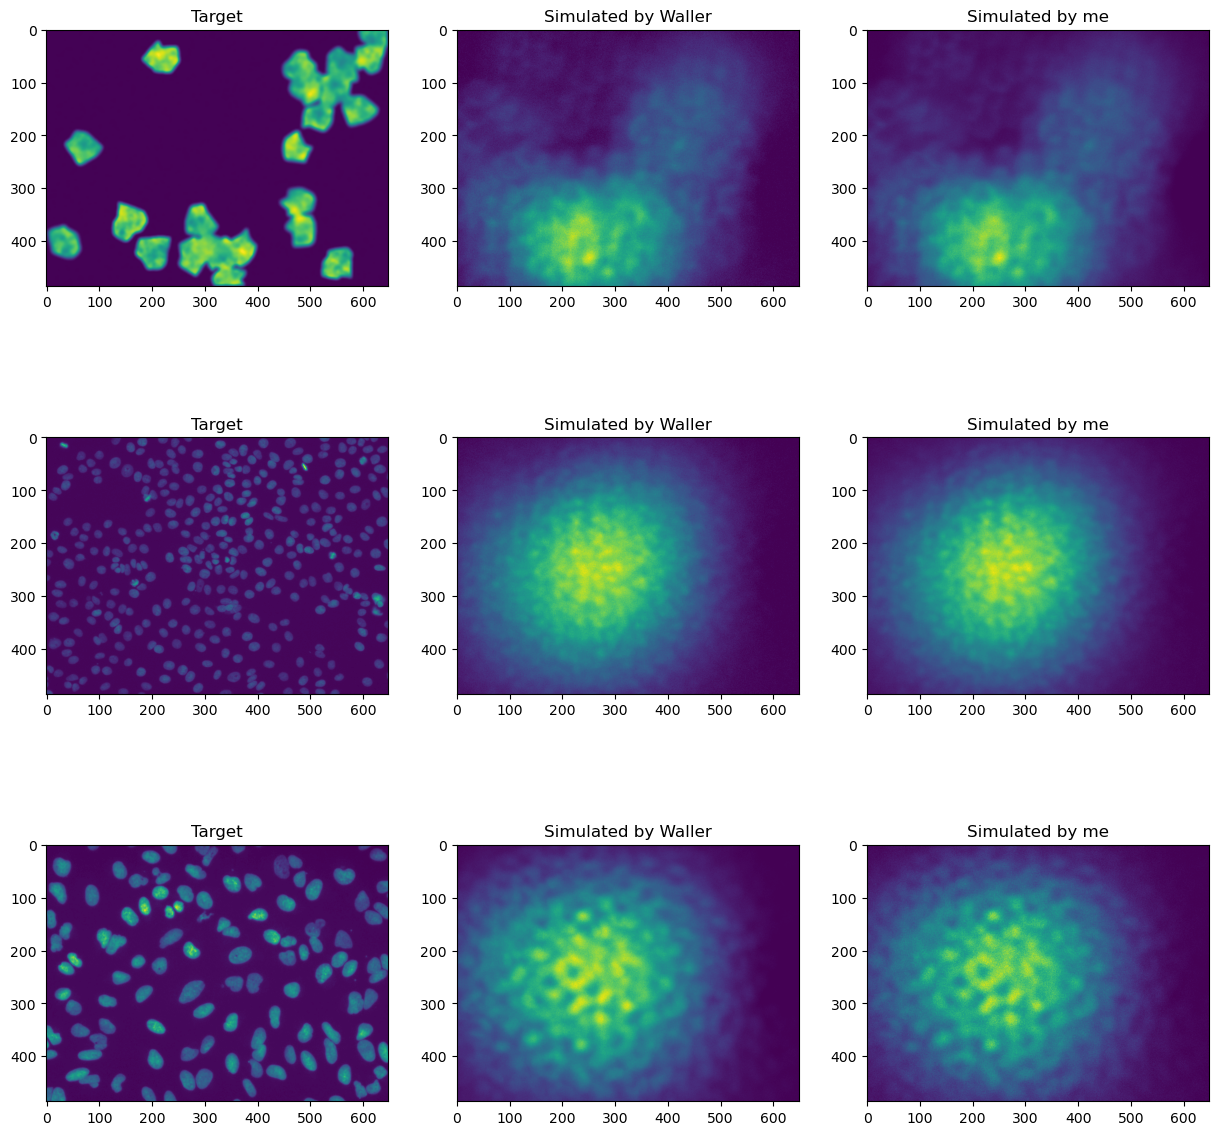

In [6]:
# Draw the set of images
image_titles = ['Target', 'Simulated by Waller', 'Simulated by me']
fig, axs = plt.subplots(3, 3, figsize=(15,15))
for row in range(len(image_triplets)):
    for column in range(3):
        axs[row, column].imshow(image_triplets[row][column])
        axs[row, column].set_title(image_titles[column])

In [7]:
type(image_triplets[0][1])

numpy.ndarray

Read image in:             6178961
Resized image in:           205071905
image has 3 channels. Converting to grayscale.
Converted to grayscalse in:             4908058
Simulated in:           693954769


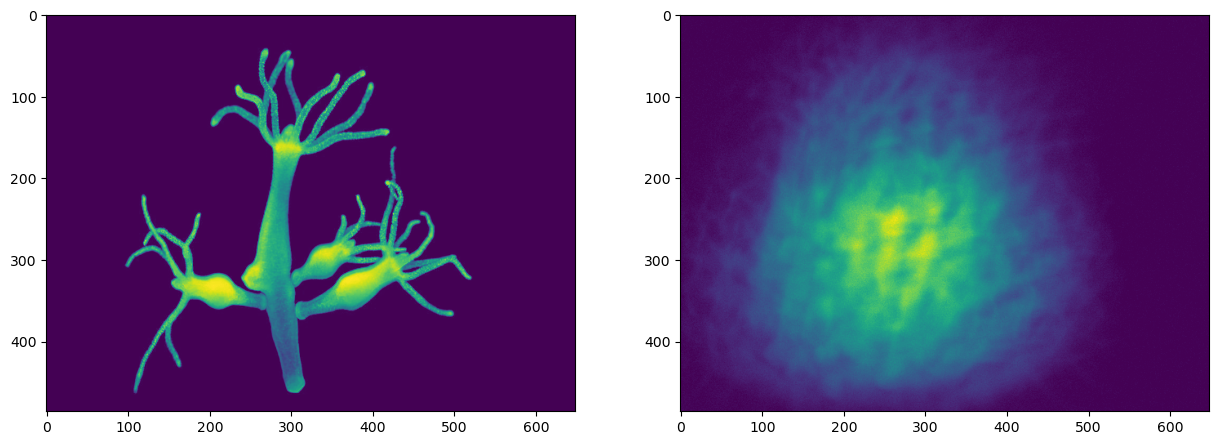

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,15))

img, sim = miniscopeSimulator.simulate('../data/hydra3.jpg')
ax[0].imshow(img)
ax[1].imshow(sim)

In [4]:
from simulator import *

In [10]:
# sim_from_pathlist('../data/nV3_h.mat',
#                                       '../data/nV3_weights.mat',
#                  target_path, "../../SimDump/")

In [11]:
# import pdb
# pdb.pm()

In [12]:
# plt.imshow(imageio.v2.imread("../../SimDump/0.png"))

Above is a proof-of-concept that `sim_from_pathlist` works with the SVD of the matrix of PSFs from nV3. Now, it's time to run through the entire directory and simulate them all.

In [5]:
target_path_whole = sorted(glob.glob(target_dir + '*'))[2633:]

In [6]:
target_path_whole.index(target_dir + "6696.png")

15823

In [7]:
# target_path_whole = sorted(glob.glob(target_dir + '*'))[2633:]
target_path_whole = target_path_whole[15823:]

# set_trace()
# sim_from_pathlist('../data/nV3_h.mat',
#                    '../data/nV3_weights.mat',
#                   target_path_whole, "../data/nV3_simulated/", output_dir_resized=None)
sim_from_pathlist('../data/nV3_h.mat',
                   '../data/nV3_weights.mat',
                  target_path_whole, "../data/nV3_simulated/", output_dir_resized="../data/nV3_resized")
# sim_from_pathlist('../data/nV3_h.mat',
#                                       '../data/nV3_weights.mat',
#                  target_path, "../data/nV3_simulated/", output_dir_resized="../data/nV3_resized")

created appropriate directories in:		 900500
initialized simulator in:		 7700816450
Read image in:            11635642
Resized image in:           203468392
Converted to grayscalse in:                1573
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6696.png in:		 3969649479
finished saving simulated image in:		 326924319
saved resized in:		 78123238
Read image in:             2982232
Resized image in:             1199247
Converted to grayscalse in:                 761
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6697.png in:		 3784174490
finished saving simulated image in:		 118462057
saved resized in:		 408018447
Read image in:             3306327
Resized image in:             1129104
Converted to grayscalse in:                 772
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6698.png in:		 3779029070
finished saving simulated image in:		 168452429
saved resized in:		 512928543
Read image in:             3710996
Resized image in:             1250304
Converted to grayscalse in:                 731
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6699.png in:		 3791142920
finished saving simulated image in:		 116429126
saved resized in:		 583387469
Read image in:             4253927
Resized image in:             5300715
Converted to grayscalse in:                 651
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/67.png in:		 3783566415
finished saving simulated image in:		 70236483
saved resized in:		 644739433
Read image in:             3173896
Resized image in:             5372721
Converted to grayscalse in:                 742
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/670.png in:		 3795126924
finished saving simulated image in:		 68567485
saved resized in:		 536801278
Read image in:             4005846
Resized image in:             5352803
Converted to grayscalse in:                 752
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6700.png in:		 3760911912
finished saving simulated image in:		 114253595
saved resized in:		 621975864
Read image in:             3745812
Resized image in:             2134944
Converted to grayscalse in:                 861
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6701.png in:		 3648199732
finished saving simulated image in:		 66460154
saved resized in:		 880697962
Read image in:             3627878
Resized image in:              654483
Converted to grayscalse in:                 742
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6702.png in:		 3742963123
finished saving simulated image in:		 187270818
saved resized in:		 391301758
Read image in:             2207121
Resized image in:              733503
Converted to grayscalse in:                 741
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6703.png in:		 3723368600
finished saving simulated image in:		 503902936
saved resized in:		 88340717
Read image in:             3379145
Resized image in:              687926
Converted to grayscalse in:                 671
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6704.png in:		 3783701109
finished saving simulated image in:		 52432700
saved resized in:		 571751937
Read image in:             2329092
Resized image in:              660895
Converted to grayscalse in:                 611
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6705.png in:		 3744754693
finished saving simulated image in:		 960447436
saved resized in:		 84748877
Read image in:             3272784
Resized image in:              871414
Converted to grayscalse in:                 641
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6706.png in:		 3774418524
finished saving simulated image in:		 78271138
saved resized in:		 594732307
Read image in:             3938608
Resized image in:              976824
Converted to grayscalse in:                 641
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6707.png in:		 3649441579
finished saving simulated image in:		 85064947
saved resized in:		 583278552
Read image in:             2650964
Resized image in:              631479
Converted to grayscalse in:                 661
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6708.png in:		 3800170146
finished saving simulated image in:		 248109278
saved resized in:		 331054911
Read image in:             2859840
Resized image in:              684971
Converted to grayscalse in:                 611
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6709.png in:		 3784777411
finished saving simulated image in:		 151666850
saved resized in:		 211467800
Read image in:             4018179
Resized image in:              682516
Converted to grayscalse in:                 822
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/671.png in:		 3815902906
finished saving simulated image in:		 60683225
saved resized in:		 741961652
Read image in:             4312598
Resized image in:              938241
Converted to grayscalse in:                 761
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6710.png in:		 3787972196
finished saving simulated image in:		 131058262
saved resized in:		 621128535
Read image in:             3621717
Resized image in:              969120
Converted to grayscalse in:                 781
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6711.png in:		 3786124498
finished saving simulated image in:		 67732589
saved resized in:		 677520221
Read image in:             3475419
Resized image in:              691984
Converted to grayscalse in:                 892
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6712.png in:		 3808854033
finished saving simulated image in:		 108023066
saved resized in:		 620415461
Read image in:             2932237
Resized image in:              664592
Converted to grayscalse in:                 651
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6713.png in:		 3820630211
finished saving simulated image in:		 76865569
saved resized in:		 400248415
Read image in:             3519492
Resized image in:              893877
Converted to grayscalse in:                 742
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6714.png in:		 3836717133
finished saving simulated image in:		 71053825
saved resized in:		 833403787
Read image in:             4207318
Resized image in:              862047
Converted to grayscalse in:                 711
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6715.png in:		 3773222300
finished saving simulated image in:		 72410982
saved resized in:		 666003856
Read image in:             3029312
Resized image in:              933372
Converted to grayscalse in:                 731
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6716.png in:		 3779912232
finished saving simulated image in:		 282856661
saved resized in:		 492857445
Read image in:             3321827
Resized image in:              635387
Converted to grayscalse in:                 822
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6717.png in:		 3787237820
finished saving simulated image in:		 155800257
saved resized in:		 429110814
Read image in:             3668536
Resized image in:              693256
Converted to grayscalse in:                 822
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6718.png in:		 3766295147
finished saving simulated image in:		 74581583
saved resized in:		 393457019
Read image in:             3477413
Resized image in:              761115
Converted to grayscalse in:                 801
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6719.png in:		 3750081604
finished saving simulated image in:		 118699416
saved resized in:		 612285104
Read image in:             3984936
Resized image in:              663069
Converted to grayscalse in:                 741
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/672.png in:		 3755105131
finished saving simulated image in:		 91327938
saved resized in:		 650328314
Read image in:             3712869
Resized image in:             3643708
Converted to grayscalse in:                 671
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6720.png in:		 3805125661
finished saving simulated image in:		 181663141
saved resized in:		 793237846
Read image in:             3281912
Resized image in:              715127
Converted to grayscalse in:                 571
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6721.png in:		 3787467295
finished saving simulated image in:		 106539560
saved resized in:		 291624197
Read image in:             3335523
Resized image in:             8084420
Converted to grayscalse in:                1303
Simulated in:                 511


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6722.png in:		 3798770193
finished saving simulated image in:		 96180041
saved resized in:		 486080287
Read image in:             3944119
Resized image in:              743371
Converted to grayscalse in:                 741
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6723.png in:		 3801336566
finished saving simulated image in:		 147410398
saved resized in:		 694509307
Read image in:             4204543
Resized image in:              663691
Converted to grayscalse in:                 762
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6724.png in:		 3814156497
finished saving simulated image in:		 56808418
saved resized in:		 746018504
Read image in:             4290105
Resized image in:              697684
Converted to grayscalse in:                 651
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6725.png in:		 3660654372
finished saving simulated image in:		 65179472
saved resized in:		 473949836
Read image in:             3596409
Resized image in:              934254
Converted to grayscalse in:                 641
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6726.png in:		 3650806995
finished saving simulated image in:		 213856395
saved resized in:		 655604140
Read image in:             2525015
Resized image in:              775031
Converted to grayscalse in:                 682
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6727.png in:		 3761132573
finished saving simulated image in:		 193564026
saved resized in:		 286026790
Read image in:             3049110
Resized image in:              665684
Converted to grayscalse in:                 722
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6728.png in:		 3757670589
finished saving simulated image in:		 155663418
saved resized in:		 867055198
Read image in:             3619432
Resized image in:              697775
Converted to grayscalse in:                 642
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6729.png in:		 3794223419
finished saving simulated image in:		 120739369
saved resized in:		 829697860
Read image in:             3722398
Resized image in:              745285
Converted to grayscalse in:                 711
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/673.png in:		 3811140860
finished saving simulated image in:		 206459921
saved resized in:		 947504301
Read image in:             3322067
Resized image in:              915408
Converted to grayscalse in:                 681
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6730.png in:		 3811143634
finished saving simulated image in:		 124652720
saved resized in:		 507011858
Read image in:             4047164
Resized image in:              675402
Converted to grayscalse in:                 622
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6731.png in:		 3801518819
finished saving simulated image in:		 112615465
saved resized in:		 769863897
Read image in:             3070871
Resized image in:              652659
Converted to grayscalse in:                 611
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6732.png in:		 3808962332
finished saving simulated image in:		 239248365
saved resized in:		 310234771
Read image in:             3211317
Resized image in:              727631
Converted to grayscalse in:                 571
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6733.png in:		 3808296107
finished saving simulated image in:		 88460003
saved resized in:		 561576988
Read image in:             4174155
Resized image in:              750806
Converted to grayscalse in:                 732
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6734.png in:		 3794757571
finished saving simulated image in:		 72686295
saved resized in:		 586978976
Read image in:             3538678
Resized image in:              879219
Converted to grayscalse in:                 631
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6735.png in:		 3649134707
finished saving simulated image in:		 109536830
saved resized in:		 849574137
Read image in:             3273936
Resized image in:              650636
Converted to grayscalse in:                 711
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6736.png in:		 3662575767
finished saving simulated image in:		 76279757
saved resized in:		 457911775
Read image in:             2852385
Resized image in:              675913
Converted to grayscalse in:                 641
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6737.png in:		 3643868189
finished saving simulated image in:		 112965700
saved resized in:		 579409955
Read image in:             4131875
Resized image in:              716521
Converted to grayscalse in:                 731
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6738.png in:		 3660440803
finished saving simulated image in:		 91122618
saved resized in:		 790244852
Read image in:             3480178
Resized image in:              658120
Converted to grayscalse in:                 711
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6739.png in:		 3779555959
finished saving simulated image in:		 80380242
saved resized in:		 515638827
Read image in:             4058827
Resized image in:              741267
Converted to grayscalse in:                 752
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/674.png in:		 3760943210
finished saving simulated image in:		 276753162
saved resized in:		 782791110
Read image in:             3273435
Resized image in:              650735
Converted to grayscalse in:                 772
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6740.png in:		 3755142676
finished saving simulated image in:		 151411174
saved resized in:		 477254810
Read image in:             2126908
Resized image in:             3328240
Converted to grayscalse in:                 721
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6741.png in:		 3759802863
finished saving simulated image in:		 305192368
saved resized in:		 85280305
Read image in:             3112480
Resized image in:             5617696
Converted to grayscalse in:                 851
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6742.png in:		 3795114246
finished saving simulated image in:		 157268455
saved resized in:		 318190856
Read image in:             3016407
Resized image in:             5450067
Converted to grayscalse in:                 821
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6743.png in:		 3771883961
finished saving simulated image in:		 68118862
saved resized in:		 967833668
Read image in:             4078544
Resized image in:             5297638
Converted to grayscalse in:                 832
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6744.png in:		 3776178193
finished saving simulated image in:		 119448228
saved resized in:		 786521853
Read image in:             2728842
Resized image in:             3396289
Converted to grayscalse in:                 751
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6745.png in:		 3802620698
finished saving simulated image in:		 73210980
saved resized in:		 562813735
Read image in:             4171249
Resized image in:              660293
Converted to grayscalse in:                 631
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6746.png in:		 3769808459
finished saving simulated image in:		 129702788
saved resized in:		 643289709
Read image in:             4002720
Resized image in:              634044
Converted to grayscalse in:                 812
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6747.png in:		 3564227507
finished saving simulated image in:		 81880510
saved resized in:		 681488033
Read image in:             3938668
Resized image in:              686574
Converted to grayscalse in:                 631
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6748.png in:		 3621654239
finished saving simulated image in:		 93133386
saved resized in:		 665994056
Read image in:             3036575
Resized image in:              809577
Converted to grayscalse in:                 781
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6749.png in:		 3627203815
finished saving simulated image in:		 108607575
saved resized in:		 597087648
Read image in:             2982442
Resized image in:              821239
Converted to grayscalse in:                 801
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/675.png in:		 3632743052
finished saving simulated image in:		 112547666
saved resized in:		 552845157
Read image in:             2250032
Resized image in:              650495
Converted to grayscalse in:                 661
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6750.png in:		 3608781989
finished saving simulated image in:		 140278557
saved resized in:		 485284956
Read image in:             3502379
Resized image in:              896201
Converted to grayscalse in:                 602
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6751.png in:		 3621736443
finished saving simulated image in:		 265907439
saved resized in:		 471843786
Read image in:             3713831
Resized image in:             2757915
Converted to grayscalse in:                 682
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6752.png in:		 3642504484
finished saving simulated image in:		 125530055
saved resized in:		 728777478
Read image in:             4356021
Resized image in:              682035
Converted to grayscalse in:                 602
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6753.png in:		 3736232078
finished saving simulated image in:		 71954095
saved resized in:		 694182355
Read image in:             3867753
Resized image in:              917122
Converted to grayscalse in:                 651
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6754.png in:		 3761427064
finished saving simulated image in:		 60303594
saved resized in:		 819271543
Read image in:             3513441
Resized image in:              763549
Converted to grayscalse in:                 712
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6755.png in:		 3747871246
finished saving simulated image in:		 196874302
saved resized in:		 467897102
Read image in:             2630815
Resized image in:              635306
Converted to grayscalse in:                 692
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6756.png in:		 3764787373
finished saving simulated image in:		 61462215
saved resized in:		 186298772
Read image in:             2706399
Resized image in:              628023
Converted to grayscalse in:                 712
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6757.png in:		 3789195074
finished saving simulated image in:		 92298481
saved resized in:		 399748153
Read image in:             3741443
Resized image in:              858951
Converted to grayscalse in:                 751
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6758.png in:		 3778365612
finished saving simulated image in:		 210075946
saved resized in:		 669253804
Read image in:             3849739
Resized image in:              679470
Converted to grayscalse in:                 741
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6759.png in:		 3582269659
finished saving simulated image in:		 64614719
saved resized in:		 567072740
Read image in:             3611206
Resized image in:              742810
Converted to grayscalse in:                 591
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/676.png in:		 3628672831
finished saving simulated image in:		 71408749
saved resized in:		 568789910
Read image in:             3345752
Resized image in:              822862
Converted to grayscalse in:                 731
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6760.png in:		 3640681110
finished saving simulated image in:		 142100947
saved resized in:		 540880992
Read image in:             3247766
Resized image in:              744754
Converted to grayscalse in:                 681
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6761.png in:		 3624304557
finished saving simulated image in:		 146624486
saved resized in:		 460094528
Read image in:             2798633
Resized image in:             5259917
Converted to grayscalse in:                1142
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6762.png in:		 3653279179
finished saving simulated image in:		 238078593
saved resized in:		 316806097
Read image in:             3191560
Resized image in:              682135
Converted to grayscalse in:                 691
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6763.png in:		 3610214214
finished saving simulated image in:		 176081914
saved resized in:		 417796610
Read image in:             3358647
Resized image in:              708144
Converted to grayscalse in:                 631
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6764.png in:		 3633116326
finished saving simulated image in:		 84865438
saved resized in:		 648374342
Read image in:             1984749
Resized image in:              635888
Converted to grayscalse in:                 651
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6765.png in:		 3632258748
finished saving simulated image in:		 306129586
saved resized in:		 70988000
Read image in:             4240401
Resized image in:              903695
Converted to grayscalse in:                 612
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6766.png in:		 3734378055
finished saving simulated image in:		 78838064
saved resized in:		 873000764
Read image in:             3062885
Resized image in:             1368619
Converted to grayscalse in:                 721
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6767.png in:		 3767591976
finished saving simulated image in:		 152464223
saved resized in:		 504070022
Read image in:             3420794
Resized image in:              651356
Converted to grayscalse in:                 621
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6768.png in:		 3756897549
finished saving simulated image in:		 109592225
saved resized in:		 491248017
Read image in:             4152764
Resized image in:              688757
Converted to grayscalse in:                 691
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6769.png in:		 3776862987
finished saving simulated image in:		 55514731
saved resized in:		 638124902
Read image in:             2553448
Resized image in:              754974
Converted to grayscalse in:                 671
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/677.png in:		 3789445786
finished saving simulated image in:		 252732655
saved resized in:		 290355387
Read image in:             3695496
Resized image in:              751116
Converted to grayscalse in:                 752
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6770.png in:		 3659586552
finished saving simulated image in:		 89058930
saved resized in:		 764314418
Read image in:             3291109
Resized image in:            10249019
Converted to grayscalse in:                2154
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6771.png in:		 3759351578
finished saving simulated image in:		 67765321
saved resized in:		 112816036
Read image in:             4172312
Resized image in:             1685600
Converted to grayscalse in:                 722
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6772.png in:		 3763562733
finished saving simulated image in:		 74489348
saved resized in:		 642507391
Read image in:             3248057
Resized image in:             5300944
Converted to grayscalse in:                 812
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6773.png in:		 3777245853
finished saving simulated image in:		 186182401
saved resized in:		 521380799
Read image in:             2468597
Resized image in:             1830234
Converted to grayscalse in:                1152
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6774.png in:		 3778537815
finished saving simulated image in:		 102207294
saved resized in:		 336302462
Read image in:             3161162
Resized image in:              728674
Converted to grayscalse in:                 701
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6775.png in:		 3772321182
finished saving simulated image in:		 122466127
saved resized in:		 447821887
Read image in:             3967523
Resized image in:              918374
Converted to grayscalse in:                 801
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6776.png in:		 3790344471
finished saving simulated image in:		 82063478
saved resized in:		 617256841
Read image in:             3329933
Resized image in:              712233
Converted to grayscalse in:                 721
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6777.png in:		 3781168069
finished saving simulated image in:		 215056292
saved resized in:		 285795579
Read image in:             3854187
Resized image in:              848732
Converted to grayscalse in:                 711
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6778.png in:		 3796662947
finished saving simulated image in:		 71783680
saved resized in:		 633339055
Read image in:             3458607
Resized image in:             3120355
Converted to grayscalse in:                 761
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6779.png in:		 3782942287
finished saving simulated image in:		 94607825
saved resized in:		 596033055
Read image in:             2595839
Resized image in:              627261
Converted to grayscalse in:                 702
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/678.png in:		 3763798209
finished saving simulated image in:		 116286434
saved resized in:		 348154075
Read image in:             3746884
Resized image in:              678177
Converted to grayscalse in:                 672
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6780.png in:		 3771383740
finished saving simulated image in:		 286376322
saved resized in:		 581758031
Read image in:             3293073
Resized image in:              827551
Converted to grayscalse in:                 621
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6781.png in:		 3749570506
finished saving simulated image in:		 154516369
saved resized in:		 425260331
Read image in:             3999343
Resized image in:              911701
Converted to grayscalse in:                 621
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6782.png in:		 3570962515
finished saving simulated image in:		 73505068
saved resized in:		 600982692
Read image in:             3193894
Resized image in:              689239
Converted to grayscalse in:                 742
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6783.png in:		 3559981576
finished saving simulated image in:		 123940036
saved resized in:		 260634798
Read image in:             3983483
Resized image in:              685932
Converted to grayscalse in:                 811
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6784.png in:		 3565396627
finished saving simulated image in:		 64278351
saved resized in:		 665392952
Read image in:             3515505
Resized image in:              790681
Converted to grayscalse in:                 711
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6785.png in:		 3604030508
finished saving simulated image in:		 315184998
saved resized in:		 1032757431
Read image in:             3815895
Resized image in:              810428
Converted to grayscalse in:                 812
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6786.png in:		 3607494033
finished saving simulated image in:		 89813212
saved resized in:		 460871804
Read image in:             4225823
Resized image in:              675082
Converted to grayscalse in:                 702
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6787.png in:		 3625050968
finished saving simulated image in:		 73924996
saved resized in:		 674665958
Read image in:             3473766
Resized image in:              733322
Converted to grayscalse in:                 671
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6788.png in:		 3643385338
finished saving simulated image in:		 143070607
saved resized in:		 510344474
Read image in:             2810736
Resized image in:              727471
Converted to grayscalse in:                 631
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6789.png in:		 3623239738
finished saving simulated image in:		 157258906
saved resized in:		 198230886
Read image in:             3782131
Resized image in:              689279
Converted to grayscalse in:                 621
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/679.png in:		 3736996229
finished saving simulated image in:		 145102325
saved resized in:		 601378443
Read image in:             4291227
Resized image in:             2052798
Converted to grayscalse in:                 711
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6790.png in:		 3774110224
finished saving simulated image in:		 177909073
saved resized in:		 734796545
Read image in:             3823389
Resized image in:              659221
Converted to grayscalse in:                 611
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6791.png in:		 3721159070
finished saving simulated image in:		 160762528
saved resized in:		 485348155
Read image in:             3054829
Resized image in:              731689
Converted to grayscalse in:                 732
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6792.png in:		 3765410968
finished saving simulated image in:		 85481106
saved resized in:		 301949019
Read image in:             4530011
Resized image in:              742280
Converted to grayscalse in:                 722
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6793.png in:		 3747203548
finished saving simulated image in:		 72084982
saved resized in:		 848474536
Read image in:             3900917
Resized image in:             5300744
Converted to grayscalse in:                 862
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6794.png in:		 3631856206
finished saving simulated image in:		 73477266
saved resized in:		 728316270
Read image in:             3692220
Resized image in:             1722881
Converted to grayscalse in:                 812
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6795.png in:		 3626939591
finished saving simulated image in:		 145622272
saved resized in:		 512131876
Read image in:             3860710
Resized image in:              998406
Converted to grayscalse in:                 871
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6796.png in:		 3632450384
finished saving simulated image in:		 88872195
saved resized in:		 447462424
Read image in:             3196599
Resized image in:              631198
Converted to grayscalse in:                 742
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6797.png in:		 3647748800
finished saving simulated image in:		 115632593
saved resized in:		 476633448
Read image in:             3832737
Resized image in:              952078
Converted to grayscalse in:                 621
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6798.png in:		 3634998632
finished saving simulated image in:		 74542789
saved resized in:		 661237383
Read image in:             3486330
Resized image in:              742320
Converted to grayscalse in:                 832
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6799.png in:		 3631485461
finished saving simulated image in:		 65068250
saved resized in:		 635584256
Read image in:             3323680
Resized image in:             1055714
Converted to grayscalse in:                 711
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/68.png in:		 3635377951
finished saving simulated image in:		 111749831
saved resized in:		 374201469
Read image in:             3524411
Resized image in:              699818
Converted to grayscalse in:                 711
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/680.png in:		 3720496379
finished saving simulated image in:		 99816575
saved resized in:		 948823320
Read image in:             3389215
Resized image in:              682455
Converted to grayscalse in:                 732
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6800.png in:		 3751357643
finished saving simulated image in:		 141259708
saved resized in:		 391346771
Read image in:             2770600
Resized image in:              787695
Converted to grayscalse in:                 711
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6801.png in:		 3759506344
finished saving simulated image in:		 199369037
saved resized in:		 685611449
Read image in:             3673243
Resized image in:              707443
Converted to grayscalse in:                 682
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6802.png in:		 3755318894
finished saving simulated image in:		 95739163
saved resized in:		 793184881
Read image in:             4154398
Resized image in:              740576
Converted to grayscalse in:                 741
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6803.png in:		 3786990575
finished saving simulated image in:		 72921902
saved resized in:		 601741972
Read image in:             3581721
Resized image in:              748852
Converted to grayscalse in:                 671
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6804.png in:		 3795138145
finished saving simulated image in:		 77000384
saved resized in:		 758130456
Read image in:             3429882
Resized image in:              688468
Converted to grayscalse in:                 751
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6805.png in:		 3572068759
finished saving simulated image in:		 157762261
saved resized in:		 218654854
Read image in:             4117257
Resized image in:              700901
Converted to grayscalse in:                 641
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6806.png in:		 3643962327
finished saving simulated image in:		 109205511
saved resized in:		 549779475
Read image in:             3441393
Resized image in:              708896
Converted to grayscalse in:                 631
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6807.png in:		 3654568605
finished saving simulated image in:		 205381572
saved resized in:		 648946927
Read image in:             2716228
Resized image in:              742008
Converted to grayscalse in:                 671
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6808.png in:		 3660471062
finished saving simulated image in:		 132815878
saved resized in:		 231685453
Read image in:             3729000
Resized image in:              658320
Converted to grayscalse in:                 612
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6809.png in:		 3747589096
finished saving simulated image in:		 88735825
saved resized in:		 477871879
Read image in:             3361403
Resized image in:              718444
Converted to grayscalse in:                 772
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/681.png in:		 3738513094
finished saving simulated image in:		 391709539
saved resized in:		 931536708
Read image in:             4422397
Resized image in:              633082
Converted to grayscalse in:                 602
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6810.png in:		 3761557757
finished saving simulated image in:		 75212290
saved resized in:		 379258580
Read image in:             3129973
Resized image in:              744593
Converted to grayscalse in:                 602
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6811.png in:		 3792292279
finished saving simulated image in:		 217214859
saved resized in:		 473698736
Read image in:             2820044
Resized image in:              704097
Converted to grayscalse in:                 691
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6812.png in:		 3807476960
finished saving simulated image in:		 100065777
saved resized in:		 407119888
Read image in:             3644198
Resized image in:            10346194
Converted to grayscalse in:                2815
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6813.png in:		 3795661576
finished saving simulated image in:		 79773891
saved resized in:		 479685051
Read image in:             2720215
Resized image in:             2131337
Converted to grayscalse in:                 922
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6814.png in:		 3782022180
finished saving simulated image in:		 73862176
saved resized in:		 636610965
Read image in:             3771581
Resized image in:              722071
Converted to grayscalse in:                 732
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6815.png in:		 3786647862
finished saving simulated image in:		 148274337
saved resized in:		 580451309
Read image in:             2398775
Resized image in:             2312190
Converted to grayscalse in:                 761
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6816.png in:		 3773124746
finished saving simulated image in:		 64310702
saved resized in:		 57002546
Read image in:             4084555
Resized image in:              912142
Converted to grayscalse in:                 742
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6817.png in:		 3568198478
finished saving simulated image in:		 69678994
saved resized in:		 747387278
Read image in:             3271411
Resized image in:              692705
Converted to grayscalse in:                 682
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6818.png in:		 3569372477
finished saving simulated image in:		 280089686
saved resized in:		 224986294
Read image in:             3548647
Resized image in:              648862
Converted to grayscalse in:                 662
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6819.png in:		 3636204505
finished saving simulated image in:		 121009081
saved resized in:		 653727382
Read image in:             3533529
Resized image in:              651367
Converted to grayscalse in:                 751
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/682.png in:		 3651968124
finished saving simulated image in:		 87342181
saved resized in:		 858333011
Read image in:             3604142
Resized image in:              957829
Converted to grayscalse in:                 681
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6820.png in:		 3643359630
finished saving simulated image in:		 77451331
saved resized in:		 738278393
Read image in:             4050511
Resized image in:              751987
Converted to grayscalse in:                 702
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6821.png in:		 3637184095
finished saving simulated image in:		 152774682
saved resized in:		 831748889
Read image in:             2298433
Resized image in:              628814
Converted to grayscalse in:                 771
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6822.png in:		 3615998201
finished saving simulated image in:		 331991036
saved resized in:		 38117922
Read image in:             3475349
Resized image in:              712533
Converted to grayscalse in:                 671
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6823.png in:		 3755488821
finished saving simulated image in:		 141819913
saved resized in:		 491798089
Read image in:             4066822
Resized image in:              748200
Converted to grayscalse in:                 641
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6824.png in:		 3763866927
finished saving simulated image in:		 106607778
saved resized in:		 761336001
Read image in:             4453705
Resized image in:              833823
Converted to grayscalse in:                 732
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6825.png in:		 3764483968
finished saving simulated image in:		 69373695
saved resized in:		 501378739
Read image in:             2794917
Resized image in:              701301
Converted to grayscalse in:                 641
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6826.png in:		 3795137007
finished saving simulated image in:		 239330609
saved resized in:		 360020794
Read image in:             3913661
Resized image in:              683197
Converted to grayscalse in:                 631
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6827.png in:		 3789743006
finished saving simulated image in:		 96566604
saved resized in:		 790110141
Read image in:             3678444
Resized image in:              668449
Converted to grayscalse in:                 591
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6828.png in:		 3793546086
finished saving simulated image in:		 83542877
saved resized in:		 630174645
Read image in:             2917279
Resized image in:              655815
Converted to grayscalse in:                 641
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6829.png in:		 3786928111
finished saving simulated image in:		 100202086
saved resized in:		 195539165
Read image in:             2514063
Resized image in:              898245
Converted to grayscalse in:                 681
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/683.png in:		 3507018287
finished saving simulated image in:		 85627624
saved resized in:		 393739133
Read image in:             4511245
Resized image in:              655394
Converted to grayscalse in:                 652
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6830.png in:		 3564109402
finished saving simulated image in:		 89859630
saved resized in:		 883032736
Read image in:             3728038
Resized image in:              720117
Converted to grayscalse in:                 681
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6831.png in:		 3566314508
finished saving simulated image in:		 79301213
saved resized in:		 577459147
Read image in:             4276719
Resized image in:              659783
Converted to grayscalse in:                 651
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6832.png in:		 3633069219
finished saving simulated image in:		 68406588
saved resized in:		 550461719
Read image in:             3480859
Resized image in:              655815
Converted to grayscalse in:                 601
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6833.png in:		 3629810733
finished saving simulated image in:		 89139893
saved resized in:		 542694222
Read image in:             3342547
Resized image in:              660043
Converted to grayscalse in:                 692
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6834.png in:		 3643347093
finished saving simulated image in:		 213759910
saved resized in:		 497279526
Read image in:             3975338
Resized image in:              698847
Converted to grayscalse in:                 802
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6835.png in:		 3635313780
finished saving simulated image in:		 288786526
saved resized in:		 885314508
Read image in:             1980571
Resized image in:              732080
Converted to grayscalse in:                 651
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6836.png in:		 3639500209
finished saving simulated image in:		 459796360
saved resized in:		 67591420
Read image in:             3639890
Resized image in:              706792
Converted to grayscalse in:                 861
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6837.png in:		 3642988722
finished saving simulated image in:		 92048496
saved resized in:		 539965651
Read image in:             4033989
Resized image in:              683308
Converted to grayscalse in:                 642
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6838.png in:		 3737997457
finished saving simulated image in:		 127055180
saved resized in:		 633790529
Read image in:             3570729
Resized image in:              728193
Converted to grayscalse in:                 651
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6839.png in:		 3762812030
finished saving simulated image in:		 112994634
saved resized in:		 735312491
Read image in:             3422167
Resized image in:              723894
Converted to grayscalse in:                 661
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/684.png in:		 3778623069
finished saving simulated image in:		 162382664
saved resized in:		 716220543
Read image in:             3865068
Resized image in:              627391
Converted to grayscalse in:                 751
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6840.png in:		 3776393175
finished saving simulated image in:		 172701164
saved resized in:		 584133399
Read image in:             3399484
Resized image in:              686713
Converted to grayscalse in:                 702
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6841.png in:		 3641106988
finished saving simulated image in:		 60683585
saved resized in:		 568857265
Read image in:             2971331
Resized image in:              699318
Converted to grayscalse in:                 611
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6842.png in:		 3632015005
finished saving simulated image in:		 586087769
saved resized in:		 419487318
Read image in:             2535053
Resized image in:              715919
Converted to grayscalse in:                 641
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6843.png in:		 3633449169
finished saving simulated image in:		 209525209
saved resized in:		 144737923
Read image in:             2819363
Resized image in:              743612
Converted to grayscalse in:                 742
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6844.png in:		 3633997068
finished saving simulated image in:		 103263999
saved resized in:		 553711750
Read image in:             4395796
Resized image in:              683628
Converted to grayscalse in:                 691
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6845.png in:		 3645178727
finished saving simulated image in:		 89750923
saved resized in:		 378147088
Read image in:             2156455
Resized image in:              660314
Converted to grayscalse in:                 742
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6846.png in:		 3622255163
finished saving simulated image in:		 260519588
saved resized in:		 37366334
Read image in:             4349208
Resized image in:              645946
Converted to grayscalse in:                 692
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6847.png in:		 3754342739
finished saving simulated image in:		 64525009
saved resized in:		 476035492
Read image in:             4177291
Resized image in:              909046
Converted to grayscalse in:                 752
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6848.png in:		 3763437836
finished saving simulated image in:		 72400963
saved resized in:		 715322657
Read image in:             3644550
Resized image in:              853370
Converted to grayscalse in:                 681
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6849.png in:		 3765339878
finished saving simulated image in:		 65035197
saved resized in:		 694927595
Read image in:             3913791
Resized image in:              792405
Converted to grayscalse in:                 671
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/685.png in:		 3786864915
finished saving simulated image in:		 213558827
saved resized in:		 708240982
Read image in:             3421827
Resized image in:              652078
Converted to grayscalse in:                 792
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6850.png in:		 3777297310
finished saving simulated image in:		 79607705
saved resized in:		 870888629
Read image in:             4147875
Resized image in:              875883
Converted to grayscalse in:                 802
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6851.png in:		 3774508375
finished saving simulated image in:		 95064472
saved resized in:		 496394466
Read image in:             4257774
Resized image in:              660634
Converted to grayscalse in:                 742
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6852.png in:		 3792461841
finished saving simulated image in:		 56441200
saved resized in:		 564837653
Read image in:             2768777
Resized image in:              692966
Converted to grayscalse in:                 841
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6853.png in:		 3622558398
finished saving simulated image in:		 158001214
saved resized in:		 128446181
Read image in:             4688932
Resized image in:              729836
Converted to grayscalse in:                 631
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6854.png in:		 3570641457
finished saving simulated image in:		 76552153
saved resized in:		 567855503
Read image in:             3756412
Resized image in:              706050
Converted to grayscalse in:                 631
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6855.png in:		 3638292050
finished saving simulated image in:		 141940372
saved resized in:		 803375326
Read image in:             3491700
Resized image in:              648111
Converted to grayscalse in:                 731
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6856.png in:		 3651139433
finished saving simulated image in:		 157043466
saved resized in:		 494835195
Read image in:             3741414
Resized image in:              716741
Converted to grayscalse in:                 742
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6857.png in:		 3654642523
finished saving simulated image in:		 167094740
saved resized in:		 699946744
Read image in:             3382091
Resized image in:              647940
Converted to grayscalse in:                 751
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6858.png in:		 3632299482
finished saving simulated image in:		 120215513
saved resized in:		 298536869
Read image in:             4013620
Resized image in:              732450
Converted to grayscalse in:                 751
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6859.png in:		 3634119347
finished saving simulated image in:		 132372655
saved resized in:		 606483493
Read image in:             3580678
Resized image in:              719145
Converted to grayscalse in:                 651
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/686.png in:		 3752229223
finished saving simulated image in:		 181817442
saved resized in:		 361383220
Read image in:             4261381
Resized image in:              672226
Converted to grayscalse in:                 631
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6860.png in:		 3755015913
finished saving simulated image in:		 93651278
saved resized in:		 610810959
Read image in:             3033459
Resized image in:              684229
Converted to grayscalse in:                 701
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6861.png in:		 3762896505
finished saving simulated image in:		 107139066
saved resized in:		 499640018
Read image in:             3582912
Resized image in:              717071
Converted to grayscalse in:                 601
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6862.png in:		 3772305970
finished saving simulated image in:		 75829592
saved resized in:		 435049695
Read image in:             2853347
Resized image in:              827921
Converted to grayscalse in:                 652
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6863.png in:		 3769874032
finished saving simulated image in:		 308357434
saved resized in:		 200188031
Read image in:             3642576
Resized image in:              651266
Converted to grayscalse in:                 772
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6864.png in:		 3777715821
finished saving simulated image in:		 70647934
saved resized in:		 698416939
Read image in:             3118491
Resized image in:              956686
Converted to grayscalse in:                 642
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6865.png in:		 3781318180
finished saving simulated image in:		 79535569
saved resized in:		 500518134
Read image in:             2692993
Resized image in:              701772
Converted to grayscalse in:                 732
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6866.png in:		 3509936961
finished saving simulated image in:		 120264126
saved resized in:		 421485030
Read image in:             4163946
Resized image in:              650745
Converted to grayscalse in:                 802
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6867.png in:		 3573009801
finished saving simulated image in:		 122017705
saved resized in:		 582075451
Read image in:             2665851
Resized image in:              672917
Converted to grayscalse in:                 671
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6868.png in:		 3585907359
finished saving simulated image in:		 237961398
saved resized in:		 443194609
Read image in:             3420624
Resized image in:              699748
Converted to grayscalse in:                 662
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6869.png in:		 3635652525
finished saving simulated image in:		 97404263
saved resized in:		 358641825
Read image in:             4033378
Resized image in:              649604
Converted to grayscalse in:                 621
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/687.png in:		 3634549440
finished saving simulated image in:		 111349210
saved resized in:		 737938825
Read image in:             3133399
Resized image in:              703145
Converted to grayscalse in:                 581
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6870.png in:		 3636964079
finished saving simulated image in:		 118333656
saved resized in:		 496436337
Read image in:             3519242
Resized image in:              660314
Converted to grayscalse in:                 601
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6871.png in:		 3659809810
finished saving simulated image in:		 65212927
saved resized in:		 732106144
Read image in:             3610175
Resized image in:              728604
Converted to grayscalse in:                 722
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6872.png in:		 3632538310
finished saving simulated image in:		 142780642
saved resized in:		 366402846
Read image in:             2302973
Resized image in:              651547
Converted to grayscalse in:                 781
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6873.png in:		 3666268632
finished saving simulated image in:		 137709434
saved resized in:		 231800962
Read image in:             3634240
Resized image in:              655955
Converted to grayscalse in:                 672
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6874.png in:		 3751182434
finished saving simulated image in:		 119275684
saved resized in:		 667285942
Read image in:             3565940
Resized image in:              834605
Converted to grayscalse in:                 611
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6875.png in:		 3760731394
finished saving simulated image in:		 96268080
saved resized in:		 546039646
Read image in:             2946715
Resized image in:              713645
Converted to grayscalse in:                 681
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6876.png in:		 3751486992
finished saving simulated image in:		 112973999
saved resized in:		 360515248
Read image in:             2086041
Resized image in:              655825
Converted to grayscalse in:                 651
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6877.png in:		 3768716263
finished saving simulated image in:		 397568829
saved resized in:		 79025302
Read image in:             2367616
Resized image in:              929354
Converted to grayscalse in:                 691
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6878.png in:		 3681071966
finished saving simulated image in:		 108861352
saved resized in:		 265895216
Read image in:             4095025
Resized image in:              512453
Converted to grayscalse in:                 791
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6879.png in:		 3656769243
finished saving simulated image in:		 83991502
saved resized in:		 680448322
Read image in:             3065961
Resized image in:              679500
Converted to grayscalse in:                 802
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/688.png in:		 3670260277
finished saving simulated image in:		 110582489
saved resized in:		 457533822
Read image in:             3861933
Resized image in:             5337925
Converted to grayscalse in:                 802
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6880.png in:		 3670920712
finished saving simulated image in:		 218557837
saved resized in:		 612586415
Read image in:             3423480
Resized image in:              716270
Converted to grayscalse in:                 671
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6881.png in:		 3660201328
finished saving simulated image in:		 123844699
saved resized in:		 262734033
Read image in:             3490818
Resized image in:              654352
Converted to grayscalse in:                 672
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6882.png in:		 3637321327
finished saving simulated image in:		 100034562
saved resized in:		 803977243
Read image in:             3356633
Resized image in:              782155
Converted to grayscalse in:                 681
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6883.png in:		 3771591160
finished saving simulated image in:		 114176893
saved resized in:		 990501609
Read image in:             3601728
Resized image in:              655474
Converted to grayscalse in:                 661
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6884.png in:		 3748756142
finished saving simulated image in:		 513768724
saved resized in:		 1050219142
Read image in:             3111447
Resized image in:              705279
Converted to grayscalse in:                 722
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6885.png in:		 3788952412
finished saving simulated image in:		 71058446
saved resized in:		 677886538
Read image in:             3624652
Resized image in:              707764
Converted to grayscalse in:                 591
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6886.png in:		 3781210552
finished saving simulated image in:		 196809224
saved resized in:		 517083657
Read image in:             3462595
Resized image in:              860684
Converted to grayscalse in:                 711
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6887.png in:		 3801909522
finished saving simulated image in:		 78331606
saved resized in:		 419065103
Read image in:             3446594
Resized image in:              656136
Converted to grayscalse in:                 831
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6888.png in:		 3785403812
finished saving simulated image in:		 76200910
saved resized in:		 492178691
Read image in:             3419031
Resized image in:              686524
Converted to grayscalse in:                 561
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6889.png in:		 3795683861
finished saving simulated image in:		 99634903
saved resized in:		 682606229
Read image in:             4326505
Resized image in:              823112
Converted to grayscalse in:                 751
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/689.png in:		 3628303541
finished saving simulated image in:		 93679577
saved resized in:		 605504979
Read image in:             3005246
Resized image in:              828513
Converted to grayscalse in:                 642
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6890.png in:		 3588747577
finished saving simulated image in:		 252578501
saved resized in:		 434377405
Read image in:             3900015
Resized image in:              701171
Converted to grayscalse in:                 922
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6891.png in:		 3654313686
finished saving simulated image in:		 82818374
saved resized in:		 710201161
Read image in:             3984455
Resized image in:              780943
Converted to grayscalse in:                 741
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6892.png in:		 3651039519
finished saving simulated image in:		 99116539
saved resized in:		 767796265
Read image in:             3122599
Resized image in:              657769
Converted to grayscalse in:                 611
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6893.png in:		 3647691211
finished saving simulated image in:		 55264539
saved resized in:		 274226623
Read image in:             3870869
Resized image in:              700520
Converted to grayscalse in:                 722
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6894.png in:		 3652438825
finished saving simulated image in:		 158222200
saved resized in:		 485854974
Read image in:             3489986
Resized image in:              686514
Converted to grayscalse in:                 822
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6895.png in:		 3629808747
finished saving simulated image in:		 374909376
saved resized in:		 920659410
Read image in:             4418600
Resized image in:              669211
Converted to grayscalse in:                 661
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6896.png in:		 3759362626
finished saving simulated image in:		 69202993
saved resized in:		 517266203
Read image in:             3685627
Resized image in:              670703
Converted to grayscalse in:                 621
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6897.png in:		 3759214534
finished saving simulated image in:		 81051149
saved resized in:		 141635437
Read image in:             2132128
Resized image in:             5291727
Converted to grayscalse in:                 771
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6898.png in:		 3738746964
finished saving simulated image in:		 248373166
saved resized in:		 37963870
Read image in:             4311406
Resized image in:             5384573
Converted to grayscalse in:                 861
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6899.png in:		 3796619083
finished saving simulated image in:		 72267080
saved resized in:		 543418318
Read image in:             2959819
Resized image in:              877256
Converted to grayscalse in:                 621
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/69.png in:		 3806586447
finished saving simulated image in:		 118453323
saved resized in:		 291287226
Read image in:             3575228
Resized image in:              808385
Converted to grayscalse in:                 641
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/690.png in:		 3780852606
finished saving simulated image in:		 116005264
saved resized in:		 678323606
Read image in:             3711377
Resized image in:              694359
Converted to grayscalse in:                 812
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6900.png in:		 3783789914
finished saving simulated image in:		 130750932
saved resized in:		 662112607
Read image in:             3523500
Resized image in:              687154
Converted to grayscalse in:                 681
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6901.png in:		 3484677490
finished saving simulated image in:		 82257259
saved resized in:		 378376288
Read image in:             2151165
Resized image in:              773419
Converted to grayscalse in:                 762
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6902.png in:		 3564397351
finished saving simulated image in:		 230190934
saved resized in:		 376327688
Read image in:             4060209
Resized image in:              711611
Converted to grayscalse in:                 732
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6903.png in:		 3585094948
finished saving simulated image in:		 57725801
saved resized in:		 916599251
Read image in:             3498572
Resized image in:              714357
Converted to grayscalse in:                 752
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6904.png in:		 3632297579
finished saving simulated image in:		 88343935
saved resized in:		 511070820
Read image in:             2710306
Resized image in:              734384
Converted to grayscalse in:                 772
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6905.png in:		 3628146477
finished saving simulated image in:		 62494606
saved resized in:		 112906140
Read image in:             3434261
Resized image in:              710449
Converted to grayscalse in:                 641
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6906.png in:		 3616571540
finished saving simulated image in:		 433607794
saved resized in:		 556583753
Read image in:             4133068
Resized image in:              653140
Converted to grayscalse in:                 661
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6907.png in:		 3646853264
finished saving simulated image in:		 160125994
saved resized in:		 681022300
Read image in:             4152705
Resized image in:              940816
Converted to grayscalse in:                 731
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6908.png in:		 3649639203
finished saving simulated image in:		 75316811
saved resized in:		 715085524
Read image in:             3986870
Resized image in:              716611
Converted to grayscalse in:                 842
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6909.png in:		 3660477731
finished saving simulated image in:		 160621726
saved resized in:		 809480157
Read image in:             2960380
Resized image in:              679139
Converted to grayscalse in:                 682
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/691.png in:		 3752633243
finished saving simulated image in:		 231904448
saved resized in:		 413392621
Read image in:             3831756
Resized image in:              676774
Converted to grayscalse in:                 631
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6910.png in:		 3755113783
finished saving simulated image in:		 101393471
saved resized in:		 494654811
Read image in:             3512399
Resized image in:             2772895
Converted to grayscalse in:                1373
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6911.png in:		 3792737076
finished saving simulated image in:		 162914238
saved resized in:		 779437427
Read image in:             4203942
Resized image in:             5366159
Converted to grayscalse in:                 882
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6912.png in:		 3785631475
finished saving simulated image in:		 60438072
saved resized in:		 787110164
Read image in:             3295748
Resized image in:             5312616
Converted to grayscalse in:                 761
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6913.png in:		 3656876823
finished saving simulated image in:		 219710165
saved resized in:		 545275543
Read image in:             2534852
Resized image in:              731459
Converted to grayscalse in:                 771
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6914.png in:		 3636493191
finished saving simulated image in:		 103153694
saved resized in:		 135021881
Read image in:             3785458
Resized image in:              815539
Converted to grayscalse in:                 681
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6915.png in:		 3657110045
finished saving simulated image in:		 105223333
saved resized in:		 1029181896
Read image in:             2262325
Resized image in:             5276749
Converted to grayscalse in:                1032
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6916.png in:		 3670066264
finished saving simulated image in:		 93667453
saved resized in:		 279497831
Read image in:             3226216
Resized image in:             2733861
Converted to grayscalse in:                 731
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6917.png in:		 3683222854
finished saving simulated image in:		 98912080
saved resized in:		 452992728
Read image in:             4475558
Resized image in:              633723
Converted to grayscalse in:                 752
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6918.png in:		 3661981534
finished saving simulated image in:		 59765855
saved resized in:		 621756564
Read image in:             4080137
Resized image in:              307324
Converted to grayscalse in:                 672
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6919.png in:		 3764177158
finished saving simulated image in:		 97431650
saved resized in:		 769382926
Read image in:             3834421
Resized image in:              661706
Converted to grayscalse in:                 702
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/692.png in:		 3760133048
finished saving simulated image in:		 93057585
saved resized in:		 789997445
Read image in:             4209012
Resized image in:             3679446
Converted to grayscalse in:                 761
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6920.png in:		 3770245508
finished saving simulated image in:		 80859505
saved resized in:		 802579755
Read image in:             3870018
Resized image in:             2948859
Converted to grayscalse in:                 831
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6921.png in:		 3788285660
finished saving simulated image in:		 98482905
saved resized in:		 556566069
Read image in:             3641183
Resized image in:             5343816
Converted to grayscalse in:                 742
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6922.png in:		 3776289984
finished saving simulated image in:		 76684187
saved resized in:		 963776863
Read image in:             3859799
Resized image in:              635266
Converted to grayscalse in:                 891
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6923.png in:		 3804254829
finished saving simulated image in:		 138920192
saved resized in:		 684665486
Read image in:             3298142
Resized image in:              303938
Converted to grayscalse in:                 682
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6924.png in:		 3797985115
finished saving simulated image in:		 219130663
saved resized in:		 481118119
Read image in:             3343058
Resized image in:              304348
Converted to grayscalse in:                 681
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6925.png in:		 3664060667
finished saving simulated image in:		 144369439
saved resized in:		 379094100
Read image in:             3924371
Resized image in:              803786
Converted to grayscalse in:                 792
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6926.png in:		 3566301466
finished saving simulated image in:		 75659702
saved resized in:		 441716959
Read image in:             3669247
Resized image in:              991543
Converted to grayscalse in:                 731
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6927.png in:		 3635290212
finished saving simulated image in:		 109632204
saved resized in:		 628926486
Read image in:             3734390
Resized image in:             5279884
Converted to grayscalse in:                 902
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6928.png in:		 3625165087
finished saving simulated image in:		 307811629
saved resized in:		 933361775
Read image in:             3554929
Resized image in:              799988
Converted to grayscalse in:                 752
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6929.png in:		 3646721515
finished saving simulated image in:		 111499679
saved resized in:		 971990196
Read image in:             3305426
Resized image in:             2553609
Converted to grayscalse in:                1022
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/693.png in:		 3654745259
finished saving simulated image in:		 84964268
saved resized in:		 495696888
Read image in:             3595788
Resized image in:             6714909
Converted to grayscalse in:                 922
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6930.png in:		 3660012589
finished saving simulated image in:		 93917788
saved resized in:		 586996215
Read image in:             3199946
Resized image in:              722482
Converted to grayscalse in:                 672
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6931.png in:		 3736029560
finished saving simulated image in:		 268474120
saved resized in:		 206188772
Read image in:             3030474
Resized image in:              649633
Converted to grayscalse in:                 601
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6932.png in:		 3742785757
finished saving simulated image in:		 206928395
saved resized in:		 218998584
Read image in:             3672563
Resized image in:              979851
Converted to grayscalse in:                 631
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6933.png in:		 3776846316
finished saving simulated image in:		 82331970
saved resized in:		 567018655
Read image in:             4193492
Resized image in:              650004
Converted to grayscalse in:                 661
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6934.png in:		 3786421946
finished saving simulated image in:		 60285832
saved resized in:		 593361550
Read image in:             3966892
Resized image in:              667768
Converted to grayscalse in:                 681
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6935.png in:		 3818584722
finished saving simulated image in:		 138936913
saved resized in:		 917211310
Read image in:             4065449
Resized image in:              709467
Converted to grayscalse in:                 701
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6936.png in:		 3782207674
finished saving simulated image in:		 145649198
saved resized in:		 939139123
Read image in:             3609944
Resized image in:              688067
Converted to grayscalse in:                 711
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6937.png in:		 3784410767
finished saving simulated image in:		 93285216
saved resized in:		 568797852
Read image in:             2671061
Resized image in:              860824
Converted to grayscalse in:                 712
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6938.png in:		 3508754419
finished saving simulated image in:		 295021565
saved resized in:		 322699696
Read image in:             4230001
Resized image in:              658661
Converted to grayscalse in:                1012
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6939.png in:		 3575674748
finished saving simulated image in:		 77253308
saved resized in:		 680190479
Read image in:             3985838
Resized image in:              806301
Converted to grayscalse in:                 771
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/694.png in:		 3577542373
finished saving simulated image in:		 171786854
saved resized in:		 850479569
Read image in:             3959127
Resized image in:              727381
Converted to grayscalse in:                 651
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6940.png in:		 3642201318
finished saving simulated image in:		 81363371
saved resized in:		 747266512
Read image in:             2845523
Resized image in:              711040
Converted to grayscalse in:                 662
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6941.png in:		 3645406474
finished saving simulated image in:		 231038302
saved resized in:		 581374771
Read image in:             4070047
Resized image in:             1686833
Converted to grayscalse in:                 822
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6942.png in:		 3615754554
finished saving simulated image in:		 74575593
saved resized in:		 908622021
Read image in:             3498603
Resized image in:             7208737
Converted to grayscalse in:                4018
Simulated in:                 691


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6943.png in:		 3670221918
finished saving simulated image in:		 127674881
saved resized in:		 476648661
Read image in:             3059269
Resized image in:              982956
Converted to grayscalse in:                 682
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6944.png in:		 3672652703
finished saving simulated image in:		 82615578
saved resized in:		 852304292
Read image in:             3573345
Resized image in:              667126
Converted to grayscalse in:                 742
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6945.png in:		 3649497941
finished saving simulated image in:		 140386636
saved resized in:		 430649154
Read image in:             3493984
Resized image in:             4219291
Converted to grayscalse in:                 962
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6946.png in:		 3773256856
finished saving simulated image in:		 95241802
saved resized in:		 550605610
Read image in:             2622549
Resized image in:              662628
Converted to grayscalse in:                 681
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6947.png in:		 3777890564
finished saving simulated image in:		 355136692
saved resized in:		 307780279
Read image in:             2403915
Resized image in:              795259
Converted to grayscalse in:                 791
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6948.png in:		 3768656581
finished saving simulated image in:		 364748722
saved resized in:		 155242712
Read image in:             3247216
Resized image in:              311531
Converted to grayscalse in:                 691
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6949.png in:		 3799147793
finished saving simulated image in:		 79098250
saved resized in:		 809388520
Read image in:             3316697
Resized image in:             5278672
Converted to grayscalse in:                 842
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/695.png in:		 3697566535
finished saving simulated image in:		 224271124
saved resized in:		 425670882
Read image in:             3907038
Resized image in:             3438809
Converted to grayscalse in:                 632
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6950.png in:		 3660622911
finished saving simulated image in:		 164848320
saved resized in:		 746913251
Read image in:             3891799
Resized image in:              787635
Converted to grayscalse in:                 701
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6951.png in:		 3679253804
finished saving simulated image in:		 141974059
saved resized in:		 928449816
Read image in:             4332546
Resized image in:             6003369
Converted to grayscalse in:                 842
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6952.png in:		 3678266028
finished saving simulated image in:		 57191226
saved resized in:		 329994316
Read image in:             2761292
Resized image in:             8573247
Converted to grayscalse in:                 772
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6953.png in:		 3663870094
finished saving simulated image in:		 125566157
saved resized in:		 179185101
Read image in:             3943808
Resized image in:             2661222
Converted to grayscalse in:                 781
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6954.png in:		 3694081085
finished saving simulated image in:		 155180895
saved resized in:		 605534971
Read image in:             4058826
Resized image in:             5607086
Converted to grayscalse in:                 731
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6955.png in:		 3827376958
finished saving simulated image in:		 82905819
saved resized in:		 608912565
Read image in:             3075910
Resized image in:             5325732
Converted to grayscalse in:                 762
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6956.png in:		 3781659495
finished saving simulated image in:		 156544424
saved resized in:		 397553186
Read image in:             3228309
Resized image in:              997484
Converted to grayscalse in:                 631
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6957.png in:		 3775734255
finished saving simulated image in:		 208032992
saved resized in:		 700651135
Read image in:             2353909
Resized image in:              711802
Converted to grayscalse in:                 611
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6958.png in:		 3783787265
finished saving simulated image in:		 65575696
saved resized in:		 133680362
Read image in:             3427157
Resized image in:             5520962
Converted to grayscalse in:                1052
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6959.png in:		 3812256899
finished saving simulated image in:		 104334776
saved resized in:		 689945959
Read image in:             4167012
Resized image in:             5820982
Converted to grayscalse in:                 802
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/696.png in:		 3795002117
finished saving simulated image in:		 108079946
saved resized in:		 591817117
Read image in:             2752296
Resized image in:             5326133
Converted to grayscalse in:                 942
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6960.png in:		 3792147176
finished saving simulated image in:		 156052099
saved resized in:		 499266104
Read image in:             4354588
Resized image in:            10347326
Converted to grayscalse in:                2866
Simulated in:                 501


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6961.png in:		 3639685765
finished saving simulated image in:		 87072089
saved resized in:		 707770832
Read image in:             4086609
Resized image in:              757378
Converted to grayscalse in:                 862
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6962.png in:		 3567606200
finished saving simulated image in:		 105443411
saved resized in:		 669377366
Read image in:             3065289
Resized image in:             5309672
Converted to grayscalse in:                 792
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6963.png in:		 3665676450
finished saving simulated image in:		 174897971
saved resized in:		 516852113
Read image in:             3291058
Resized image in:              651978
Converted to grayscalse in:                 651
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6964.png in:		 3634544141
finished saving simulated image in:		 176859135
saved resized in:		 421661980
Read image in:             3805896
Resized image in:              665884
Converted to grayscalse in:                 691
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6965.png in:		 3660727955
finished saving simulated image in:		 129331546
saved resized in:		 692162387
Read image in:             3908721
Resized image in:             5363844
Converted to grayscalse in:                 882
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6966.png in:		 3665740792
finished saving simulated image in:		 123296226
saved resized in:		 537430434
Read image in:             2166333
Resized image in:              655535
Converted to grayscalse in:                 781
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6967.png in:		 3630740508
finished saving simulated image in:		 483905169
saved resized in:		 38466424
Read image in:             3959258
Resized image in:              712472
Converted to grayscalse in:                 751
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6968.png in:		 3761607669
finished saving simulated image in:		 157463329
saved resized in:		 613485025
Read image in:             4836763
Resized image in:             5417225
Converted to grayscalse in:                 762
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6969.png in:		 3780765453
finished saving simulated image in:		 73083841
saved resized in:		 540748123
Read image in:             4444308
Resized image in:             1508173
Converted to grayscalse in:                 762
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/697.png in:		 3751089599
finished saving simulated image in:		 165842387
saved resized in:		 853756528
Read image in:             3569588
Resized image in:             5772260
Converted to grayscalse in:                 912
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6970.png in:		 3769058986
finished saving simulated image in:		 97895038
saved resized in:		 795584630
Read image in:             3390818
Resized image in:              695651
Converted to grayscalse in:                 661
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6971.png in:		 3776293520
finished saving simulated image in:		 176128246
saved resized in:		 474251038
Read image in:             3376521
Resized image in:              806200
Converted to grayscalse in:                 792
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6972.png in:		 3786350396
finished saving simulated image in:		 145244789
saved resized in:		 246134494
Read image in:             4012338
Resized image in:             7789430
Converted to grayscalse in:                 831
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6973.png in:		 3780823732
finished saving simulated image in:		 95220661
saved resized in:		 651189182
Read image in:             3894755
Resized image in:              738692
Converted to grayscalse in:                 781
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6974.png in:		 3499902250
finished saving simulated image in:		 77151293
saved resized in:		 570930649
Read image in:             3064699
Resized image in:              711571
Converted to grayscalse in:                 722
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6975.png in:		 3583910031
finished saving simulated image in:		 186643731
saved resized in:		 401154323
Read image in:             2935083
Resized image in:              654683
Converted to grayscalse in:                 601
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6976.png in:		 3584410690
finished saving simulated image in:		 301558666
saved resized in:		 224259139
Read image in:             3483454
Resized image in:              637671
Converted to grayscalse in:                 742
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6977.png in:		 3631170140
finished saving simulated image in:		 102619920
saved resized in:		 1025566746
Read image in:             3358567
Resized image in:              705710
Converted to grayscalse in:                 721
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6978.png in:		 3640434269
finished saving simulated image in:		 114105467
saved resized in:		 508055300
Read image in:             3874837
Resized image in:             4075398
Converted to grayscalse in:                 842
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6979.png in:		 3644510498
finished saving simulated image in:		 134567768
saved resized in:		 893540914
Read image in:             2792342
Resized image in:             8401281
Converted to grayscalse in:                 791
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/698.png in:		 3679280304
finished saving simulated image in:		 196732546
saved resized in:		 448661973
Read image in:             3723960
Resized image in:             2690649
Converted to grayscalse in:                 792
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6980.png in:		 3666641888
finished saving simulated image in:		 193680702
saved resized in:		 603794185
Read image in:             3515905
Resized image in:             5327355
Converted to grayscalse in:                 781
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6981.png in:		 3665385242
finished saving simulated image in:		 88538994
saved resized in:		 601068109
Read image in:             3346915
Resized image in:              760284
Converted to grayscalse in:                 831
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6982.png in:		 3748724443
finished saving simulated image in:		 123549437
saved resized in:		 461257728
Read image in:             2184237
Resized image in:             5279123
Converted to grayscalse in:                 752
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6983.png in:		 3776267507
finished saving simulated image in:		 105061585
saved resized in:		 214492487
Read image in:             2610386
Resized image in:             2929542
Converted to grayscalse in:                 851
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6984.png in:		 3767025800
finished saving simulated image in:		 192153413
saved resized in:		 131615883
Read image in:             3895416
Resized image in:              643842
Converted to grayscalse in:                 661
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6985.png in:		 3786197240
finished saving simulated image in:		 101656260
saved resized in:		 755789962
Read image in:             3230454
Resized image in:              901622
Converted to grayscalse in:                 662
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6986.png in:		 3666480219
finished saving simulated image in:		 102921462
saved resized in:		 464745981
Read image in:             2672685
Resized image in:              795370
Converted to grayscalse in:                 692
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6987.png in:		 3650671292
finished saving simulated image in:		 92058868
saved resized in:		 396731826
Read image in:             3597370
Resized image in:              718524
Converted to grayscalse in:                 621
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6988.png in:		 3665208944
finished saving simulated image in:		 71160338
saved resized in:		 606100844
Read image in:             2755892
Resized image in:              677326
Converted to grayscalse in:                 671
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6989.png in:		 3664297123
finished saving simulated image in:		 115379025
saved resized in:		 359519843
Read image in:             3026196
Resized image in:              648120
Converted to grayscalse in:                 712
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/699.png in:		 3653547692
finished saving simulated image in:		 96433824
saved resized in:		 372987704
Read image in:             4330953
Resized image in:              733493
Converted to grayscalse in:                 641
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6990.png in:		 3661815090
finished saving simulated image in:		 82373989
saved resized in:		 611043628
Read image in:             3447455
Resized image in:              730277
Converted to grayscalse in:                 651
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6991.png in:		 3780140528
finished saving simulated image in:		 182337736
saved resized in:		 679300846
Read image in:             3725373
Resized image in:              661996
Converted to grayscalse in:                 861
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6992.png in:		 3767916949
finished saving simulated image in:		 170016743
saved resized in:		 707732046
Read image in:             3903472
Resized image in:              905209
Converted to grayscalse in:                 731
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6993.png in:		 3757511643
finished saving simulated image in:		 343391761
saved resized in:		 857179314
Read image in:             2501320
Resized image in:              654914
Converted to grayscalse in:                 812
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6994.png in:		 3770291888
finished saving simulated image in:		 364161515
saved resized in:		 38259000
Read image in:             3839170
Resized image in:              776705
Converted to grayscalse in:                 611
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6995.png in:		 3849111959
finished saving simulated image in:		 137758956
saved resized in:		 552921565
Read image in:             3171862
Resized image in:             5325911
Converted to grayscalse in:                 851
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6996.png in:		 3822085905
finished saving simulated image in:		 283437510
saved resized in:		 469215947
Read image in:             2760472
Resized image in:              659372
Converted to grayscalse in:                 852
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6997.png in:		 3799441541
finished saving simulated image in:		 169784682
saved resized in:		 464980105
Read image in:             4703110
Resized image in:              706932
Converted to grayscalse in:                 691
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6998.png in:		 3642703140
finished saving simulated image in:		 73977076
saved resized in:		 435352302
Read image in:             2791330
Resized image in:              915539
Converted to grayscalse in:                 721
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/6999.png in:		 3589021257
finished saving simulated image in:		 124510722
saved resized in:		 230707603
Read image in:             4004583
Resized image in:             5419190
Converted to grayscalse in:                 822
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7.png in:		 3678016858
finished saving simulated image in:		 157647528
saved resized in:		 615132581
Read image in:             2553939
Resized image in:              974901
Converted to grayscalse in:                 701
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/70.png in:		 3648184325
finished saving simulated image in:		 170319297
saved resized in:		 120461224
Read image in:             3454149
Resized image in:              737730
Converted to grayscalse in:                 691
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/700.png in:		 3668853920
finished saving simulated image in:		 182179134
saved resized in:		 655588013
Read image in:             2628340
Resized image in:              685311
Converted to grayscalse in:                 701
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7000.png in:		 3635185635
finished saving simulated image in:		 334502132
saved resized in:		 158394316
Read image in:             3692271
Resized image in:              667307
Converted to grayscalse in:                 671
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7001.png in:		 3654352717
finished saving simulated image in:		 64282740
saved resized in:		 620357752
Read image in:             2633200
Resized image in:              925848
Converted to grayscalse in:                 591
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7002.png in:		 3765718992
finished saving simulated image in:		 94132575
saved resized in:		 376798147
Read image in:             2950913
Resized image in:              915909
Converted to grayscalse in:                 791
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7003.png in:		 3751378484
finished saving simulated image in:		 147454555
saved resized in:		 481494931
Read image in:             3088885
Resized image in:              659052
Converted to grayscalse in:                 711
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7004.png in:		 3788895736
finished saving simulated image in:		 172486151
saved resized in:		 257255357
Read image in:             4434259
Resized image in:              648391
Converted to grayscalse in:                 691
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7005.png in:		 3796345710
finished saving simulated image in:		 144739369
saved resized in:		 782600534
Read image in:             3902489
Resized image in:              730647
Converted to grayscalse in:                 781
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7006.png in:		 3814496873
finished saving simulated image in:		 172697371
saved resized in:		 565142287
Read image in:             2590298
Resized image in:             1297253
Converted to grayscalse in:                 812
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7007.png in:		 3827170055
finished saving simulated image in:		 96960314
saved resized in:		 327091803
Read image in:             4565859
Resized image in:              305500
Converted to grayscalse in:                 711
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7008.png in:		 3812711342
finished saving simulated image in:		 65234848
saved resized in:		 526293447
Read image in:             3563185
Resized image in:             8583727
Converted to grayscalse in:                 761
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7009.png in:		 3516940446
finished saving simulated image in:		 173350842
saved resized in:		 888615559
Read image in:             2511930
Resized image in:             2694095
Converted to grayscalse in:                 771
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/701.png in:		 3598306592
finished saving simulated image in:		 205469485
saved resized in:		 335492563
Read image in:             3165941
Resized image in:              710198
Converted to grayscalse in:                 611
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7010.png in:		 3590467297
finished saving simulated image in:		 118032733
saved resized in:		 431833250
Read image in:             3662283
Resized image in:              708465
Converted to grayscalse in:                 681
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7011.png in:		 3641110331
finished saving simulated image in:		 71301957
saved resized in:		 606393598
Read image in:             3917077
Resized image in:              704949
Converted to grayscalse in:                 761
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7012.png in:		 3652178063
finished saving simulated image in:		 95378941
saved resized in:		 770440396
Read image in:             2282954
Resized image in:              644784
Converted to grayscalse in:                 752
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7013.png in:		 3615159499
finished saving simulated image in:		 706378765
saved resized in:		 89770432
Read image in:             3570980
Resized image in:              706471
Converted to grayscalse in:                 741
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7014.png in:		 3651424352
finished saving simulated image in:		 85358235
saved resized in:		 582093872
Read image in:             3543027
Resized image in:              734204
Converted to grayscalse in:                 701
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7015.png in:		 3667019502
finished saving simulated image in:		 84231525
saved resized in:		 757619042
Read image in:             3668606
Resized image in:              955855
Converted to grayscalse in:                 691
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7016.png in:		 3651008191
finished saving simulated image in:		 178965182
saved resized in:		 733923272
Read image in:             2982814
Resized image in:              701973
Converted to grayscalse in:                 711
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7017.png in:		 3757280885
finished saving simulated image in:		 179554932
saved resized in:		 205643816
Read image in:             2741314
Resized image in:             5281497
Converted to grayscalse in:                 801
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7018.png in:		 3746667574
finished saving simulated image in:		 455995646
saved resized in:		 81945034
Read image in:             3407890
Resized image in:            10083635
Converted to grayscalse in:                3607
Simulated in:                 731


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7019.png in:		 3817439715
finished saving simulated image in:		 155403527
saved resized in:		 1101125469
Read image in:             3298322
Resized image in:              696262
Converted to grayscalse in:                 671
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/702.png in:		 3795744333
finished saving simulated image in:		 74203726
saved resized in:		 534781121
Read image in:             4083994
Resized image in:              690401
Converted to grayscalse in:                 701
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7020.png in:		 3665161953
finished saving simulated image in:		 76317240
saved resized in:		 709670384
Read image in:             2549010
Resized image in:              841198
Converted to grayscalse in:                 911
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7021.png in:		 3669186563
finished saving simulated image in:		 162916821
saved resized in:		 315489494
Read image in:             2936796
Resized image in:              677987
Converted to grayscalse in:                 731
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7022.png in:		 3643116877
finished saving simulated image in:		 417301288
saved resized in:		 429329005
Read image in:             2177654
Resized image in:              682275
Converted to grayscalse in:                 842
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7023.png in:		 3634851773
finished saving simulated image in:		 517494750
saved resized in:		 141317522
Read image in:             3289596
Resized image in:              702775
Converted to grayscalse in:                 722
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7024.png in:		 3640528101
finished saving simulated image in:		 172743449
saved resized in:		 515946892
Read image in:             3008031
Resized image in:             3431435
Converted to grayscalse in:                 731
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7025.png in:		 3650355289
finished saving simulated image in:		 197323217
saved resized in:		 790863542
Read image in:             2611529
Resized image in:              729345
Converted to grayscalse in:                 681
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7026.png in:		 3776147584
finished saving simulated image in:		 93572732
saved resized in:		 297520687
Read image in:             4332546
Resized image in:              679009
Converted to grayscalse in:                 721
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7027.png in:		 3775452213
finished saving simulated image in:		 74760403
saved resized in:		 536441654
Read image in:             3588053
Resized image in:              699939
Converted to grayscalse in:                 691
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7028.png in:		 3768424129
finished saving simulated image in:		 174043016
saved resized in:		 536529530
Read image in:             4293552
Resized image in:              684449
Converted to grayscalse in:                 842
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7029.png in:		 3790979383
finished saving simulated image in:		 134480640
saved resized in:		 762676865
Read image in:             2924793
Resized image in:              704588
Converted to grayscalse in:                 752
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/703.png in:		 3777499569
finished saving simulated image in:		 55341044
saved resized in:		 299370349
Read image in:             4390015
Resized image in:              702775
Converted to grayscalse in:                 791
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7030.png in:		 3787151694
finished saving simulated image in:		 76197563
saved resized in:		 524825679
Read image in:             3934270
Resized image in:              730998
Converted to grayscalse in:                 641
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7031.png in:		 3785406972
finished saving simulated image in:		 69541664
saved resized in:		 572894875
Read image in:             2988524
Resized image in:              765473
Converted to grayscalse in:                 781
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7032.png in:		 3646048048
finished saving simulated image in:		 185813385
saved resized in:		 424755671
Read image in:             3310426
Resized image in:              745906
Converted to grayscalse in:                 831
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7033.png in:		 3580125795
finished saving simulated image in:		 105056395
saved resized in:		 1082223770
Read image in:             3035674
Resized image in:              671455
Converted to grayscalse in:                 781
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7034.png in:		 3639666091
finished saving simulated image in:		 159887149
saved resized in:		 451665814
Read image in:             2562045
Resized image in:             5274404
Converted to grayscalse in:                 791
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7035.png in:		 3623654149
finished saving simulated image in:		 578222120
saved resized in:		 663509551
Read image in:             3366392
Resized image in:              700319
Converted to grayscalse in:                 641
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7036.png in:		 3650854302
finished saving simulated image in:		 158782572
saved resized in:		 534624723
Read image in:             4029912
Resized image in:              654082
Converted to grayscalse in:                 741
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7037.png in:		 3629206450
finished saving simulated image in:		 144363324
saved resized in:		 684453264
Read image in:             2083947
Resized image in:              867557
Converted to grayscalse in:                 641
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7038.png in:		 3645062455
finished saving simulated image in:		 603084344
saved resized in:		 78382460
Read image in:             4299493
Resized image in:              707032
Converted to grayscalse in:                 781
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7039.png in:		 3741696469
finished saving simulated image in:		 104445706
saved resized in:		 658113816
Read image in:             4104703
Resized image in:              691883
Converted to grayscalse in:                 731
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/704.png in:		 3754757886
finished saving simulated image in:		 158796648
saved resized in:		 608152597
Read image in:             3807689
Resized image in:              779750
Converted to grayscalse in:                 671
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7040.png in:		 3757308810
finished saving simulated image in:		 91011349
saved resized in:		 647479686
Read image in:             3172554
Resized image in:              675152
Converted to grayscalse in:                 681
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7041.png in:		 3767153091
finished saving simulated image in:		 89511050
saved resized in:		 1063916381
Read image in:             3283414
Resized image in:              657669
Converted to grayscalse in:                 721
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7042.png in:		 3780298739
finished saving simulated image in:		 108350740
saved resized in:		 561703967
Read image in:             3509503
Resized image in:              750986
Converted to grayscalse in:                 731
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7043.png in:		 3774559451
finished saving simulated image in:		 80380664
saved resized in:		 1090418508
Read image in:             3844880
Resized image in:              731119
Converted to grayscalse in:                 771
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7044.png in:		 3762564137
finished saving simulated image in:		 86823036
saved resized in:		 919916145
Read image in:             2215807
Resized image in:              744724
Converted to grayscalse in:                 672
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7045.png in:		 3463349724
finished saving simulated image in:		 470689453
saved resized in:		 70779796
Read image in:             4628609
Resized image in:              651147
Converted to grayscalse in:                 731
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7046.png in:		 3566981083
finished saving simulated image in:		 84620725
saved resized in:		 553966907
Read image in:             3763065
Resized image in:              813675
Converted to grayscalse in:                 712
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7047.png in:		 3580470064
finished saving simulated image in:		 77121937
saved resized in:		 510195400
Read image in:             3990486
Resized image in:              763650
Converted to grayscalse in:                 751
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7048.png in:		 3642726306
finished saving simulated image in:		 101184654
saved resized in:		 500805812
Read image in:             2125776
Resized image in:              817943
Converted to grayscalse in:                 662
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7049.png in:		 3617086655
finished saving simulated image in:		 1091037764
saved resized in:		 62978834
Read image in:             3542566
Resized image in:             3990697
Converted to grayscalse in:                1042
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/705.png in:		 3657571151
finished saving simulated image in:		 76730534
saved resized in:		 683014252
Read image in:             3167905
Resized image in:              651437
Converted to grayscalse in:                 632
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7050.png in:		 3642594224
finished saving simulated image in:		 187893794
saved resized in:		 445802149
Read image in:             3465641
Resized image in:              677606
Converted to grayscalse in:                 762
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7051.png in:		 3630282549
finished saving simulated image in:		 163664802
saved resized in:		 462919970
Read image in:             4220053
Resized image in:              731689
Converted to grayscalse in:                 752
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7052.png in:		 3641093554
finished saving simulated image in:		 66632201
saved resized in:		 448216163
Read image in:             3971541
Resized image in:              648842
Converted to grayscalse in:                 671
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7053.png in:		 3739468794
finished saving simulated image in:		 112528731
saved resized in:		 755400187
Read image in:             3469547
Resized image in:              687886
Converted to grayscalse in:                 661
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7054.png in:		 3758383625
finished saving simulated image in:		 255206998
saved resized in:		 494999608
Read image in:             3725092
Resized image in:              938501
Converted to grayscalse in:                 721
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7055.png in:		 3757326488
finished saving simulated image in:		 77540221
saved resized in:		 405458301
Read image in:             2336366
Resized image in:              657629
Converted to grayscalse in:                 792
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7056.png in:		 3778320589
finished saving simulated image in:		 83158007
saved resized in:		 176422463
Read image in:             4470688
Resized image in:             2384778
Converted to grayscalse in:                 811
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7057.png in:		 3650503880
finished saving simulated image in:		 79877729
saved resized in:		 480306271
Read image in:             3414012
Resized image in:              816651
Converted to grayscalse in:                 782
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7058.png in:		 3654490268
finished saving simulated image in:		 213638243
saved resized in:		 640408448
Read image in:             4516395
Resized image in:              645856
Converted to grayscalse in:                 672
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7059.png in:		 3649110073
finished saving simulated image in:		 67830727
saved resized in:		 605010500
Read image in:             2710937
Resized image in:              682986
Converted to grayscalse in:                 671
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/706.png in:		 3648599262
finished saving simulated image in:		 146408247
saved resized in:		 316818937
Read image in:             4221625
Resized image in:              660524
Converted to grayscalse in:                 661
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7060.png in:		 3649599722
finished saving simulated image in:		 73348723
saved resized in:		 590785081
Read image in:             3720304
Resized image in:              960063
Converted to grayscalse in:                 661
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7061.png in:		 3655748215
finished saving simulated image in:		 77819422
saved resized in:		 817817575
Read image in:             3721736
Resized image in:              693888
Converted to grayscalse in:                 772
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7062.png in:		 3773761751
finished saving simulated image in:		 79399351
saved resized in:		 878148641
Read image in:             3687751
Resized image in:              714777
Converted to grayscalse in:                 692
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7063.png in:		 3770654311
finished saving simulated image in:		 84605165
saved resized in:		 941592609
Read image in:             3515184
Resized image in:              688357
Converted to grayscalse in:                 682
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7064.png in:		 3767425199
finished saving simulated image in:		 135950492
saved resized in:		 474689747
Read image in:             3183725
Resized image in:              645356
Converted to grayscalse in:                 802
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7065.png in:		 3807075941
finished saving simulated image in:		 139212555
saved resized in:		 461206658
Read image in:             3807549
Resized image in:              719636
Converted to grayscalse in:                 722
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7066.png in:		 3795956579
finished saving simulated image in:		 72205182
saved resized in:		 642428392
Read image in:             2249200
Resized image in:              721950
Converted to grayscalse in:                 722
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7067.png in:		 3772371169
finished saving simulated image in:		 412029176
saved resized in:		 65749375
Read image in:             3306718
Resized image in:              654793
Converted to grayscalse in:                 721
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7068.png in:		 3799863055
finished saving simulated image in:		 98614915
saved resized in:		 495604897
Read image in:             4094875
Resized image in:              703616
Converted to grayscalse in:                 781
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7069.png in:		 3629525756
finished saving simulated image in:		 152779694
saved resized in:		 801836651
Read image in:             3443307
Resized image in:              644283
Converted to grayscalse in:                 782
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/707.png in:		 3599767997
finished saving simulated image in:		 135496018
saved resized in:		 582684490
Read image in:             3433620
Resized image in:              674701
Converted to grayscalse in:                 782
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7070.png in:		 3639508549
finished saving simulated image in:		 89243972
saved resized in:		 782172536
Read image in:             3629882
Resized image in:              675333
Converted to grayscalse in:                 692
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7071.png in:		 3635513263
finished saving simulated image in:		 375039647
saved resized in:		 538181594
Read image in:             4388583
Resized image in:              677486
Converted to grayscalse in:                 761
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7072.png in:		 3650056816
finished saving simulated image in:		 86336752
saved resized in:		 462912094
Read image in:             4212418
Resized image in:              866054
Converted to grayscalse in:                 881
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7073.png in:		 3646186096
finished saving simulated image in:		 73524777
saved resized in:		 689844619
Read image in:             3988794
Resized image in:             3262685
Converted to grayscalse in:                 751
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7074.png in:		 3645588542
finished saving simulated image in:		 165166832
saved resized in:		 698633306
Read image in:             2350563
Resized image in:             7354493
Converted to grayscalse in:                 882
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7075.png in:		 3765942450
finished saving simulated image in:		 176744685
saved resized in:		 446864536
Read image in:             3239972
Resized image in:             8859962
Converted to grayscalse in:                4328
Simulated in:                 651


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7076.png in:		 3792525391
finished saving simulated image in:		 212127054
saved resized in:		 554429704
Read image in:             2756042
Resized image in:              699818
Converted to grayscalse in:                 641
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7077.png in:		 3792654507
finished saving simulated image in:		 266448610
saved resized in:		 290513662
Read image in:             3683384
Resized image in:              933262
Converted to grayscalse in:                 642
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7078.png in:		 3800593660
finished saving simulated image in:		 79606985
saved resized in:		 826183998
Read image in:             2701480
Resized image in:              714717
Converted to grayscalse in:                 601
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7079.png in:		 3809396042
finished saving simulated image in:		 126499999
saved resized in:		 303716819
Read image in:             4385337
Resized image in:              701201
Converted to grayscalse in:                 852
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/708.png in:		 3798623147
finished saving simulated image in:		 61948248
saved resized in:		 406252358
Read image in:             4188823
Resized image in:             5331903
Converted to grayscalse in:                 921
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7080.png in:		 3797116297
finished saving simulated image in:		 306329410
saved resized in:		 750905080
Read image in:             3519823
Resized image in:              887625
Converted to grayscalse in:                 742
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7081.png in:		 3515528892
finished saving simulated image in:		 192884298
saved resized in:		 695575399
Read image in:             2974147
Resized image in:              738983
Converted to grayscalse in:                 711
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7082.png in:		 3580826660
finished saving simulated image in:		 200468929
saved resized in:		 167720421
Read image in:             3640723
Resized image in:              737981
Converted to grayscalse in:                 641
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7083.png in:		 3602799658
finished saving simulated image in:		 163486382
saved resized in:		 574158591
Read image in:             3343658
Resized image in:              752929
Converted to grayscalse in:                 621
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7084.png in:		 3651149707
finished saving simulated image in:		 209814752
saved resized in:		 383451769
Read image in:             3434701
Resized image in:              919064
Converted to grayscalse in:                 802
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7085.png in:		 3655988614
finished saving simulated image in:		 299923157
saved resized in:		 496204144
Read image in:             4056542
Resized image in:              673689
Converted to grayscalse in:                 681
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7086.png in:		 3659871186
finished saving simulated image in:		 126914987
saved resized in:		 606127689
Read image in:             3403041
Resized image in:              654363
Converted to grayscalse in:                 712
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7087.png in:		 3671611730
finished saving simulated image in:		 99237826
saved resized in:		 467576338
Read image in:             2534703
Resized image in:             5312045
Converted to grayscalse in:                 952
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7088.png in:		 3684235082
finished saving simulated image in:		 338345860
saved resized in:		 277319991
Read image in:             3038999
Resized image in:              641157
Converted to grayscalse in:                 671
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7089.png in:		 3662999977
finished saving simulated image in:		 89769580
saved resized in:		 507220484
Read image in:             3754257
Resized image in:              850284
Converted to grayscalse in:                 601
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/709.png in:		 3758641596
finished saving simulated image in:		 181644628
saved resized in:		 1010257525
Read image in:             3686118
Resized image in:              726069
Converted to grayscalse in:                 692
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7090.png in:		 3785162447
finished saving simulated image in:		 123719135
saved resized in:		 740222745
Read image in:             2416067
Resized image in:              651116
Converted to grayscalse in:                 781
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7091.png in:		 3774501186
finished saving simulated image in:		 319632422
saved resized in:		 102271385
Read image in:             4016436
Resized image in:              649884
Converted to grayscalse in:                 771
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7092.png in:		 3783424999
finished saving simulated image in:		 122233995
saved resized in:		 646100852
Read image in:             3056253
Resized image in:              705459
Converted to grayscalse in:                 661
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7093.png in:		 3673140290
finished saving simulated image in:		 153382462
saved resized in:		 452623700
Read image in:             2568596
Resized image in:              683157
Converted to grayscalse in:                 782
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7094.png in:		 3662988466
finished saving simulated image in:		 155352010
saved resized in:		 323825262
Read image in:             5756288
Resized image in:              680382
Converted to grayscalse in:                 621
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7095.png in:		 3656575019
finished saving simulated image in:		 73378672
saved resized in:		 430172416
Read image in:             3841203
Resized image in:             5275255
Converted to grayscalse in:                1082
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7096.png in:		 3689309417
finished saving simulated image in:		 109152329
saved resized in:		 761449825
Read image in:             3280458
Resized image in:             5352212
Converted to grayscalse in:                1733
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7097.png in:		 3663968918
finished saving simulated image in:		 89334956
saved resized in:		 540880929
Read image in:             1951365
Resized image in:              758581
Converted to grayscalse in:                 772
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7098.png in:		 3708987496
finished saving simulated image in:		 447158615
saved resized in:		 46547462
Read image in:             3228350
Resized image in:              686203
Converted to grayscalse in:                 681
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7099.png in:		 3757190373
finished saving simulated image in:		 147708208
saved resized in:		 315829082
Read image in:             2725234
Resized image in:              786133
Converted to grayscalse in:                 781
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/71.png in:		 3763046209
finished saving simulated image in:		 89344614
saved resized in:		 243620060
Read image in:             3895897
Resized image in:              750966
Converted to grayscalse in:                 761
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/710.png in:		 3792108345
finished saving simulated image in:		 85783022
saved resized in:		 782339486
Read image in:             2565581
Resized image in:              706121
Converted to grayscalse in:                 641
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7100.png in:		 3790081147
finished saving simulated image in:		 285260817
saved resized in:		 296882000
Read image in:             3320704
Resized image in:              707693
Converted to grayscalse in:                 721
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7101.png in:		 3782408660
finished saving simulated image in:		 95866435
saved resized in:		 608725905
Read image in:             4276640
Resized image in:              869080
Converted to grayscalse in:                 792
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7102.png in:		 3769705323
finished saving simulated image in:		 80734437
saved resized in:		 549289453
Read image in:             2584597
Resized image in:              693206
Converted to grayscalse in:                1002
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7103.png in:		 3770069824
finished saving simulated image in:		 280818663
saved resized in:		 134422476
Read image in:             3883383
Resized image in:              713083
Converted to grayscalse in:                 982
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7104.png in:		 3576605546
finished saving simulated image in:		 76241938
saved resized in:		 935720785
Read image in:             4042976
Resized image in:              706331
Converted to grayscalse in:                 681
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7105.png in:		 3635534396
finished saving simulated image in:		 82885511
saved resized in:		 632136050
Read image in:             4050219
Resized image in:              837841
Converted to grayscalse in:                 761
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7106.png in:		 3685502372
finished saving simulated image in:		 83431407
saved resized in:		 539314145
Read image in:             3894984
Resized image in:             5228376
Converted to grayscalse in:                1072
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7107.png in:		 3679931535
finished saving simulated image in:		 85087912
saved resized in:		 448360426
Read image in:             3942064
Resized image in:             2297112
Converted to grayscalse in:                 892
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7108.png in:		 3682989611
finished saving simulated image in:		 70219253
saved resized in:		 134766818
Read image in:             3798532
Resized image in:             6382748
Converted to grayscalse in:                 792
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7109.png in:		 3692225405
finished saving simulated image in:		 116258691
saved resized in:		 547055713
Read image in:             3267985
Resized image in:             7195350
Converted to grayscalse in:                 822
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/711.png in:		 3791324178
finished saving simulated image in:		 223621232
saved resized in:		 443562688
Read image in:             3675968
Resized image in:             4220072
Converted to grayscalse in:                 832
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7110.png in:		 3790206285
finished saving simulated image in:		 104043470
saved resized in:		 687070194
Read image in:             3761862
Resized image in:             5216314
Converted to grayscalse in:                 782
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7111.png in:		 3788248890
finished saving simulated image in:		 111501710
saved resized in:		 547668797
Read image in:             3721735
Resized image in:             5268442
Converted to grayscalse in:                 852
Simulated in:                 430


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7112.png in:		 3795718020
finished saving simulated image in:		 114191867
saved resized in:		 435565314
Read image in:             2931355
Resized image in:             5293831
Converted to grayscalse in:                 732
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7113.png in:		 3787947128
finished saving simulated image in:		 178913342
saved resized in:		 320704358
Read image in:             4265638
Resized image in:             5280525
Converted to grayscalse in:                 871
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7114.png in:		 3767770601
finished saving simulated image in:		 63832117
saved resized in:		 884713917
Read image in:             3716375
Resized image in:             1458680
Converted to grayscalse in:                 782
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7115.png in:		 3768270791
finished saving simulated image in:		 83991030
saved resized in:		 565361477
Read image in:             3890206
Resized image in:              930366
Converted to grayscalse in:                 671
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7116.png in:		 3642813477
finished saving simulated image in:		 192557877
saved resized in:		 691971610
Read image in:             2870850
Resized image in:              688988
Converted to grayscalse in:                 802
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7117.png in:		 3586387079
finished saving simulated image in:		 158872886
saved resized in:		 433867020
Read image in:             4035451
Resized image in:              671365
Converted to grayscalse in:                 782
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7118.png in:		 3637455073
finished saving simulated image in:		 80684372
saved resized in:		 781916593
Read image in:             2504145
Resized image in:              629756
Converted to grayscalse in:                 692
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7119.png in:		 3634624871
finished saving simulated image in:		 202217958
saved resized in:		 264123366
Read image in:             4144979
Resized image in:              714787
Converted to grayscalse in:                 662
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/712.png in:		 3657637460
finished saving simulated image in:		 94116563
saved resized in:		 581843619
Read image in:             3803381
Resized image in:             9851463
Converted to grayscalse in:                 741
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7120.png in:		 3652625055
finished saving simulated image in:		 72824981
saved resized in:		 748850977
Read image in:             3716756
Resized image in:             3540632
Converted to grayscalse in:                 842
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7121.png in:		 3648323178
finished saving simulated image in:		 88325128
saved resized in:		 549156131
Read image in:             2577925
Resized image in:              675904
Converted to grayscalse in:                 742
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7122.png in:		 3766635467
finished saving simulated image in:		 92229591
saved resized in:		 297574294
Read image in:             3337086
Resized image in:              828954
Converted to grayscalse in:                 752
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7123.png in:		 3762896950
finished saving simulated image in:		 105128791
saved resized in:		 747674003
Read image in:             3908060
Resized image in:              704046
Converted to grayscalse in:                 672
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7124.png in:		 3762090710
finished saving simulated image in:		 71167714
saved resized in:		 702839343
Read image in:             3257314
Resized image in:              685170
Converted to grayscalse in:                 781
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7125.png in:		 3789827078
finished saving simulated image in:		 89232260
saved resized in:		 549124741
Read image in:             2678264
Resized image in:              704347
Converted to grayscalse in:                 752
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7126.png in:		 3766404059
finished saving simulated image in:		 59396626
saved resized in:		 676943069
Read image in:             3817247
Resized image in:              628413
Converted to grayscalse in:                 721
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7127.png in:		 3772158434
finished saving simulated image in:		 114996455
saved resized in:		 720260167
Read image in:             3060721
Resized image in:              631228
Converted to grayscalse in:                 692
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7128.png in:		 3762724273
finished saving simulated image in:		 99828648
saved resized in:		 268706047
Read image in:             3394054
Resized image in:              309708
Converted to grayscalse in:                 702
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7129.png in:		 3497911117
finished saving simulated image in:		 135934236
saved resized in:		 516504109
Read image in:             2749289
Resized image in:              874561
Converted to grayscalse in:                 661
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/713.png in:		 3555614629
finished saving simulated image in:		 205020056
saved resized in:		 154282711
Read image in:             3841223
Resized image in:              736739
Converted to grayscalse in:                 641
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7130.png in:		 3574817246
finished saving simulated image in:		 127718508
saved resized in:		 709348441
Read image in:             2806488
Resized image in:              680121
Converted to grayscalse in:                 662
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7131.png in:		 3612306229
finished saving simulated image in:		 456219167
saved resized in:		 566074120
Read image in:             7216400
Resized image in:             3168345
Converted to grayscalse in:                 852
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7132.png in:		 3638444545
finished saving simulated image in:		 105820735
saved resized in:		 622097592
Read image in:             6189781
Resized image in:             5291165
Converted to grayscalse in:                 771
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7133.png in:		 3645558522
finished saving simulated image in:		 93340390
saved resized in:		 687064874
Read image in:             6402556
Resized image in:             3461332
Converted to grayscalse in:                 732
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7134.png in:		 3645490211
finished saving simulated image in:		 188344508
saved resized in:		 251461718
Read image in:             5983179
Resized image in:              695370
Converted to grayscalse in:                 641
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7135.png in:		 3658718485
finished saving simulated image in:		 158282044
saved resized in:		 711688934
Read image in:             6931139
Resized image in:             5277350
Converted to grayscalse in:                 842
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7136.png in:		 3668416598
finished saving simulated image in:		 72391908
saved resized in:		 676164941
Read image in:             5942041
Resized image in:             5346981
Converted to grayscalse in:                 771
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7137.png in:		 3783083297
finished saving simulated image in:		 132501678
saved resized in:		 539373738
Read image in:             7261276
Resized image in:             4164487
Converted to grayscalse in:                 771
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7138.png in:		 3782786313
finished saving simulated image in:		 179503363
saved resized in:		 955279991
Read image in:             7104749
Resized image in:              695050
Converted to grayscalse in:                 681
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7139.png in:		 3787738134
finished saving simulated image in:		 86413749
saved resized in:		 859349023
Read image in:             5901774
Resized image in:              656797
Converted to grayscalse in:                 711
Simulated in:                 260


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/714.png in:		 3788849565
finished saving simulated image in:		 200737577
saved resized in:		 551203338
Read image in:             7272808
Resized image in:              705259
Converted to grayscalse in:                 731
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7140.png in:		 3656188223
finished saving simulated image in:		 82722672
saved resized in:		 834686569
Read image in:             5829828
Resized image in:              832441
Converted to grayscalse in:                 741
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7141.png in:		 3636567181
finished saving simulated image in:		 198826939
saved resized in:		 545740927
Read image in:            35382585
Resized image in:              553802
Converted to grayscalse in:                1252
Simulated in:                 561


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7142.png in:		 3679339597
finished saving simulated image in:		 97224985
saved resized in:		 498669040
Read image in:             5450298
Resized image in:              666836
Converted to grayscalse in:                 752
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7143.png in:		 3644413028
finished saving simulated image in:		 179541305
saved resized in:		 182810842
Read image in:             5631822
Resized image in:              679921
Converted to grayscalse in:                 812
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7144.png in:		 3666485803
finished saving simulated image in:		 248136054
saved resized in:		 475646259
Read image in:             6296665
Resized image in:              652549
Converted to grayscalse in:                 652
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7145.png in:		 3664082301
finished saving simulated image in:		 74953080
saved resized in:		 709259011
Read image in:             5568442
Resized image in:              806592
Converted to grayscalse in:                 651
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7146.png in:		 3662553068
finished saving simulated image in:		 109791713
saved resized in:		 1076334697
Read image in:             4611645
Resized image in:              727942
Converted to grayscalse in:                 671
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7147.png in:		 3738772773
finished saving simulated image in:		 167087050
saved resized in:		 108725109
Read image in:             5657691
Resized image in:              672326
Converted to grayscalse in:                 751
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7148.png in:		 3781296205
finished saving simulated image in:		 75136268
saved resized in:		 638102619
Read image in:             4082771
Resized image in:              646207
Converted to grayscalse in:                 651
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7149.png in:		 3773820392
finished saving simulated image in:		 89565794
saved resized in:		 184345456
Read image in:             6765425
Resized image in:              816670
Converted to grayscalse in:                 651
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/715.png in:		 3777759321
finished saving simulated image in:		 119391058
saved resized in:		 477344925
Read image in:             6769622
Resized image in:             1440255
Converted to grayscalse in:                 711
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7150.png in:		 3784118264
finished saving simulated image in:		 78482132
saved resized in:		 626702275
Read image in:             5907446
Resized image in:              642991
Converted to grayscalse in:                 751
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7151.png in:		 3786905927
finished saving simulated image in:		 75976113
saved resized in:		 491239123
Read image in:             5035250
Resized image in:              731679
Converted to grayscalse in:                 701
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7152.png in:		 3641982985
finished saving simulated image in:		 182727644
saved resized in:		 175746801
Read image in:             6297766
Resized image in:              702994
Converted to grayscalse in:                 752
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7153.png in:		 3668345165
finished saving simulated image in:		 71569077
saved resized in:		 329275811
Read image in:             5982788
Resized image in:             5306203
Converted to grayscalse in:                 731
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7154.png in:		 3691715003
finished saving simulated image in:		 159311699
saved resized in:		 435554424
Read image in:             5493570
Resized image in:              648411
Converted to grayscalse in:                 631
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7155.png in:		 3669162708
finished saving simulated image in:		 261262866
saved resized in:		 540695829
Read image in:             5474494
Resized image in:             5278662
Converted to grayscalse in:                 711
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7156.png in:		 3683260653
finished saving simulated image in:		 127767772
saved resized in:		 466790929
Read image in:             6697996
Resized image in:             2355402
Converted to grayscalse in:                1262
Simulated in:                 641


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7157.png in:		 3661134976
finished saving simulated image in:		 312402828
saved resized in:		 807496569
Read image in:             6580363
Resized image in:              701542
Converted to grayscalse in:                 731
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7158.png in:		 3704033992
finished saving simulated image in:		 65518919
saved resized in:		 577797368
Read image in:             6967328
Resized image in:             1406430
Converted to grayscalse in:                 731
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7159.png in:		 3788181950
finished saving simulated image in:		 106857944
saved resized in:		 733724781
Read image in:             4622977
Resized image in:             5696745
Converted to grayscalse in:                 782
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/716.png in:		 3772008504
finished saving simulated image in:		 406010384
saved resized in:		 71725474
Read image in:             7312253
Resized image in:             5579954
Converted to grayscalse in:                 771
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7160.png in:		 3806402513
finished saving simulated image in:		 170010229
saved resized in:		 744610839
Read image in:             6252029
Resized image in:              638803
Converted to grayscalse in:                 862
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7161.png in:		 3786958978
finished saving simulated image in:		 334388688
saved resized in:		 439048598
Read image in:             7755914
Resized image in:              703345
Converted to grayscalse in:                 772
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7162.png in:		 3779615597
finished saving simulated image in:		 72035822
saved resized in:		 590734739
Read image in:             5955296
Resized image in:              650726
Converted to grayscalse in:                 671
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7163.png in:		 3784520850
finished saving simulated image in:		 226600600
saved resized in:		 427934358
Read image in:             6354404
Resized image in:              874711
Converted to grayscalse in:                 761
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7164.png in:		 3636522540
finished saving simulated image in:		 119702930
saved resized in:		 638830121
Read image in:             6283840
Resized image in:              702904
Converted to grayscalse in:                 661
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7165.png in:		 3638279406
finished saving simulated image in:		 169487578
saved resized in:		 496168793
Read image in:            26004871
Resized image in:              554062
Converted to grayscalse in:                1703
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7166.png in:		 3686812678
finished saving simulated image in:		 87825940
saved resized in:		 561447557
Read image in:             7017593
Resized image in:             1134193
Converted to grayscalse in:                 871
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7167.png in:		 3654965966
finished saving simulated image in:		 135184723
saved resized in:		 699446964
Read image in:             6296524
Resized image in:              754713
Converted to grayscalse in:                 621
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7168.png in:		 3664427910
finished saving simulated image in:		 86971338
saved resized in:		 568780198
Read image in:             6836830
Resized image in:              651347
Converted to grayscalse in:                 781
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7169.png in:		 3667030812
finished saving simulated image in:		 218998376
saved resized in:		 436826660
Read image in:             7114908
Resized image in:              644112
Converted to grayscalse in:                 671
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/717.png in:		 3664629944
finished saving simulated image in:		 83852917
saved resized in:		 712223050
Read image in:             6460255
Resized image in:              866405
Converted to grayscalse in:                 621
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7170.png in:		 3763288310
finished saving simulated image in:		 75080684
saved resized in:		 396667707
Read image in:             7036910
Resized image in:              717963
Converted to grayscalse in:                 822
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7171.png in:		 3781113101
finished saving simulated image in:		 73321153
saved resized in:		 579720018
Read image in:             6274653
Resized image in:              676785
Converted to grayscalse in:                 752
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7172.png in:		 3803096839
finished saving simulated image in:		 129585562
saved resized in:		 888955111
Read image in:             5749486
Resized image in:              710299
Converted to grayscalse in:                 682
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7173.png in:		 3783424710
finished saving simulated image in:		 175158004
saved resized in:		 470065215
Read image in:             6928334
Resized image in:              713975
Converted to grayscalse in:                 912
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7174.png in:		 3781259530
finished saving simulated image in:		 101261167
saved resized in:		 897669476
Read image in:             4501156
Resized image in:              996331
Converted to grayscalse in:                 761
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7175.png in:		 3767170010
finished saving simulated image in:		 448346641
saved resized in:		 564673071
Read image in:            26230880
Resized image in:              735677
Converted to grayscalse in:                1613
Simulated in:                 691


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7176.png in:		 3798133576
finished saving simulated image in:		 80298430
saved resized in:		 350069339
Read image in:             4102629
Resized image in:              617582
Converted to grayscalse in:                 651
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7177.png in:		 3658205478
finished saving simulated image in:		 290843306
saved resized in:		 322232319
Read image in:             6552881
Resized image in:              759833
Converted to grayscalse in:                 671
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7178.png in:		 3642692216
finished saving simulated image in:		 253037721
saved resized in:		 784290352
Read image in:             7608114
Resized image in:              625948
Converted to grayscalse in:                 722
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7179.png in:		 3650728973
finished saving simulated image in:		 72051763
saved resized in:		 390465602
Read image in:            33250327
Resized image in:              748531
Converted to grayscalse in:                 641
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/718.png in:		 3671209126
finished saving simulated image in:		 88096895
saved resized in:		 526849622
Read image in:             5089313
Resized image in:              685782
Converted to grayscalse in:                 731
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7180.png in:		 3663382047
finished saving simulated image in:		 163875042
saved resized in:		 372439409
Read image in:             5848774
Resized image in:              821229
Converted to grayscalse in:                 652
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7181.png in:		 3662539257
finished saving simulated image in:		 123131520
saved resized in:		 956751876
Read image in:             3861221
Resized image in:              719296
Converted to grayscalse in:                 632
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7182.png in:		 3660980347
finished saving simulated image in:		 196340078
saved resized in:		 304668543
Read image in:             6322254
Resized image in:             1628162
Converted to grayscalse in:                 791
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7183.png in:		 3826142283
finished saving simulated image in:		 128490824
saved resized in:		 481333608
Read image in:             6901793
Resized image in:              289620
Converted to grayscalse in:                 861
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7184.png in:		 3847995592
finished saving simulated image in:		 87466148
saved resized in:		 641299920
Read image in:             6803637
Resized image in:             4192058
Converted to grayscalse in:                 782
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7185.png in:		 3830822208
finished saving simulated image in:		 131100168
saved resized in:		 744830025
Read image in:             5631251
Resized image in:             6460235
Converted to grayscalse in:                1282
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7186.png in:		 3860124800
finished saving simulated image in:		 106946191
saved resized in:		 452863738
Read image in:             6952900
Resized image in:             5294151
Converted to grayscalse in:                 661
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7187.png in:		 3900473894
finished saving simulated image in:		 122151509
saved resized in:		 756930819
Read image in:             6327923
Resized image in:             6037292
Converted to grayscalse in:                 702
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7188.png in:		 3882256708
finished saving simulated image in:		 94802606
saved resized in:		 637834431
Read image in:             4867942
Resized image in:              495851
Converted to grayscalse in:                 592
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7189.png in:		 3699658800
finished saving simulated image in:		 176576927
saved resized in:		 207792651
Read image in:             4684744
Resized image in:              295632
Converted to grayscalse in:                 822
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/719.png in:		 3680687482
finished saving simulated image in:		 303715324
saved resized in:		 58230162
Read image in:             7486884
Resized image in:              300761
Converted to grayscalse in:                 731
Simulated in:                 260


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7190.png in:		 3708942085
finished saving simulated image in:		 76619275
saved resized in:		 655194128
Read image in:             4280406
Resized image in:              918343
Converted to grayscalse in:                 611
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7191.png in:		 3664760816
finished saving simulated image in:		 343752054
saved resized in:		 145442147
Read image in:             7663329
Resized image in:              714907
Converted to grayscalse in:                 631
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7192.png in:		 3676996366
finished saving simulated image in:		 69252899
saved resized in:		 905734799
Read image in:             6784480
Resized image in:              657167
Converted to grayscalse in:                 792
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7193.png in:		 3778817546
finished saving simulated image in:		 79515673
saved resized in:		 869192893
Read image in:             4322276
Resized image in:              834464
Converted to grayscalse in:                 642
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7194.png in:		 3745595533
finished saving simulated image in:		 228341575
saved resized in:		 50071352
Read image in:             5890283
Resized image in:              832520
Converted to grayscalse in:                 621
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7195.png in:		 3782240114
finished saving simulated image in:		 70707009
saved resized in:		 745297223
Read image in:             4044438
Resized image in:              659011
Converted to grayscalse in:                 621
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7196.png in:		 3750345502
finished saving simulated image in:		 363860902
saved resized in:		 38169446
Read image in:             6119548
Resized image in:              715288
Converted to grayscalse in:                 601
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7197.png in:		 3800575204
finished saving simulated image in:		 83423713
saved resized in:		 579003738
Read image in:             6152121
Resized image in:              813033
Converted to grayscalse in:                 621
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7198.png in:		 3808206763
finished saving simulated image in:		 216812336
saved resized in:		 692114885
Read image in:             6220820
Resized image in:              716821
Converted to grayscalse in:                 591
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7199.png in:		 3780299030
finished saving simulated image in:		 174326144
saved resized in:		 244327645
Read image in:             6042001
Resized image in:              638883
Converted to grayscalse in:                 581
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/72.png in:		 3812473324
finished saving simulated image in:		 107823667
saved resized in:		 680218328
Read image in:             4060019
Resized image in:              672296
Converted to grayscalse in:                1022
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/720.png in:		 3660447347
finished saving simulated image in:		 406536764
saved resized in:		 80986536
Read image in:             5904249
Resized image in:              669020
Converted to grayscalse in:                 692
Simulated in:                 251


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7200.png in:		 3650765085
finished saving simulated image in:		 169291366
saved resized in:		 254428040
Read image in:             6515570
Resized image in:              705850
Converted to grayscalse in:                 672
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7201.png in:		 3668384747
finished saving simulated image in:		 205826810
saved resized in:		 669035306
Read image in:             7036900
Resized image in:              652028
Converted to grayscalse in:                 651
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7202.png in:		 3644909810
finished saving simulated image in:		 171082896
saved resized in:		 873671867
Read image in:             5356529
Resized image in:              832711
Converted to grayscalse in:                 641
Simulated in:                 251


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7203.png in:		 3688076703
finished saving simulated image in:		 105764958
saved resized in:		 656885690
Read image in:             5796444
Resized image in:             4082521
Converted to grayscalse in:                 651
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7204.png in:		 3665289881
finished saving simulated image in:		 286182457
saved resized in:		 546332231
Read image in:             6050396
Resized image in:             1871623
Converted to grayscalse in:                 892
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7205.png in:		 3651078192
finished saving simulated image in:		 68490852
saved resized in:		 669313134
Read image in:             4251070
Resized image in:              639665
Converted to grayscalse in:                 721
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7206.png in:		 3636128668
finished saving simulated image in:		 465804978
saved resized in:		 155568923
Read image in:             7265614
Resized image in:             2019214
Converted to grayscalse in:                 701
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7207.png in:		 3771735563
finished saving simulated image in:		 78060821
saved resized in:		 653422355
Read image in:             6251639
Resized image in:              709707
Converted to grayscalse in:                 732
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7208.png in:		 3767319017
finished saving simulated image in:		 75350606
saved resized in:		 802670127
Read image in:             5883750
Resized image in:              685371
Converted to grayscalse in:                 711
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7209.png in:		 3775622041
finished saving simulated image in:		 105975669
saved resized in:		 452230235
Read image in:             5663973
Resized image in:              834515
Converted to grayscalse in:                 862
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/721.png in:		 3791091962
finished saving simulated image in:		 206530285
saved resized in:		 454027267
Read image in:             6020240
Resized image in:              943412
Converted to grayscalse in:                 652
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7210.png in:		 3773929288
finished saving simulated image in:		 211449103
saved resized in:		 428623748
Read image in:             4916163
Resized image in:              702173
Converted to grayscalse in:                 691
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7211.png in:		 3782952899
finished saving simulated image in:		 91294456
saved resized in:		 385440783
Read image in:             4086207
Resized image in:              778568
Converted to grayscalse in:                 731
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7212.png in:		 3650125693
finished saving simulated image in:		 128212926
saved resized in:		 329894616
Read image in:             6342793
Resized image in:              713785
Converted to grayscalse in:                 742
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7213.png in:		 3643026245
finished saving simulated image in:		 125560000
saved resized in:		 692722609
Read image in:             6235549
Resized image in:             5393480
Converted to grayscalse in:                 831
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7214.png in:		 3639532362
finished saving simulated image in:		 164694769
saved resized in:		 432962876
Read image in:             5614519
Resized image in:              702835
Converted to grayscalse in:                 671
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7215.png in:		 3633761225
finished saving simulated image in:		 511966877
saved resized in:		 535563296
Read image in:             6346960
Resized image in:              690061
Converted to grayscalse in:                 761
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7216.png in:		 3650495726
finished saving simulated image in:		 264602197
saved resized in:		 856129873
Read image in:             5993078
Resized image in:             5315161
Converted to grayscalse in:                 821
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7217.png in:		 3694600380
finished saving simulated image in:		 148809831
saved resized in:		 635001884
Read image in:             6766416
Resized image in:              724927
Converted to grayscalse in:                 922
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7218.png in:		 3654925526
finished saving simulated image in:		 211574171
saved resized in:		 693121826
Read image in:             7129566
Resized image in:             5268683
Converted to grayscalse in:                 912
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7219.png in:		 3677103042
finished saving simulated image in:		 84976682
saved resized in:		 808028261
Read image in:             5857089
Resized image in:              695080
Converted to grayscalse in:                 841
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/722.png in:		 3762959483
finished saving simulated image in:		 83901359
saved resized in:		 776613959
Read image in:             7965463
Resized image in:              810509
Converted to grayscalse in:                 732
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7220.png in:		 3766138098
finished saving simulated image in:		 76731096
saved resized in:		 741590225
Read image in:             6739546
Resized image in:              695461
Converted to grayscalse in:                 791
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7221.png in:		 3758937267
finished saving simulated image in:		 139903742
saved resized in:		 480689677
Read image in:             7890550
Resized image in:              755665
Converted to grayscalse in:                 791
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7222.png in:		 3782416433
finished saving simulated image in:		 66657442
saved resized in:		 568739192
Read image in:             6448121
Resized image in:             4109873
Converted to grayscalse in:                 782
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7223.png in:		 3801485436
finished saving simulated image in:		 128028707
saved resized in:		 780730585
Read image in:             7070864
Resized image in:              703486
Converted to grayscalse in:                 741
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7224.png in:		 3658872651
finished saving simulated image in:		 76509185
saved resized in:		 768601878
Read image in:             7691753
Resized image in:              648070
Converted to grayscalse in:                 671
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7225.png in:		 3645907526
finished saving simulated image in:		 93061941
saved resized in:		 546644294
Read image in:             6064875
Resized image in:              655455
Converted to grayscalse in:                 792
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7226.png in:		 3651688772
finished saving simulated image in:		 102591143
saved resized in:		 579174674
Read image in:             5617746
Resized image in:              721309
Converted to grayscalse in:                 641
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7227.png in:		 3667460636
finished saving simulated image in:		 172769729
saved resized in:		 504316042
Read image in:             6612214
Resized image in:              699158
Converted to grayscalse in:                 832
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7228.png in:		 3746312790
finished saving simulated image in:		 69778387
saved resized in:		 923689127
Read image in:             6952940
Resized image in:              745946
Converted to grayscalse in:                 742
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7229.png in:		 3753668235
finished saving simulated image in:		 86646291
saved resized in:		 558456911
Read image in:             5762090
Resized image in:              866215
Converted to grayscalse in:                 652
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/723.png in:		 3774157875
finished saving simulated image in:		 76758218
saved resized in:		 402622904
Read image in:             6436580
Resized image in:              655304
Converted to grayscalse in:                 821
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7230.png in:		 3766514794
finished saving simulated image in:		 73477951
saved resized in:		 743874462
Read image in:             6288869
Resized image in:              653080
Converted to grayscalse in:                 671
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7231.png in:		 3759512790
finished saving simulated image in:		 83812110
saved resized in:		 587346158
Read image in:             5736300
Resized image in:              720027
Converted to grayscalse in:                 691
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7232.png in:		 3771728693
finished saving simulated image in:		 136957829
saved resized in:		 617931786
Read image in:             7234154
Resized image in:              713053
Converted to grayscalse in:                 751
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7233.png in:		 3780259960
finished saving simulated image in:		 83751796
saved resized in:		 524664134
Read image in:             5641300
Resized image in:              714296
Converted to grayscalse in:                 731
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7234.png in:		 3781991528
finished saving simulated image in:		 302331256
saved resized in:		 442053675
Read image in:             4426603
Resized image in:              649213
Converted to grayscalse in:                 692
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7235.png in:		 3778771344
finished saving simulated image in:		 214480289
saved resized in:		 172542228
Read image in:            26901123
Resized image in:              734855
Converted to grayscalse in:                 651
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7236.png in:		 3661679952
finished saving simulated image in:		 79103201
saved resized in:		 911015976
Read image in:             7158401
Resized image in:              950034
Converted to grayscalse in:                 781
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7237.png in:		 3639066460
finished saving simulated image in:		 60255357
saved resized in:		 903171584
Read image in:             5809349
Resized image in:              707914
Converted to grayscalse in:                 942
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7238.png in:		 3660972179
finished saving simulated image in:		 132811237
saved resized in:		 412224934
Read image in:             5986516
Resized image in:              695370
Converted to grayscalse in:                1202
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7239.png in:		 3666866670
finished saving simulated image in:		 100812886
saved resized in:		 658083937
Read image in:             3205356
Resized image in:              720218
Converted to grayscalse in:                 621
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/724.png in:		 3651823620
finished saving simulated image in:		 423807293
saved resized in:		 68937440
Read image in:             6442892
Resized image in:              711671
Converted to grayscalse in:                 762
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7240.png in:		 3644634962
finished saving simulated image in:		 137370342
saved resized in:		 319395394
Read image in:             5884682
Resized image in:              701432
Converted to grayscalse in:                 672
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7241.png in:		 3653597016
finished saving simulated image in:		 163371948
saved resized in:		 256631174
Read image in:             5369604
Resized image in:              872126
Converted to grayscalse in:                 762
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7242.png in:		 3740917969
finished saving simulated image in:		 264631293
saved resized in:		 224912856
Read image in:             5738905
Resized image in:              970121
Converted to grayscalse in:                 761
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7243.png in:		 3768999704
finished saving simulated image in:		 169514579
saved resized in:		 532178881
Read image in:             5820370
Resized image in:              632681
Converted to grayscalse in:                 802
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7244.png in:		 3776154708
finished saving simulated image in:		 142935678
saved resized in:		 248483606
Read image in:             7085853
Resized image in:              649122
Converted to grayscalse in:                 792
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7245.png in:		 3776071230
finished saving simulated image in:		 85740993
saved resized in:		 954860849
Read image in:             7085883
Resized image in:             1228452
Converted to grayscalse in:                 871
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7246.png in:		 3802434631
finished saving simulated image in:		 76270702
saved resized in:		 692880369
Read image in:             4922606
Resized image in:              756085
Converted to grayscalse in:                 742
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7247.png in:		 3758953010
finished saving simulated image in:		 369614316
saved resized in:		 567891613
Read image in:            23154791
Resized image in:              557920
Converted to grayscalse in:                1783
Simulated in:                 611


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7248.png in:		 3834060525
finished saving simulated image in:		 85298202
saved resized in:		 525965545
Read image in:             6410671
Resized image in:              685311
Converted to grayscalse in:                 731
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7249.png in:		 3665397973
finished saving simulated image in:		 98457555
saved resized in:		 505922763
Read image in:             6743172
Resized image in:              303606
Converted to grayscalse in:                 692
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/725.png in:		 3658118473
finished saving simulated image in:		 152273627
saved resized in:		 785091996
Read image in:             6044195
Resized image in:              826589
Converted to grayscalse in:                 692
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7250.png in:		 3673717387
finished saving simulated image in:		 91045433
saved resized in:		 405510406
Read image in:             7051317
Resized image in:             7627601
Converted to grayscalse in:                4298
Simulated in:                 792


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7251.png in:		 3697188058
finished saving simulated image in:		 96449413
saved resized in:		 773299908
Read image in:             6417454
Resized image in:              698095
Converted to grayscalse in:                 791
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7252.png in:		 3677153782
finished saving simulated image in:		 82672778
saved resized in:		 581781103
Read image in:             5735479
Resized image in:              935035
Converted to grayscalse in:                 711
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7253.png in:		 3672497883
finished saving simulated image in:		 98801318
saved resized in:		 491437549
Read image in:             5938735
Resized image in:              956637
Converted to grayscalse in:                 692
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7254.png in:		 3681018345
finished saving simulated image in:		 184215402
saved resized in:		 532963985
Read image in:            26273454
Resized image in:              545125
Converted to grayscalse in:                1192
Simulated in:                 521


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7255.png in:		 3698822750
finished saving simulated image in:		 98182344
saved resized in:		 429389393
Read image in:             7596103
Resized image in:             2515316
Converted to grayscalse in:                 842
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7256.png in:		 3766601217
finished saving simulated image in:		 65127465
saved resized in:		 699921659
Read image in:             6156409
Resized image in:             5931682
Converted to grayscalse in:                 872
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7257.png in:		 3782509442
finished saving simulated image in:		 71517737
saved resized in:		 542551218
Read image in:             7459232
Resized image in:             1059582
Converted to grayscalse in:                 681
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7258.png in:		 3778826349
finished saving simulated image in:		 72626563
saved resized in:		 777731163
Read image in:             5764635
Resized image in:              851026
Converted to grayscalse in:                 662
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7259.png in:		 3805633906
finished saving simulated image in:		 88095574
saved resized in:		 598645811
Read image in:             4675708
Resized image in:              661876
Converted to grayscalse in:                 781
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/726.png in:		 3756360713
finished saving simulated image in:		 810928063
saved resized in:		 81802163
Read image in:             7449424
Resized image in:              880993
Converted to grayscalse in:                 692
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7260.png in:		 3674594046
finished saving simulated image in:		 80431732
saved resized in:		 447600208
Read image in:             7720168
Resized image in:             4186909
Converted to grayscalse in:                 731
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7261.png in:		 3679977526
finished saving simulated image in:		 82304668
saved resized in:		 792740199
Read image in:             5108629
Resized image in:              672146
Converted to grayscalse in:                 661
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7262.png in:		 3661541904
finished saving simulated image in:		 90644122
saved resized in:		 406601967
Read image in:             6424247
Resized image in:              743511
Converted to grayscalse in:                 642
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7263.png in:		 3671654885
finished saving simulated image in:		 236673130
saved resized in:		 719721623
Read image in:             6471157
Resized image in:              736017
Converted to grayscalse in:                 651
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7264.png in:		 3668245010
finished saving simulated image in:		 72492899
saved resized in:		 809821391
Read image in:             6315431
Resized image in:              627321
Converted to grayscalse in:                 771
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7265.png in:		 3758858813
finished saving simulated image in:		 84279178
saved resized in:		 471996980
Read image in:             6870705
Resized image in:              918134
Converted to grayscalse in:                 952
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7266.png in:		 3766915380
finished saving simulated image in:		 94047514
saved resized in:		 718786758
Read image in:             6261789
Resized image in:              739594
Converted to grayscalse in:                 772
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7267.png in:		 3760413085
finished saving simulated image in:		 256975468
saved resized in:		 288809590
Read image in:             6613437
Resized image in:              962017
Converted to grayscalse in:                 692
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7268.png in:		 3779349157
finished saving simulated image in:		 161934717
saved resized in:		 1021184827
Read image in:             7286264
Resized image in:              706552
Converted to grayscalse in:                1212
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7269.png in:		 3777464177
finished saving simulated image in:		 55609534
saved resized in:		 382609213
Read image in:             5839647
Resized image in:              840336
Converted to grayscalse in:                 741
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/727.png in:		 3772304982
finished saving simulated image in:		 196619873
saved resized in:		 440924033
Read image in:             6646560
Resized image in:              732351
Converted to grayscalse in:                 801
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7270.png in:		 3775495118
finished saving simulated image in:		 91494357
saved resized in:		 786431441
Read image in:             7090081
Resized image in:              687926
Converted to grayscalse in:                 831
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7271.png in:		 3769844248
finished saving simulated image in:		 70919682
saved resized in:		 700396419
Read image in:             4425924
Resized image in:              743251
Converted to grayscalse in:                 761
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7272.png in:		 3614985716
finished saving simulated image in:		 237201513
saved resized in:		 87298229
Read image in:             6024368
Resized image in:              744484
Converted to grayscalse in:                 832
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7273.png in:		 3645512094
finished saving simulated image in:		 104996011
saved resized in:		 505687124
Read image in:            19083593
Resized image in:              301583
Converted to grayscalse in:                 692
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7274.png in:		 3669642189
finished saving simulated image in:		 67502654
saved resized in:		 681809049
Read image in:             6251800
Resized image in:              681624
Converted to grayscalse in:                 831
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7275.png in:		 3673646531
finished saving simulated image in:		 98644481
saved resized in:		 783624992
Read image in:             6007345
Resized image in:             5205844
Converted to grayscalse in:                 801
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7276.png in:		 3672121776
finished saving simulated image in:		 140805311
saved resized in:		 706980971
Read image in:             7635938
Resized image in:             3532967
Converted to grayscalse in:                 822
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7277.png in:		 3665655768
finished saving simulated image in:		 105488225
saved resized in:		 545134232
Read image in:             4646773
Resized image in:              733032
Converted to grayscalse in:                 732
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7278.png in:		 3764830056
finished saving simulated image in:		 91353208
saved resized in:		 480616153
Read image in:             5707416
Resized image in:              639955
Converted to grayscalse in:                1292
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7279.png in:		 3776085135
finished saving simulated image in:		 151084036
saved resized in:		 590017028
Read image in:             5753494
Resized image in:             2754961
Converted to grayscalse in:                 832
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/728.png in:		 3787103565
finished saving simulated image in:		 86481398
saved resized in:		 500369628
Read image in:             6240198
Resized image in:              648511
Converted to grayscalse in:                 882
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7280.png in:		 3867620348
finished saving simulated image in:		 160358445
saved resized in:		 607066619
Read image in:             5775767
Resized image in:             1483397
Converted to grayscalse in:                 792
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7281.png in:		 3820837864
finished saving simulated image in:		 92573395
saved resized in:		 459303127
Read image in:             6625239
Resized image in:              467167
Converted to grayscalse in:                1092
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7282.png in:		 3801534063
finished saving simulated image in:		 86364486
saved resized in:		 446434123
Read image in:             4517146
Resized image in:              685712
Converted to grayscalse in:                 681
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7283.png in:		 3791850196
finished saving simulated image in:		 197346723
saved resized in:		 390110554
Read image in:             6592226
Resized image in:             5309601
Converted to grayscalse in:                 822
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7284.png in:		 3836058502
finished saving simulated image in:		 242455348
saved resized in:		 799969143
Read image in:             5516394
Resized image in:              657148
Converted to grayscalse in:                 711
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7285.png in:		 3664093019
finished saving simulated image in:		 93728938
saved resized in:		 412736824
Read image in:             4573473
Resized image in:              706933
Converted to grayscalse in:                 811
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7286.png in:		 3659284288
finished saving simulated image in:		 104817352
saved resized in:		 269969738
Read image in:             5845649
Resized image in:              732802
Converted to grayscalse in:                 852
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7287.png in:		 3643035898
finished saving simulated image in:		 157312832
saved resized in:		 659040398
Read image in:             6309229
Resized image in:              659352
Converted to grayscalse in:                 751
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7288.png in:		 3640698841
finished saving simulated image in:		 98413643
saved resized in:		 374390347
Read image in:             6237433
Resized image in:              738102
Converted to grayscalse in:                 832
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7289.png in:		 3652634561
finished saving simulated image in:		 94466970
saved resized in:		 545119392
Read image in:             2748589
Resized image in:              680642
Converted to grayscalse in:                 722
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/729.png in:		 3641395121
finished saving simulated image in:		 406888389
saved resized in:		 56367973
Read image in:             4948666
Resized image in:              658921
Converted to grayscalse in:                 731
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7290.png in:		 3748255372
finished saving simulated image in:		 134678277
saved resized in:		 381405987
Read image in:             6200824
Resized image in:              907643
Converted to grayscalse in:                 922
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7291.png in:		 3759672809
finished saving simulated image in:		 129276541
saved resized in:		 505901450
Read image in:             5615953
Resized image in:              926830
Converted to grayscalse in:                 802
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7292.png in:		 3743437214
finished saving simulated image in:		 69644981
saved resized in:		 874886144
Read image in:             6203007
Resized image in:              696562
Converted to grayscalse in:                 732
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7293.png in:		 3746106080
finished saving simulated image in:		 91701710
saved resized in:		 363121411
Read image in:             6964232
Resized image in:              695811
Converted to grayscalse in:                 681
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7294.png in:		 3739181572
finished saving simulated image in:		 110351419
saved resized in:		 635577029
Read image in:             6975584
Resized image in:              713514
Converted to grayscalse in:                 641
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7295.png in:		 3787731251
finished saving simulated image in:		 127661033
saved resized in:		 864688853
Read image in:             5274374
Resized image in:              732601
Converted to grayscalse in:                 902
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7296.png in:		 3768051827
finished saving simulated image in:		 305216771
saved resized in:		 235204572
Read image in:             7070935
Resized image in:              720197
Converted to grayscalse in:                 902
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7297.png in:		 3666746603
finished saving simulated image in:		 67825537
saved resized in:		 649552103
Read image in:            23133723
Resized image in:              556977
Converted to grayscalse in:                1383
Simulated in:                 641


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7298.png in:		 3683026983
finished saving simulated image in:		 182788592
saved resized in:		 578923844
Read image in:             6545678
Resized image in:              707042
Converted to grayscalse in:                 711
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7299.png in:		 3660922164
finished saving simulated image in:		 84238790
saved resized in:		 619798831
Read image in:             5947422
Resized image in:              705991
Converted to grayscalse in:                 812
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/73.png in:		 3653496435
finished saving simulated image in:		 110055367
saved resized in:		 603018481
Read image in:             6153223
Resized image in:              656356
Converted to grayscalse in:                 721
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/730.png in:		 3738569117
finished saving simulated image in:		 165577895
saved resized in:		 513815897
Read image in:             5689602
Resized image in:              662779
Converted to grayscalse in:                 792
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7300.png in:		 3769385787
finished saving simulated image in:		 84096150
saved resized in:		 570056247
Read image in:             6013237
Resized image in:              939354
Converted to grayscalse in:                 882
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7301.png in:		 3764324677
finished saving simulated image in:		 81844674
saved resized in:		 501535992
Read image in:             4352514
Resized image in:              704448
Converted to grayscalse in:                 701
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7302.png in:		 3747656991
finished saving simulated image in:		 73040178
saved resized in:		 319807232
Read image in:             5913487
Resized image in:              803165
Converted to grayscalse in:                 672
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7303.png in:		 3779759723
finished saving simulated image in:		 142667005
saved resized in:		 565024594
Read image in:             7530278
Resized image in:              741909
Converted to grayscalse in:                 792
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7304.png in:		 3772756085
finished saving simulated image in:		 69461413
saved resized in:		 520870050
Read image in:             6870235
Resized image in:             3437687
Converted to grayscalse in:                 811
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7305.png in:		 3777901434
finished saving simulated image in:		 142164812
saved resized in:		 735181933
Read image in:             6967078
Resized image in:              699418
Converted to grayscalse in:                 661
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7306.png in:		 3773843168
finished saving simulated image in:		 124967239
saved resized in:		 766781580
Read image in:             7217654
Resized image in:             6432633
Converted to grayscalse in:                 801
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7307.png in:		 3831335596
finished saving simulated image in:		 85444388
saved resized in:		 737673795
Read image in:             6770856
Resized image in:              379881
Converted to grayscalse in:                 671
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7308.png in:		 3656344718
finished saving simulated image in:		 132042061
saved resized in:		 532912945
Read image in:             5750168
Resized image in:             3512449
Converted to grayscalse in:                3637
Simulated in:                 662


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7309.png in:		 3712733932
finished saving simulated image in:		 75732370
saved resized in:		 772668117
Read image in:             6524177
Resized image in:             5300574
Converted to grayscalse in:                 962
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/731.png in:		 3723235610
finished saving simulated image in:		 80031031
saved resized in:		 670444469
Read image in:             7540106
Resized image in:             2537197
Converted to grayscalse in:                 762
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7310.png in:		 3668247768
finished saving simulated image in:		 75800428
saved resized in:		 599061849
Read image in:             6307626
Resized image in:             5341312
Converted to grayscalse in:                 872
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7311.png in:		 3671228196
finished saving simulated image in:		 70459798
saved resized in:		 688310841
Read image in:             5799401
Resized image in:              688808
Converted to grayscalse in:                 712
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7312.png in:		 3665075586
finished saving simulated image in:		 72723055
saved resized in:		 443336571
Read image in:             6684011
Resized image in:             5373683
Converted to grayscalse in:                 782
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7313.png in:		 3680065765
finished saving simulated image in:		 95433565
saved resized in:		 451976815
Read image in:             6357330
Resized image in:             5550849
Converted to grayscalse in:                 801
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7314.png in:		 3684756511
finished saving simulated image in:		 75331148
saved resized in:		 569640137
Read image in:             4156292
Resized image in:              645726
Converted to grayscalse in:                 771
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7315.png in:		 3717704227
finished saving simulated image in:		 205748805
saved resized in:		 103598778
Read image in:             6314249
Resized image in:              662878
Converted to grayscalse in:                 741
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7316.png in:		 3748181121
finished saving simulated image in:		 65963862
saved resized in:		 783502076
Read image in:             6719438
Resized image in:              647419
Converted to grayscalse in:                 752
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7317.png in:		 3792743709
finished saving simulated image in:		 69146706
saved resized in:		 653273416
Read image in:             7086445
Resized image in:             2999455
Converted to grayscalse in:                 791
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7318.png in:		 3789258111
finished saving simulated image in:		 72649546
saved resized in:		 662302700
Read image in:            22993697
Resized image in:             5659365
Converted to grayscalse in:                 752
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7319.png in:		 3802593981
finished saving simulated image in:		 132309490
saved resized in:		 213800141
Read image in:            31701200
Resized image in:              563640
Converted to grayscalse in:                1342
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/732.png in:		 3687723762
finished saving simulated image in:		 88852440
saved resized in:		 526053982
Read image in:             6381176
Resized image in:              667116
Converted to grayscalse in:                 751
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7320.png in:		 3653844246
finished saving simulated image in:		 112577716
saved resized in:		 679798478
Read image in:            32050253
Resized image in:              551296
Converted to grayscalse in:                1323
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7321.png in:		 3665288495
finished saving simulated image in:		 145886577
saved resized in:		 223702412
Read image in:             6578491
Resized image in:              719886
Converted to grayscalse in:                1042
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7322.png in:		 3633560014
finished saving simulated image in:		 92294766
saved resized in:		 547101503
Read image in:             5480817
Resized image in:              894298
Converted to grayscalse in:                 712
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7323.png in:		 3654227043
finished saving simulated image in:		 155889129
saved resized in:		 780274708
Read image in:             4051112
Resized image in:              622953
Converted to grayscalse in:                 801
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7324.png in:		 3626392294
finished saving simulated image in:		 359580426
saved resized in:		 97691031
Read image in:             6267500
Resized image in:              682476
Converted to grayscalse in:                 832
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7325.png in:		 3654460576
finished saving simulated image in:		 76509685
saved resized in:		 618757944
Read image in:            31811759
Resized image in:              559112
Converted to grayscalse in:                1283
Simulated in:                 611


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7326.png in:		 3773921990
finished saving simulated image in:		 304979749
saved resized in:		 328058078
Read image in:             4853065
Resized image in:              641478
Converted to grayscalse in:                 801
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7327.png in:		 3754229891
finished saving simulated image in:		 187317209
saved resized in:		 175381648
Read image in:             5726373
Resized image in:              661015
Converted to grayscalse in:                 801
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7328.png in:		 3753014815
finished saving simulated image in:		 162595682
saved resized in:		 552961640
Read image in:             6297697
Resized image in:              733373
Converted to grayscalse in:                 751
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7329.png in:		 3775798322
finished saving simulated image in:		 94013207
saved resized in:		 939159634
Read image in:             6160266
Resized image in:              649142
Converted to grayscalse in:                 702
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/733.png in:		 3776862933
finished saving simulated image in:		 159476880
saved resized in:		 759092529
Read image in:             5074184
Resized image in:              724045
Converted to grayscalse in:                 811
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7330.png in:		 3765107313
finished saving simulated image in:		 52970903
saved resized in:		 250031702
Read image in:             7506031
Resized image in:              651206
Converted to grayscalse in:                 631
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7331.png in:		 3641394735
finished saving simulated image in:		 155799018
saved resized in:		 639141845
Read image in:             6088800
Resized image in:              663651
Converted to grayscalse in:                 681
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7332.png in:		 3632379378
finished saving simulated image in:		 83983004
saved resized in:		 700128066
Read image in:             6984371
Resized image in:              924264
Converted to grayscalse in:                 782
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7333.png in:		 3658090595
finished saving simulated image in:		 143781360
saved resized in:		 608459159
Read image in:             6983900
Resized image in:              811791
Converted to grayscalse in:                 641
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7334.png in:		 3637180976
finished saving simulated image in:		 97222552
saved resized in:		 613657439
Read image in:             5934949
Resized image in:              653430
Converted to grayscalse in:                 751
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7335.png in:		 3664014101
finished saving simulated image in:		 114163065
saved resized in:		 436988216
Read image in:             6106654
Resized image in:              627652
Converted to grayscalse in:                 721
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7336.png in:		 3661795388
finished saving simulated image in:		 73006003
saved resized in:		 444509586
Read image in:             5405633
Resized image in:              824896
Converted to grayscalse in:                 732
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7337.png in:		 3662315024
finished saving simulated image in:		 229571055
saved resized in:		 463657703
Read image in:             5099623
Resized image in:             2320666
Converted to grayscalse in:                 861
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7338.png in:		 3738370697
finished saving simulated image in:		 59784249
saved resized in:		 465901112
Read image in:             6176818
Resized image in:             1044794
Converted to grayscalse in:                 731
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7339.png in:		 3758625754
finished saving simulated image in:		 105649642
saved resized in:		 869523017
Read image in:             5028818
Resized image in:              925116
Converted to grayscalse in:                 872
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/734.png in:		 3781495846
finished saving simulated image in:		 94107908
saved resized in:		 407379300
Read image in:             6023597
Resized image in:             4229690
Converted to grayscalse in:                 762
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7340.png in:		 3787923239
finished saving simulated image in:		 94162853
saved resized in:		 922798438
Read image in:             6991565
Resized image in:              694007
Converted to grayscalse in:                 822
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7341.png in:		 3766155499
finished saving simulated image in:		 162888688
saved resized in:		 664239376
Read image in:             5923436
Resized image in:             1875511
Converted to grayscalse in:                 781
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7342.png in:		 3775462409
finished saving simulated image in:		 187711167
saved resized in:		 737665727
Read image in:             3144100
Resized image in:              689739
Converted to grayscalse in:                 641
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7343.png in:		 3763065121
finished saving simulated image in:		 517082156
saved resized in:		 61057377
Read image in:             6905241
Resized image in:              656587
Converted to grayscalse in:                 791
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7344.png in:		 3620001293
finished saving simulated image in:		 136758867
saved resized in:		 869337264
Read image in:             5963693
Resized image in:              725508
Converted to grayscalse in:                 741
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7345.png in:		 3634132312
finished saving simulated image in:		 132436109
saved resized in:		 589203109
Read image in:            25148188
Resized image in:              546498
Converted to grayscalse in:                1323
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7346.png in:		 3637261444
finished saving simulated image in:		 66916171
saved resized in:		 285890044
Read image in:             6046200
Resized image in:              880311
Converted to grayscalse in:                 812
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7347.png in:		 3619366877
finished saving simulated image in:		 138889041
saved resized in:		 319706771
Read image in:             7122834
Resized image in:              651577
Converted to grayscalse in:                 821
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7348.png in:		 3645492922
finished saving simulated image in:		 82626459
saved resized in:		 842957518
Read image in:             6389231
Resized image in:              734384
Converted to grayscalse in:                 762
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7349.png in:		 3645824100
finished saving simulated image in:		 73754343
saved resized in:		 625692749
Read image in:             6889140
Resized image in:              763981
Converted to grayscalse in:                 802
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/735.png in:		 3645461822
finished saving simulated image in:		 94484552
saved resized in:		 589791586
Read image in:             4732816
Resized image in:              755815
Converted to grayscalse in:                 712
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7350.png in:		 3620097103
finished saving simulated image in:		 270751371
saved resized in:		 121800426
Read image in:            32429021
Resized image in:             1100249
Converted to grayscalse in:                 732
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7351.png in:		 3773766085
finished saving simulated image in:		 60697042
saved resized in:		 578146206
Read image in:             6159996
Resized image in:              892735
Converted to grayscalse in:                 672
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7352.png in:		 3762349249
finished saving simulated image in:		 85824811
saved resized in:		 725185280
Read image in:             6538284
Resized image in:             3145823
Converted to grayscalse in:                 852
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7353.png in:		 3755895185
finished saving simulated image in:		 130037525
saved resized in:		 759530941
Read image in:             5504391
Resized image in:              683888
Converted to grayscalse in:                 721
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7354.png in:		 3776119022
finished saving simulated image in:		 82602863
saved resized in:		 498552134
Read image in:             6732793
Resized image in:              761156
Converted to grayscalse in:                 662
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7355.png in:		 3771610221
finished saving simulated image in:		 264912576
saved resized in:		 903226878
Read image in:             6942030
Resized image in:              687525
Converted to grayscalse in:                 671
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7356.png in:		 3636845449
finished saving simulated image in:		 102963541
saved resized in:		 502884309
Read image in:             7183720
Resized image in:              690972
Converted to grayscalse in:                 862
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7357.png in:		 3644959956
finished saving simulated image in:		 80623876
saved resized in:		 393401339
Read image in:             6680444
Resized image in:              689459
Converted to grayscalse in:                 711
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7358.png in:		 3665065209
finished saving simulated image in:		 130422677
saved resized in:		 814028261
Read image in:             6282418
Resized image in:              972767
Converted to grayscalse in:                 831
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7359.png in:		 3646869331
finished saving simulated image in:		 82124485
saved resized in:		 720254508
Read image in:             7362419
Resized image in:              660093
Converted to grayscalse in:                 751
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/736.png in:		 3647396743
finished saving simulated image in:		 68409024
saved resized in:		 410090486
Read image in:            15818192
Resized image in:              552860
Converted to grayscalse in:                1243
Simulated in:                 561


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7360.png in:		 3726282928
finished saving simulated image in:		 475522298
saved resized in:		 63943476
Read image in:             6353102
Resized image in:              683027
Converted to grayscalse in:                 691
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7361.png in:		 3766493493
finished saving simulated image in:		 166726013
saved resized in:		 448295414
Read image in:             6155086
Resized image in:              665974
Converted to grayscalse in:                 681
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7362.png in:		 3753113389
finished saving simulated image in:		 87129969
saved resized in:		 595057132
Read image in:             6460676
Resized image in:              753701
Converted to grayscalse in:                 701
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7363.png in:		 3756793216
finished saving simulated image in:		 80530309
saved resized in:		 428850575
Read image in:             5729549
Resized image in:              728503
Converted to grayscalse in:                 751
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7364.png in:		 3772711458
finished saving simulated image in:		 157559740
saved resized in:		 529974122
Read image in:             5997958
Resized image in:              301783
Converted to grayscalse in:                 812
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7365.png in:		 3772530515
finished saving simulated image in:		 130713870
saved resized in:		 569297313
Read image in:             6474764
Resized image in:              651187
Converted to grayscalse in:                 751
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7366.png in:		 3753939677
finished saving simulated image in:		 138925330
saved resized in:		 457168360
Read image in:             6703778
Resized image in:              637049
Converted to grayscalse in:                 862
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7367.png in:		 3776780544
finished saving simulated image in:		 83903172
saved resized in:		 781480214
Read image in:             5717285
Resized image in:              669160
Converted to grayscalse in:                 681
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7368.png in:		 3633361502
finished saving simulated image in:		 192838582
saved resized in:		 425078793
Read image in:             6276266
Resized image in:              698496
Converted to grayscalse in:                 702
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7369.png in:		 3633028429
finished saving simulated image in:		 127984026
saved resized in:		 344754116
Read image in:            26203932
Resized image in:              691082
Converted to grayscalse in:                 802
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/737.png in:		 3656616343
finished saving simulated image in:		 116498459
saved resized in:		 645755761
Read image in:             6551449
Resized image in:              682065
Converted to grayscalse in:                 701
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7370.png in:		 3641629989
finished saving simulated image in:		 153958172
saved resized in:		 705234991
Read image in:            31892161
Resized image in:              563830
Converted to grayscalse in:                1282
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7371.png in:		 3660778906
finished saving simulated image in:		 82071104
saved resized in:		 598133483
Read image in:             6013267
Resized image in:              708275
Converted to grayscalse in:                 912
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7372.png in:		 3651750514
finished saving simulated image in:		 92206277
saved resized in:		 520412188
Read image in:             5934597
Resized image in:              693808
Converted to grayscalse in:                 782
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7373.png in:		 3642499780
finished saving simulated image in:		 86145260
saved resized in:		 1038920400
Read image in:             6791535
Resized image in:              941657
Converted to grayscalse in:                 751
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7374.png in:		 3648904690
finished saving simulated image in:		 112665782
saved resized in:		 1127722533
Read image in:             7039736
Resized image in:              650235
Converted to grayscalse in:                 641
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7375.png in:		 3733573616
finished saving simulated image in:		 73037673
saved resized in:		 587234669
Read image in:             5792218
Resized image in:              683327
Converted to grayscalse in:                 662
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7376.png in:		 3756327207
finished saving simulated image in:		 96340005
saved resized in:		 484677629
Read image in:             3933779
Resized image in:              966606
Converted to grayscalse in:                 852
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7377.png in:		 3714903097
finished saving simulated image in:		 418581989
saved resized in:		 37664201
Read image in:             6333155
Resized image in:              728393
Converted to grayscalse in:                 742
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7378.png in:		 3782259151
finished saving simulated image in:		 71465537
saved resized in:		 542322086
Read image in:             6170425
Resized image in:              660234
Converted to grayscalse in:                 891
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7379.png in:		 3761041486
finished saving simulated image in:		 278734057
saved resized in:		 438845331
Read image in:             3833629
Resized image in:              759573
Converted to grayscalse in:                 742
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/738.png in:		 3647207286
finished saving simulated image in:		 423442757
saved resized in:		 98017079
Read image in:             4042656
Resized image in:              639044
Converted to grayscalse in:                 682
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7380.png in:		 3609471619
finished saving simulated image in:		 648204108
saved resized in:		 36244706
Read image in:             7079601
Resized image in:              772096
Converted to grayscalse in:                 751
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7381.png in:		 3656304618
finished saving simulated image in:		 78186328
saved resized in:		 599770360
Read image in:             6430159
Resized image in:              713394
Converted to grayscalse in:                 752
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7382.png in:		 3641518294
finished saving simulated image in:		 169222072
saved resized in:		 699834095
Read image in:             6630849
Resized image in:              684520
Converted to grayscalse in:                 651
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7383.png in:		 3642586581
finished saving simulated image in:		 94539958
saved resized in:		 787249886
Read image in:             6951238
Resized image in:              890361
Converted to grayscalse in:                 801
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7384.png in:		 3641859411
finished saving simulated image in:		 124531301
saved resized in:		 584546545
Read image in:             7345146
Resized image in:              746427
Converted to grayscalse in:                 782
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7385.png in:		 3748003791
finished saving simulated image in:		 70382240
saved resized in:		 663204880
Read image in:             5991365
Resized image in:              893697
Converted to grayscalse in:                 711
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7386.png in:		 3746424571
finished saving simulated image in:		 124159174
saved resized in:		 297335494
Read image in:             5887819
Resized image in:              915739
Converted to grayscalse in:                 692
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7387.png in:		 3737055022
finished saving simulated image in:		 231637738
saved resized in:		 536935378
Read image in:            17579547
Resized image in:             2881070
Converted to grayscalse in:                1333
Simulated in:                 521


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7388.png in:		 3758349833
finished saving simulated image in:		 93760287
saved resized in:		 437970369
Read image in:             5961549
Resized image in:              692776
Converted to grayscalse in:                 782
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7389.png in:		 3759851464
finished saving simulated image in:		 144258055
saved resized in:		 462771918
Read image in:             6287097
Resized image in:              689800
Converted to grayscalse in:                 672
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/739.png in:		 3765800107
finished saving simulated image in:		 94048886
saved resized in:		 407703824
Read image in:             4334670
Resized image in:             7238783
Converted to grayscalse in:                 942
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7390.png in:		 3753370057
finished saving simulated image in:		 191423525
saved resized in:		 171469299
Read image in:             5775896
Resized image in:             5714359
Converted to grayscalse in:                 892
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7391.png in:		 3647925526
finished saving simulated image in:		 202886690
saved resized in:		 722018786
Read image in:             8095450
Resized image in:             5537674
Converted to grayscalse in:                 842
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7392.png in:		 3623262899
finished saving simulated image in:		 130982159
saved resized in:		 518527789
Read image in:             5747222
Resized image in:             3625514
Converted to grayscalse in:                 741
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7393.png in:		 3658063874
finished saving simulated image in:		 115395224
saved resized in:		 605587203
Read image in:             6994240
Resized image in:              686794
Converted to grayscalse in:                 732
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7394.png in:		 3643721874
finished saving simulated image in:		 67217583
saved resized in:		 590282144
Read image in:             5622957
Resized image in:              749333
Converted to grayscalse in:                 702
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7395.png in:		 3624870622
finished saving simulated image in:		 149169058
saved resized in:		 453227657
Read image in:             7163310
Resized image in:              662688
Converted to grayscalse in:                1212
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7396.png in:		 3636340478
finished saving simulated image in:		 66551367
saved resized in:		 454758183
Read image in:             6309881
Resized image in:              633443
Converted to grayscalse in:                 742
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7397.png in:		 3653609966
finished saving simulated image in:		 106293003
saved resized in:		 529015451
Read image in:             5799983
Resized image in:              741799
Converted to grayscalse in:                 712
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7398.png in:		 3756139082
finished saving simulated image in:		 186279648
saved resized in:		 200834343
Read image in:             5090144
Resized image in:              693056
Converted to grayscalse in:                 711
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7399.png in:		 3749388415
finished saving simulated image in:		 100034981
saved resized in:		 407136175
Read image in:             5862461
Resized image in:             8676944
Converted to grayscalse in:                 811
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/74.png in:		 3787805104
finished saving simulated image in:		 108779533
saved resized in:		 593720753
Read image in:             3952455
Resized image in:             4162073
Converted to grayscalse in:                 831
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/740.png in:		 3755005319
finished saving simulated image in:		 56178993
saved resized in:		 116650447
Read image in:             5457382
Resized image in:              779780
Converted to grayscalse in:                 952
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7400.png in:		 3742289045
finished saving simulated image in:		 205165215
saved resized in:		 436210918
Read image in:             7302766
Resized image in:              886804
Converted to grayscalse in:                 661
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7401.png in:		 3768319017
finished saving simulated image in:		 70011497
saved resized in:		 667549457
Read image in:             6177879
Resized image in:              631168
Converted to grayscalse in:                 751
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7402.png in:		 3775072468
finished saving simulated image in:		 72821162
saved resized in:		 865357463
Read image in:             5945939
Resized image in:              716029
Converted to grayscalse in:                 752
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7403.png in:		 3625723839
finished saving simulated image in:		 111644192
saved resized in:		 604063670
Read image in:             4554277
Resized image in:              625688
Converted to grayscalse in:                 692
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7404.png in:		 3623956534
finished saving simulated image in:		 90138951
saved resized in:		 352554334
Read image in:             6292357
Resized image in:              788447
Converted to grayscalse in:                 812
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7405.png in:		 3639217888
finished saving simulated image in:		 72797086
saved resized in:		 860004230
Read image in:             7169932
Resized image in:              629635
Converted to grayscalse in:                 731
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7406.png in:		 3609537766
finished saving simulated image in:		 95828303
saved resized in:		 768743918
Read image in:             5708729
Resized image in:              744964
Converted to grayscalse in:                 892
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7407.png in:		 3626960495
finished saving simulated image in:		 240673703
saved resized in:		 555106799
Read image in:             4935000
Resized image in:              683768
Converted to grayscalse in:                 831
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7408.png in:		 3627764291
finished saving simulated image in:		 149110167
saved resized in:		 1086102299
Read image in:            19164506
Resized image in:              553351
Converted to grayscalse in:                1272
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7409.png in:		 3649020148
finished saving simulated image in:		 83425435
saved resized in:		 808838503
Read image in:             6382277
Resized image in:              646929
Converted to grayscalse in:                 931
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/741.png in:		 3640439838
finished saving simulated image in:		 89791601
saved resized in:		 652082430
Read image in:             6070866
Resized image in:              888697
Converted to grayscalse in:                 761
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7410.png in:		 3729624175
finished saving simulated image in:		 118646066
saved resized in:		 526718118
Read image in:             7474481
Resized image in:              708014
Converted to grayscalse in:                 641
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7411.png in:		 3737405699
finished saving simulated image in:		 123776257
saved resized in:		 758973388
Read image in:             6949335
Resized image in:              776975
Converted to grayscalse in:                 752
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7412.png in:		 3759058160
finished saving simulated image in:		 100861329
saved resized in:		 628108152
Read image in:             6278882
Resized image in:              872988
Converted to grayscalse in:                 791
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7413.png in:		 3764527394
finished saving simulated image in:		 140905058
saved resized in:		 927363029
Read image in:             6603838
Resized image in:              837340
Converted to grayscalse in:                 811
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7414.png in:		 3747509582
finished saving simulated image in:		 397559082
saved resized in:		 883076024
Read image in:             5661008
Resized image in:              684720
Converted to grayscalse in:                 661
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7415.png in:		 3649614955
finished saving simulated image in:		 225694122
saved resized in:		 587111153
Read image in:            31374770
Resized image in:              553922
Converted to grayscalse in:                1212
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7416.png in:		 3661109500
finished saving simulated image in:		 176219007
saved resized in:		 420869930
Read image in:             4858003
Resized image in:              654893
Converted to grayscalse in:                 892
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7417.png in:		 3621796508
finished saving simulated image in:		 270483271
saved resized in:		 157910294
Read image in:             5518247
Resized image in:              679941
Converted to grayscalse in:                 751
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7418.png in:		 3634363728
finished saving simulated image in:		 82350614
saved resized in:		 667595413
Read image in:             4492599
Resized image in:             5338867
Converted to grayscalse in:                 771
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7419.png in:		 3648012312
finished saving simulated image in:		 267165962
saved resized in:		 308169814
Read image in:             6304249
Resized image in:              669542
Converted to grayscalse in:                 721
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/742.png in:		 3636066891
finished saving simulated image in:		 217851512
saved resized in:		 430149388
Read image in:             6304591
Resized image in:              686674
Converted to grayscalse in:                 772
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7420.png in:		 3745818950
finished saving simulated image in:		 106358286
saved resized in:		 767830293
Read image in:             6322224
Resized image in:              724807
Converted to grayscalse in:                 712
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7421.png in:		 3741812374
finished saving simulated image in:		 135970449
saved resized in:		 566668990
Read image in:             4101688
Resized image in:              850134
Converted to grayscalse in:                 912
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7422.png in:		 3704192366
finished saving simulated image in:		 622850027
saved resized in:		 38537830
Read image in:            18511777
Resized image in:              559061
Converted to grayscalse in:                1162
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7423.png in:		 3776760156
finished saving simulated image in:		 167434698
saved resized in:		 529706542
Read image in:             7477397
Resized image in:              660364
Converted to grayscalse in:                 781
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7424.png in:		 3755717643
finished saving simulated image in:		 78071289
saved resized in:		 829769613
Read image in:             5185295
Resized image in:              715418
Converted to grayscalse in:                 651
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7425.png in:		 3770448903
finished saving simulated image in:		 178548669
saved resized in:		 309433042
Read image in:             6034187
Resized image in:              913284
Converted to grayscalse in:                 772
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7426.png in:		 3751548347
finished saving simulated image in:		 99453206
saved resized in:		 609069563
Read image in:            29539536
Resized image in:             3984805
Converted to grayscalse in:                1382
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7427.png in:		 3674987966
finished saving simulated image in:		 74286233
saved resized in:		 817139483
Read image in:             5649586
Resized image in:              750555
Converted to grayscalse in:                 902
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7428.png in:		 3628335400
finished saving simulated image in:		 77031504
saved resized in:		 445352284
Read image in:             4065239
Resized image in:              700911
Converted to grayscalse in:                 662
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7429.png in:		 3599461478
finished saving simulated image in:		 203649798
saved resized in:		 127778105
Read image in:             6229888
Resized image in:              776905
Converted to grayscalse in:                 771
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/743.png in:		 3640309172
finished saving simulated image in:		 97387293
saved resized in:		 540319843
Read image in:             3855730
Resized image in:              719637
Converted to grayscalse in:                 782
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7430.png in:		 3617164067
finished saving simulated image in:		 511464116
saved resized in:		 133273358
Read image in:             7454583
Resized image in:              654132
Converted to grayscalse in:                 811
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7431.png in:		 3637073850
finished saving simulated image in:		 87591083
saved resized in:		 918752930
Read image in:             6480154
Resized image in:              942279
Converted to grayscalse in:                 771
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7432.png in:		 3631969468
finished saving simulated image in:		 85410945
saved resized in:		 986439081
Read image in:             8205700
Resized image in:              745345
Converted to grayscalse in:                 631
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7433.png in:		 3629935896
finished saving simulated image in:		 84329090
saved resized in:		 552666324
Read image in:             6711573
Resized image in:              850705
Converted to grayscalse in:                 731
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7434.png in:		 3718988295
finished saving simulated image in:		 75232139
saved resized in:		 579066348
Read image in:            30744803
Resized image in:             1002182
Converted to grayscalse in:                 752
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7435.png in:		 3752115831
finished saving simulated image in:		 96361827
saved resized in:		 648511398
Read image in:             5892819
Resized image in:              674842
Converted to grayscalse in:                1082
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7436.png in:		 3766667018
finished saving simulated image in:		 207545043
saved resized in:		 659716353
Read image in:             4603119
Resized image in:              728443
Converted to grayscalse in:                 671
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7437.png in:		 3752263511
finished saving simulated image in:		 824520076
saved resized in:		 421956382
Read image in:             6540929
Resized image in:              861556
Converted to grayscalse in:                 712
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7438.png in:		 3791393715
finished saving simulated image in:		 85907928
saved resized in:		 1097110146
Read image in:             5334348
Resized image in:              704988
Converted to grayscalse in:                 722
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7439.png in:		 3776079137
finished saving simulated image in:		 120838519
saved resized in:		 500157077
Read image in:             3815744
Resized image in:              820357
Converted to grayscalse in:                 661
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/744.png in:		 3597173130
finished saving simulated image in:		 744266572
saved resized in:		 74311350
Read image in:             5787338
Resized image in:              714546
Converted to grayscalse in:                 852
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7440.png in:		 3633752450
finished saving simulated image in:		 160807526
saved resized in:		 354794667
Read image in:             5773091
Resized image in:             5274875
Converted to grayscalse in:                 751
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7441.png in:		 3639961078
finished saving simulated image in:		 226848043
saved resized in:		 503405365
Read image in:             6957810
Resized image in:              649213
Converted to grayscalse in:                 881
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7442.png in:		 3619504328
finished saving simulated image in:		 176432842
saved resized in:		 443967263
Read image in:             5856569
Resized image in:              730377
Converted to grayscalse in:                 661
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7443.png in:		 3655830227
finished saving simulated image in:		 129976748
saved resized in:		 558943271
Read image in:             6916572
Resized image in:              693086
Converted to grayscalse in:                 711
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7444.png in:		 3649325948
finished saving simulated image in:		 79340438
saved resized in:		 732459134
Read image in:             5657301
Resized image in:             3708251
Converted to grayscalse in:                 872
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7445.png in:		 3659388713
finished saving simulated image in:		 108412055
saved resized in:		 693520524
Read image in:             6372860
Resized image in:              658039
Converted to grayscalse in:                 692
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7446.png in:		 3656930486
finished saving simulated image in:		 74486323
saved resized in:		 640127571
Read image in:            25543638
Resized image in:              565424
Converted to grayscalse in:                1212
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7447.png in:		 3680467493
finished saving simulated image in:		 62540251
saved resized in:		 657744759
Read image in:             6362310
Resized image in:              738703
Converted to grayscalse in:                 712
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7448.png in:		 3751827861
finished saving simulated image in:		 75113613
saved resized in:		 470389279
Read image in:             6901324
Resized image in:              746678
Converted to grayscalse in:                 621
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7449.png in:		 3739893341
finished saving simulated image in:		 120401819
saved resized in:		 749176194
Read image in:             7112956
Resized image in:              746427
Converted to grayscalse in:                 681
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/745.png in:		 3785562640
finished saving simulated image in:		 136246954
saved resized in:		 784156398
Read image in:             5973752
Resized image in:              726910
Converted to grayscalse in:                 821
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7450.png in:		 3790797810
finished saving simulated image in:		 188378853
saved resized in:		 655057367
Read image in:            22034737
Resized image in:              659612
Converted to grayscalse in:                1253
Simulated in:                 521


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7451.png in:		 3685996861
finished saving simulated image in:		 133426539
saved resized in:		 734283127
Read image in:            36581355
Resized image in:             5846290
Converted to grayscalse in:                 731
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7452.png in:		 3684962536
finished saving simulated image in:		 90804666
saved resized in:		 768049907
Read image in:             6250447
Resized image in:              684059
Converted to grayscalse in:                 802
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7453.png in:		 3647812632
finished saving simulated image in:		 89520317
saved resized in:		 695261208
Read image in:             6641250
Resized image in:              657739
Converted to grayscalse in:                 731
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7454.png in:		 3663209595
finished saving simulated image in:		 125024086
saved resized in:		 630310550
Read image in:            18286610
Resized image in:              559061
Converted to grayscalse in:                1373
Simulated in:                 592


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7455.png in:		 3658762321
finished saving simulated image in:		 156185370
saved resized in:		 676896420
Read image in:             4735170
Resized image in:              884970
Converted to grayscalse in:                 631
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7456.png in:		 3652359554
finished saving simulated image in:		 228603054
saved resized in:		 321396656
Read image in:             6680735
Resized image in:             5509561
Converted to grayscalse in:                 811
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7457.png in:		 3737388984
finished saving simulated image in:		 133469831
saved resized in:		 640480470
Read image in:             7181124
Resized image in:             5321773
Converted to grayscalse in:                 791
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7458.png in:		 3774237285
finished saving simulated image in:		 116521021
saved resized in:		 880336169
Read image in:             7898547
Resized image in:             5542363
Converted to grayscalse in:                 862
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7459.png in:		 3755924405
finished saving simulated image in:		 115046672
saved resized in:		 537586382
Read image in:             5833777
Resized image in:             3073496
Converted to grayscalse in:                 902
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/746.png in:		 3775415712
finished saving simulated image in:		 92157513
saved resized in:		 467161840
Read image in:             6903267
Resized image in:              727882
Converted to grayscalse in:                 711
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7460.png in:		 3761644445
finished saving simulated image in:		 111538321
saved resized in:		 740569623
Read image in:             7165374
Resized image in:              673910
Converted to grayscalse in:                 802
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7461.png in:		 3762261526
finished saving simulated image in:		 91480438
saved resized in:		 824823479
Read image in:             6505090
Resized image in:              672928
Converted to grayscalse in:                 711
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7462.png in:		 3771571672
finished saving simulated image in:		 139756637
saved resized in:		 532444158
Read image in:            31939602
Resized image in:              742740
Converted to grayscalse in:                 801
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7463.png in:		 3665923605
finished saving simulated image in:		 236971343
saved resized in:		 666751177
Read image in:             5282800
Resized image in:              804347
Converted to grayscalse in:                 781
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7464.png in:		 3615662597
finished saving simulated image in:		 236806279
saved resized in:		 537344001
Read image in:             5577469
Resized image in:              801973
Converted to grayscalse in:                 792
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7465.png in:		 3622166245
finished saving simulated image in:		 168333535
saved resized in:		 195731893
Read image in:             6973791
Resized image in:              694258
Converted to grayscalse in:                 761
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7466.png in:		 3629378969
finished saving simulated image in:		 90542336
saved resized in:		 1131057646
Read image in:             4333558
Resized image in:              641939
Converted to grayscalse in:                 671
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7467.png in:		 3600913082
finished saving simulated image in:		 378226534
saved resized in:		 183693727
Read image in:             7010541
Resized image in:              778899
Converted to grayscalse in:                 701
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7468.png in:		 3628624035
finished saving simulated image in:		 92653826
saved resized in:		 862231003
Read image in:             4306416
Resized image in:              658190
Converted to grayscalse in:                 651
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7469.png in:		 3616939431
finished saving simulated image in:		 271221551
saved resized in:		 100248065
Read image in:             6124358
Resized image in:              907162
Converted to grayscalse in:                 661
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/747.png in:		 3718986160
finished saving simulated image in:		 85394343
saved resized in:		 332763206
Read image in:             7271145
Resized image in:              746989
Converted to grayscalse in:                 862
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7470.png in:		 3736856238
finished saving simulated image in:		 91663716
saved resized in:		 673427613
Read image in:             8038913
Resized image in:              711621
Converted to grayscalse in:                 711
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7471.png in:		 3752195452
finished saving simulated image in:		 71494242
saved resized in:		 552477453
Read image in:             6238235
Resized image in:              657308
Converted to grayscalse in:                1052
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7472.png in:		 3761646766
finished saving simulated image in:		 81248291
saved resized in:		 451156592
Read image in:             6819717
Resized image in:             5307437
Converted to grayscalse in:                 842
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7473.png in:		 3756402558
finished saving simulated image in:		 95346539
saved resized in:		 570602005
Read image in:             6691034
Resized image in:             2248920
Converted to grayscalse in:                 762
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7474.png in:		 3754907490
finished saving simulated image in:		 75656645
saved resized in:		 694084313
Read image in:            27222916
Resized image in:              744393
Converted to grayscalse in:                1322
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7475.png in:		 3781605399
finished saving simulated image in:		 74367476
saved resized in:		 664183903
Read image in:             7054023
Resized image in:              706492
Converted to grayscalse in:                 621
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7476.png in:		 3611995993
finished saving simulated image in:		 80770494
saved resized in:		 472828749
Read image in:             4299443
Resized image in:              739203
Converted to grayscalse in:                 852
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7477.png in:		 3584634593
finished saving simulated image in:		 252554829
saved resized in:		 68546876
Read image in:             6421022
Resized image in:              822531
Converted to grayscalse in:                 671
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7478.png in:		 3613589888
finished saving simulated image in:		 110320258
saved resized in:		 568760749
Read image in:             6185233
Resized image in:              743071
Converted to grayscalse in:                 812
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7479.png in:		 3618727702
finished saving simulated image in:		 211102546
saved resized in:		 474468582
Read image in:             6644556
Resized image in:              791713
Converted to grayscalse in:                 782
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/748.png in:		 3641019376
finished saving simulated image in:		 108169935
saved resized in:		 716065356
Read image in:             6670424
Resized image in:              895971
Converted to grayscalse in:                 682
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7480.png in:		 3635811148
finished saving simulated image in:		 70162042
saved resized in:		 578547691
Read image in:             8662897
Resized image in:              728253
Converted to grayscalse in:                 731
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7481.png in:		 3643789395
finished saving simulated image in:		 143309041
saved resized in:		 806408886
Read image in:            29950415
Resized image in:              562719
Converted to grayscalse in:                1282
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7482.png in:		 3658775788
finished saving simulated image in:		 101798819
saved resized in:		 595975199
Read image in:            27291517
Resized image in:              545946
Converted to grayscalse in:                1262
Simulated in:                 601


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7483.png in:		 3763626671
finished saving simulated image in:		 251823159
saved resized in:		 266515205
Read image in:            30605158
Resized image in:              723844
Converted to grayscalse in:                 801
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7484.png in:		 3759610967
finished saving simulated image in:		 148030756
saved resized in:		 611374477
Read image in:             6714299
Resized image in:              745636
Converted to grayscalse in:                 792
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7485.png in:		 3782357624
finished saving simulated image in:		 59887555
saved resized in:		 744516455
Read image in:            19949797
Resized image in:             2685539
Converted to grayscalse in:                1463
Simulated in:                 701


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7486.png in:		 3868601920
finished saving simulated image in:		 172453275
saved resized in:		 646887332
Read image in:             6660736
Resized image in:             3959308
Converted to grayscalse in:                 782
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7487.png in:		 3831471494
finished saving simulated image in:		 67573808
saved resized in:		 1008279514
Read image in:             6590683
Resized image in:              704718
Converted to grayscalse in:                 711
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7488.png in:		 3679417348
finished saving simulated image in:		 190144104
saved resized in:		 754480353
Read image in:             7319217
Resized image in:             7681995
Converted to grayscalse in:                3818
Simulated in:                 731


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7489.png in:		 3695195474
finished saving simulated image in:		 59423123
saved resized in:		 571552078
Read image in:             7313395
Resized image in:             5275967
Converted to grayscalse in:                 852
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/749.png in:		 3666257061
finished saving simulated image in:		 129107427
saved resized in:		 694835628
Read image in:             5826112
Resized image in:             5307577
Converted to grayscalse in:                 992
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7490.png in:		 3729631866
finished saving simulated image in:		 164356853
saved resized in:		 446390191
Read image in:             5808288
Resized image in:             5551991
Converted to grayscalse in:                 782
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7491.png in:		 3699095678
finished saving simulated image in:		 114771930
saved resized in:		 447577807
Read image in:            26773634
Resized image in:              647530
Converted to grayscalse in:                 752
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7492.png in:		 3705472746
finished saving simulated image in:		 192311098
saved resized in:		 698896939
Read image in:             7063682
Resized image in:              718815
Converted to grayscalse in:                 892
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7493.png in:		 3797684881
finished saving simulated image in:		 90369188
saved resized in:		 644767017
Read image in:             4290947
Resized image in:              694309
Converted to grayscalse in:                 682
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7494.png in:		 3793863316
finished saving simulated image in:		 101743274
saved resized in:		 259960479
Read image in:             7417613
Resized image in:              844122
Converted to grayscalse in:                 781
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7495.png in:		 3790318566
finished saving simulated image in:		 77146633
saved resized in:		 655183193
Read image in:             6501413
Resized image in:              653080
Converted to grayscalse in:                 662
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7496.png in:		 3797892696
finished saving simulated image in:		 95400191
saved resized in:		 791857036
Read image in:             7035758
Resized image in:              713104
Converted to grayscalse in:                 771
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7497.png in:		 3790434115
finished saving simulated image in:		 172815673
saved resized in:		 923893084
Read image in:             6025911
Resized image in:              797986
Converted to grayscalse in:                 651
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7498.png in:		 3805504718
finished saving simulated image in:		 187649798
saved resized in:		 616595909
Read image in:             6008378
Resized image in:              732370
Converted to grayscalse in:                 672
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7499.png in:		 3784779919
finished saving simulated image in:		 64329178
saved resized in:		 419403092
Read image in:             5159105
Resized image in:              677206
Converted to grayscalse in:                 752
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/75.png in:		 3689919644
finished saving simulated image in:		 124544674
saved resized in:		 425017362
Read image in:             6832733
Resized image in:              936207
Converted to grayscalse in:                 802
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/750.png in:		 3656978561
finished saving simulated image in:		 84487040
saved resized in:		 741628120
Read image in:             6994570
Resized image in:              670172
Converted to grayscalse in:                 721
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7500.png in:		 3654031395
finished saving simulated image in:		 73210550
saved resized in:		 833362530
Read image in:             4520473
Resized image in:              647269
Converted to grayscalse in:                 662
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7501.png in:		 3682376361
finished saving simulated image in:		 107792758
saved resized in:		 690998032
Read image in:             5250459
Resized image in:              693176
Converted to grayscalse in:                 641
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7502.png in:		 3680352007
finished saving simulated image in:		 228644541
saved resized in:		 585699739
Read image in:             7256358
Resized image in:              803506
Converted to grayscalse in:                 832
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7503.png in:		 3677741230
finished saving simulated image in:		 97005006
saved resized in:		 762014987
Read image in:             5855688
Resized image in:              661736
Converted to grayscalse in:                 621
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7504.png in:		 3646683563
finished saving simulated image in:		 52843270
saved resized in:		 819988086
Read image in:             6225409
Resized image in:             2612150
Converted to grayscalse in:                 731
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7505.png in:		 3633047532
finished saving simulated image in:		 111974118
saved resized in:		 1164653119
Read image in:             7620649
Resized image in:              755785
Converted to grayscalse in:                 671
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7506.png in:		 3737134244
finished saving simulated image in:		 69319854
saved resized in:		 500589946
Read image in:             7119337
Resized image in:              733372
Converted to grayscalse in:                 762
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7507.png in:		 3737925757
finished saving simulated image in:		 158187180
saved resized in:		 681603895
Read image in:             4074957
Resized image in:              680753
Converted to grayscalse in:                 742
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7508.png in:		 3736600712
finished saving simulated image in:		 520931287
saved resized in:		 72471567
Read image in:             7418124
Resized image in:              673959
Converted to grayscalse in:                 741
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7509.png in:		 3763916644
finished saving simulated image in:		 65105632
saved resized in:		 579961834
Read image in:             5614420
Resized image in:              676504
Converted to grayscalse in:                 671
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/751.png in:		 3772486235
finished saving simulated image in:		 94009159
saved resized in:		 494661821
Read image in:             7620609
Resized image in:              743592
Converted to grayscalse in:                 771
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7510.png in:		 3751737530
finished saving simulated image in:		 81630957
saved resized in:		 500163086
Read image in:             4806596
Resized image in:              683948
Converted to grayscalse in:                 661
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7511.png in:		 3603830990
finished saving simulated image in:		 322616099
saved resized in:		 174852020
Read image in:             6764534
Resized image in:              670253
Converted to grayscalse in:                 671
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7512.png in:		 3638225622
finished saving simulated image in:		 134116348
saved resized in:		 585299318
Read image in:            24998113
Resized image in:             5446280
Converted to grayscalse in:                 772
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7513.png in:		 3664362356
finished saving simulated image in:		 124649684
saved resized in:		 474951809
Read image in:             6480544
Resized image in:             5480095
Converted to grayscalse in:                 801
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7514.png in:		 3647877617
finished saving simulated image in:		 93734257
saved resized in:		 597572460
Read image in:             6284723
Resized image in:              724405
Converted to grayscalse in:                 972
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7515.png in:		 3670303506
finished saving simulated image in:		 120241815
saved resized in:		 760548562
Read image in:             5813338
Resized image in:             5318178
Converted to grayscalse in:                 721
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7516.png in:		 3664188245
finished saving simulated image in:		 72135950
saved resized in:		 784940372
Read image in:             5928836
Resized image in:             5968031
Converted to grayscalse in:                 831
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7517.png in:		 3653499089
finished saving simulated image in:		 203627204
saved resized in:		 504680974
Read image in:             7090412
Resized image in:             5448765
Converted to grayscalse in:                 892
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7518.png in:		 3663562876
finished saving simulated image in:		 54933489
saved resized in:		 648719249
Read image in:             6931069
Resized image in:             5383100
Converted to grayscalse in:                 912
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7519.png in:		 3729554310
finished saving simulated image in:		 85503550
saved resized in:		 653246514
Read image in:             5230130
Resized image in:             5717716
Converted to grayscalse in:                 772
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/752.png in:		 3723239279
finished saving simulated image in:		 236658817
saved resized in:		 179169717
Read image in:             7098397
Resized image in:              733973
Converted to grayscalse in:                 781
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7520.png in:		 3744077824
finished saving simulated image in:		 68363638
saved resized in:		 493471871
Read image in:             6239226
Resized image in:              687866
Converted to grayscalse in:                 721
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7521.png in:		 3760884273
finished saving simulated image in:		 107215052
saved resized in:		 973035325
Read image in:             5707587
Resized image in:              865032
Converted to grayscalse in:                 631
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7522.png in:		 3755607344
finished saving simulated image in:		 63937844
saved resized in:		 483645404
Read image in:             5586006
Resized image in:              809256
Converted to grayscalse in:                 642
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7523.png in:		 3620504653
finished saving simulated image in:		 540042011
saved resized in:		 1079624329
Read image in:             4982921
Resized image in:              694689
Converted to grayscalse in:                 671
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7524.png in:		 3631805930
finished saving simulated image in:		 132937479
saved resized in:		 448586580
Read image in:             5736241
Resized image in:              959642
Converted to grayscalse in:                 751
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7525.png in:		 3638537661
finished saving simulated image in:		 209600183
saved resized in:		 387206663
Read image in:             6755807
Resized image in:              646738
Converted to grayscalse in:                 761
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7526.png in:		 3646396231
finished saving simulated image in:		 84211827
saved resized in:		 1003248299
Read image in:            34020562
Resized image in:              565834
Converted to grayscalse in:                1212
Simulated in:                 591


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7527.png in:		 3659981054
finished saving simulated image in:		 101069433
saved resized in:		 727392179
Read image in:             4819661
Resized image in:              642590
Converted to grayscalse in:                 702
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7528.png in:		 3745923447
finished saving simulated image in:		 150526384
saved resized in:		 338324032
Read image in:             6129248
Resized image in:              744293
Converted to grayscalse in:                 922
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7529.png in:		 3745662450
finished saving simulated image in:		 111476302
saved resized in:		 506211730
Read image in:             5999030
Resized image in:              731659
Converted to grayscalse in:                 801
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/753.png in:		 3722640810
finished saving simulated image in:		 224597238
saved resized in:		 429818116
Read image in:             5853134
Resized image in:              709377
Converted to grayscalse in:                 682
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7530.png in:		 3742872072
finished saving simulated image in:		 97497331
saved resized in:		 312717004
Read image in:             6426592
Resized image in:              830346
Converted to grayscalse in:                 682
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7531.png in:		 3742981559
finished saving simulated image in:		 63008670
saved resized in:		 577458590
Read image in:             5981738
Resized image in:              702063
Converted to grayscalse in:                 652
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7532.png in:		 3767361488
finished saving simulated image in:		 108588098
saved resized in:		 624560150
Read image in:             7277848
Resized image in:              720097
Converted to grayscalse in:                 762
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7533.png in:		 3749883373
finished saving simulated image in:		 137910341
saved resized in:		 615550032
Read image in:             6137843
Resized image in:              637730
Converted to grayscalse in:                 692
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7534.png in:		 3760746387
finished saving simulated image in:		 100531383
saved resized in:		 1057489662
Read image in:             6256619
Resized image in:              729776
Converted to grayscalse in:                 761
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7535.png in:		 3640758174
finished saving simulated image in:		 157284165
saved resized in:		 568628726
Read image in:             6154535
Resized image in:              685120
Converted to grayscalse in:                 661
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7536.png in:		 3625869285
finished saving simulated image in:		 82409896
saved resized in:		 464433117
Read image in:             6900953
Resized image in:              694739
Converted to grayscalse in:                 782
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7537.png in:		 3633423238
finished saving simulated image in:		 84734259
saved resized in:		 761303284
Read image in:             6486907
Resized image in:              822131
Converted to grayscalse in:                 762
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7538.png in:		 3634056831
finished saving simulated image in:		 89293676
saved resized in:		 881683431
Read image in:             6069324
Resized image in:              810219
Converted to grayscalse in:                 661
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7539.png in:		 3620776375
finished saving simulated image in:		 316081432
saved resized in:		 423500461
Read image in:             4064958
Resized image in:              638051
Converted to grayscalse in:                 681
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/754.png in:		 3619196996
finished saving simulated image in:		 284436550
saved resized in:		 81645284
Read image in:             4816925
Resized image in:              701061
Converted to grayscalse in:                 722
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7540.png in:		 3613603837
finished saving simulated image in:		 224770816
saved resized in:		 183730777
Read image in:             5907376
Resized image in:             2715866
Converted to grayscalse in:                 682
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7541.png in:		 3756909029
finished saving simulated image in:		 178841544
saved resized in:		 525516111
Read image in:             6291915
Resized image in:              697063
Converted to grayscalse in:                 732
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7542.png in:		 3754488093
finished saving simulated image in:		 72624727
saved resized in:		 904339817
Read image in:             5895273
Resized image in:              674371
Converted to grayscalse in:                 721
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7543.png in:		 3789243150
finished saving simulated image in:		 119457065
saved resized in:		 405745389
Read image in:             4395025
Resized image in:              734465
Converted to grayscalse in:                 691
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7544.png in:		 3758340327
finished saving simulated image in:		 215906838
saved resized in:		 169315968
Read image in:             6779673
Resized image in:              657789
Converted to grayscalse in:                 822
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7545.png in:		 3771168021
finished saving simulated image in:		 159034438
saved resized in:		 878214294
Read image in:             8546957
Resized image in:             4548246
Converted to grayscalse in:                 752
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7546.png in:		 3780683929
finished saving simulated image in:		 104176974
saved resized in:		 456180548
Read image in:             7591914
Resized image in:             4941151
Converted to grayscalse in:                 751
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7547.png in:		 3789514895
finished saving simulated image in:		 117456767
saved resized in:		 577955543
Read image in:             5912486
Resized image in:             5496256
Converted to grayscalse in:                 782
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7548.png in:		 3648639094
finished saving simulated image in:		 100398770
saved resized in:		 391814400
Read image in:             6238384
Resized image in:              833833
Converted to grayscalse in:                 732
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7549.png in:		 3634868829
finished saving simulated image in:		 103723031
saved resized in:		 608501999
Read image in:             6716342
Resized image in:              696663
Converted to grayscalse in:                1012
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/755.png in:		 3637058105
finished saving simulated image in:		 77748856
saved resized in:		 703818360
Read image in:             7373269
Resized image in:              722341
Converted to grayscalse in:                 791
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7550.png in:		 3626975281
finished saving simulated image in:		 102958550
saved resized in:		 593805286
Read image in:             6481435
Resized image in:             2221748
Converted to grayscalse in:                 731
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7551.png in:		 3638049457
finished saving simulated image in:		 321468830
saved resized in:		 919075553
Read image in:             6373731
Resized image in:              719005
Converted to grayscalse in:                 722
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7552.png in:		 3633112403
finished saving simulated image in:		 113454919
saved resized in:		 461747136
Read image in:             6636109
Resized image in:              745164
Converted to grayscalse in:                 652
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7553.png in:		 3615690134
finished saving simulated image in:		 188746149
saved resized in:		 796322541
Read image in:             5815171
Resized image in:              726479
Converted to grayscalse in:                 751
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7554.png in:		 3629467903
finished saving simulated image in:		 89664600
saved resized in:		 553564033
Read image in:             6527413
Resized image in:              683177
Converted to grayscalse in:                 711
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7555.png in:		 3704510090
finished saving simulated image in:		 236540622
saved resized in:		 437787796
Read image in:             4403020
Resized image in:              650044
Converted to grayscalse in:                 731
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7556.png in:		 3693372825
finished saving simulated image in:		 983669432
saved resized in:		 64366869
Read image in:             6157441
Resized image in:              682296
Converted to grayscalse in:                 762
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7557.png in:		 3717068654
finished saving simulated image in:		 82997000
saved resized in:		 1137228805
Read image in:             6143144
Resized image in:              739635
Converted to grayscalse in:                 701
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7558.png in:		 3743366503
finished saving simulated image in:		 60171323
saved resized in:		 367077344
Read image in:             4548075
Resized image in:              745295
Converted to grayscalse in:                 702
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7559.png in:		 3749993145
finished saving simulated image in:		 486722465
saved resized in:		 567894841
Read image in:            28429988
Resized image in:              553250
Converted to grayscalse in:                1292
Simulated in:                 621


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/756.png in:		 3654771423
finished saving simulated image in:		 91524291
saved resized in:		 818707732
Read image in:             5768102
Resized image in:             2877103
Converted to grayscalse in:                 792
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7560.png in:		 3639025738
finished saving simulated image in:		 304811964
saved resized in:		 536487611
Read image in:             6064314
Resized image in:              763841
Converted to grayscalse in:                 781
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7561.png in:		 3644610651
finished saving simulated image in:		 303434760
saved resized in:		 362586517
Read image in:             4733387
Resized image in:              655895
Converted to grayscalse in:                 752
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7562.png in:		 3642723548
finished saving simulated image in:		 209203110
saved resized in:		 345691269
Read image in:             7451498
Resized image in:              681394
Converted to grayscalse in:                 941
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7563.png in:		 3638450596
finished saving simulated image in:		 144708979
saved resized in:		 812550001
Read image in:             5825730
Resized image in:              676495
Converted to grayscalse in:                 661
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7564.png in:		 3647085469
finished saving simulated image in:		 77113871
saved resized in:		 465371267
Read image in:             6129528
Resized image in:              681634
Converted to grayscalse in:                 662
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7565.png in:		 3736113921
finished saving simulated image in:		 237529180
saved resized in:		 611489421
Read image in:            28576877
Resized image in:              565734
Converted to grayscalse in:                1322
Simulated in:                 591


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7566.png in:		 3762524424
finished saving simulated image in:		 113361151
saved resized in:		 479612996
Read image in:             6527443
Resized image in:              729755
Converted to grayscalse in:                 741
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7567.png in:		 3743284535
finished saving simulated image in:		 357053913
saved resized in:		 707298607
Read image in:             7032713
Resized image in:             5333978
Converted to grayscalse in:                 952
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7568.png in:		 3771546594
finished saving simulated image in:		 113325002
saved resized in:		 497746756
Read image in:             5481938
Resized image in:             5963352
Converted to grayscalse in:                 951
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7569.png in:		 3750736823
finished saving simulated image in:		 172290897
saved resized in:		 216644096
Read image in:             6530940
Resized image in:             5335240
Converted to grayscalse in:                 852
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/757.png in:		 3769151787
finished saving simulated image in:		 100995683
saved resized in:		 647037052
Read image in:             6850427
Resized image in:              641639
Converted to grayscalse in:                 761
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7570.png in:		 3755135885
finished saving simulated image in:		 72369042
saved resized in:		 665110077
Read image in:             5940518
Resized image in:              679520
Converted to grayscalse in:                 711
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7571.png in:		 3627635419
finished saving simulated image in:		 242763538
saved resized in:		 239991885
Read image in:             6350858
Resized image in:              740756
Converted to grayscalse in:                 721
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7572.png in:		 3609440012
finished saving simulated image in:		 69659177
saved resized in:		 449429459
Read image in:            29729215
Resized image in:              608646
Converted to grayscalse in:                1433
Simulated in:                 582


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7573.png in:		 3651114507
finished saving simulated image in:		 100321924
saved resized in:		 977733321
Read image in:             6788980
Resized image in:             5305843
Converted to grayscalse in:                 801
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7574.png in:		 3657333073
finished saving simulated image in:		 96509305
saved resized in:		 440158016
Read image in:             7481534
Resized image in:             5201234
Converted to grayscalse in:                 712
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7575.png in:		 3668806106
finished saving simulated image in:		 99549748
saved resized in:		 718669195
Read image in:             8114666
Resized image in:             3650772
Converted to grayscalse in:                 832
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7576.png in:		 3684469224
finished saving simulated image in:		 65121792
saved resized in:		 416370893
Read image in:             5871168
Resized image in:              295161
Converted to grayscalse in:                 751
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7577.png in:		 3672873207
finished saving simulated image in:		 167778929
saved resized in:		 512703152
Read image in:             7153061
Resized image in:             5081568
Converted to grayscalse in:                 791
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7578.png in:		 3652313011
finished saving simulated image in:		 133567074
saved resized in:		 745954890
Read image in:             5558063
Resized image in:              657057
Converted to grayscalse in:                 691
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7579.png in:		 3750983620
finished saving simulated image in:		 142595005
saved resized in:		 248171715
Read image in:             6618516
Resized image in:              648742
Converted to grayscalse in:                 842
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/758.png in:		 3767967456
finished saving simulated image in:		 117731178
saved resized in:		 781077094
Read image in:             7229156
Resized image in:              689429
Converted to grayscalse in:                 751
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7580.png in:		 3794873339
finished saving simulated image in:		 72438324
saved resized in:		 682052914
Read image in:             6174253
Resized image in:              712082
Converted to grayscalse in:                 731
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7581.png in:		 3788185712
finished saving simulated image in:		 82222059
saved resized in:		 737853539
Read image in:             3985657
Resized image in:              861505
Converted to grayscalse in:                1112
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7582.png in:		 3779555395
finished saving simulated image in:		 56533456
saved resized in:		 136131824
Read image in:             6402446
Resized image in:              724706
Converted to grayscalse in:                 691
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7583.png in:		 3655878389
finished saving simulated image in:		 192056003
saved resized in:		 994475087
Read image in:             7121311
Resized image in:              722331
Converted to grayscalse in:                 851
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7584.png in:		 3642193296
finished saving simulated image in:		 148563086
saved resized in:		 663579881
Read image in:             6563232
Resized image in:              703606
Converted to grayscalse in:                 702
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7585.png in:		 3656670182
finished saving simulated image in:		 108228756
saved resized in:		 753540472
Read image in:             4188713
Resized image in:             1542589
Converted to grayscalse in:                 811
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7586.png in:		 3622606186
finished saving simulated image in:		 593257575
saved resized in:		 59351106
Read image in:             5827134
Resized image in:             4607928
Converted to grayscalse in:                 741
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7587.png in:		 3664923752
finished saving simulated image in:		 91537466
saved resized in:		 548777975
Read image in:             5871287
Resized image in:              713004
Converted to grayscalse in:                 682
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7588.png in:		 3670984489
finished saving simulated image in:		 120222828
saved resized in:		 615447906
Read image in:             5049157
Resized image in:              717462
Converted to grayscalse in:                 761
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7589.png in:		 3661315661
finished saving simulated image in:		 151686406
saved resized in:		 343272346
Read image in:             4858164
Resized image in:              887295
Converted to grayscalse in:                 692
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/759.png in:		 3740681106
finished saving simulated image in:		 241915888
saved resized in:		 208091768
Read image in:             6255747
Resized image in:              683607
Converted to grayscalse in:                 641
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7590.png in:		 3749812292
finished saving simulated image in:		 161945885
saved resized in:		 542484255
Read image in:             7140437
Resized image in:              938402
Converted to grayscalse in:                 682
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7591.png in:		 3776399421
finished saving simulated image in:		 109850315
saved resized in:		 836960586
Read image in:            32870088
Resized image in:              698356
Converted to grayscalse in:                1342
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7592.png in:		 3805535931
finished saving simulated image in:		 85938314
saved resized in:		 515786535
Read image in:             5927594
Resized image in:              846006
Converted to grayscalse in:                 831
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7593.png in:		 3757092975
finished saving simulated image in:		 208661030
saved resized in:		 277945835
Read image in:             5894742
Resized image in:              731709
Converted to grayscalse in:                 922
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7594.png in:		 3778250414
finished saving simulated image in:		 164097811
saved resized in:		 502290713
Read image in:             7253632
Resized image in:              656206
Converted to grayscalse in:                 681
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7595.png in:		 3777226380
finished saving simulated image in:		 92476018
saved resized in:		 503578988
Read image in:             5441572
Resized image in:              686453
Converted to grayscalse in:                 672
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7596.png in:		 3647203656
finished saving simulated image in:		 104778425
saved resized in:		 272865670
Read image in:             6474252
Resized image in:              906070
Converted to grayscalse in:                 671
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7597.png in:		 3646462568
finished saving simulated image in:		 52436006
saved resized in:		 552548844
Read image in:             6350687
Resized image in:              632932
Converted to grayscalse in:                 782
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7598.png in:		 3645538273
finished saving simulated image in:		 137519328
saved resized in:		 534734230
Read image in:             5748674
Resized image in:              632180
Converted to grayscalse in:                 631
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7599.png in:		 3628401707
finished saving simulated image in:		 140296801
saved resized in:		 248312853
Read image in:             6422193
Resized image in:              700721
Converted to grayscalse in:                 882
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/76.png in:		 3702075787
finished saving simulated image in:		 154275932
saved resized in:		 674467170
Read image in:             7180123
Resized image in:             2057697
Converted to grayscalse in:                 902
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/760.png in:		 3695086888
finished saving simulated image in:		 146038773
saved resized in:		 622740340
Read image in:            24840934
Resized image in:             5492949
Converted to grayscalse in:                1482
Simulated in:                 632


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7600.png in:		 3718353922
finished saving simulated image in:		 138857809
saved resized in:		 709198101
Read image in:             6128867
Resized image in:              312153
Converted to grayscalse in:                 731
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7601.png in:		 3666369323
finished saving simulated image in:		 68726766
saved resized in:		 736076524
Read image in:             5426943
Resized image in:             5328096
Converted to grayscalse in:                 811
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7602.png in:		 3756209395
finished saving simulated image in:		 184840714
saved resized in:		 358334272
Read image in:             6586896
Resized image in:             1529554
Converted to grayscalse in:                 891
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7603.png in:		 3764954669
finished saving simulated image in:		 148312790
saved resized in:		 487885202
Read image in:             4311186
Resized image in:              667988
Converted to grayscalse in:                 892
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7604.png in:		 3755685540
finished saving simulated image in:		 112358918
saved resized in:		 324935500
Read image in:             6587858
Resized image in:             3116497
Converted to grayscalse in:                 811
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7605.png in:		 3784319665
finished saving simulated image in:		 77617877
saved resized in:		 511849120
Read image in:             4792950
Resized image in:             3081090
Converted to grayscalse in:                 792
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7606.png in:		 3758564496
finished saving simulated image in:		 219031830
saved resized in:		 186564606
Read image in:             6143094
Resized image in:              746868
Converted to grayscalse in:                 771
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7607.png in:		 3665290704
finished saving simulated image in:		 114968402
saved resized in:		 394138170
Read image in:             7265805
Resized image in:             1714705
Converted to grayscalse in:                 812
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7608.png in:		 3643506684
finished saving simulated image in:		 172422406
saved resized in:		 599799043
Read image in:             6308778
Resized image in:             6856549
Converted to grayscalse in:                 832
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7609.png in:		 3648190836
finished saving simulated image in:		 87905630
saved resized in:		 936559636
Read image in:             5149296
Resized image in:             3234471
Converted to grayscalse in:                 842
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/761.png in:		 3659225317
finished saving simulated image in:		 238145459
saved resized in:		 400225298
Read image in:             7351908
Resized image in:              646047
Converted to grayscalse in:                 731
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7610.png in:		 3643145076
finished saving simulated image in:		 92867481
saved resized in:		 569003735
Read image in:             5869083
Resized image in:              695611
Converted to grayscalse in:                 651
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7611.png in:		 3650321652
finished saving simulated image in:		 90445462
saved resized in:		 736451645
Read image in:             6504490
Resized image in:              672908
Converted to grayscalse in:                 712
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7612.png in:		 3740911267
finished saving simulated image in:		 125764149
saved resized in:		 582741258
Read image in:             7719827
Resized image in:              713875
Converted to grayscalse in:                 731
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7613.png in:		 3748065510
finished saving simulated image in:		 87158662
saved resized in:		 638242062
Read image in:             7310240
Resized image in:              757318
Converted to grayscalse in:                 711
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7614.png in:		 3752928703
finished saving simulated image in:		 96223061
saved resized in:		 766629762
Read image in:             4247594
Resized image in:              724576
Converted to grayscalse in:                 781
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7615.png in:		 3775782784
finished saving simulated image in:		 127484015
saved resized in:		 234999175
Read image in:             4539047
Resized image in:              950544
Converted to grayscalse in:                 751
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7616.png in:		 3764346791
finished saving simulated image in:		 417456483
saved resized in:		 160468480
Read image in:             5596906
Resized image in:             5287279
Converted to grayscalse in:                 721
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7617.png in:		 3762653186
finished saving simulated image in:		 128125963
saved resized in:		 239264313
Read image in:             5497829
Resized image in:             5467691
Converted to grayscalse in:                 901
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7618.png in:		 3776562794
finished saving simulated image in:		 210557520
saved resized in:		 482817018
Read image in:             6372730
Resized image in:              712733
Converted to grayscalse in:                 752
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7619.png in:		 3652718411
finished saving simulated image in:		 87645777
saved resized in:		 489148209
Read image in:             6918606
Resized image in:              690952
Converted to grayscalse in:                 702
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/762.png in:		 3626396965
finished saving simulated image in:		 90429913
saved resized in:		 762303377
Read image in:            17728971
Resized image in:              557809
Converted to grayscalse in:                1182
Simulated in:                 511


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7620.png in:		 3643405999
finished saving simulated image in:		 162964148
saved resized in:		 596759793
Read image in:             6415771
Resized image in:              658270
Converted to grayscalse in:                 621
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7621.png in:		 3666860119
finished saving simulated image in:		 125420136
saved resized in:		 420890242
Read image in:             6439096
Resized image in:              713545
Converted to grayscalse in:                 711
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7622.png in:		 3651436987
finished saving simulated image in:		 91335532
saved resized in:		 837974288
Read image in:             5160919
Resized image in:              815769
Converted to grayscalse in:                 812
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7623.png in:		 3696103100
finished saving simulated image in:		 125350744
saved resized in:		 374545682
Read image in:             4262342
Resized image in:              307294
Converted to grayscalse in:                 661
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7624.png in:		 3695071633
finished saving simulated image in:		 161159000
saved resized in:		 283287807
Read image in:            25358927
Resized image in:              613335
Converted to grayscalse in:                1322
Simulated in:                 582


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7625.png in:		 3720707985
finished saving simulated image in:		 359986329
saved resized in:		 307776983
Read image in:             7148763
Resized image in:             6465145
Converted to grayscalse in:                 802
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7626.png in:		 3785303047
finished saving simulated image in:		 150421584
saved resized in:		 513077200
Read image in:             5920241
Resized image in:             5365848
Converted to grayscalse in:                 772
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7627.png in:		 3782167384
finished saving simulated image in:		 174642841
saved resized in:		 740904699
Read image in:             4471419
Resized image in:             5687739
Converted to grayscalse in:                 901
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7628.png in:		 3802329744
finished saving simulated image in:		 51091925
saved resized in:		 212462767
Read image in:             4282431
Resized image in:             5708849
Converted to grayscalse in:                 741
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7629.png in:		 3759881170
finished saving simulated image in:		 685983294
saved resized in:		 78966978
Read image in:            31533691
Resized image in:             4102128
Converted to grayscalse in:                 742
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/763.png in:		 3809744882
finished saving simulated image in:		 80667177
saved resized in:		 558862570
Read image in:             6352882
Resized image in:              773188
Converted to grayscalse in:                1072
Simulated in:                 420


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7630.png in:		 3792096164
finished saving simulated image in:		 114799351
saved resized in:		 585986528
Read image in:             6310782
Resized image in:              705279
Converted to grayscalse in:                 661
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7631.png in:		 3639954664
finished saving simulated image in:		 161196060
saved resized in:		 612447027
Read image in:            47516826
Resized image in:              854723
Converted to grayscalse in:                1163
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7632.png in:		 3659877810
finished saving simulated image in:		 108259844
saved resized in:		 547487042
Read image in:             4330432
Resized image in:              641879
Converted to grayscalse in:                 802
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7633.png in:		 3597884228
finished saving simulated image in:		 241752156
saved resized in:		 163008171
Read image in:             5919059
Resized image in:              849443
Converted to grayscalse in:                 722
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7634.png in:		 3638055358
finished saving simulated image in:		 123767548
saved resized in:		 872955454
Read image in:             7558371
Resized image in:             2490568
Converted to grayscalse in:                 822
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7635.png in:		 3636507017
finished saving simulated image in:		 159794359
saved resized in:		 811312347
Read image in:             4899803
Resized image in:              844143
Converted to grayscalse in:                 691
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7636.png in:		 3649691028
finished saving simulated image in:		 242870790
saved resized in:		 448585715
Read image in:             4456972
Resized image in:              703616
Converted to grayscalse in:                 712
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7637.png in:		 3656349461
finished saving simulated image in:		 113023860
saved resized in:		 287567452
Read image in:             6930248
Resized image in:              652559
Converted to grayscalse in:                 671
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7638.png in:		 3633103013
finished saving simulated image in:		 84616946
saved resized in:		 376541150
Read image in:             6224517
Resized image in:              654813
Converted to grayscalse in:                 841
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7639.png in:		 3735890328
finished saving simulated image in:		 174994930
saved resized in:		 507974752
Read image in:            22058791
Resized image in:              566365
Converted to grayscalse in:                1222
Simulated in:                 611


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/764.png in:		 3757002130
finished saving simulated image in:		 136774323
saved resized in:		 454381850
Read image in:             5798318
Resized image in:              663410
Converted to grayscalse in:                 751
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7640.png in:		 3757048238
finished saving simulated image in:		 145977286
saved resized in:		 430476172
Read image in:             6914358
Resized image in:              671966
Converted to grayscalse in:                 702
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7641.png in:		 3771045613
finished saving simulated image in:		 103325425
saved resized in:		 837286862
Read image in:             5723737
Resized image in:              719867
Converted to grayscalse in:                 751
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7642.png in:		 3789502686
finished saving simulated image in:		 204185541
saved resized in:		 502163168
Read image in:             5452733
Resized image in:              704057
Converted to grayscalse in:                 741
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7643.png in:		 3647135004
finished saving simulated image in:		 149887791
saved resized in:		 243076190
Read image in:             6216894
Resized image in:              678468
Converted to grayscalse in:                 731
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7644.png in:		 3629500542
finished saving simulated image in:		 219221569
saved resized in:		 875837855
Read image in:             6436491
Resized image in:              691132
Converted to grayscalse in:                 681
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7645.png in:		 3642280457
finished saving simulated image in:		 88261185
saved resized in:		 594849354
Read image in:             6478982
Resized image in:              849664
Converted to grayscalse in:                 781
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7646.png in:		 3627012828
finished saving simulated image in:		 155052526
saved resized in:		 495856314
Read image in:            25976319
Resized image in:             2402261
Converted to grayscalse in:                1232
Simulated in:                 521


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7647.png in:		 3659239244
finished saving simulated image in:		 124559291
saved resized in:		 600131925
Read image in:             6246559
Resized image in:              749683
Converted to grayscalse in:                 711
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7648.png in:		 3742509723
finished saving simulated image in:		 129799551
saved resized in:		 608283481
Read image in:            23423001
Resized image in:              623243
Converted to grayscalse in:                1674
Simulated in:                 621


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7649.png in:		 3755825825
finished saving simulated image in:		 115991785
saved resized in:		 476799923
Read image in:             4056943
Resized image in:              662448
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/765.png in:		 3765108289
finished saving simulated image in:		 168752106
saved resized in:		 195764824
Read image in:             6520030
Resized image in:              749904
Converted to grayscalse in:                 791
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7650.png in:		 3746699998
finished saving simulated image in:		 80138212
saved resized in:		 458098045
Read image in:             7770915
Resized image in:              658731
Converted to grayscalse in:                 902
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7651.png in:		 3774550997
finished saving simulated image in:		 91106286
saved resized in:		 447258907
Read image in:             7690641
Resized image in:            10314623
Converted to grayscalse in:                 942
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7652.png in:		 3827201783
finished saving simulated image in:		 75113232
saved resized in:		 474217071
Read image in:             7875402
Resized image in:             5326803
Converted to grayscalse in:                 802
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7653.png in:		 3844632196
finished saving simulated image in:		 69374837
saved resized in:		 493849365
Read image in:             6162259
Resized image in:              664943
Converted to grayscalse in:                 612
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7654.png in:		 3841650726
finished saving simulated image in:		 253132464
saved resized in:		 722049261
Read image in:             6050759
Resized image in:              832621
Converted to grayscalse in:                 681
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7655.png in:		 3690223692
finished saving simulated image in:		 416463619
saved resized in:		 546639824
Read image in:             6220300
Resized image in:             5274795
Converted to grayscalse in:                 772
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7656.png in:		 3703312442
finished saving simulated image in:		 132001682
saved resized in:		 760396798
Read image in:             5255358
Resized image in:             6363732
Converted to grayscalse in:                 761
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7657.png in:		 3683342867
finished saving simulated image in:		 71872029
saved resized in:		 805470917
Read image in:             6604860
Resized image in:             5433626
Converted to grayscalse in:                 831
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7658.png in:		 3677802538
finished saving simulated image in:		 68551554
saved resized in:		 647550154
Read image in:             5036593
Resized image in:             5364044
Converted to grayscalse in:                 802
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7659.png in:		 3687081645
finished saving simulated image in:		 141142106
saved resized in:		 416698594
Read image in:             7238684
Resized image in:             8830095
Converted to grayscalse in:                 671
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/766.png in:		 3684101076
finished saving simulated image in:		 69173804
saved resized in:		 590328883
Read image in:             6424168
Resized image in:             5733305
Converted to grayscalse in:                 882
Simulated in:                 501


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7660.png in:		 3667077384
finished saving simulated image in:		 766889515
saved resized in:		 940532438
Read image in:             5634679
Resized image in:              674470
Converted to grayscalse in:                 722
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7661.png in:		 3764477531
finished saving simulated image in:		 103127981
saved resized in:		 555218432
Read image in:             7769171
Resized image in:              731579
Converted to grayscalse in:                 851
Simulated in:                 511


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7662.png in:		 3767913905
finished saving simulated image in:		 94802765
saved resized in:		 376416183
Read image in:             6035259
Resized image in:              950204
Converted to grayscalse in:                 992
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7663.png in:		 3768243290
finished saving simulated image in:		 156076491
saved resized in:		 390125772
Read image in:             6200273
Resized image in:              703555
Converted to grayscalse in:                 671
Simulated in:                 450


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7664.png in:		 3770834399
finished saving simulated image in:		 155044811
saved resized in:		 498692430
Read image in:             5568051
Resized image in:              857248
Converted to grayscalse in:                 631
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7665.png in:		 3776092321
finished saving simulated image in:		 111960261
saved resized in:		 490805015
Read image in:             4277492
Resized image in:              633293
Converted to grayscalse in:                 812
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7666.png in:		 3758197085
finished saving simulated image in:		 302269967
saved resized in:		 166658432
Read image in:             6439907
Resized image in:              710069
Converted to grayscalse in:                 802
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7667.png in:		 3764151861
finished saving simulated image in:		 147658258
saved resized in:		 430912441
Read image in:             5419690
Resized image in:              656747
Converted to grayscalse in:                 681
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7668.png in:		 3632870026
finished saving simulated image in:		 177130665
saved resized in:		 450672808
Read image in:             4566370
Resized image in:              776213
Converted to grayscalse in:                 721
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7669.png in:		 3612596063
finished saving simulated image in:		 143885003
saved resized in:		 142880727
Read image in:             5683430
Resized image in:              647379
Converted to grayscalse in:                 682
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/767.png in:		 3615303774
finished saving simulated image in:		 73418264
saved resized in:		 502592534
Read image in:             5944095
Resized image in:             5273131
Converted to grayscalse in:                 722
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7670.png in:		 3626533454
finished saving simulated image in:		 81411530
saved resized in:		 654692495
Read image in:             4063895
Resized image in:              737530
Converted to grayscalse in:                 902
Simulated in:                 701


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7671.png in:		 3653361521
finished saving simulated image in:		 158399902
saved resized in:		 308647906
Read image in:             6107576
Resized image in:              652909
Converted to grayscalse in:                 772
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7672.png in:		 3648357770
finished saving simulated image in:		 79885522
saved resized in:		 549786708
Read image in:             6284191
Resized image in:             3741685
Converted to grayscalse in:                 902
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7673.png in:		 3650285270
finished saving simulated image in:		 74301190
saved resized in:		 1055310418
Read image in:             5579614
Resized image in:              684519
Converted to grayscalse in:                 941
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7674.png in:		 3671236318
finished saving simulated image in:		 61017429
saved resized in:		 599453918
Read image in:             6154495
Resized image in:             4033569
Converted to grayscalse in:                3727
Simulated in:                 962


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7675.png in:		 3750900329
finished saving simulated image in:		 111574879
saved resized in:		 685273086
Read image in:             6076938
Resized image in:              695170
Converted to grayscalse in:                 721
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7676.png in:		 3732755118
finished saving simulated image in:		 133361935
saved resized in:		 286193454
Read image in:             6290663
Resized image in:              736969
Converted to grayscalse in:                 702
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7677.png in:		 3747222626
finished saving simulated image in:		 99252914
saved resized in:		 756955363
Read image in:             5232195
Resized image in:              659271
Converted to grayscalse in:                 662
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7678.png in:		 3781871291
finished saving simulated image in:		 314463778
saved resized in:		 333822273
Read image in:             4801206
Resized image in:             5276377
Converted to grayscalse in:                 812
Simulated in:                 470


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7679.png in:		 3766452405
finished saving simulated image in:		 271960150
saved resized in:		 192225494
Read image in:             5510392
Resized image in:             3757565
Converted to grayscalse in:                 992
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/768.png in:		 3638715351
finished saving simulated image in:		 125099186
saved resized in:		 265056022
Read image in:             6065446
Resized image in:              915167
Converted to grayscalse in:                 781
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7680.png in:		 3636463656
finished saving simulated image in:		 221383464
saved resized in:		 291578538
Read image in:             5704841
Resized image in:              671064
Converted to grayscalse in:                 742
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7681.png in:		 3654243542
finished saving simulated image in:		 91787120
saved resized in:		 537600912
Read image in:             6753912
Resized image in:              676795
Converted to grayscalse in:                 691
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7682.png in:		 3656210938
finished saving simulated image in:		 109404007
saved resized in:		 1172998753
Read image in:           404953334
Resized image in:              847850
Converted to grayscalse in:                1503
Simulated in:                 601


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7683.png in:		 4059463523
finished saving simulated image in:		 170934731
saved resized in:		 440778863
Read image in:             7069892
Resized image in:              646448
Converted to grayscalse in:                 692
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7684.png in:		 3633652477
finished saving simulated image in:		 236250861
saved resized in:		 717489442
Read image in:             6189722
Resized image in:              666025
Converted to grayscalse in:                 671
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7685.png in:		 3740439245
finished saving simulated image in:		 220837057
saved resized in:		 481007362
Read image in:             5190054
Resized image in:              731830
Converted to grayscalse in:                 701
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7686.png in:		 3761402446
finished saving simulated image in:		 112537606
saved resized in:		 378414086
Read image in:             6721050
Resized image in:             5291407
Converted to grayscalse in:                 791
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7687.png in:		 3751222207
finished saving simulated image in:		 76213540
saved resized in:		 363007975
Read image in:             5094453
Resized image in:             5381408
Converted to grayscalse in:                 712
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7688.png in:		 3779244902
finished saving simulated image in:		 79248814
saved resized in:		 362828836
Read image in:            28959834
Resized image in:             5665997
Converted to grayscalse in:                 751
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7689.png in:		 3790581605
finished saving simulated image in:		 127735973
saved resized in:		 724934537
Read image in:             7776706
Resized image in:            10272824
Converted to grayscalse in:                2885
Simulated in:                 521


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/769.png in:		 3778828481
finished saving simulated image in:		 89413131
saved resized in:		 557768953
Read image in:             5721553
Resized image in:              317754
Converted to grayscalse in:                 811
Simulated in:                 501


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7690.png in:		 3751273293
finished saving simulated image in:		 302822185
saved resized in:		 540468937
Read image in:             6422824
Resized image in:              713475
Converted to grayscalse in:                 671
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7691.png in:		 3659988869
finished saving simulated image in:		 185101258
saved resized in:		 554165010
Read image in:             6289572
Resized image in:              692826
Converted to grayscalse in:                 661
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7692.png in:		 3648020766
finished saving simulated image in:		 83073244
saved resized in:		 579498680
Read image in:            38168477
Resized image in:              698436
Converted to grayscalse in:                 761
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7693.png in:		 3664645680
finished saving simulated image in:		 427808076
saved resized in:		 1071806136
Read image in:             6221553
Resized image in:              649824
Converted to grayscalse in:                 691
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7694.png in:		 3657745068
finished saving simulated image in:		 174047451
saved resized in:		 508972947
Read image in:             7601893
Resized image in:             6029056
Converted to grayscalse in:                 771
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7695.png in:		 3674495050
finished saving simulated image in:		 64368471
saved resized in:		 502504857
Read image in:             7185682
Resized image in:             5331683
Converted to grayscalse in:                 831
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7696.png in:		 3679353975
finished saving simulated image in:		 97150352
saved resized in:		 750632277
Read image in:             5533806
Resized image in:              657198
Converted to grayscalse in:                 762
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7697.png in:		 3656233958
finished saving simulated image in:		 56100564
saved resized in:		 475113051
Read image in:             4471870
Resized image in:              684760
Converted to grayscalse in:                 622
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7698.png in:		 3648065860
finished saving simulated image in:		 178558205
saved resized in:		 167500269
Read image in:             4466931
Resized image in:             3654319
Converted to grayscalse in:                 792
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7699.png in:		 3763906578
finished saving simulated image in:		 235117149
saved resized in:		 319294049
Read image in:             6756779
Resized image in:              626770
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/77.png in:		 3768999837
finished saving simulated image in:		 92108700
saved resized in:		 681792817
Read image in:             6034086
Resized image in:              737911
Converted to grayscalse in:                 671
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/770.png in:		 3835543979
finished saving simulated image in:		 72548923
saved resized in:		 639309227
Read image in:             5959174
Resized image in:              652339
Converted to grayscalse in:                 661
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7700.png in:		 3794419249
finished saving simulated image in:		 77461600
saved resized in:		 489138229
Read image in:             6731259
Resized image in:              933403
Converted to grayscalse in:                 711
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7701.png in:		 3803998285
finished saving simulated image in:		 82446385
saved resized in:		 639844663
Read image in:             7588869
Resized image in:              709757
Converted to grayscalse in:                 702
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7702.png in:		 3792056172
finished saving simulated image in:		 82623240
saved resized in:		 504870779
Read image in:             6965153
Resized image in:              656957
Converted to grayscalse in:                 742
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7703.png in:		 3652637017
finished saving simulated image in:		 79583488
saved resized in:		 903158147
Read image in:             6530890
Resized image in:              702474
Converted to grayscalse in:                 651
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7704.png in:		 3650530587
finished saving simulated image in:		 121156100
saved resized in:		 941078462
Read image in:             7066847
Resized image in:              942600
Converted to grayscalse in:                 712
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7705.png in:		 3655740529
finished saving simulated image in:		 95865301
saved resized in:		 688767700
Read image in:             4499233
Resized image in:              650205
Converted to grayscalse in:                 751
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7706.png in:		 3665395821
finished saving simulated image in:		 309936613
saved resized in:		 166999309
Read image in:             5593300
Resized image in:              832832
Converted to grayscalse in:                 701
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7707.png in:		 3662616403
finished saving simulated image in:		 77439598
saved resized in:		 548452384
Read image in:             4700044
Resized image in:              698757
Converted to grayscalse in:                 691
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7708.png in:		 3665304026
finished saving simulated image in:		 81232571
saved resized in:		 341487896
Read image in:             5595334
Resized image in:              689068
Converted to grayscalse in:                 671
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7709.png in:		 3677421733
finished saving simulated image in:		 182821960
saved resized in:		 767658462
Read image in:             5131884
Resized image in:              973208
Converted to grayscalse in:                 752
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/771.png in:		 3680794927
finished saving simulated image in:		 99632926
saved resized in:		 395890346
Read image in:             4883502
Resized image in:              676785
Converted to grayscalse in:                 691
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7710.png in:		 3684423346
finished saving simulated image in:		 100786556
saved resized in:		 364495439
Read image in:             3754939
Resized image in:              704858
Converted to grayscalse in:                 972
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7711.png in:		 3756732463
finished saving simulated image in:		 372359669
saved resized in:		 75276582
Read image in:             5946480
Resized image in:              662348
Converted to grayscalse in:                 661
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7712.png in:		 3777576328
finished saving simulated image in:		 118549941
saved resized in:		 503630524
Read image in:             6171818
Resized image in:              958570
Converted to grayscalse in:                 782
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7713.png in:		 3797024993
finished saving simulated image in:		 82893635
saved resized in:		 592192139
Read image in:             5761900
Resized image in:              671265
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7714.png in:		 3800294220
finished saving simulated image in:		 385314807
saved resized in:		 143695544
Read image in:             7171816
Resized image in:              697344
Converted to grayscalse in:                 822
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7715.png in:		 3665813752
finished saving simulated image in:		 306892142
saved resized in:		 863724616
Read image in:             4401948
Resized image in:             5970967
Converted to grayscalse in:                 742
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7716.png in:		 3671322762
finished saving simulated image in:		 175319205
saved resized in:		 124843661
Read image in:             5764113
Resized image in:              674521
Converted to grayscalse in:                 702
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7717.png in:		 3690013568
finished saving simulated image in:		 167820678
saved resized in:		 559558529
Read image in:             7180934
Resized image in:            10312510
Converted to grayscalse in:                1012
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7718.png in:		 3698137242
finished saving simulated image in:		 79215069
saved resized in:		 571774434
Read image in:             4188923
Resized image in:             4179255
Converted to grayscalse in:                 711
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7719.png in:		 3695060330
finished saving simulated image in:		 202051058
saved resized in:		 307052196
Read image in:             6557520
Resized image in:             1553359
Converted to grayscalse in:                 701
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/772.png in:		 3667526263
finished saving simulated image in:		 355136810
saved resized in:		 993965073
Read image in:             6306783
Resized image in:              753911
Converted to grayscalse in:                 721
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7720.png in:		 3772307723
finished saving simulated image in:		 64037834
saved resized in:		 628493240
Read image in:             6793108
Resized image in:              675403
Converted to grayscalse in:                 711
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7721.png in:		 3769083902
finished saving simulated image in:		 77137425
saved resized in:		 501588577
Read image in:             6027644
Resized image in:              706021
Converted to grayscalse in:                 761
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7722.png in:		 3745041735
finished saving simulated image in:		 535203618
saved resized in:		 1063176069
Read image in:             6574643
Resized image in:              709988
Converted to grayscalse in:                 762
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7723.png in:		 3772698103
finished saving simulated image in:		 70473002
saved resized in:		 732729185
Read image in:             7066105
Resized image in:              629105
Converted to grayscalse in:                 691
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7724.png in:		 3796563194
finished saving simulated image in:		 151491234
saved resized in:		 840861458
Read image in:             5925470
Resized image in:              755945
Converted to grayscalse in:                 641
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7725.png in:		 3780020455
finished saving simulated image in:		 203940565
saved resized in:		 1027790674
Read image in:             8045896
Resized image in:              703285
Converted to grayscalse in:                 771
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7726.png in:		 3791596985
finished saving simulated image in:		 154183796
saved resized in:		 780606726
Read image in:             8457347
Resized image in:              723083
Converted to grayscalse in:                 822
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7727.png in:		 3665526875
finished saving simulated image in:		 157384183
saved resized in:		 660856817
Read image in:             6502697
Resized image in:              671565
Converted to grayscalse in:                 711
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7728.png in:		 3664969246
finished saving simulated image in:		 88226469
saved resized in:		 609552219
Read image in:             8346547
Resized image in:              647429
Converted to grayscalse in:                 661
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7729.png in:		 3682410630
finished saving simulated image in:		 80136098
saved resized in:		 511201888
Read image in:             6409810
Resized image in:              853450
Converted to grayscalse in:                 802
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/773.png in:		 3678939479
finished saving simulated image in:		 94789980
saved resized in:		 415198875
Read image in:             6946650
Resized image in:              735005
Converted to grayscalse in:                 762
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7730.png in:		 3672351532
finished saving simulated image in:		 103000929
saved resized in:		 686415383
Read image in:             5389232
Resized image in:              717332
Converted to grayscalse in:                 792
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7731.png in:		 3686121375
finished saving simulated image in:		 119905846
saved resized in:		 502688644
Read image in:             5737363
Resized image in:             1198385
Converted to grayscalse in:                 702
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7732.png in:		 3674224267
finished saving simulated image in:		 82686119
saved resized in:		 509712250
Read image in:             5923627
Resized image in:              659672
Converted to grayscalse in:                 701
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7733.png in:		 3756471323
finished saving simulated image in:		 93852400
saved resized in:		 544830235
Read image in:             7881425
Resized image in:              808996
Converted to grayscalse in:                 661
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7734.png in:		 3766554256
finished saving simulated image in:		 133865280
saved resized in:		 591265569
Read image in:             7314197
Resized image in:              708646
Converted to grayscalse in:                 652
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7735.png in:		 3762572906
finished saving simulated image in:		 118461714
saved resized in:		 700650459
Read image in:             6385033
Resized image in:              660674
Converted to grayscalse in:                 732
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7736.png in:		 3787574935
finished saving simulated image in:		 91008731
saved resized in:		 1069266230
Read image in:             5457061
Resized image in:              709848
Converted to grayscalse in:                 671
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7737.png in:		 3788772218
finished saving simulated image in:		 82722108
saved resized in:		 493225507
Read image in:             5846400
Resized image in:              756787
Converted to grayscalse in:                 791
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7738.png in:		 3794318889
finished saving simulated image in:		 256092261
saved resized in:		 485773118
Read image in:             6207346
Resized image in:              705079
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7739.png in:		 3777227239
finished saving simulated image in:		 126574427
saved resized in:		 470927252
Read image in:             6646880
Resized image in:             9044712
Converted to grayscalse in:                 872
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/774.png in:		 3683745874
finished saving simulated image in:		 148737556
saved resized in:		 754498626
Read image in:             5524780
Resized image in:              700280
Converted to grayscalse in:                 611
Simulated in:                 260


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7740.png in:		 3668985328
finished saving simulated image in:		 202975854
saved resized in:		 405391795
Read image in:             7162158
Resized image in:              702924
Converted to grayscalse in:                 722
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7741.png in:		 3673512162
finished saving simulated image in:		 90759889
saved resized in:		 640293624
Read image in:             4253166
Resized image in:              901632
Converted to grayscalse in:                 772
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7742.png in:		 3675216949
finished saving simulated image in:		 177025774
saved resized in:		 310720971
Read image in:             6046991
Resized image in:              941708
Converted to grayscalse in:                 711
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7743.png in:		 3678457341
finished saving simulated image in:		 99863804
saved resized in:		 369992665
Read image in:            23265973
Resized image in:              570182
Converted to grayscalse in:                1282
Simulated in:                 691


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7744.png in:		 3698903400
finished saving simulated image in:		 226918341
saved resized in:		 713745942
Read image in:             6492858
Resized image in:              697564
Converted to grayscalse in:                 872
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7745.png in:		 3752049444
finished saving simulated image in:		 154482003
saved resized in:		 642919860
Read image in:             6473640
Resized image in:              689589
Converted to grayscalse in:                 651
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7746.png in:		 3753596201
finished saving simulated image in:		 77517726
saved resized in:		 857618001
Read image in:             6399500
Resized image in:              712913
Converted to grayscalse in:                 802
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7747.png in:		 3766565525
finished saving simulated image in:		 108923014
saved resized in:		 915351834
Read image in:             5122687
Resized image in:              848661
Converted to grayscalse in:                 751
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7748.png in:		 3763999703
finished saving simulated image in:		 202512284
saved resized in:		 356974790
Read image in:             5839376
Resized image in:              765463
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7749.png in:		 3754395277
finished saving simulated image in:		 148060922
saved resized in:		 485913344
Read image in:             6618186
Resized image in:              855885
Converted to grayscalse in:                 681
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/775.png in:		 3784443798
finished saving simulated image in:		 114106666
saved resized in:		 569470948
Read image in:             4029200
Resized image in:              805149
Converted to grayscalse in:                 631
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7750.png in:		 3744118414
finished saving simulated image in:		 604980188
saved resized in:		 37392425
Read image in:             5960917
Resized image in:              655635
Converted to grayscalse in:                 751
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7751.png in:		 3760813762
finished saving simulated image in:		 117180431
saved resized in:		 505838675
Read image in:             7857799
Resized image in:              735577
Converted to grayscalse in:                 792
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7752.png in:		 3637704145
finished saving simulated image in:		 98540731
saved resized in:		 638531859
Read image in:             6318226
Resized image in:              730697
Converted to grayscalse in:                 861
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7753.png in:		 3632268774
finished saving simulated image in:		 245475344
saved resized in:		 534702637
Read image in:             6023156
Resized image in:              710379
Converted to grayscalse in:                 981
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7754.png in:		 3672854481
finished saving simulated image in:		 74105869
saved resized in:		 913875762
Read image in:             4243667
Resized image in:              653872
Converted to grayscalse in:                 641
Simulated in:                 440


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7755.png in:		 3624526033
finished saving simulated image in:		 818299559
saved resized in:		 70424530
Read image in:             4775657
Resized image in:              309858
Converted to grayscalse in:                 732
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7756.png in:		 3644952345
finished saving simulated image in:		 166911211
saved resized in:		 147656033
Read image in:             6319588
Resized image in:              679009
Converted to grayscalse in:                 741
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7757.png in:		 3646675257
finished saving simulated image in:		 147295508
saved resized in:		 340253612
Read image in:             6509800
Resized image in:              697755
Converted to grayscalse in:                 642
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7758.png in:		 3747582710
finished saving simulated image in:		 174651807
saved resized in:		 657551530
Read image in:             4372672
Resized image in:              704116
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7759.png in:		 3766715005
finished saving simulated image in:		 160938861
saved resized in:		 252755366
Read image in:             7237632
Resized image in:              932291
Converted to grayscalse in:                 711
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/776.png in:		 3751214605
finished saving simulated image in:		 180903087
saved resized in:		 773023357
Read image in:             5436791
Resized image in:              734324
Converted to grayscalse in:                 692
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7760.png in:		 3772781904
finished saving simulated image in:		 158264754
saved resized in:		 388193281
Read image in:             7201824
Resized image in:             2211559
Converted to grayscalse in:                 791
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7761.png in:		 3765797383
finished saving simulated image in:		 146011961
saved resized in:		 775179661
Read image in:             5643885
Resized image in:              887726
Converted to grayscalse in:                 822
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7762.png in:		 3766815466
finished saving simulated image in:		 61495667
saved resized in:		 291450634
Read image in:             5001886
Resized image in:              625347
Converted to grayscalse in:                 832
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7763.png in:		 3641491032
finished saving simulated image in:		 178348716
saved resized in:		 185354227
Read image in:             4444939
Resized image in:              706141
Converted to grayscalse in:                 791
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7764.png in:		 3649043971
finished saving simulated image in:		 112123880
saved resized in:		 244171168
Read image in:             6891394
Resized image in:              713134
Converted to grayscalse in:                 731
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7765.png in:		 3642602542
finished saving simulated image in:		 97323369
saved resized in:		 495563656
Read image in:             7486685
Resized image in:             4463274
Converted to grayscalse in:                 922
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7766.png in:		 3668499922
finished saving simulated image in:		 74459089
saved resized in:		 798861122
Read image in:             3129812
Resized image in:             2916878
Converted to grayscalse in:                 862
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7767.png in:		 3647892506
finished saving simulated image in:		 55765678
saved resized in:		 96900638
Read image in:             6271408
Resized image in:             3124883
Converted to grayscalse in:                 822
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7768.png in:		 3662730397
finished saving simulated image in:		 93136040
saved resized in:		 561732254
Read image in:             3054530
Resized image in:              701592
Converted to grayscalse in:                 731
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7769.png in:		 3622416426
finished saving simulated image in:		 670378974
saved resized in:		 29499118
Read image in:             4215904
Resized image in:             5020692
Converted to grayscalse in:                 752
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/777.png in:		 3755325239
finished saving simulated image in:		 250238988
saved resized in:		 114073502
Read image in:             4223148
Resized image in:              677777
Converted to grayscalse in:                 611
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7770.png in:		 3731279154
finished saving simulated image in:		 422412260
saved resized in:		 72012674
Read image in:             6397646
Resized image in:             5296577
Converted to grayscalse in:                 812
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7771.png in:		 3746806996
finished saving simulated image in:		 228060520
saved resized in:		 1121143995
Read image in:             5812736
Resized image in:             1746095
Converted to grayscalse in:                 841
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7772.png in:		 3761604760
finished saving simulated image in:		 148316577
saved resized in:		 464045976
Read image in:             6053884
Resized image in:              741317
Converted to grayscalse in:                 771
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7773.png in:		 3760864435
finished saving simulated image in:		 72479291
saved resized in:		 457521759
Read image in:             6512976
Resized image in:              635877
Converted to grayscalse in:                 871
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7774.png in:		 3769617313
finished saving simulated image in:		 85985644
saved resized in:		 690966852
Read image in:             5355799
Resized image in:             2436907
Converted to grayscalse in:                3597
Simulated in:                 742


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7775.png in:		 3763707803
finished saving simulated image in:		 88624544
saved resized in:		 399292123
Read image in:             7292415
Resized image in:              641548
Converted to grayscalse in:                 731
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7776.png in:		 3653298728
finished saving simulated image in:		 66698576
saved resized in:		 782202734
Read image in:             6060978
Resized image in:              689209
Converted to grayscalse in:                 771
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7777.png in:		 3660784461
finished saving simulated image in:		 129582698
saved resized in:		 954259103
Read image in:             6357840
Resized image in:              697845
Converted to grayscalse in:                 972
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7778.png in:		 3642135973
finished saving simulated image in:		 76361040
saved resized in:		 555838394
Read image in:            19155388
Resized image in:             3233188
Converted to grayscalse in:                1342
Simulated in:                 671


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7779.png in:		 3661104427
finished saving simulated image in:		 147325865
saved resized in:		 599270596
Read image in:             6561939
Resized image in:             5430921
Converted to grayscalse in:                 821
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/778.png in:		 3658329037
finished saving simulated image in:		 68998471
saved resized in:		 782671454
Read image in:             5211855
Resized image in:              959051
Converted to grayscalse in:                 741
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7780.png in:		 3629153204
finished saving simulated image in:		 149897067
saved resized in:		 205972383
Read image in:             7894207
Resized image in:              733513
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7781.png in:		 3747822942
finished saving simulated image in:		 55986758
saved resized in:		 533319690
Read image in:             4667743
Resized image in:              652680
Converted to grayscalse in:                 661
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7782.png in:		 3747946426
finished saving simulated image in:		 104764848
saved resized in:		 441073831
Read image in:             6666707
Resized image in:              705981
Converted to grayscalse in:                 942
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7783.png in:		 3739102464
finished saving simulated image in:		 162139401
saved resized in:		 673491933
Read image in:            34115302
Resized image in:              547680
Converted to grayscalse in:                1272
Simulated in:                 692


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7784.png in:		 3777010387
finished saving simulated image in:		 294285416
saved resized in:		 416445891
Read image in:             6951648
Resized image in:              616421
Converted to grayscalse in:                 731
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7785.png in:		 3727572804
finished saving simulated image in:		 78779612
saved resized in:		 670843254
Read image in:             5996355
Resized image in:              667878
Converted to grayscalse in:                 721
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7786.png in:		 3764418630
finished saving simulated image in:		 104135763
saved resized in:		 978744572
Read image in:             7631028
Resized image in:              840957
Converted to grayscalse in:                 701
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7787.png in:		 3762718962
finished saving simulated image in:		 109550615
saved resized in:		 495749499
Read image in:             6081216
Resized image in:              650395
Converted to grayscalse in:                 591
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7788.png in:		 3729809349
finished saving simulated image in:		 145688777
saved resized in:		 385472805
Read image in:             7057209
Resized image in:              720838
Converted to grayscalse in:                 692
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7789.png in:		 3606275727
finished saving simulated image in:		 186080506
saved resized in:		 926407092
Read image in:             6093529
Resized image in:              769331
Converted to grayscalse in:                 631
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/779.png in:		 3619750119
finished saving simulated image in:		 99177600
saved resized in:		 610836204
Read image in:             5712597
Resized image in:              652249
Converted to grayscalse in:                 661
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7790.png in:		 3642809329
finished saving simulated image in:		 467361430
saved resized in:		 557250966
Read image in:             6558112
Resized image in:              676183
Converted to grayscalse in:                 852
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7791.png in:		 3637304267
finished saving simulated image in:		 111130334
saved resized in:		 370780019
Read image in:             6234927
Resized image in:              885681
Converted to grayscalse in:                 741
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7792.png in:		 3644956836
finished saving simulated image in:		 70542583
saved resized in:		 746467515
Read image in:             7287136
Resized image in:              751587
Converted to grayscalse in:                 831
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7793.png in:		 3641814250
finished saving simulated image in:		 98267522
saved resized in:		 732613021
Read image in:             5348685
Resized image in:              899278
Converted to grayscalse in:                 642
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7794.png in:		 3730185653
finished saving simulated image in:		 84058745
saved resized in:		 684844607
Read image in:            28483599
Resized image in:              645817
Converted to grayscalse in:                1152
Simulated in:                 541


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7795.png in:		 3779943663
finished saving simulated image in:		 77344618
saved resized in:		 402961840
Read image in:             6274783
Resized image in:              698707
Converted to grayscalse in:                 802
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7796.png in:		 3737055876
finished saving simulated image in:		 89012992
saved resized in:		 628758070
Read image in:             6428264
Resized image in:              650455
Converted to grayscalse in:                 732
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7797.png in:		 3776105746
finished saving simulated image in:		 143138255
saved resized in:		 608969279
Read image in:             7051669
Resized image in:              747540
Converted to grayscalse in:                 871
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7798.png in:		 3753440273
finished saving simulated image in:		 80772536
saved resized in:		 718717198
Read image in:             5790453
Resized image in:              676495
Converted to grayscalse in:                 772
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7799.png in:		 3753025235
finished saving simulated image in:		 145081244
saved resized in:		 272697367
Read image in:             7004458
Resized image in:              901702
Converted to grayscalse in:                1022
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/78.png in:		 3651850583
finished saving simulated image in:		 107464604
saved resized in:		 788608465
Read image in:             6128536
Resized image in:              707072
Converted to grayscalse in:                 551
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/780.png in:		 3616670369
finished saving simulated image in:		 144160816
saved resized in:		 266738674
Read image in:             6677318
Resized image in:              850004
Converted to grayscalse in:                 731
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7800.png in:		 3646837826
finished saving simulated image in:		 149775847
saved resized in:		 742085886
Read image in:             7122824
Resized image in:              700971
Converted to grayscalse in:                 651
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7801.png in:		 3639485106
finished saving simulated image in:		 144160866
saved resized in:		 362998776
Read image in:             5105564
Resized image in:              739264
Converted to grayscalse in:                 671
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7802.png in:		 3656309819
finished saving simulated image in:		 219072384
saved resized in:		 414871542
Read image in:             5543996
Resized image in:              794468
Converted to grayscalse in:                 622
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7803.png in:		 3652461492
finished saving simulated image in:		 100064093
saved resized in:		 639348397
Read image in:             5556900
Resized image in:              725598
Converted to grayscalse in:                 722
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7804.png in:		 3628462568
finished saving simulated image in:		 479704755
saved resized in:		 530193524
Read image in:             5846530
Resized image in:              751407
Converted to grayscalse in:                 701
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7805.png in:		 3726620120
finished saving simulated image in:		 161218622
saved resized in:		 434381974
Read image in:             5633537
Resized image in:              746056
Converted to grayscalse in:                 672
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7806.png in:		 3754280547
finished saving simulated image in:		 130200741
saved resized in:		 367846920
Read image in:             6279211
Resized image in:              723684
Converted to grayscalse in:                 921
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7807.png in:		 3748408127
finished saving simulated image in:		 80203365
saved resized in:		 649593278
Read image in:             5396275
Resized image in:              706170
Converted to grayscalse in:                 692
Simulated in:                 480


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7808.png in:		 3774047496
finished saving simulated image in:		 94835136
saved resized in:		 467700364
Read image in:             6669753
Resized image in:              681033
Converted to grayscalse in:                 692
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7809.png in:		 3759181542
finished saving simulated image in:		 174077626
saved resized in:		 724135716
Read image in:             7538202
Resized image in:              693466
Converted to grayscalse in:                 772
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/781.png in:		 3772887043
finished saving simulated image in:		 100202797
saved resized in:		 746395719
Read image in:             6109869
Resized image in:              850986
Converted to grayscalse in:                 651
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7810.png in:		 3757818553
finished saving simulated image in:		 134277201
saved resized in:		 305672655
Read image in:             4441292
Resized image in:              661586
Converted to grayscalse in:                 742
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7811.png in:		 3637277152
finished saving simulated image in:		 241046184
saved resized in:		 261639383
Read image in:             6494250
Resized image in:             4221195
Converted to grayscalse in:                 862
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7812.png in:		 3650320716
finished saving simulated image in:		 131089489
saved resized in:		 879164395
Read image in:             5683470
Resized image in:              734555
Converted to grayscalse in:                 681
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7813.png in:		 3646819889
finished saving simulated image in:		 152933051
saved resized in:		 1024374804
Read image in:             3722047
Resized image in:              746898
Converted to grayscalse in:                 691
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7814.png in:		 3664611529
finished saving simulated image in:		 101415369
saved resized in:		 190240834
Read image in:             6530038
Resized image in:             2841956
Converted to grayscalse in:                 771
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7815.png in:		 3665334962
finished saving simulated image in:		 84374475
saved resized in:		 920087122
Read image in:             6972789
Resized image in:              688246
Converted to grayscalse in:                 681
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7816.png in:		 3659231584
finished saving simulated image in:		 66550504
saved resized in:		 706371157
Read image in:             7096303
Resized image in:              750485
Converted to grayscalse in:                 902
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7817.png in:		 3728138181
finished saving simulated image in:		 103473136
saved resized in:		 713186897
Read image in:             5997136
Resized image in:              673258
Converted to grayscalse in:                 732
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7818.png in:		 3744107650
finished saving simulated image in:		 176581009
saved resized in:		 830388669
Read image in:             5713829
Resized image in:             1324034
Converted to grayscalse in:                 771
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7819.png in:		 3754128185
finished saving simulated image in:		 96630745
saved resized in:		 619340269
Read image in:             4936292
Resized image in:              749273
Converted to grayscalse in:                 712
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/782.png in:		 3745885786
finished saving simulated image in:		 98603701
saved resized in:		 410955617
Read image in:             6490713
Resized image in:              685331
Converted to grayscalse in:                 672
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7820.png in:		 3746614138
finished saving simulated image in:		 106699572
saved resized in:		 619365717
Read image in:             6674573
Resized image in:              888297
Converted to grayscalse in:                 811
Simulated in:                 501


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7821.png in:		 3783629015
finished saving simulated image in:		 126758446
saved resized in:		 725150932
Read image in:            38159039
Resized image in:              627551
Converted to grayscalse in:                 642
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7822.png in:		 3796364615
finished saving simulated image in:		 80695870
saved resized in:		 872891525
Read image in:             5690124
Resized image in:              674461
Converted to grayscalse in:                 741
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7823.png in:		 3743546924
finished saving simulated image in:		 148322909
saved resized in:		 447887576
Read image in:             5809590
Resized image in:              733853
Converted to grayscalse in:                 712
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7824.png in:		 3621774826
finished saving simulated image in:		 94776995
saved resized in:		 412474330
Read image in:             6661909
Resized image in:              681825
Converted to grayscalse in:                 681
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7825.png in:		 3624409758
finished saving simulated image in:		 182308233
saved resized in:		 879956308
Read image in:             4329390
Resized image in:              664311
Converted to grayscalse in:                 642
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7826.png in:		 3656290006
finished saving simulated image in:		 200347182
saved resized in:		 278715854
Read image in:             4611305
Resized image in:              787916
Converted to grayscalse in:                 871
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7827.png in:		 3644431602
finished saving simulated image in:		 109516138
saved resized in:		 249622908
Read image in:             7307053
Resized image in:              679180
Converted to grayscalse in:                 752
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7828.png in:		 3642692630
finished saving simulated image in:		 97084706
saved resized in:		 809671775
Read image in:             4252744
Resized image in:              745896
Converted to grayscalse in:                 662
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7829.png in:		 3613469847
finished saving simulated image in:		 414404655
saved resized in:		 79334346
Read image in:             6554624
Resized image in:              713544
Converted to grayscalse in:                 741
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/783.png in:		 3742538138
finished saving simulated image in:		 82703983
saved resized in:		 734662051
Read image in:             4714240
Resized image in:              902233
Converted to grayscalse in:                 692
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7830.png in:		 3746575332
finished saving simulated image in:		 107511474
saved resized in:		 450978183
Read image in:             6845226
Resized image in:              835697
Converted to grayscalse in:                 852
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7831.png in:		 3742249780
finished saving simulated image in:		 62671659
saved resized in:		 126318239
Read image in:             7389530
Resized image in:              741548
Converted to grayscalse in:                 822
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7832.png in:		 3767786485
finished saving simulated image in:		 65244093
saved resized in:		 724809975
Read image in:            26477591
Resized image in:              723073
Converted to grayscalse in:                 691
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7833.png in:		 3777984206
finished saving simulated image in:		 90220775
saved resized in:		 874613093
Read image in:            34502237
Resized image in:              566666
Converted to grayscalse in:                1162
Simulated in:                 611


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7834.png in:		 3775920848
finished saving simulated image in:		 240478667
saved resized in:		 884447194
Read image in:             7220920
Resized image in:              796763
Converted to grayscalse in:                 821
Simulated in:                 450


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7835.png in:		 3637284661
finished saving simulated image in:		 121132975
saved resized in:		 499955944
Read image in:             6822874
Resized image in:              909136
Converted to grayscalse in:                 672
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7836.png in:		 3620568954
finished saving simulated image in:		 95382044
saved resized in:		 735441791
Read image in:             6253202
Resized image in:              693216
Converted to grayscalse in:                 712
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7837.png in:		 3658806522
finished saving simulated image in:		 78193831
saved resized in:		 626848984
Read image in:             7112103
Resized image in:              891803
Converted to grayscalse in:                 641
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7838.png in:		 3664269985
finished saving simulated image in:		 70965066
saved resized in:		 834280828
Read image in:             6938924
Resized image in:             5760196
Converted to grayscalse in:                1072
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7839.png in:		 3659321049
finished saving simulated image in:		 90121616
saved resized in:		 1158470188
Read image in:             4569186
Resized image in:             4099924
Converted to grayscalse in:                 751
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/784.png in:		 3632850822
finished saving simulated image in:		 479552766
saved resized in:		 72238744
Read image in:             6175766
Resized image in:              648621
Converted to grayscalse in:                 721
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7840.png in:		 3660456564
finished saving simulated image in:		 94672657
saved resized in:		 541672196
Read image in:             5391947
Resized image in:              623553
Converted to grayscalse in:                 791
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7841.png in:		 3754785147
finished saving simulated image in:		 142917284
saved resized in:		 413694387
Read image in:             4459667
Resized image in:              813745
Converted to grayscalse in:                 711
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7842.png in:		 3742235751
finished saving simulated image in:		 478075912
saved resized in:		 564282945
Read image in:             6415320
Resized image in:              649282
Converted to grayscalse in:                1022
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7843.png in:		 3755615685
finished saving simulated image in:		 173280342
saved resized in:		 649861306
Read image in:             5999060
Resized image in:              851767
Converted to grayscalse in:                 771
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7844.png in:		 3774810908
finished saving simulated image in:		 174657878
saved resized in:		 566012800
Read image in:             4783082
Resized image in:              697785
Converted to grayscalse in:                 661
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7845.png in:		 3779463392
finished saving simulated image in:		 128624468
saved resized in:		 347697523
Read image in:             6173351
Resized image in:              941548
Converted to grayscalse in:                 722
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7846.png in:		 3780267067
finished saving simulated image in:		 79215309
saved resized in:		 467632323
Read image in:             5962651
Resized image in:              737871
Converted to grayscalse in:                 751
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7847.png in:		 3787993317
finished saving simulated image in:		 114229447
saved resized in:		 449595377
Read image in:             4508240
Resized image in:              952268
Converted to grayscalse in:                 701
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7848.png in:		 3670001666
finished saving simulated image in:		 80760022
saved resized in:		 366391385
Read image in:            32154649
Resized image in:              693777
Converted to grayscalse in:                1393
Simulated in:                 652


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7849.png in:		 3669914109
finished saving simulated image in:		 77499702
saved resized in:		 539012436
Read image in:             6594260
Resized image in:             2732217
Converted to grayscalse in:                3747
Simulated in:                 911


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/785.png in:		 3676878000
finished saving simulated image in:		 79304369
saved resized in:		 786257709
Read image in:             6222665
Resized image in:              647980
Converted to grayscalse in:                 681
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7850.png in:		 3668409312
finished saving simulated image in:		 111501027
saved resized in:		 605397617
Read image in:             5887909
Resized image in:              845886
Converted to grayscalse in:                 621
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7851.png in:		 3661399502
finished saving simulated image in:		 110319675
saved resized in:		 521422240
Read image in:             5624318
Resized image in:              689479
Converted to grayscalse in:                 771
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7852.png in:		 3664951927
finished saving simulated image in:		 228143837
saved resized in:		 349590026
Read image in:             6409990
Resized image in:              652429
Converted to grayscalse in:                 831
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7853.png in:		 3752131808
finished saving simulated image in:		 138630857
saved resized in:		 482684721
Read image in:             6612404
Resized image in:              674852
Converted to grayscalse in:                 661
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7854.png in:		 3743323114
finished saving simulated image in:		 94251607
saved resized in:		 607681973
Read image in:             5400424
Resized image in:              864021
Converted to grayscalse in:                1132
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7855.png in:		 3737153730
finished saving simulated image in:		 307031033
saved resized in:		 211335714
Read image in:             6480184
Resized image in:              783879
Converted to grayscalse in:                 992
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7856.png in:		 3757656396
finished saving simulated image in:		 84914590
saved resized in:		 491813153
Read image in:            21886875
Resized image in:              629295
Converted to grayscalse in:                1163
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7857.png in:		 3750186163
finished saving simulated image in:		 167148741
saved resized in:		 494071430
Read image in:            34380866
Resized image in:              548311
Converted to grayscalse in:                1122
Simulated in:                 652


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7858.png in:		 3784520400
finished saving simulated image in:		 273558141
saved resized in:		 854246214
Read image in:             6932442
Resized image in:              856897
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7859.png in:		 3786069090
finished saving simulated image in:		 88528952
saved resized in:		 708729724
Read image in:            36689959
Resized image in:              558340
Converted to grayscalse in:                1142
Simulated in:                 641


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/786.png in:		 3781812178
finished saving simulated image in:		 103587923
saved resized in:		 516342866
Read image in:             6171988
Resized image in:             4913839
Converted to grayscalse in:                 751
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7860.png in:		 3640407094
finished saving simulated image in:		 125499024
saved resized in:		 791223838
Read image in:             4862453
Resized image in:              699508
Converted to grayscalse in:                 611
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7861.png in:		 3632069254
finished saving simulated image in:		 88813543
saved resized in:		 475316572
Read image in:             5913667
Resized image in:              885762
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7862.png in:		 3670405449
finished saving simulated image in:		 108213936
saved resized in:		 507635794
Read image in:             5275046
Resized image in:              747609
Converted to grayscalse in:                 711
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7863.png in:		 3665364658
finished saving simulated image in:		 186343815
saved resized in:		 355523883
Read image in:             6288549
Resized image in:              993346
Converted to grayscalse in:                 812
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7864.png in:		 3635419033
finished saving simulated image in:		 290453509
saved resized in:		 806254786
Read image in:             7002455
Resized image in:             4201056
Converted to grayscalse in:                 871
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7865.png in:		 3658368485
finished saving simulated image in:		 89649630
saved resized in:		 590279853
Read image in:             6959293
Resized image in:              892204
Converted to grayscalse in:                 611
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7866.png in:		 3746517907
finished saving simulated image in:		 150167019
saved resized in:		 820575415
Read image in:             5482529
Resized image in:              640436
Converted to grayscalse in:                 742
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7867.png in:		 3768147693
finished saving simulated image in:		 89174057
saved resized in:		 357838236
Read image in:             6903567
Resized image in:             9128441
Converted to grayscalse in:                 821
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7868.png in:		 3760435991
finished saving simulated image in:		 70838646
saved resized in:		 792760615
Read image in:             6757460
Resized image in:              731188
Converted to grayscalse in:                 671
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7869.png in:		 3748168650
finished saving simulated image in:		 73991892
saved resized in:		 378305706
Read image in:            30480310
Resized image in:              666285
Converted to grayscalse in:                1152
Simulated in:                 601


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/787.png in:		 3780436464
finished saving simulated image in:		 77143415
saved resized in:		 503445548
Read image in:             5891325
Resized image in:              645075
Converted to grayscalse in:                 962
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7870.png in:		 3765297431
finished saving simulated image in:		 261565061
saved resized in:		 530300876
Read image in:             7048332
Resized image in:              882716
Converted to grayscalse in:                 762
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7871.png in:		 3635432738
finished saving simulated image in:		 105069586
saved resized in:		 568096646
Read image in:             4674324
Resized image in:              724355
Converted to grayscalse in:                1112
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7872.png in:		 3633728432
finished saving simulated image in:		 97040653
saved resized in:		 261039292
Read image in:             6483920
Resized image in:              632050
Converted to grayscalse in:                 631
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7873.png in:		 3648518512
finished saving simulated image in:		 82886740
saved resized in:		 708865481
Read image in:             6751919
Resized image in:              701782
Converted to grayscalse in:                 641
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7874.png in:		 3644545619
finished saving simulated image in:		 82297421
saved resized in:		 584611330
Read image in:             7391163
Resized image in:              707623
Converted to grayscalse in:                 621
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7875.png in:		 3640802443
finished saving simulated image in:		 69618389
saved resized in:		 427722119
Read image in:             6198498
Resized image in:              754663
Converted to grayscalse in:                 581
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7876.png in:		 3650948105
finished saving simulated image in:		 175202892
saved resized in:		 556884628
Read image in:             7196083
Resized image in:              738101
Converted to grayscalse in:                 681
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7877.png in:		 3645269243
finished saving simulated image in:		 162294965
saved resized in:		 796668014
Read image in:             4133427
Resized image in:              921409
Converted to grayscalse in:                 722
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7878.png in:		 3705138291
finished saving simulated image in:		 274809116
saved resized in:		 37581413
Read image in:            20500722
Resized image in:              563720
Converted to grayscalse in:                1403
Simulated in:                 651


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7879.png in:		 3762920436
finished saving simulated image in:		 138932528
saved resized in:		 790450540
Read image in:             6683249
Resized image in:              936388
Converted to grayscalse in:                 712
Simulated in:                 682


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/788.png in:		 3742095839
finished saving simulated image in:		 159190541
saved resized in:		 835166688
Read image in:             5875125
Resized image in:              711100
Converted to grayscalse in:                 852
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7880.png in:		 3759873911
finished saving simulated image in:		 131691030
saved resized in:		 279662250
Read image in:             7044024
Resized image in:              662298
Converted to grayscalse in:                 741
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7881.png in:		 3758474866
finished saving simulated image in:		 115063111
saved resized in:		 904555861
Read image in:             6291264
Resized image in:              717162
Converted to grayscalse in:                 761
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7882.png in:		 3771566532
finished saving simulated image in:		 71384281
saved resized in:		 501379235
Read image in:             5058905
Resized image in:              799618
Converted to grayscalse in:                 772
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7883.png in:		 3760093749
finished saving simulated image in:		 306596839
saved resized in:		 556153339
Read image in:             5037445
Resized image in:              722902
Converted to grayscalse in:                 591
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7884.png in:		 3631462909
finished saving simulated image in:		 119991868
saved resized in:		 374698857
Read image in:             4309462
Resized image in:              634766
Converted to grayscalse in:                 841
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7885.png in:		 3659494038
finished saving simulated image in:		 110293233
saved resized in:		 226405426
Read image in:             3602450
Resized image in:              648922
Converted to grayscalse in:                 631
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7886.png in:		 3645107885
finished saving simulated image in:		 48803660
saved resized in:		 97165579
Read image in:             6337723
Resized image in:              887535
Converted to grayscalse in:                 661
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7887.png in:		 3659807333
finished saving simulated image in:		 165292226
saved resized in:		 613760462
Read image in:             6228085
Resized image in:              647399
Converted to grayscalse in:                 731
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7888.png in:		 3652682005
finished saving simulated image in:		 111514062
saved resized in:		 488440960
Read image in:             7663300
Resized image in:              705740
Converted to grayscalse in:                 651
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7889.png in:		 3651160766
finished saving simulated image in:		 101261677
saved resized in:		 466304802
Read image in:             6395312
Resized image in:             5380606
Converted to grayscalse in:                 781
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/789.png in:		 3719742486
finished saving simulated image in:		 156082139
saved resized in:		 882156242
Read image in:             6508497
Resized image in:              707533
Converted to grayscalse in:                 661
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7890.png in:		 3738328654
finished saving simulated image in:		 99406435
saved resized in:		 589053604
Read image in:             6438935
Resized image in:              722311
Converted to grayscalse in:                 701
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7891.png in:		 3744830939
finished saving simulated image in:		 106528025
saved resized in:		 743538030
Read image in:             4190536
Resized image in:              692334
Converted to grayscalse in:                 671
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7892.png in:		 3746019065
finished saving simulated image in:		 151771164
saved resized in:		 280193328
Read image in:             4405574
Resized image in:             3818721
Converted to grayscalse in:                 731
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7893.png in:		 3710901529
finished saving simulated image in:		 580144409
saved resized in:		 63459696
Read image in:             6338795
Resized image in:              769651
Converted to grayscalse in:                 972
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7894.png in:		 3784959016
finished saving simulated image in:		 123726889
saved resized in:		 455455913
Read image in:             7079761
Resized image in:              693166
Converted to grayscalse in:                 772
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7895.png in:		 3779416913
finished saving simulated image in:		 70986225
saved resized in:		 678667796
Read image in:             6392518
Resized image in:              738131
Converted to grayscalse in:                 902
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7896.png in:		 3753967145
finished saving simulated image in:		 260444552
saved resized in:		 572434611
Read image in:             6085234
Resized image in:              754312
Converted to grayscalse in:                 641
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7897.png in:		 3751601653
finished saving simulated image in:		 102735214
saved resized in:		 866155162
Read image in:            26125783
Resized image in:              648221
Converted to grayscalse in:                 822
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7898.png in:		 3774690199
finished saving simulated image in:		 87638562
saved resized in:		 395368601
Read image in:             6610501
Resized image in:              716901
Converted to grayscalse in:                 731
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7899.png in:		 3747356713
finished saving simulated image in:		 77005494
saved resized in:		 876889452
Read image in:             4264526
Resized image in:              744513
Converted to grayscalse in:                 671
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/79.png in:		 3753736976
finished saving simulated image in:		 186323125
saved resized in:		 330421763
Read image in:             6425519
Resized image in:              760003
Converted to grayscalse in:                 731
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/790.png in:		 3728263111
finished saving simulated image in:		 560461969
saved resized in:		 1024350183
Read image in:             6280354
Resized image in:              852278
Converted to grayscalse in:                 761
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7900.png in:		 3744559241
finished saving simulated image in:		 76817447
saved resized in:		 594585436
Read image in:             6418746
Resized image in:              695431
Converted to grayscalse in:                 761
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7901.png in:		 3747377872
finished saving simulated image in:		 84868602
saved resized in:		 816866822
Read image in:             6939867
Resized image in:            10287172
Converted to grayscalse in:                3086
Simulated in:                 632


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7902.png in:		 3767706608
finished saving simulated image in:		 122751978
saved resized in:		 543883964
Read image in:             6327794
Resized image in:             3377813
Converted to grayscalse in:                 772
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7903.png in:		 3778141400
finished saving simulated image in:		 73597182
saved resized in:		 583262569
Read image in:             6230298
Resized image in:              675623
Converted to grayscalse in:                 681
Simulated in:                 691


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7904.png in:		 3780711329
finished saving simulated image in:		 157900492
saved resized in:		 368518002
Read image in:             5760797
Resized image in:              657789
Converted to grayscalse in:                 762
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7905.png in:		 3782332688
finished saving simulated image in:		 153923741
saved resized in:		 495901574
Read image in:             6314980
Resized image in:              683347
Converted to grayscalse in:                 721
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7906.png in:		 3776106777
finished saving simulated image in:		 94050916
saved resized in:		 541559470
Read image in:            25110275
Resized image in:              590791
Converted to grayscalse in:                1262
Simulated in:                 541


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7907.png in:		 3644164800
finished saving simulated image in:		 232228472
saved resized in:		 718532925
Read image in:            25424281
Resized image in:              554974
Converted to grayscalse in:                1213
Simulated in:                 511


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7908.png in:		 3646843936
finished saving simulated image in:		 195994437
saved resized in:		 268716828
Read image in:             5926653
Resized image in:              687606
Converted to grayscalse in:                 692
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7909.png in:		 3661501155
finished saving simulated image in:		 91029039
saved resized in:		 676146660
Read image in:             7237481
Resized image in:              691633
Converted to grayscalse in:                 901
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/791.png in:		 3647732613
finished saving simulated image in:		 74986911
saved resized in:		 622777351
Read image in:             6201896
Resized image in:              691142
Converted to grayscalse in:                 651
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7910.png in:		 3650304427
finished saving simulated image in:		 173464682
saved resized in:		 842582435
Read image in:             3636494
Resized image in:              670092
Converted to grayscalse in:                 922
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7911.png in:		 3652880507
finished saving simulated image in:		 138625476
saved resized in:		 206608078
Read image in:             6399310
Resized image in:              726630
Converted to grayscalse in:                 691
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7912.png in:		 3665368327
finished saving simulated image in:		 70791425
saved resized in:		 482163280
Read image in:             5517737
Resized image in:              711070
Converted to grayscalse in:                 682
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7913.png in:		 3644595256
finished saving simulated image in:		 67141586
saved resized in:		 1062664195
Read image in:             6881025
Resized image in:              706712
Converted to grayscalse in:                 702
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7914.png in:		 3752772162
finished saving simulated image in:		 72670803
saved resized in:		 761724037
Read image in:             6132714
Resized image in:              655424
Converted to grayscalse in:                 701
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7915.png in:		 3743179168
finished saving simulated image in:		 194937059
saved resized in:		 530709059
Read image in:             6177269
Resized image in:              738613
Converted to grayscalse in:                 781
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7916.png in:		 3741655616
finished saving simulated image in:		 198999623
saved resized in:		 311950483
Read image in:             4891968
Resized image in:              859391
Converted to grayscalse in:                 712
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7917.png in:		 3775242714
finished saving simulated image in:		 204236075
saved resized in:		 336200453
Read image in:             6304870
Resized image in:              824345
Converted to grayscalse in:                 662
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7918.png in:		 3777100812
finished saving simulated image in:		 79972396
saved resized in:		 659444037
Read image in:            29107223
Resized image in:              691272
Converted to grayscalse in:                 662
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7919.png in:		 3674868642
finished saving simulated image in:		 70420331
saved resized in:		 587895674
Read image in:             7427142
Resized image in:              639814
Converted to grayscalse in:                 772
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/792.png in:		 3630873623
finished saving simulated image in:		 100009088
saved resized in:		 753082009
Read image in:             5722194
Resized image in:              816561
Converted to grayscalse in:                 551
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7920.png in:		 3655322512
finished saving simulated image in:		 146368957
saved resized in:		 746140429
Read image in:             6485082
Resized image in:              717923
Converted to grayscalse in:                 702
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7921.png in:		 3643699915
finished saving simulated image in:		 78514778
saved resized in:		 391345303
Read image in:            27559485
Resized image in:              675803
Converted to grayscalse in:                1372
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7922.png in:		 3677760622
finished saving simulated image in:		 105653676
saved resized in:		 725251750
Read image in:            31843979
Resized image in:             3151443
Converted to grayscalse in:                 802
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7923.png in:		 3694215234
finished saving simulated image in:		 205129882
saved resized in:		 559365306
Read image in:            17439621
Resized image in:             2742507
Converted to grayscalse in:                1353
Simulated in:                 731


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7924.png in:		 3660575985
finished saving simulated image in:		 65100641
saved resized in:		 1134425321
Read image in:             6085825
Resized image in:              880562
Converted to grayscalse in:                 671
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7925.png in:		 3756254481
finished saving simulated image in:		 137752699
saved resized in:		 635199105
Read image in:             6208398
Resized image in:              679621
Converted to grayscalse in:                 762
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7926.png in:		 3753523386
finished saving simulated image in:		 112401086
saved resized in:		 810909130
Read image in:             3963435
Resized image in:              691323
Converted to grayscalse in:                 621
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7927.png in:		 3734645053
finished saving simulated image in:		 427148248
saved resized in:		 69526874
Read image in:             6539436
Resized image in:              710959
Converted to grayscalse in:                 712
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7928.png in:		 3764643979
finished saving simulated image in:		 171384423
saved resized in:		 746646690
Read image in:             6714739
Resized image in:              776224
Converted to grayscalse in:                 711
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7929.png in:		 3761331971
finished saving simulated image in:		 83393331
saved resized in:		 706819384
Read image in:             5933705
Resized image in:              663349
Converted to grayscalse in:                 682
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/793.png in:		 3757138990
finished saving simulated image in:		 155977220
saved resized in:		 511550384
Read image in:             5444808
Resized image in:              760084
Converted to grayscalse in:                 782
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7930.png in:		 3782722123
finished saving simulated image in:		 127299552
saved resized in:		 407149408
Read image in:             6025971
Resized image in:              675262
Converted to grayscalse in:                 641
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7931.png in:		 3644829227
finished saving simulated image in:		 146424413
saved resized in:		 542121988
Read image in:             5848434
Resized image in:              664462
Converted to grayscalse in:                 672
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7932.png in:		 3619920695
finished saving simulated image in:		 358149846
saved resized in:		 526467787
Read image in:             4843446
Resized image in:              728753
Converted to grayscalse in:                 711
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7933.png in:		 3656819231
finished saving simulated image in:		 88256565
saved resized in:		 323808506
Read image in:            34553714
Resized image in:              568469
Converted to grayscalse in:                1202
Simulated in:                 661


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7934.png in:		 3688797526
finished saving simulated image in:		 156276608
saved resized in:		 579563425
Read image in:             6267389
Resized image in:              623795
Converted to grayscalse in:                 731
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7935.png in:		 3640308584
finished saving simulated image in:		 73809866
saved resized in:		 556052646
Read image in:             5843745
Resized image in:              735947
Converted to grayscalse in:                 711
Simulated in:                 240


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7936.png in:		 3645606713
finished saving simulated image in:		 157414108
saved resized in:		 458247192
Read image in:            21800862
Resized image in:              571775
Converted to grayscalse in:                1303
Simulated in:                 791


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7937.png in:		 3754031439
finished saving simulated image in:		 65759652
saved resized in:		 712955965
Read image in:             6877518
Resized image in:              712893
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7938.png in:		 3742565479
finished saving simulated image in:		 138197433
saved resized in:		 572825982
Read image in:             5549457
Resized image in:             5839447
Converted to grayscalse in:                 992
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7939.png in:		 3749091349
finished saving simulated image in:		 108357769
saved resized in:		 534209004
Read image in:             5659535
Resized image in:              843912
Converted to grayscalse in:                 741
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/794.png in:		 3758178762
finished saving simulated image in:		 172870734
saved resized in:		 422263684
Read image in:             6967178
Resized image in:              699728
Converted to grayscalse in:                 631
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7940.png in:		 3741945090
finished saving simulated image in:		 75861291
saved resized in:		 512333521
Read image in:             6359945
Resized image in:              687005
Converted to grayscalse in:                 791
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7941.png in:		 3770021887
finished saving simulated image in:		 74625254
saved resized in:		 1089432607
Read image in:             4349167
Resized image in:              683448
Converted to grayscalse in:                 641
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7942.png in:		 3779752061
finished saving simulated image in:		 85729667
saved resized in:		 147414602
Read image in:             5429599
Resized image in:              802534
Converted to grayscalse in:                 661
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7943.png in:		 3648541814
finished saving simulated image in:		 284271761
saved resized in:		 415503759
Read image in:             4907076
Resized image in:              746487
Converted to grayscalse in:                 772
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7944.png in:		 3650798859
finished saving simulated image in:		 80005169
saved resized in:		 358691194
Read image in:             6869532
Resized image in:              745345
Converted to grayscalse in:                 711
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7945.png in:		 3655550149
finished saving simulated image in:		 83712578
saved resized in:		 857303203
Read image in:             4240070
Resized image in:              701562
Converted to grayscalse in:                 702
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7946.png in:		 3652885801
finished saving simulated image in:		 137984579
saved resized in:		 240586259
Read image in:             5932815
Resized image in:              649103
Converted to grayscalse in:                 721
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7947.png in:		 3659664321
finished saving simulated image in:		 229656177
saved resized in:		 519554581
Read image in:             7297896
Resized image in:              655284
Converted to grayscalse in:                 591
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7948.png in:		 3646783745
finished saving simulated image in:		 80761936
saved resized in:		 598951123
Read image in:             5518578
Resized image in:             5311524
Converted to grayscalse in:                 792
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7949.png in:		 3752310038
finished saving simulated image in:		 81945934
saved resized in:		 484744760
Read image in:             5666018
Resized image in:             1977344
Converted to grayscalse in:                 811
Simulated in:                 440


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/795.png in:		 3770866179
finished saving simulated image in:		 83392250
saved resized in:		 575634415
Read image in:             7173259
Resized image in:              885110
Converted to grayscalse in:                 641
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7950.png in:		 3751026281
finished saving simulated image in:		 78219578
saved resized in:		 663308102
Read image in:             7024006
Resized image in:              907763
Converted to grayscalse in:                 681
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7951.png in:		 3738751976
finished saving simulated image in:		 211915154
saved resized in:		 467744864
Read image in:             5075056
Resized image in:              728533
Converted to grayscalse in:                 852
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7952.png in:		 3784318369
finished saving simulated image in:		 259984890
saved resized in:		 363141223
Read image in:             6842180
Resized image in:              838392
Converted to grayscalse in:                 902
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7953.png in:		 3772798006
finished saving simulated image in:		 71344595
saved resized in:		 712217161
Read image in:             6231821
Resized image in:              671285
Converted to grayscalse in:                 851
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7954.png in:		 3763116264
finished saving simulated image in:		 101912271
saved resized in:		 668465224
Read image in:             7405059
Resized image in:              651496
Converted to grayscalse in:                 701
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7955.png in:		 3628672699
finished saving simulated image in:		 67589076
saved resized in:		 581023896
Read image in:             5459957
Resized image in:              736568
Converted to grayscalse in:                 562
Simulated in:                 260


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7956.png in:		 3622262047
finished saving simulated image in:		 75092952
saved resized in:		 469583515
Read image in:             6448523
Resized image in:              668750
Converted to grayscalse in:                 681
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7957.png in:		 3651075893
finished saving simulated image in:		 79562058
saved resized in:		 767136902
Read image in:             5439387
Resized image in:              847248
Converted to grayscalse in:                 691
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7958.png in:		 3651697884
finished saving simulated image in:		 103444520
saved resized in:		 503055816
Read image in:             4844388
Resized image in:              777536
Converted to grayscalse in:                 821
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7959.png in:		 3657106322
finished saving simulated image in:		 245555613
saved resized in:		 423085644
Read image in:             6520190
Resized image in:              877566
Converted to grayscalse in:                 701
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/796.png in:		 3641988209
finished saving simulated image in:		 127397678
saved resized in:		 697287976
Read image in:             4840801
Resized image in:              684630
Converted to grayscalse in:                 732
Simulated in:                 601


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7960.png in:		 3649478951
finished saving simulated image in:		 82618370
saved resized in:		 381156928
Read image in:             5727725
Resized image in:             1554120
Converted to grayscalse in:                 841
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7961.png in:		 3734470045
finished saving simulated image in:		 105934358
saved resized in:		 737136874
Read image in:             5852402
Resized image in:              833843
Converted to grayscalse in:                 681
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7962.png in:		 3733679905
finished saving simulated image in:		 68251944
saved resized in:		 415145679
Read image in:             4307659
Resized image in:              764722
Converted to grayscalse in:                 631
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7963.png in:		 3748939215
finished saving simulated image in:		 221624649
saved resized in:		 303590239
Read image in:             6379543
Resized image in:              655444
Converted to grayscalse in:                 922
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7964.png in:		 3763031892
finished saving simulated image in:		 168902990
saved resized in:		 591633330
Read image in:            21201543
Resized image in:              585351
Converted to grayscalse in:                1312
Simulated in:                 611


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7965.png in:		 3772805458
finished saving simulated image in:		 120956729
saved resized in:		 756587483
Read image in:             7377337
Resized image in:              690642
Converted to grayscalse in:                 661
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7966.png in:		 3767995316
finished saving simulated image in:		 97032677
saved resized in:		 604378758
Read image in:             5926072
Resized image in:              793967
Converted to grayscalse in:                 762
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7967.png in:		 3766564138
finished saving simulated image in:		 77762270
saved resized in:		 487966246
Read image in:             5175126
Resized image in:              738502
Converted to grayscalse in:                 671
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7968.png in:		 3637241715
finished saving simulated image in:		 58218174
saved resized in:		 255461881
Read image in:            33672441
Resized image in:              555876
Converted to grayscalse in:                1213
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7969.png in:		 3682233628
finished saving simulated image in:		 68137527
saved resized in:		 742271422
Read image in:            32501338
Resized image in:              549984
Converted to grayscalse in:                1323
Simulated in:                 521


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/797.png in:		 3670291043
finished saving simulated image in:		 85185254
saved resized in:		 746541439
Read image in:             4714200
Resized image in:              632521
Converted to grayscalse in:                 741
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7970.png in:		 3651581230
finished saving simulated image in:		 119662913
saved resized in:		 513040101
Read image in:             6295253
Resized image in:              778447
Converted to grayscalse in:                 911
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7971.png in:		 3637101218
finished saving simulated image in:		 96381481
saved resized in:		 355786349
Read image in:             4570537
Resized image in:              857568
Converted to grayscalse in:                 721
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7972.png in:		 3656654181
finished saving simulated image in:		 264516473
saved resized in:		 443420251
Read image in:             6450768
Resized image in:              630327
Converted to grayscalse in:                 701
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7973.png in:		 3735824254
finished saving simulated image in:		 83380837
saved resized in:		 686221866
Read image in:             6063902
Resized image in:              667798
Converted to grayscalse in:                 711
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7974.png in:		 3736126508
finished saving simulated image in:		 84030141
saved resized in:		 629068855
Read image in:             7097576
Resized image in:              684129
Converted to grayscalse in:                 771
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7975.png in:		 3730954087
finished saving simulated image in:		 112409381
saved resized in:		 473148012
Read image in:             7180473
Resized image in:              722361
Converted to grayscalse in:                 661
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7976.png in:		 3741489781
finished saving simulated image in:		 96874696
saved resized in:		 868507345
Read image in:             6101975
Resized image in:              775131
Converted to grayscalse in:                 851
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7977.png in:		 3739121153
finished saving simulated image in:		 103452956
saved resized in:		 853088761
Read image in:             5005824
Resized image in:              686263
Converted to grayscalse in:                 962
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7978.png in:		 3760132195
finished saving simulated image in:		 400250698
saved resized in:		 201868188
Read image in:             7223104
Resized image in:              740767
Converted to grayscalse in:                 802
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7979.png in:		 3765004746
finished saving simulated image in:		 103381240
saved resized in:		 428197148
Read image in:             6622212
Resized image in:              808455
Converted to grayscalse in:                 642
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/798.png in:		 3648588276
finished saving simulated image in:		 110885237
saved resized in:		 657058116
Read image in:             6400352
Resized image in:              869862
Converted to grayscalse in:                 782
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7980.png in:		 3654244645
finished saving simulated image in:		 87764360
saved resized in:		 720932918
Read image in:             4394764
Resized image in:              760293
Converted to grayscalse in:                 772
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7981.png in:		 3650778815
finished saving simulated image in:		 151021471
saved resized in:		 378824399
Read image in:             6752770
Resized image in:              739344
Converted to grayscalse in:                 821
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7982.png in:		 3647616189
finished saving simulated image in:		 128960526
saved resized in:		 803306343
Read image in:             4697148
Resized image in:              927872
Converted to grayscalse in:                 721
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7983.png in:		 3635653177
finished saving simulated image in:		 118434811
saved resized in:		 341136675
Read image in:             5491686
Resized image in:              633382
Converted to grayscalse in:                 591
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7984.png in:		 3629093883
finished saving simulated image in:		 67289446
saved resized in:		 500042054
Read image in:             6968560
Resized image in:              660033
Converted to grayscalse in:                 712
Simulated in:                 621


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7985.png in:		 3735667404
finished saving simulated image in:		 68209212
saved resized in:		 805784218
Read image in:             5813136
Resized image in:              696272
Converted to grayscalse in:                 721
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7986.png in:		 3728191240
finished saving simulated image in:		 477945421
saved resized in:		 881526322
Read image in:             7017584
Resized image in:              733182
Converted to grayscalse in:                 962
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7987.png in:		 3755084289
finished saving simulated image in:		 83152003
saved resized in:		 808221966
Read image in:             6156088
Resized image in:              651397
Converted to grayscalse in:                 772
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7988.png in:		 3745545949
finished saving simulated image in:		 93179912
saved resized in:		 644953494
Read image in:             4245300
Resized image in:              738712
Converted to grayscalse in:                 861
Simulated in:                 802


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7989.png in:		 3741718602
finished saving simulated image in:		 306698069
saved resized in:		 148983000
Read image in:            29432030
Resized image in:              556327
Converted to grayscalse in:                1282
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/799.png in:		 3780377650
finished saving simulated image in:		 132473545
saved resized in:		 662334703
Read image in:             6140308
Resized image in:              742910
Converted to grayscalse in:                 702
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7990.png in:		 3783058680
finished saving simulated image in:		 127990093
saved resized in:		 593334559
Read image in:             8001813
Resized image in:              630116
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7991.png in:		 3625468960
finished saving simulated image in:		 72927340
saved resized in:		 881911945
Read image in:             5935990
Resized image in:              903897
Converted to grayscalse in:                 772
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7992.png in:		 3617053963
finished saving simulated image in:		 61499463
saved resized in:		 636860768
Read image in:             6588439
Resized image in:              960092
Converted to grayscalse in:                 661
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7993.png in:		 3650052414
finished saving simulated image in:		 84346270
saved resized in:		 605027319
Read image in:             7386073
Resized image in:              841869
Converted to grayscalse in:                 742
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7994.png in:		 3653481284
finished saving simulated image in:		 58920066
saved resized in:		 656167645
Read image in:             5952261
Resized image in:              960935
Converted to grayscalse in:                 681
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7995.png in:		 3653331239
finished saving simulated image in:		 105028488
saved resized in:		 433117430
Read image in:             6729587
Resized image in:              651397
Converted to grayscalse in:                 671
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7996.png in:		 3655601719
finished saving simulated image in:		 70101746
saved resized in:		 800501507
Read image in:            25323189
Resized image in:              567848
Converted to grayscalse in:                1242
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7997.png in:		 3667058591
finished saving simulated image in:		 215281494
saved resized in:		 808197650
Read image in:             6879612
Resized image in:              658360
Converted to grayscalse in:                 901
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7998.png in:		 3744881927
finished saving simulated image in:		 129347851
saved resized in:		 719391711
Read image in:             4779414
Resized image in:              674330
Converted to grayscalse in:                1002
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/7999.png in:		 3735672722
finished saving simulated image in:		 111732145
saved resized in:		 343389441
Read image in:             6795813
Resized image in:              758250
Converted to grayscalse in:                 812
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8.png in:		 3740720065
finished saving simulated image in:		 87092825
saved resized in:		 932677698
Read image in:             7394820
Resized image in:              695511
Converted to grayscalse in:                 771
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/80.png in:		 3755484617
finished saving simulated image in:		 144656165
saved resized in:		 594723005
Read image in:             6720761
Resized image in:              688567
Converted to grayscalse in:                 702
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/800.png in:		 3754465441
finished saving simulated image in:		 123669760
saved resized in:		 979085358
Read image in:             6900581
Resized image in:              655083
Converted to grayscalse in:                 691
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8000.png in:		 3764911916
finished saving simulated image in:		 146719152
saved resized in:		 649686289
Read image in:             6514588
Resized image in:             5274734
Converted to grayscalse in:                 781
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8001.png in:		 3761766704
finished saving simulated image in:		 81100858
saved resized in:		 782174421
Read image in:             6922172
Resized image in:             4841161
Converted to grayscalse in:                 641
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8002.png in:		 3655496999
finished saving simulated image in:		 60353577
saved resized in:		 500612116
Read image in:             6334206
Resized image in:              634514
Converted to grayscalse in:                 712
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8003.png in:		 3646804315
finished saving simulated image in:		 74146124
saved resized in:		 699000607
Read image in:             6425098
Resized image in:              727702
Converted to grayscalse in:                 711
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8004.png in:		 3642865516
finished saving simulated image in:		 131609294
saved resized in:		 377315153
Read image in:             6182428
Resized image in:              649664
Converted to grayscalse in:                 631
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8005.png in:		 3663452763
finished saving simulated image in:		 133905284
saved resized in:		 760648151
Read image in:             6571096
Resized image in:              703606
Converted to grayscalse in:                 682
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8006.png in:		 3651670894
finished saving simulated image in:		 94443211
saved resized in:		 542012859
Read image in:             4262252
Resized image in:              916570
Converted to grayscalse in:                 742
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8007.png in:		 3665314277
finished saving simulated image in:		 119550509
saved resized in:		 280855013
Read image in:             4875246
Resized image in:              684219
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8008.png in:		 3746965431
finished saving simulated image in:		 120402837
saved resized in:		 442263444
Read image in:             6184011
Resized image in:              687866
Converted to grayscalse in:                 982
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8009.png in:		 3726702730
finished saving simulated image in:		 227142334
saved resized in:		 984688084
Read image in:             4731123
Resized image in:              680803
Converted to grayscalse in:                 732
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/801.png in:		 3762456371
finished saving simulated image in:		 272871345
saved resized in:		 320081398
Read image in:             4284585
Resized image in:             2836235
Converted to grayscalse in:                 841
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8010.png in:		 3752173338
finished saving simulated image in:		 84053645
saved resized in:		 862192965
Read image in:             5193129
Resized image in:              680692
Converted to grayscalse in:                 602
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8011.png in:		 3732627828
finished saving simulated image in:		 179527622
saved resized in:		 197632766
Read image in:             5991486
Resized image in:              738623
Converted to grayscalse in:                 832
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8012.png in:		 3777673222
finished saving simulated image in:		 77036251
saved resized in:		 1038402116
Read image in:             5556579
Resized image in:              671205
Converted to grayscalse in:                 681
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8013.png in:		 3793326310
finished saving simulated image in:		 144956054
saved resized in:		 567641427
Read image in:             4704853
Resized image in:              740266
Converted to grayscalse in:                 702
Simulated in:                 251


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8014.png in:		 3649032374
finished saving simulated image in:		 139756833
saved resized in:		 377805174
Read image in:             5631482
Resized image in:              668719
Converted to grayscalse in:                 821
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8015.png in:		 3654135382
finished saving simulated image in:		 177610042
saved resized in:		 441327357
Read image in:            24018401
Resized image in:              692705
Converted to grayscalse in:                 691
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8016.png in:		 3672340547
finished saving simulated image in:		 79859631
saved resized in:		 632961364
Read image in:             4589423
Resized image in:              741188
Converted to grayscalse in:                 621
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8017.png in:		 3639338939
finished saving simulated image in:		 159285670
saved resized in:		 212420514
Read image in:             6181807
Resized image in:              646166
Converted to grayscalse in:                 721
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8018.png in:		 3660060892
finished saving simulated image in:		 96775739
saved resized in:		 753252869
Read image in:             6600713
Resized image in:              649984
Converted to grayscalse in:                 692
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8019.png in:		 3652369749
finished saving simulated image in:		 131412821
saved resized in:		 418803132
Read image in:             6109890
Resized image in:              740616
Converted to grayscalse in:                 721
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/802.png in:		 3656158012
finished saving simulated image in:		 123349663
saved resized in:		 527025974
Read image in:            27999720
Resized image in:              609537
Converted to grayscalse in:                1242
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8020.png in:		 3765401381
finished saving simulated image in:		 163566878
saved resized in:		 818256265
Read image in:             6903517
Resized image in:              889499
Converted to grayscalse in:                 751
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8021.png in:		 3749635609
finished saving simulated image in:		 93498126
saved resized in:		 657643295
Read image in:             5037574
Resized image in:              641138
Converted to grayscalse in:                 682
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8022.png in:		 3718428779
finished saving simulated image in:		 521823887
saved resized in:		 960218917
Read image in:            17706628
Resized image in:              708966
Converted to grayscalse in:                 691
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8023.png in:		 3759417379
finished saving simulated image in:		 70633626
saved resized in:		 401981645
Read image in:             6825038
Resized image in:              940004
Converted to grayscalse in:                 982
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8024.png in:		 3754641371
finished saving simulated image in:		 153795467
saved resized in:		 667894658
Read image in:             5363934
Resized image in:              638072
Converted to grayscalse in:                 681
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8025.png in:		 3776164986
finished saving simulated image in:		 117494365
saved resized in:		 430011703
Read image in:             6136561
Resized image in:              749693
Converted to grayscalse in:                 742
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8026.png in:		 3623327298
finished saving simulated image in:		 169008851
saved resized in:		 570690937
Read image in:            28557248
Resized image in:              641467
Converted to grayscalse in:                1162
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8027.png in:		 3659117929
finished saving simulated image in:		 100698056
saved resized in:		 582071013
Read image in:             4503751
Resized image in:             4481749
Converted to grayscalse in:                 691
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8028.png in:		 3661278291
finished saving simulated image in:		 111961431
saved resized in:		 362954848
Read image in:             7477317
Resized image in:              687625
Converted to grayscalse in:                 631
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8029.png in:		 3645397109
finished saving simulated image in:		 126566390
saved resized in:		 693735400
Read image in:             7227082
Resized image in:              957328
Converted to grayscalse in:                 642
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/803.png in:		 3645446192
finished saving simulated image in:		 117157887
saved resized in:		 561267194
Read image in:             7371676
Resized image in:              687405
Converted to grayscalse in:                 761
Simulated in:                 671


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8030.png in:		 3641877336
finished saving simulated image in:		 99872779
saved resized in:		 794269534
Read image in:             7868239
Resized image in:              670333
Converted to grayscalse in:                 791
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8031.png in:		 3655459093
finished saving simulated image in:		 59683385
saved resized in:		 536058102
Read image in:             6709709
Resized image in:              693647
Converted to grayscalse in:                 782
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8032.png in:		 3645332717
finished saving simulated image in:		 154315394
saved resized in:		 599227065
Read image in:             6708386
Resized image in:              736539
Converted to grayscalse in:                 781
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8033.png in:		 3747049556
finished saving simulated image in:		 100296403
saved resized in:		 760651758
Read image in:             6331400
Resized image in:              648752
Converted to grayscalse in:                 682
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8034.png in:		 3750087935
finished saving simulated image in:		 84724939
saved resized in:		 630359964
Read image in:             3105697
Resized image in:              921730
Converted to grayscalse in:                1042
Simulated in:                 480


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8035.png in:		 3725708227
finished saving simulated image in:		 461313212
saved resized in:		 66833520
Read image in:             3295286
Resized image in:              915669
Converted to grayscalse in:                 731
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8036.png in:		 3757196641
finished saving simulated image in:		 438212202
saved resized in:		 88189667
Read image in:             6159986
Resized image in:              650394
Converted to grayscalse in:                 681
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8037.png in:		 3760413128
finished saving simulated image in:		 80037039
saved resized in:		 828971148
Read image in:             6524979
Resized image in:              652188
Converted to grayscalse in:                 681
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8038.png in:		 3773150039
finished saving simulated image in:		 89582402
saved resized in:		 663947874
Read image in:             7347851
Resized image in:              651096
Converted to grayscalse in:                 731
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8039.png in:		 3614533019
finished saving simulated image in:		 71153703
saved resized in:		 669353447
Read image in:             4056652
Resized image in:              944112
Converted to grayscalse in:                 652
Simulated in:                 651


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/804.png in:		 3585769789
finished saving simulated image in:		 316094529
saved resized in:		 36979329
Read image in:             5716824
Resized image in:              819055
Converted to grayscalse in:                 681
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8040.png in:		 3630723408
finished saving simulated image in:		 110977091
saved resized in:		 225044220
Read image in:             6208097
Resized image in:              694759
Converted to grayscalse in:                 791
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8041.png in:		 3674140870
finished saving simulated image in:		 120631852
saved resized in:		 1045479642
Read image in:             6983458
Resized image in:              707684
Converted to grayscalse in:                 631
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8042.png in:		 3665924491
finished saving simulated image in:		 119425823
saved resized in:		 720000036
Read image in:             5996495
Resized image in:              765624
Converted to grayscalse in:                 761
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8043.png in:		 3660704991
finished saving simulated image in:		 211197310
saved resized in:		 599485916
Read image in:             4138828
Resized image in:              696542
Converted to grayscalse in:                 671
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8044.png in:		 3638978760
finished saving simulated image in:		 322594669
saved resized in:		 237743811
Read image in:             5370366
Resized image in:              709738
Converted to grayscalse in:                 702
Simulated in:                 460


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8045.png in:		 3658159768
finished saving simulated image in:		 96038098
saved resized in:		 601231611
Read image in:             4526344
Resized image in:              667537
Converted to grayscalse in:                 761
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8046.png in:		 3750674888
finished saving simulated image in:		 156097938
saved resized in:		 282198303
Read image in:            19706945
Resized image in:              570483
Converted to grayscalse in:                1152
Simulated in:                 642


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8047.png in:		 3762029725
finished saving simulated image in:		 411526836
saved resized in:		 937088340
Read image in:             6971346
Resized image in:              721570
Converted to grayscalse in:                 741
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8048.png in:		 3738725219
finished saving simulated image in:		 143773479
saved resized in:		 868518132
Read image in:             5601475
Resized image in:              694639
Converted to grayscalse in:                 622
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8049.png in:		 3771261683
finished saving simulated image in:		 101473117
saved resized in:		 512697199
Read image in:             5537644
Resized image in:              637500
Converted to grayscalse in:                1133
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/805.png in:		 3786438678
finished saving simulated image in:		 184912746
saved resized in:		 468478615
Read image in:             4737525
Resized image in:              864241
Converted to grayscalse in:                 721
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8050.png in:		 3656663186
finished saving simulated image in:		 76302879
saved resized in:		 425566402
Read image in:             7222623
Resized image in:              663570
Converted to grayscalse in:                 811
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8051.png in:		 3650295937
finished saving simulated image in:		 81225365
saved resized in:		 506446231
Read image in:             6613857
Resized image in:              734094
Converted to grayscalse in:                 661
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8052.png in:		 3662913321
finished saving simulated image in:		 69369666
saved resized in:		 794168302
Read image in:             5713658
Resized image in:             1275993
Converted to grayscalse in:                 722
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8053.png in:		 3665088401
finished saving simulated image in:		 88836916
saved resized in:		 399017807
Read image in:             4507098
Resized image in:              683628
Converted to grayscalse in:                 812
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8054.png in:		 3657039219
finished saving simulated image in:		 84373531
saved resized in:		 318677833
Read image in:             7175263
Resized image in:              683578
Converted to grayscalse in:                 722
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8055.png in:		 3765370156
finished saving simulated image in:		 70407366
saved resized in:		 782903123
Read image in:            25082793
Resized image in:              559553
Converted to grayscalse in:                1142
Simulated in:                 641


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8056.png in:		 3778802859
finished saving simulated image in:		 59151415
saved resized in:		 790948959
Read image in:             5669864
Resized image in:              617943
Converted to grayscalse in:                 692
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8057.png in:		 3765469304
finished saving simulated image in:		 110758766
saved resized in:		 446580249
Read image in:             5654686
Resized image in:              809207
Converted to grayscalse in:                 751
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8058.png in:		 3757659997
finished saving simulated image in:		 104266811
saved resized in:		 553586722
Read image in:             6502216
Resized image in:              799127
Converted to grayscalse in:                 701
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8059.png in:		 3751968061
finished saving simulated image in:		 76512908
saved resized in:		 718374979
Read image in:            26721374
Resized image in:              692805
Converted to grayscalse in:                 762
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/806.png in:		 3799544870
finished saving simulated image in:		 125063115
saved resized in:		 532576181
Read image in:             6525650
Resized image in:              636037
Converted to grayscalse in:                 641
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8060.png in:		 3776306189
finished saving simulated image in:		 68890155
saved resized in:		 781433312
Read image in:             6947801
Resized image in:              724916
Converted to grayscalse in:                 701
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8061.png in:		 3774956987
finished saving simulated image in:		 105133857
saved resized in:		 711516367
Read image in:             6697085
Resized image in:              631219
Converted to grayscalse in:                 881
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8062.png in:		 3666358902
finished saving simulated image in:		 149701804
saved resized in:		 577182129
Read image in:             4653555
Resized image in:              659903
Converted to grayscalse in:                 762
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8063.png in:		 3639201171
finished saving simulated image in:		 359760643
saved resized in:		 251047059
Read image in:             5786246
Resized image in:              654172
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8064.png in:		 3651920910
finished saving simulated image in:		 211479956
saved resized in:		 677701397
Read image in:            24513311
Resized image in:              680563
Converted to grayscalse in:                1282
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8065.png in:		 3684438057
finished saving simulated image in:		 231677253
saved resized in:		 275636925
Read image in:             6008878
Resized image in:              311401
Converted to grayscalse in:                 832
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8066.png in:		 3660799237
finished saving simulated image in:		 176263574
saved resized in:		 642973322
Read image in:             5814620
Resized image in:              688587
Converted to grayscalse in:                 731
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8067.png in:		 3669845300
finished saving simulated image in:		 122507262
saved resized in:		 563604121
Read image in:             5854565
Resized image in:              629054
Converted to grayscalse in:                 681
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8068.png in:		 3658125349
finished saving simulated image in:		 131875589
saved resized in:		 508757528
Read image in:             6999600
Resized image in:              729014
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8069.png in:		 3760429234
finished saving simulated image in:		 77310592
saved resized in:		 488773217
Read image in:            29601161
Resized image in:              589268
Converted to grayscalse in:                1263
Simulated in:                 521


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/807.png in:		 3765402827
finished saving simulated image in:		 171864803
saved resized in:		 983478906
Read image in:             7571165
Resized image in:              710939
Converted to grayscalse in:                 682
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8070.png in:		 3749119260
finished saving simulated image in:		 107207464
saved resized in:		 529744845
Read image in:             6091145
Resized image in:              975121
Converted to grayscalse in:                 681
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8071.png in:		 3765525930
finished saving simulated image in:		 172487175
saved resized in:		 378958591
Read image in:             5644426
Resized image in:              646518
Converted to grayscalse in:                 651
Simulated in:                 410


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8072.png in:		 3758557048
finished saving simulated image in:		 197052425
saved resized in:		 221376526
Read image in:             4285647
Resized image in:              758901
Converted to grayscalse in:                 781
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8073.png in:		 3777089794
finished saving simulated image in:		 165356928
saved resized in:		 209696931
Read image in:             6222423
Resized image in:              627622
Converted to grayscalse in:                 711
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8074.png in:		 3769649929
finished saving simulated image in:		 100920758
saved resized in:		 559415408
Read image in:             3889935
Resized image in:             3166632
Converted to grayscalse in:                 721
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8075.png in:		 3656222175
finished saving simulated image in:		 101288817
saved resized in:		 221360435
Read image in:             6898177
Resized image in:              739514
Converted to grayscalse in:                 701
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8076.png in:		 3644986476
finished saving simulated image in:		 77299717
saved resized in:		 467992608
Read image in:             4453826
Resized image in:              779079
Converted to grayscalse in:                 702
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8077.png in:		 3632282865
finished saving simulated image in:		 58623017
saved resized in:		 147061824
Read image in:             3732316
Resized image in:              720578
Converted to grayscalse in:                 641
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8078.png in:		 3613867479
finished saving simulated image in:		 364932460
saved resized in:		 83154603
Read image in:             3814743
Resized image in:              724996
Converted to grayscalse in:                 651
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8079.png in:		 3623746425
finished saving simulated image in:		 112792938
saved resized in:		 147783033
Read image in:             6434727
Resized image in:              664873
Converted to grayscalse in:                 681
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/808.png in:		 3656858594
finished saving simulated image in:		 85193535
saved resized in:		 585490149
Read image in:             5802808
Resized image in:              894458
Converted to grayscalse in:                 761
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8080.png in:		 3737058318
finished saving simulated image in:		 99354964
saved resized in:		 233755327
Read image in:             6589872
Resized image in:              633773
Converted to grayscalse in:                 912
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8081.png in:		 3732471169
finished saving simulated image in:		 136007725
saved resized in:		 891277781
Read image in:             6694941
Resized image in:              692014
Converted to grayscalse in:                 822
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8082.png in:		 3730635031
finished saving simulated image in:		 92809946
saved resized in:		 748449246
Read image in:             6098960
Resized image in:              642781
Converted to grayscalse in:                 731
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8083.png in:		 3741907454
finished saving simulated image in:		 139074719
saved resized in:		 536570436
Read image in:             6796625
Resized image in:              662588
Converted to grayscalse in:                 732
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8084.png in:		 3739863945
finished saving simulated image in:		 70513723
saved resized in:		 767453799
Read image in:             6053915
Resized image in:              632691
Converted to grayscalse in:                 722
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8085.png in:		 3774317050
finished saving simulated image in:		 116654119
saved resized in:		 566898868
Read image in:             6786035
Resized image in:              707003
Converted to grayscalse in:                 751
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8086.png in:		 3763909969
finished saving simulated image in:		 223644199
saved resized in:		 924577336
Read image in:             6362410
Resized image in:              855665
Converted to grayscalse in:                 681
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8087.png in:		 3755062320
finished saving simulated image in:		 91682707
saved resized in:		 640833096
Read image in:             5680516
Resized image in:              731930
Converted to grayscalse in:                 771
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8088.png in:		 3618123597
finished saving simulated image in:		 186632015
saved resized in:		 244727118
Read image in:             5933387
Resized image in:              696442
Converted to grayscalse in:                 651
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8089.png in:		 3637504926
finished saving simulated image in:		 113187166
saved resized in:		 598360014
Read image in:             6582187
Resized image in:             4237906
Converted to grayscalse in:                 741
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/809.png in:		 3654425282
finished saving simulated image in:		 96735771
saved resized in:		 473004133
Read image in:             6498499
Resized image in:              652689
Converted to grayscalse in:                 861
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8090.png in:		 3639550680
finished saving simulated image in:		 201735019
saved resized in:		 666779060
Read image in:             5746230
Resized image in:              751117
Converted to grayscalse in:                 711
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8091.png in:		 3654706665
finished saving simulated image in:		 78868417
saved resized in:		 560494900
Read image in:             6398359
Resized image in:              695962
Converted to grayscalse in:                 871
Simulated in:                 490


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8092.png in:		 3653366270
finished saving simulated image in:		 89330720
saved resized in:		 809196023
Read image in:             6773010
Resized image in:              724646
Converted to grayscalse in:                 802
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8093.png in:		 3743930162
finished saving simulated image in:		 203176927
saved resized in:		 663281809
Read image in:             6301835
Resized image in:              814236
Converted to grayscalse in:                 651
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8094.png in:		 3751723890
finished saving simulated image in:		 110660930
saved resized in:		 766817901
Read image in:            17816157
Resized image in:              605309
Converted to grayscalse in:                1342
Simulated in:                 702


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8095.png in:		 3762008456
finished saving simulated image in:		 90587777
saved resized in:		 449839641
Read image in:             7806963
Resized image in:              759412
Converted to grayscalse in:                 651
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8096.png in:		 3766286538
finished saving simulated image in:		 98168821
saved resized in:		 599148400
Read image in:             6066678
Resized image in:              688788
Converted to grayscalse in:                 701
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8097.png in:		 3768353061
finished saving simulated image in:		 75575884
saved resized in:		 678756831
Read image in:             8581182
Resized image in:              632852
Converted to grayscalse in:                1162
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8098.png in:		 3767937182
finished saving simulated image in:		 151479220
saved resized in:		 602341754
Read image in:             7198838
Resized image in:              720268
Converted to grayscalse in:                 641
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8099.png in:		 3635274659
finished saving simulated image in:		 84941536
saved resized in:		 352156953
Read image in:             6069163
Resized image in:             2641174
Converted to grayscalse in:                4138
Simulated in:                 872


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/81.png in:		 3641689247
finished saving simulated image in:		 258571534
saved resized in:		 565068815
Read image in:            37423906
Resized image in:              660143
Converted to grayscalse in:                1253
Simulated in:                 541


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/810.png in:		 3702494847
finished saving simulated image in:		 70028711
saved resized in:		 658852550
Read image in:             4333067
Resized image in:              926369
Converted to grayscalse in:                 681
Simulated in:                 621


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8100.png in:		 3621003200
finished saving simulated image in:		 426107701
saved resized in:		 95040131
Read image in:             7395662
Resized image in:              733352
Converted to grayscalse in:                 762
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8101.png in:		 3648283516
finished saving simulated image in:		 72110595
saved resized in:		 418386291
Read image in:             5751871
Resized image in:              661095
Converted to grayscalse in:                 772
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8102.png in:		 3640250425
finished saving simulated image in:		 125030953
saved resized in:		 424100350
Read image in:             7579761
Resized image in:              703917
Converted to grayscalse in:                 622
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8103.png in:		 3661149104
finished saving simulated image in:		 70302592
saved resized in:		 622387394
Read image in:             6383079
Resized image in:              686303
Converted to grayscalse in:                 992
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8104.png in:		 3746016198
finished saving simulated image in:		 74599120
saved resized in:		 1073834496
Read image in:             5179394
Resized image in:              736158
Converted to grayscalse in:                 742
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8105.png in:		 3733636823
finished saving simulated image in:		 366215595
saved resized in:		 189913044
Read image in:             6075406
Resized image in:              657107
Converted to grayscalse in:                 752
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8106.png in:		 3770499573
finished saving simulated image in:		 93207892
saved resized in:		 595696466
Read image in:             5238005
Resized image in:             1786622
Converted to grayscalse in:                 871
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8107.png in:		 3780628435
finished saving simulated image in:		 96511885
saved resized in:		 414877850
Read image in:             7211873
Resized image in:              649082
Converted to grayscalse in:                 682
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8108.png in:		 3776497973
finished saving simulated image in:		 80500635
saved resized in:		 597273911
Read image in:             5919469
Resized image in:              957718
Converted to grayscalse in:                 662
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8109.png in:		 3798941275
finished saving simulated image in:		 179897016
saved resized in:		 589164603
Read image in:             6345598
Resized image in:              660785
Converted to grayscalse in:                 661
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/811.png in:		 3804852577
finished saving simulated image in:		 55937116
saved resized in:		 792015372
Read image in:             5800063
Resized image in:              629476
Converted to grayscalse in:                 632
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8110.png in:		 3655764268
finished saving simulated image in:		 121407984
saved resized in:		 495771289
Read image in:             7242763
Resized image in:              728453
Converted to grayscalse in:                 672
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8111.png in:		 3658229218
finished saving simulated image in:		 80350690
saved resized in:		 396210245
Read image in:             4858575
Resized image in:              653711
Converted to grayscalse in:                 671
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8112.png in:		 3661278205
finished saving simulated image in:		 134743033
saved resized in:		 186556110
Read image in:             6264936
Resized image in:             2395989
Converted to grayscalse in:                 922
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8113.png in:		 3655034792
finished saving simulated image in:		 117869246
saved resized in:		 657959052
Read image in:             5833255
Resized image in:             3897891
Converted to grayscalse in:                 842
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8114.png in:		 3668331858
finished saving simulated image in:		 89489131
saved resized in:		 659043401
Read image in:             6890653
Resized image in:              682726
Converted to grayscalse in:                 672
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8115.png in:		 3665276166
finished saving simulated image in:		 98250786
saved resized in:		 713528680
Read image in:             7205111
Resized image in:              689800
Converted to grayscalse in:                 691
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8116.png in:		 3752465140
finished saving simulated image in:		 83488298
saved resized in:		 915434264
Read image in:             6353644
Resized image in:              910369
Converted to grayscalse in:                 662
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8117.png in:		 3757658940
finished saving simulated image in:		 75523515
saved resized in:		 575853780
Read image in:             5376097
Resized image in:              665974
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8118.png in:		 3768402809
finished saving simulated image in:		 287911641
saved resized in:		 316551830
Read image in:             6200192
Resized image in:             1663849
Converted to grayscalse in:                1072
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8119.png in:		 3771237581
finished saving simulated image in:		 89426833
saved resized in:		 575056295
Read image in:            34165179
Resized image in:             3794564
Converted to grayscalse in:                 851
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/812.png in:		 3792975264
finished saving simulated image in:		 66432284
saved resized in:		 775603881
Read image in:             7800040
Resized image in:             3115015
Converted to grayscalse in:                1042
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8120.png in:		 3778110310
finished saving simulated image in:		 98506122
saved resized in:		 587336251
Read image in:             6729026
Resized image in:              809367
Converted to grayscalse in:                 771
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8121.png in:		 3792523155
finished saving simulated image in:		 71028771
saved resized in:		 592658487
Read image in:             6501415
Resized image in:              698967
Converted to grayscalse in:                 661
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8122.png in:		 3751628700
finished saving simulated image in:		 115916027
saved resized in:		 718868709
Read image in:             3785788
Resized image in:              725327
Converted to grayscalse in:                 601
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8123.png in:		 3606273897
finished saving simulated image in:		 557070978
saved resized in:		 76506811
Read image in:             6703959
Resized image in:              707152
Converted to grayscalse in:                 621
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8124.png in:		 3639370717
finished saving simulated image in:		 70167015
saved resized in:		 681204406
Read image in:             5293280
Resized image in:              749052
Converted to grayscalse in:                 661
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8125.png in:		 3678227893
finished saving simulated image in:		 69032621
saved resized in:		 387240404
Read image in:             7973529
Resized image in:              921630
Converted to grayscalse in:                 892
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8126.png in:		 3652214322
finished saving simulated image in:		 84943471
saved resized in:		 460061056
Read image in:             6586316
Resized image in:              663991
Converted to grayscalse in:                 752
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8127.png in:		 3659241685
finished saving simulated image in:		 77715988
saved resized in:		 872550972
Read image in:             6488730
Resized image in:              735677
Converted to grayscalse in:                 772
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8128.png in:		 3654079703
finished saving simulated image in:		 182464070
saved resized in:		 861551387
Read image in:            20167201
Resized image in:              563901
Converted to grayscalse in:                1182
Simulated in:                 701


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8129.png in:		 3739438472
finished saving simulated image in:		 282182573
saved resized in:		 95980245
Read image in:             6398869
Resized image in:              748862
Converted to grayscalse in:                 701
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/813.png in:		 3758068494
finished saving simulated image in:		 170920983
saved resized in:		 873591126
Read image in:             6332603
Resized image in:              791432
Converted to grayscalse in:                 702
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8130.png in:		 3751799972
finished saving simulated image in:		 115540554
saved resized in:		 531253117
Read image in:             7427402
Resized image in:              689489
Converted to grayscalse in:                 701
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8131.png in:		 3783284170
finished saving simulated image in:		 54482133
saved resized in:		 443060178
Read image in:             7175023
Resized image in:              917482
Converted to grayscalse in:                 791
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8132.png in:		 3775968430
finished saving simulated image in:		 84433662
saved resized in:		 726960372
Read image in:             3996888
Resized image in:              746407
Converted to grayscalse in:                 711
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8133.png in:		 3761271094
finished saving simulated image in:		 368080365
saved resized in:		 68382376
Read image in:             6936229
Resized image in:              652609
Converted to grayscalse in:                 782
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8134.png in:		 3642825123
finished saving simulated image in:		 385588888
saved resized in:		 962174337
Read image in:             7922773
Resized image in:              741288
Converted to grayscalse in:                 692
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8135.png in:		 3613363345
finished saving simulated image in:		 70394036
saved resized in:		 578698932
Read image in:             5715231
Resized image in:              712393
Converted to grayscalse in:                 671
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8136.png in:		 3667685875
finished saving simulated image in:		 79473995
saved resized in:		 956574164
Read image in:             7059614
Resized image in:              897785
Converted to grayscalse in:                 642
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8137.png in:		 3652973762
finished saving simulated image in:		 68493767
saved resized in:		 681382013
Read image in:             5683010
Resized image in:              717071
Converted to grayscalse in:                 712
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8138.png in:		 3656173586
finished saving simulated image in:		 138239442
saved resized in:		 385038613
Read image in:             5165748
Resized image in:              312594
Converted to grayscalse in:                 821
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8139.png in:		 3666668904
finished saving simulated image in:		 76027131
saved resized in:		 415876033
Read image in:             6000563
Resized image in:              702614
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/814.png in:		 3648295668
finished saving simulated image in:		 292608348
saved resized in:		 511713367
Read image in:             6738564
Resized image in:              709718
Converted to grayscalse in:                 652
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8140.png in:		 3726931602
finished saving simulated image in:		 119105623
saved resized in:		 459563822
Read image in:             6494932
Resized image in:             5302247
Converted to grayscalse in:                 771
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8141.png in:		 3752618493
finished saving simulated image in:		 188774992
saved resized in:		 909110435
Read image in:             6754585
Resized image in:              734795
Converted to grayscalse in:                 681
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8142.png in:		 3746449609
finished saving simulated image in:		 100207872
saved resized in:		 646408109
Read image in:             6742722
Resized image in:              649543
Converted to grayscalse in:                 791
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8143.png in:		 3786686516
finished saving simulated image in:		 209854305
saved resized in:		 868059533
Read image in:            25310567
Resized image in:              556738
Converted to grayscalse in:                1122
Simulated in:                 501


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8144.png in:		 3784503711
finished saving simulated image in:		 133492469
saved resized in:		 441439019
Read image in:             4361060
Resized image in:              730788
Converted to grayscalse in:                 751
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8145.png in:		 3760515375
finished saving simulated image in:		 267002150
saved resized in:		 177483263
Read image in:             6800231
Resized image in:              691373
Converted to grayscalse in:                 631
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8146.png in:		 3765275533
finished saving simulated image in:		 185702118
saved resized in:		 813927774
Read image in:             6145408
Resized image in:              719256
Converted to grayscalse in:                 701
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8147.png in:		 3659050456
finished saving simulated image in:		 242911890
saved resized in:		 481284293
Read image in:             5529659
Resized image in:              665032
Converted to grayscalse in:                 541
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8148.png in:		 3652290891
finished saving simulated image in:		 118184884
saved resized in:		 434540461
Read image in:             5927445
Resized image in:              663440
Converted to grayscalse in:                 752
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8149.png in:		 3648923848
finished saving simulated image in:		 176087993
saved resized in:		 573342571
Read image in:             6993639
Resized image in:              720889
Converted to grayscalse in:                 711
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/815.png in:		 3640844839
finished saving simulated image in:		 96609620
saved resized in:		 610337181
Read image in:             5867641
Resized image in:              837100
Converted to grayscalse in:                 702
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8150.png in:		 3641439307
finished saving simulated image in:		 104081587
saved resized in:		 762753140
Read image in:             5348595
Resized image in:              650966
Converted to grayscalse in:                 661
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8151.png in:		 3669864928
finished saving simulated image in:		 71702650
saved resized in:		 1078730658
Read image in:             7071025
Resized image in:              655074
Converted to grayscalse in:                 721
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8152.png in:		 3729636965
finished saving simulated image in:		 103275136
saved resized in:		 637396779
Read image in:             4238737
Resized image in:              652179
Converted to grayscalse in:                 652
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8153.png in:		 3724170927
finished saving simulated image in:		 191867594
saved resized in:		 104727203
Read image in:             7215921
Resized image in:              712523
Converted to grayscalse in:                 671
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8154.png in:		 3737365248
finished saving simulated image in:		 68866996
saved resized in:		 522541155
Read image in:             6364183
Resized image in:              655665
Converted to grayscalse in:                 661
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8155.png in:		 3746749986
finished saving simulated image in:		 86368115
saved resized in:		 610734476
Read image in:             3855070
Resized image in:              652759
Converted to grayscalse in:                 581
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8156.png in:		 3707024831
finished saving simulated image in:		 474204930
saved resized in:		 48629992
Read image in:             7235348
Resized image in:              705069
Converted to grayscalse in:                1342
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8157.png in:		 3770915959
finished saving simulated image in:		 82985773
saved resized in:		 882291674
Read image in:             6934786
Resized image in:             3665831
Converted to grayscalse in:                 722
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8158.png in:		 3792026100
finished saving simulated image in:		 66311313
saved resized in:		 799882656
Read image in:             4325162
Resized image in:              627201
Converted to grayscalse in:                 671
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8159.png in:		 3732031870
finished saving simulated image in:		 274691500
saved resized in:		 158675132
Read image in:             6119800
Resized image in:              706201
Converted to grayscalse in:                 651
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/816.png in:		 3629269448
finished saving simulated image in:		 90317233
saved resized in:		 949225579
Read image in:             6685043
Resized image in:              657048
Converted to grayscalse in:                 621
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8160.png in:		 3641807072
finished saving simulated image in:		 66343294
saved resized in:		 700079552
Read image in:            31264361
Resized image in:              590271
Converted to grayscalse in:                1122
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8161.png in:		 3679081063
finished saving simulated image in:		 113482086
saved resized in:		 825784385
Read image in:             6453282
Resized image in:              782857
Converted to grayscalse in:                 851
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8162.png in:		 3657384398
finished saving simulated image in:		 76750033
saved resized in:		 580605731
Read image in:             5513709
Resized image in:              630888
Converted to grayscalse in:                 702
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8163.png in:		 3645970286
finished saving simulated image in:		 138907951
saved resized in:		 190926607
Read image in:             5898289
Resized image in:              733523
Converted to grayscalse in:                 741
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8164.png in:		 3669014229
finished saving simulated image in:		 83932450
saved resized in:		 469497151
Read image in:             5493751
Resized image in:             1100980
Converted to grayscalse in:                 942
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8165.png in:		 3733777222
finished saving simulated image in:		 129747177
saved resized in:		 252461442
Read image in:             4380587
Resized image in:              625548
Converted to grayscalse in:                 651
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8166.png in:		 3741626064
finished saving simulated image in:		 303562807
saved resized in:		 179029859
Read image in:             4394123
Resized image in:              687104
Converted to grayscalse in:                 732
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8167.png in:		 3761459321
finished saving simulated image in:		 245216156
saved resized in:		 203484020
Read image in:             5092309
Resized image in:              740917
Converted to grayscalse in:                 731
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8168.png in:		 3759511672
finished saving simulated image in:		 186236854
saved resized in:		 440820313
Read image in:             6056891
Resized image in:              785732
Converted to grayscalse in:                 832
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8169.png in:		 3760378098
finished saving simulated image in:		 176374648
saved resized in:		 192076480
Read image in:             4868945
Resized image in:              666074
Converted to grayscalse in:                 661
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/817.png in:		 3763791779
finished saving simulated image in:		 160606229
saved resized in:		 189771925
Read image in:             6026382
Resized image in:              651898
Converted to grayscalse in:                 791
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8170.png in:		 3630497457
finished saving simulated image in:		 141968682
saved resized in:		 342930202
Read image in:             6493779
Resized image in:              689830
Converted to grayscalse in:                 681
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8171.png in:		 3622452441
finished saving simulated image in:		 103549246
saved resized in:		 586897416
Read image in:             5505864
Resized image in:              654302
Converted to grayscalse in:                 832
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8172.png in:		 3639809747
finished saving simulated image in:		 394742686
saved resized in:		 421388298
Read image in:             5551751
Resized image in:              895400
Converted to grayscalse in:                 772
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8173.png in:		 3664692942
finished saving simulated image in:		 77347729
saved resized in:		 669201464
Read image in:            33898472
Resized image in:              559683
Converted to grayscalse in:                1112
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8174.png in:		 3650792499
finished saving simulated image in:		 262440509
saved resized in:		 37739534
Read image in:             6631061
Resized image in:              695981
Converted to grayscalse in:                 691
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8175.png in:		 3660385072
finished saving simulated image in:		 226425828
saved resized in:		 711319492
Read image in:             6789942
Resized image in:              725638
Converted to grayscalse in:                 842
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8176.png in:		 3668712473
finished saving simulated image in:		 110224190
saved resized in:		 1131463188
Read image in:             7061738
Resized image in:              702123
Converted to grayscalse in:                 692
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8177.png in:		 3742680834
finished saving simulated image in:		 91583928
saved resized in:		 845923822
Read image in:             6170987
Resized image in:              807052
Converted to grayscalse in:                 802
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8178.png in:		 3762149087
finished saving simulated image in:		 79201878
saved resized in:		 738384650
Read image in:            29305311
Resized image in:              552389
Converted to grayscalse in:                1152
Simulated in:                1002


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8179.png in:		 3760606659
finished saving simulated image in:		 152438572
saved resized in:		 863356831
Read image in:             4546011
Resized image in:              878909
Converted to grayscalse in:                 731
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/818.png in:		 3786222324
finished saving simulated image in:		 167309906
saved resized in:		 320755941
Read image in:             5492789
Resized image in:              680953
Converted to grayscalse in:                 651
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8180.png in:		 3750270232
finished saving simulated image in:		 75243794
saved resized in:		 605645131
Read image in:             5745850
Resized image in:              648411
Converted to grayscalse in:                 811
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8181.png in:		 3756773380
finished saving simulated image in:		 142045808
saved resized in:		 291148545
Read image in:             6675013
Resized image in:              641167
Converted to grayscalse in:                 892
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8182.png in:		 3761978913
finished saving simulated image in:		 154703582
saved resized in:		 869888433
Read image in:             6919678
Resized image in:              725728
Converted to grayscalse in:                 651
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8183.png in:		 3645503354
finished saving simulated image in:		 75342451
saved resized in:		 656118844
Read image in:             6833926
Resized image in:              654894
Converted to grayscalse in:                 952
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8184.png in:		 3654198052
finished saving simulated image in:		 72500093
saved resized in:		 874729253
Read image in:             5602347
Resized image in:              629115
Converted to grayscalse in:                 611
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8185.png in:		 3641652452
finished saving simulated image in:		 177069387
saved resized in:		 223376018
Read image in:             4642635
Resized image in:              640096
Converted to grayscalse in:                 762
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8186.png in:		 3646290036
finished saving simulated image in:		 153070801
saved resized in:		 192704703
Read image in:             6290343
Resized image in:              780441
Converted to grayscalse in:                 712
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8187.png in:		 3632531965
finished saving simulated image in:		 180509969
saved resized in:		 423092403
Read image in:             6120140
Resized image in:              770092
Converted to grayscalse in:                 651
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8188.png in:		 3674547298
finished saving simulated image in:		 84204858
saved resized in:		 504175143
Read image in:             6294121
Resized image in:              713905
Converted to grayscalse in:                 691
Simulated in:                 521


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8189.png in:		 3734291281
finished saving simulated image in:		 128497265
saved resized in:		 473461016
Read image in:             7409548
Resized image in:              651297
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/819.png in:		 3753695112
finished saving simulated image in:		 57093242
saved resized in:		 464932984
Read image in:             6565766
Resized image in:              646137
Converted to grayscalse in:                 921
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8190.png in:		 3738788339
finished saving simulated image in:		 103557241
saved resized in:		 431649190
Read image in:             5760758
Resized image in:              742229
Converted to grayscalse in:                1032
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8191.png in:		 3733900539
finished saving simulated image in:		 402433649
saved resized in:		 555180975
Read image in:             6934977
Resized image in:              649573
Converted to grayscalse in:                 822
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8192.png in:		 3752071089
finished saving simulated image in:		 76522090
saved resized in:		 661127354
Read image in:             6291064
Resized image in:              966104
Converted to grayscalse in:                 721
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8193.png in:		 3781665569
finished saving simulated image in:		 123133820
saved resized in:		 615212506
Read image in:             4981658
Resized image in:             5295334
Converted to grayscalse in:                 821
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8194.png in:		 3750583063
finished saving simulated image in:		 347591372
saved resized in:		 87277771
Read image in:             6086797
Resized image in:              657679
Converted to grayscalse in:                 661
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8195.png in:		 3757280990
finished saving simulated image in:		 262063813
saved resized in:		 591793330
Read image in:             6232905
Resized image in:              632601
Converted to grayscalse in:                 671
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8196.png in:		 3638446953
finished saving simulated image in:		 75657639
saved resized in:		 871706092
Read image in:             6593480
Resized image in:              923664
Converted to grayscalse in:                 621
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8197.png in:		 3639712786
finished saving simulated image in:		 72917987
saved resized in:		 640091923
Read image in:             6485293
Resized image in:              629214
Converted to grayscalse in:                 651
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8198.png in:		 3648690491
finished saving simulated image in:		 75675824
saved resized in:		 814166334
Read image in:             5957141
Resized image in:              659212
Converted to grayscalse in:                 661
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8199.png in:		 3656911059
finished saving simulated image in:		 75390091
saved resized in:		 842846568
Read image in:             6203288
Resized image in:              750184
Converted to grayscalse in:                 711
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/82.png in:		 3668333878
finished saving simulated image in:		 72250741
saved resized in:		 548684040
Read image in:             6915991
Resized image in:              752529
Converted to grayscalse in:                 671
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/820.png in:		 3654908005
finished saving simulated image in:		 137345564
saved resized in:		 747792432
Read image in:             7536950
Resized image in:              704437
Converted to grayscalse in:                 651
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8200.png in:		 3734865929
finished saving simulated image in:		 254574603
saved resized in:		 772406455
Read image in:             4649749
Resized image in:              745776
Converted to grayscalse in:                 802
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8201.png in:		 3733059178
finished saving simulated image in:		 270309709
saved resized in:		 181881853
Read image in:             7478499
Resized image in:              967287
Converted to grayscalse in:                 651
Simulated in:                 240


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8202.png in:		 3769780791
finished saving simulated image in:		 252639098
saved resized in:		 635568586
Read image in:             3565579
Resized image in:              653671
Converted to grayscalse in:                 821
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8203.png in:		 3760635637
finished saving simulated image in:		 59800962
saved resized in:		 111128887
Read image in:             4543918
Resized image in:              649203
Converted to grayscalse in:                 671
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8204.png in:		 3771298982
finished saving simulated image in:		 115147387
saved resized in:		 336215022
Read image in:            25896459
Resized image in:              560925
Converted to grayscalse in:                1293
Simulated in:                 591


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8205.png in:		 3793917207
finished saving simulated image in:		 96965576
saved resized in:		 346656697
Read image in:             6443394
Resized image in:              747719
Converted to grayscalse in:                 952
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8206.png in:		 3662050435
finished saving simulated image in:		 123359028
saved resized in:		 534782646
Read image in:             6050127
Resized image in:              665994
Converted to grayscalse in:                 722
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8207.png in:		 3639731258
finished saving simulated image in:		 103866078
saved resized in:		 672021737
Read image in:             5769445
Resized image in:              647931
Converted to grayscalse in:                 681
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8208.png in:		 3638956217
finished saving simulated image in:		 127467879
saved resized in:		 266909263
Read image in:             6203097
Resized image in:              749062
Converted to grayscalse in:                 732
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8209.png in:		 3655061515
finished saving simulated image in:		 77364099
saved resized in:		 884769865
Read image in:             4664076
Resized image in:              730767
Converted to grayscalse in:                 671
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/821.png in:		 3623020269
finished saving simulated image in:		 317001982
saved resized in:		 124538928
Read image in:             6911562
Resized image in:              714426
Converted to grayscalse in:                 812
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8210.png in:		 3650676870
finished saving simulated image in:		 81611132
saved resized in:		 524864343
Read image in:             7201894
Resized image in:              848801
Converted to grayscalse in:                 741
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8211.png in:		 3644206454
finished saving simulated image in:		 233447379
saved resized in:		 721139646
Read image in:             6514448
Resized image in:              701913
Converted to grayscalse in:                 932
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8212.png in:		 3733205783
finished saving simulated image in:		 80383522
saved resized in:		 514565189
Read image in:             5681107
Resized image in:              769541
Converted to grayscalse in:                 802
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8213.png in:		 3759896561
finished saving simulated image in:		 135212494
saved resized in:		 526717523
Read image in:             5842613
Resized image in:              649854
Converted to grayscalse in:                 681
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8214.png in:		 3745646745
finished saving simulated image in:		 149421102
saved resized in:		 1066834466
Read image in:             5558353
Resized image in:              738853
Converted to grayscalse in:                 712
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8215.png in:		 3760634220
finished saving simulated image in:		 263546308
saved resized in:		 539395494
Read image in:             4603671
Resized image in:              740386
Converted to grayscalse in:                 802
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8216.png in:		 3768073003
finished saving simulated image in:		 132842463
saved resized in:		 400386673
Read image in:            26922537
Resized image in:              552710
Converted to grayscalse in:                1343
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8217.png in:		 3777666409
finished saving simulated image in:		 453391050
saved resized in:		 71953966
Read image in:             6737423
Resized image in:              841057
Converted to grayscalse in:                 721
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8218.png in:		 3758817240
finished saving simulated image in:		 461756783
saved resized in:		 820658088
Read image in:             6515000
Resized image in:              703185
Converted to grayscalse in:                 641
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8219.png in:		 3660385159
finished saving simulated image in:		 164072009
saved resized in:		 541928573
Read image in:             4174937
Resized image in:              663440
Converted to grayscalse in:                 922
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/822.png in:		 3649072009
finished saving simulated image in:		 228624844
saved resized in:		 485548406
Read image in:             7082057
Resized image in:              649203
Converted to grayscalse in:                 721
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8220.png in:		 3651047209
finished saving simulated image in:		 67867969
saved resized in:		 541806821
Read image in:             3657053
Resized image in:              712583
Converted to grayscalse in:                 982
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8221.png in:		 3617449969
finished saving simulated image in:		 401794244
saved resized in:		 36208909
Read image in:             4303922
Resized image in:              754182
Converted to grayscalse in:                 691
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8222.png in:		 3660931907
finished saving simulated image in:		 312298391
saved resized in:		 330761787
Read image in:             6373542
Resized image in:              752068
Converted to grayscalse in:                 792
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8223.png in:		 3667545033
finished saving simulated image in:		 91597484
saved resized in:		 663009295
Read image in:            30166987
Resized image in:              645074
Converted to grayscalse in:                1292
Simulated in:                 601


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8224.png in:		 3762767789
finished saving simulated image in:		 122020948
saved resized in:		 243782562
Read image in:             6951088
Resized image in:              622863
Converted to grayscalse in:                 691
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8225.png in:		 3740509016
finished saving simulated image in:		 95685384
saved resized in:		 646248602
Read image in:             6397928
Resized image in:             5830220
Converted to grayscalse in:                 922
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8226.png in:		 3751998140
finished saving simulated image in:		 168291590
saved resized in:		 778408630
Read image in:            29545537
Resized image in:              702924
Converted to grayscalse in:                 702
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8227.png in:		 3768664965
finished saving simulated image in:		 88277239
saved resized in:		 441712285
Read image in:             7235988
Resized image in:             2267485
Converted to grayscalse in:                3827
Simulated in:                 811


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8228.png in:		 3766801537
finished saving simulated image in:		 56045932
saved resized in:		 466167618
Read image in:             5760698
Resized image in:              679590
Converted to grayscalse in:                 592
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8229.png in:		 3802299766
finished saving simulated image in:		 55252647
saved resized in:		 791882171
Read image in:             6700111
Resized image in:              703445
Converted to grayscalse in:                 671
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/823.png in:		 3784763350
finished saving simulated image in:		 77845252
saved resized in:		 713445166
Read image in:            24635956
Resized image in:              702314
Converted to grayscalse in:                 652
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8230.png in:		 3794986099
finished saving simulated image in:		 84586322
saved resized in:		 742476957
Read image in:             4795225
Resized image in:              807693
Converted to grayscalse in:                 551
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8231.png in:		 3765455480
finished saving simulated image in:		 80058705
saved resized in:		 162361000
Read image in:             3854449
Resized image in:              712032
Converted to grayscalse in:                 721
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8232.png in:		 3764910486
finished saving simulated image in:		 83929454
saved resized in:		 252293321
Read image in:             6341099
Resized image in:              660794
Converted to grayscalse in:                 632
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8233.png in:		 3764255541
finished saving simulated image in:		 90937840
saved resized in:		 652268352
Read image in:             6568942
Resized image in:              681254
Converted to grayscalse in:                 761
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8234.png in:		 3760137111
finished saving simulated image in:		 79018911
saved resized in:		 950161541
Read image in:             5877549
Resized image in:             4216656
Converted to grayscalse in:                 851
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8235.png in:		 3774264154
finished saving simulated image in:		 113062638
saved resized in:		 643535330
Read image in:             6578210
Resized image in:              633533
Converted to grayscalse in:                 802
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8236.png in:		 3764477322
finished saving simulated image in:		 119882317
saved resized in:		 478555488
Read image in:             6333425
Resized image in:              722031
Converted to grayscalse in:                 642
Simulated in:                 541


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8237.png in:		 3750123599
finished saving simulated image in:		 79350010
saved resized in:		 734066138
Read image in:             6629437
Resized image in:              905599
Converted to grayscalse in:                 782
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8238.png in:		 3780342052
finished saving simulated image in:		 110949306
saved resized in:		 597215994
Read image in:             5639237
Resized image in:              791032
Converted to grayscalse in:                 952
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8239.png in:		 3785394967
finished saving simulated image in:		 132811064
saved resized in:		 483319803
Read image in:             7232482
Resized image in:              935767
Converted to grayscalse in:                 822
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/824.png in:		 3779809371
finished saving simulated image in:		 93585016
saved resized in:		 761270920
Read image in:             5558815
Resized image in:              693236
Converted to grayscalse in:                 801
Simulated in:                 251


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8240.png in:		 3798967005
finished saving simulated image in:		 161833719
saved resized in:		 660449865
Read image in:             6039387
Resized image in:              633363
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8241.png in:		 3793614753
finished saving simulated image in:		 83945956
saved resized in:		 635517627
Read image in:            31586583
Resized image in:              562238
Converted to grayscalse in:                1132
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8242.png in:		 3649239692
finished saving simulated image in:		 142598056
saved resized in:		 788359301
Read image in:             6431081
Resized image in:             1988656
Converted to grayscalse in:                 621
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8243.png in:		 3636764325
finished saving simulated image in:		 91605699
saved resized in:		 663585698
Read image in:            25627488
Resized image in:              668800
Converted to grayscalse in:                1262
Simulated in:                 582


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8244.png in:		 3671068728
finished saving simulated image in:		 71401358
saved resized in:		 585505200
Read image in:             4566901
Resized image in:              700410
Converted to grayscalse in:                 721
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8245.png in:		 3646199839
finished saving simulated image in:		 196288868
saved resized in:		 186536591
Read image in:             5583972
Resized image in:             1064772
Converted to grayscalse in:                 671
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8246.png in:		 3646682105
finished saving simulated image in:		 71406497
saved resized in:		 455147654
Read image in:             3893292
Resized image in:              708085
Converted to grayscalse in:                 782
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8247.png in:		 3620836994
finished saving simulated image in:		 441304941
saved resized in:		 105021220
Read image in:             5091046
Resized image in:              719135
Converted to grayscalse in:                 892
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8248.png in:		 3640685669
finished saving simulated image in:		 88548444
saved resized in:		 363186330
Read image in:             3793864
Resized image in:              698606
Converted to grayscalse in:                1082
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8249.png in:		 3627966470
finished saving simulated image in:		 132310484
saved resized in:		 160148238
Read image in:             5430932
Resized image in:              680783
Converted to grayscalse in:                 752
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/825.png in:		 3760292032
finished saving simulated image in:		 94006787
saved resized in:		 562466256
Read image in:             5742242
Resized image in:              824565
Converted to grayscalse in:                 641
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8250.png in:		 3758304607
finished saving simulated image in:		 112021612
saved resized in:		 532619006
Read image in:            24266925
Resized image in:              561857
Converted to grayscalse in:                1252
Simulated in:                 561


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8251.png in:		 3769695785
finished saving simulated image in:		 139347295
saved resized in:		 761268636
Read image in:            27181529
Resized image in:              626269
Converted to grayscalse in:                1252
Simulated in:                 601


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8252.png in:		 3797082062
finished saving simulated image in:		 194612845
saved resized in:		 798949439
Read image in:             3452314
Resized image in:              698196
Converted to grayscalse in:                 641
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8253.png in:		 3774836276
finished saving simulated image in:		 120251327
saved resized in:		 184226745
Read image in:             6115621
Resized image in:              920218
Converted to grayscalse in:                 662
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8254.png in:		 3634332325
finished saving simulated image in:		 126065777
saved resized in:		 262150977
Read image in:             6544435
Resized image in:              655895
Converted to grayscalse in:                 791
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8255.png in:		 3630004698
finished saving simulated image in:		 72439067
saved resized in:		 651297917
Read image in:             4883412
Resized image in:              631168
Converted to grayscalse in:                 822
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8256.png in:		 3643465937
finished saving simulated image in:		 270144885
saved resized in:		 128197935
Read image in:             4038207
Resized image in:              709788
Converted to grayscalse in:                 722
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8257.png in:		 3625421305
finished saving simulated image in:		 868007958
saved resized in:		 81280764
Read image in:             7033254
Resized image in:              710789
Converted to grayscalse in:                1143
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8258.png in:		 3655158637
finished saving simulated image in:		 144179379
saved resized in:		 1003971586
Read image in:             5813658
Resized image in:              667357
Converted to grayscalse in:                 731
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8259.png in:		 3673682556
finished saving simulated image in:		 90038433
saved resized in:		 650662871
Read image in:            25920655
Resized image in:              663650
Converted to grayscalse in:                1122
Simulated in:                 521


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/826.png in:		 3683735604
finished saving simulated image in:		 77826506
saved resized in:		 686138357
Read image in:             6871336
Resized image in:              623955
Converted to grayscalse in:                 821
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8260.png in:		 3732079894
finished saving simulated image in:		 207939317
saved resized in:		 894651104
Read image in:             6737843
Resized image in:             4013750
Converted to grayscalse in:                 711
Simulated in:                 450


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8261.png in:		 3766047626
finished saving simulated image in:		 70669969
saved resized in:		 757649584
Read image in:            30524415
Resized image in:              557148
Converted to grayscalse in:                1152
Simulated in:                 621


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8262.png in:		 3773571601
finished saving simulated image in:		 76168398
saved resized in:		 632357465
Read image in:             3224261
Resized image in:              693456
Converted to grayscalse in:                 692
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8263.png in:		 3748295109
finished saving simulated image in:		 358560527
saved resized in:		 68351847
Read image in:             6299440
Resized image in:              863370
Converted to grayscalse in:                 841
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8264.png in:		 3772578617
finished saving simulated image in:		 151839231
saved resized in:		 521996187
Read image in:             4049108
Resized image in:             4195305
Converted to grayscalse in:                 752
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8265.png in:		 3742482403
finished saving simulated image in:		 863843069
saved resized in:		 37213396
Read image in:            36604519
Resized image in:              542850
Converted to grayscalse in:                1213
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8266.png in:		 3811316676
finished saving simulated image in:		 113058400
saved resized in:		 477732335
Read image in:             6281566
Resized image in:              739374
Converted to grayscalse in:                 651
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8267.png in:		 3656102145
finished saving simulated image in:		 89216923
saved resized in:		 619681136
Read image in:             6045178
Resized image in:              637440
Converted to grayscalse in:                 662
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8268.png in:		 3644514384
finished saving simulated image in:		 161947525
saved resized in:		 116245110
Read image in:             5896025
Resized image in:              706632
Converted to grayscalse in:                 721
Simulated in:                 721


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8269.png in:		 3642708164
finished saving simulated image in:		 62906008
saved resized in:		 367653120
Read image in:             6834126
Resized image in:              878999
Converted to grayscalse in:                 851
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/827.png in:		 3665410538
finished saving simulated image in:		 163389882
saved resized in:		 743238371
Read image in:             7423184
Resized image in:              860694
Converted to grayscalse in:                 711
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8270.png in:		 3655199690
finished saving simulated image in:		 98008345
saved resized in:		 701074907
Read image in:            31376804
Resized image in:              555194
Converted to grayscalse in:                1212
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8271.png in:		 3673123452
finished saving simulated image in:		 107171142
saved resized in:		 627282971
Read image in:             6352862
Resized image in:              689509
Converted to grayscalse in:                 701
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8272.png in:		 3724149182
finished saving simulated image in:		 75486213
saved resized in:		 438988432
Read image in:             6714608
Resized image in:              643331
Converted to grayscalse in:                 771
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8273.png in:		 3739021670
finished saving simulated image in:		 80816283
saved resized in:		 503159111
Read image in:             7497415
Resized image in:              663800
Converted to grayscalse in:                 702
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8274.png in:		 3734923279
finished saving simulated image in:		 63790276
saved resized in:		 419161697
Read image in:             6612866
Resized image in:              999218
Converted to grayscalse in:                 781
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8275.png in:		 3743040149
finished saving simulated image in:		 86707890
saved resized in:		 797972523
Read image in:             6598027
Resized image in:              942449
Converted to grayscalse in:                 821
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8276.png in:		 3738320227
finished saving simulated image in:		 63817138
saved resized in:		 642462301
Read image in:            25624804
Resized image in:              557419
Converted to grayscalse in:                1804
Simulated in:                 601


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8277.png in:		 3807551324
finished saving simulated image in:		 154107399
saved resized in:		 535861942
Read image in:             4644569
Resized image in:              647960
Converted to grayscalse in:                 741
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8278.png in:		 3773608047
finished saving simulated image in:		 178843293
saved resized in:		 113303035
Read image in:             5701986
Resized image in:              708846
Converted to grayscalse in:                 782
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8279.png in:		 3635054379
finished saving simulated image in:		 252720141
saved resized in:		 437541866
Read image in:            33796107
Resized image in:              661597
Converted to grayscalse in:                1062
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/828.png in:		 3679914043
finished saving simulated image in:		 87365338
saved resized in:		 543962281
Read image in:             6854665
Resized image in:              898826
Converted to grayscalse in:                 661
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8280.png in:		 3633234174
finished saving simulated image in:		 157499569
saved resized in:		 868681154
Read image in:             4988201
Resized image in:              773349
Converted to grayscalse in:                 681
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8281.png in:		 3634210157
finished saving simulated image in:		 158251968
saved resized in:		 166987203
Read image in:             6019799
Resized image in:              703325
Converted to grayscalse in:                 871
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8282.png in:		 3652752772
finished saving simulated image in:		 149200692
saved resized in:		 556553639
Read image in:            22976234
Resized image in:             1172886
Converted to grayscalse in:                1343
Simulated in:                 612


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8283.png in:		 3666506886
finished saving simulated image in:		 77309235
saved resized in:		 969047586
Read image in:             5870876
Resized image in:             2936897
Converted to grayscalse in:                 741
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8284.png in:		 3738372305
finished saving simulated image in:		 58317766
saved resized in:		 1155383956
Read image in:             6293529
Resized image in:              802774
Converted to grayscalse in:                 781
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8285.png in:		 3748712587
finished saving simulated image in:		 220891579
saved resized in:		 494466065
Read image in:             6706613
Resized image in:              672337
Converted to grayscalse in:                 711
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8286.png in:		 3749952070
finished saving simulated image in:		 143410658
saved resized in:		 598701413
Read image in:             5487139
Resized image in:              687605
Converted to grayscalse in:                 731
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8287.png in:		 3737260623
finished saving simulated image in:		 78565249
saved resized in:		 654658381
Read image in:             6445178
Resized image in:              686854
Converted to grayscalse in:                 772
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8288.png in:		 3759452985
finished saving simulated image in:		 162395144
saved resized in:		 721142296
Read image in:             4947724
Resized image in:              647229
Converted to grayscalse in:                 942
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8289.png in:		 3750699393
finished saving simulated image in:		 180117906
saved resized in:		 132489983
Read image in:             7265886
Resized image in:              662318
Converted to grayscalse in:                 821
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/829.png in:		 3766551893
finished saving simulated image in:		 91680296
saved resized in:		 546634152
Read image in:            20126745
Resized image in:              605259
Converted to grayscalse in:                1233
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8290.png in:		 3641619979
finished saving simulated image in:		 129077965
saved resized in:		 325884537
Read image in:             7173290
Resized image in:              723915
Converted to grayscalse in:                 832
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8291.png in:		 3610809578
finished saving simulated image in:		 187695874
saved resized in:		 430989063
Read image in:             7703367
Resized image in:              688748
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8292.png in:		 3656161970
finished saving simulated image in:		 55779891
saved resized in:		 358805896
Read image in:            31082267
Resized image in:              564812
Converted to grayscalse in:                1243
Simulated in:                 601


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8293.png in:		 3684902369
finished saving simulated image in:		 235211564
saved resized in:		 579328529
Read image in:             9486403
Resized image in:              639785
Converted to grayscalse in:                1192
Simulated in:                 611


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8294.png in:		 3641990681
finished saving simulated image in:		 138718709
saved resized in:		 688471302
Read image in:             6114030
Resized image in:              749623
Converted to grayscalse in:                 642
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8295.png in:		 3648121872
finished saving simulated image in:		 105371051
saved resized in:		 593545493
Read image in:             6636391
Resized image in:              686052
Converted to grayscalse in:                 792
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8296.png in:		 3654126744
finished saving simulated image in:		 88252528
saved resized in:		 478705222
Read image in:             7272448
Resized image in:              643091
Converted to grayscalse in:                 792
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8297.png in:		 3737846113
finished saving simulated image in:		 111387355
saved resized in:		 712939921
Read image in:             5838987
Resized image in:              714777
Converted to grayscalse in:                 731
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8298.png in:		 3770006978
finished saving simulated image in:		 66800195
saved resized in:		 1080052939
Read image in:             5041302
Resized image in:              649323
Converted to grayscalse in:                 691
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8299.png in:		 3750434325
finished saving simulated image in:		 264748145
saved resized in:		 361403969
Read image in:            36515603
Resized image in:              570272
Converted to grayscalse in:                1263
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/83.png in:		 3798930785
finished saving simulated image in:		 118679581
saved resized in:		 613477428
Read image in:             3676741
Resized image in:              754162
Converted to grayscalse in:                 771
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/830.png in:		 3770851750
finished saving simulated image in:		 169396569
saved resized in:		 73944241
Read image in:             5832254
Resized image in:              733163
Converted to grayscalse in:                 782
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8300.png in:		 3747744556
finished saving simulated image in:		 176188414
saved resized in:		 258118417
Read image in:            23479862
Resized image in:              560324
Converted to grayscalse in:                1182
Simulated in:                 561


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8301.png in:		 3789106140
finished saving simulated image in:		 182922200
saved resized in:		 486281577
Read image in:             6382399
Resized image in:              620588
Converted to grayscalse in:                 701
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8302.png in:		 3648482523
finished saving simulated image in:		 233369696
saved resized in:		 639394688
Read image in:            31535647
Resized image in:              551117
Converted to grayscalse in:                1213
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8303.png in:		 3680573545
finished saving simulated image in:		 174392595
saved resized in:		 763615400
Read image in:             4258556
Resized image in:              676885
Converted to grayscalse in:                 702
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8304.png in:		 3637144053
finished saving simulated image in:		 186397618
saved resized in:		 175817319
Read image in:             3766341
Resized image in:              687526
Converted to grayscalse in:                 751
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8305.png in:		 3613656006
finished saving simulated image in:		 235082017
saved resized in:		 61759615
Read image in:             5942073
Resized image in:              692305
Converted to grayscalse in:                 751
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8306.png in:		 3646430395
finished saving simulated image in:		 151256305
saved resized in:		 642931773
Read image in:             5865146
Resized image in:              763760
Converted to grayscalse in:                 762
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8307.png in:		 3648694684
finished saving simulated image in:		 79585070
saved resized in:		 483845361
Read image in:             7389310
Resized image in:              731830
Converted to grayscalse in:                 711
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8308.png in:		 3725794755
finished saving simulated image in:		 90965969
saved resized in:		 642280447
Read image in:            28637875
Resized image in:              656036
Converted to grayscalse in:                 812
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8309.png in:		 3745618945
finished saving simulated image in:		 78576405
saved resized in:		 567691492
Read image in:            21657371
Resized image in:             1043051
Converted to grayscalse in:                 751
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/831.png in:		 3720865304
finished saving simulated image in:		 485290134
saved resized in:		 133098819
Read image in:             6512105
Resized image in:              955003
Converted to grayscalse in:                 842
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8310.png in:		 3715024484
finished saving simulated image in:		 254306960
saved resized in:		 1011072452
Read image in:             5936382
Resized image in:              644453
Converted to grayscalse in:                 771
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8311.png in:		 3746701389
finished saving simulated image in:		 114003562
saved resized in:		 582472968
Read image in:             6088581
Resized image in:              669341
Converted to grayscalse in:                 751
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8312.png in:		 3771805815
finished saving simulated image in:		 93247372
saved resized in:		 898446656
Read image in:             6892568
Resized image in:              733232
Converted to grayscalse in:                 702
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8313.png in:		 3765997226
finished saving simulated image in:		 118660645
saved resized in:		 406013168
Read image in:             5575075
Resized image in:              843141
Converted to grayscalse in:                 671
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8314.png in:		 3655950366
finished saving simulated image in:		 78806562
saved resized in:		 426623472
Read image in:             5723457
Resized image in:              736378
Converted to grayscalse in:                 732
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8315.png in:		 3631165997
finished saving simulated image in:		 152457887
saved resized in:		 231904914
Read image in:            35844640
Resized image in:              604718
Converted to grayscalse in:                1202
Simulated in:                 562


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8316.png in:		 3680014266
finished saving simulated image in:		 77851128
saved resized in:		 605959973
Read image in:             6565085
Resized image in:              727331
Converted to grayscalse in:                 681
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8317.png in:		 3641787103
finished saving simulated image in:		 75339259
saved resized in:		 674831952
Read image in:             5378202
Resized image in:              732811
Converted to grayscalse in:                 841
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8318.png in:		 3646114549
finished saving simulated image in:		 83820683
saved resized in:		 485259146
Read image in:             6599571
Resized image in:              673448
Converted to grayscalse in:                 731
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8319.png in:		 3643219111
finished saving simulated image in:		 70240107
saved resized in:		 606057788
Read image in:             6126012
Resized image in:              795982
Converted to grayscalse in:                 782
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/832.png in:		 3724179652
finished saving simulated image in:		 81213593
saved resized in:		 484876368
Read image in:             8604839
Resized image in:            10256524
Converted to grayscalse in:                 952
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8320.png in:		 3749200521
finished saving simulated image in:		 122045731
saved resized in:		 633442845
Read image in:             6595733
Resized image in:              898767
Converted to grayscalse in:                 942
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8321.png in:		 3759903852
finished saving simulated image in:		 85210221
saved resized in:		 728815862
Read image in:             6745358
Resized image in:              719637
Converted to grayscalse in:                 811
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8322.png in:		 3749872284
finished saving simulated image in:		 84474224
saved resized in:		 836714842
Read image in:            22196816
Resized image in:              826610
Converted to grayscalse in:                1242
Simulated in:                 591


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8323.png in:		 3795233563
finished saving simulated image in:		 65715345
saved resized in:		 856470694
Read image in:             5117697
Resized image in:              785412
Converted to grayscalse in:                 891
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8324.png in:		 3743583673
finished saving simulated image in:		 154989743
saved resized in:		 180182097
Read image in:             5413028
Resized image in:              807172
Converted to grayscalse in:                1232
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8325.png in:		 3760023727
finished saving simulated image in:		 445176078
saved resized in:		 989301323
Read image in:             5723056
Resized image in:              788928
Converted to grayscalse in:                 751
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8326.png in:		 3625587970
finished saving simulated image in:		 76836541
saved resized in:		 469451730
Read image in:             4954487
Resized image in:              646457
Converted to grayscalse in:                1132
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8327.png in:		 3626536822
finished saving simulated image in:		 80578456
saved resized in:		 330146819
Read image in:             6335079
Resized image in:              636559
Converted to grayscalse in:                 701
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8328.png in:		 3634729186
finished saving simulated image in:		 222749591
saved resized in:		 210438966
Read image in:             7101023
Resized image in:              715078
Converted to grayscalse in:                 762
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8329.png in:		 3651034064
finished saving simulated image in:		 97137668
saved resized in:		 726563065
Read image in:             6576958
Resized image in:              633964
Converted to grayscalse in:                 842
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/833.png in:		 3635135196
finished saving simulated image in:		 111802913
saved resized in:		 468883531
Read image in:            23510681
Resized image in:              570674
Converted to grayscalse in:                1182
Simulated in:                 641


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8330.png in:		 3664861869
finished saving simulated image in:		 75670668
saved resized in:		 636494198
Read image in:             6880154
Resized image in:              646788
Converted to grayscalse in:                 652
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8331.png in:		 3640222274
finished saving simulated image in:		 70875293
saved resized in:		 896973336
Read image in:             6787979
Resized image in:              736028
Converted to grayscalse in:                 681
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8332.png in:		 3724117899
finished saving simulated image in:		 90376139
saved resized in:		 485467990
Read image in:             6409811
Resized image in:             3975038
Converted to grayscalse in:                1112
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8333.png in:		 3726963331
finished saving simulated image in:		 342113259
saved resized in:		 1038052025
Read image in:             7055146
Resized image in:              635497
Converted to grayscalse in:                 671
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8334.png in:		 3741532142
finished saving simulated image in:		 108422605
saved resized in:		 548628114
Read image in:             4848276
Resized image in:              542791
Converted to grayscalse in:                 722
Simulated in:                 641


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8335.png in:		 3765588608
finished saving simulated image in:		 169659607
saved resized in:		 132015792
Read image in:             5714390
Resized image in:              680783
Converted to grayscalse in:                 611
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8336.png in:		 3755473533
finished saving simulated image in:		 231818810
saved resized in:		 554086548
Read image in:             4561521
Resized image in:              686233
Converted to grayscalse in:                 692
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8337.png in:		 3751360002
finished saving simulated image in:		 58839130
saved resized in:		 259842399
Read image in:             5614371
Resized image in:              850885
Converted to grayscalse in:                 692
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8338.png in:		 3772806693
finished saving simulated image in:		 171912905
saved resized in:		 916987738
Read image in:             5688340
Resized image in:              691093
Converted to grayscalse in:                 912
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8339.png in:		 3643213390
finished saving simulated image in:		 101249435
saved resized in:		 1165975897
Read image in:             6401525
Resized image in:              687506
Converted to grayscalse in:                 711
Simulated in:                 450


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/834.png in:		 3650140703
finished saving simulated image in:		 70444645
saved resized in:		 493478300
Read image in:             5868001
Resized image in:              719937
Converted to grayscalse in:                 671
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8340.png in:		 3639568599
finished saving simulated image in:		 63800430
saved resized in:		 535585278
Read image in:             4762182
Resized image in:             1259552
Converted to grayscalse in:                 681
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8341.png in:		 3660093639
finished saving simulated image in:		 83325562
saved resized in:		 361105830
Read image in:             6188270
Resized image in:              636729
Converted to grayscalse in:                 731
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8342.png in:		 3645308055
finished saving simulated image in:		 77362690
saved resized in:		 972804388
Read image in:             5944637
Resized image in:              690672
Converted to grayscalse in:                 691
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8343.png in:		 3619704761
finished saving simulated image in:		 167584307
saved resized in:		 508060146
Read image in:             4971048
Resized image in:              916099
Converted to grayscalse in:                 661
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8344.png in:		 3731357599
finished saving simulated image in:		 220610108
saved resized in:		 345322843
Read image in:             6534156
Resized image in:              704929
Converted to grayscalse in:                 722
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8345.png in:		 3733812500
finished saving simulated image in:		 107140841
saved resized in:		 749760698
Read image in:             5192609
Resized image in:              692856
Converted to grayscalse in:                 711
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8346.png in:		 3730364923
finished saving simulated image in:		 118572367
saved resized in:		 381697077
Read image in:             5090345
Resized image in:              817743
Converted to grayscalse in:                 691
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8347.png in:		 3740561392
finished saving simulated image in:		 270647354
saved resized in:		 444539307
Read image in:            24600309
Resized image in:              701281
Converted to grayscalse in:                1282
Simulated in:                 751


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8348.png in:		 3742809651
finished saving simulated image in:		 143883214
saved resized in:		 582571492
Read image in:             6106575
Resized image in:              621911
Converted to grayscalse in:                 631
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8349.png in:		 3768905920
finished saving simulated image in:		 105320444
saved resized in:		 460661158
Read image in:             5817185
Resized image in:              683197
Converted to grayscalse in:                 741
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/835.png in:		 3739926486
finished saving simulated image in:		 280686988
saved resized in:		 529080016
Read image in:            30284943
Resized image in:              562108
Converted to grayscalse in:                1403
Simulated in:                 642


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8350.png in:		 3662500695
finished saving simulated image in:		 491515903
saved resized in:		 562820690
Read image in:             4248346
Resized image in:              642460
Converted to grayscalse in:                 731
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8351.png in:		 3636623230
finished saving simulated image in:		 336183529
saved resized in:		 101240768
Read image in:             4670918
Resized image in:              706311
Converted to grayscalse in:                 682
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8352.png in:		 3656629266
finished saving simulated image in:		 327135640
saved resized in:		 221334603
Read image in:            28778582
Resized image in:              564512
Converted to grayscalse in:                1382
Simulated in:                 732


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8353.png in:		 3671716602
finished saving simulated image in:		 64767505
saved resized in:		 516577979
Read image in:             4052414
Resized image in:             5308510
Converted to grayscalse in:                1052
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8354.png in:		 3622627846
finished saving simulated image in:		 478100390
saved resized in:		 38097416
Read image in:             6065947
Resized image in:             4235122
Converted to grayscalse in:                 721
Simulated in:                 460


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8355.png in:		 3639053723
finished saving simulated image in:		 95865522
saved resized in:		 601514429
Read image in:             6937924
Resized image in:              824987
Converted to grayscalse in:                 621
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8356.png in:		 3744628491
finished saving simulated image in:		 76866167
saved resized in:		 773369875
Read image in:             6479563
Resized image in:              675623
Converted to grayscalse in:                 661
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8357.png in:		 3749592114
finished saving simulated image in:		 87254662
saved resized in:		 750365686
Read image in:             6497266
Resized image in:              655435
Converted to grayscalse in:                 842
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8358.png in:		 3724635508
finished saving simulated image in:		 178963983
saved resized in:		 762810355
Read image in:             6802366
Resized image in:              650265
Converted to grayscalse in:                 831
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8359.png in:		 3752330593
finished saving simulated image in:		 74752164
saved resized in:		 639998780
Read image in:             6561308
Resized image in:              683027
Converted to grayscalse in:                 802
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/836.png in:		 3770237483
finished saving simulated image in:		 68832072
saved resized in:		 680031531
Read image in:             5829959
Resized image in:              709768
Converted to grayscalse in:                 721
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8360.png in:		 3735110606
finished saving simulated image in:		 354759670
saved resized in:		 535739671
Read image in:             6158363
Resized image in:              657338
Converted to grayscalse in:                 701
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8361.png in:		 3758291480
finished saving simulated image in:		 58942545
saved resized in:		 696070153
Read image in:             5890595
Resized image in:              716130
Converted to grayscalse in:                 872
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8362.png in:		 3633145222
finished saving simulated image in:		 299671202
saved resized in:		 238959017
Read image in:             5467561
Resized image in:              928783
Converted to grayscalse in:                 661
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8363.png in:		 3632641184
finished saving simulated image in:		 162263373
saved resized in:		 815193395
Read image in:             5365588
Resized image in:              651287
Converted to grayscalse in:                 762
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8364.png in:		 3660693076
finished saving simulated image in:		 340174527
saved resized in:		 312034567
Read image in:             6836291
Resized image in:              682786
Converted to grayscalse in:                 681
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8365.png in:		 3653007603
finished saving simulated image in:		 66322588
saved resized in:		 548507313
Read image in:             5541582
Resized image in:              794148
Converted to grayscalse in:                 732
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8366.png in:		 3657187189
finished saving simulated image in:		 121074918
saved resized in:		 489835861
Read image in:             7019579
Resized image in:              711521
Converted to grayscalse in:                 831
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8367.png in:		 3645270071
finished saving simulated image in:		 138270927
saved resized in:		 688426811
Read image in:             7217113
Resized image in:              648731
Converted to grayscalse in:                 771
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8368.png in:		 3643747280
finished saving simulated image in:		 93182187
saved resized in:		 735026941
Read image in:             3888984
Resized image in:              694850
Converted to grayscalse in:                 681
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8369.png in:		 3700620235
finished saving simulated image in:		 210569694
saved resized in:		 56634322
Read image in:             7289010
Resized image in:              663801
Converted to grayscalse in:                 772
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/837.png in:		 3751471066
finished saving simulated image in:		 56714635
saved resized in:		 679806333
Read image in:             5956850
Resized image in:              736368
Converted to grayscalse in:                 701
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8370.png in:		 3741370417
finished saving simulated image in:		 105198713
saved resized in:		 866132664
Read image in:             6124719
Resized image in:              695711
Converted to grayscalse in:                 792
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8371.png in:		 3775780571
finished saving simulated image in:		 100064564
saved resized in:		 660109183
Read image in:             7061367
Resized image in:              956356
Converted to grayscalse in:                1052
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8372.png in:		 3758282637
finished saving simulated image in:		 113442195
saved resized in:		 649330166
Read image in:            22325800
Resized image in:              597254
Converted to grayscalse in:                1252
Simulated in:                 671


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8373.png in:		 3786646543
finished saving simulated image in:		 207618389
saved resized in:		 653038848
Read image in:             4533357
Resized image in:              686995
Converted to grayscalse in:                 671
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8374.png in:		 3772730429
finished saving simulated image in:		 330612410
saved resized in:		 273183689
Read image in:             5257883
Resized image in:              684820
Converted to grayscalse in:                 822
Simulated in:                 410


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8375.png in:		 3651605066
finished saving simulated image in:		 152939840
saved resized in:		 312283088
Read image in:             5193551
Resized image in:              725778
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8376.png in:		 3625084049
finished saving simulated image in:		 87463248
saved resized in:		 324499634
Read image in:             5103881
Resized image in:              906872
Converted to grayscalse in:                 711
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8377.png in:		 3662828916
finished saving simulated image in:		 86520098
saved resized in:		 257212014
Read image in:             6661739
Resized image in:              692836
Converted to grayscalse in:                 891
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8378.png in:		 3652788320
finished saving simulated image in:		 164162539
saved resized in:		 433562744
Read image in:             6480665
Resized image in:             5235521
Converted to grayscalse in:                 751
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8379.png in:		 3660288962
finished saving simulated image in:		 201762971
saved resized in:		 690696359
Read image in:             5777560
Resized image in:             5465477
Converted to grayscalse in:                 911
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/838.png in:		 3664326829
finished saving simulated image in:		 78805259
saved resized in:		 524795860
Read image in:             5604372
Resized image in:              664542
Converted to grayscalse in:                 962
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8380.png in:		 3719756103
finished saving simulated image in:		 62222964
saved resized in:		 416015867
Read image in:             8036489
Resized image in:              742189
Converted to grayscalse in:                 771
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8381.png in:		 3739951348
finished saving simulated image in:		 65920364
saved resized in:		 444648012
Read image in:             6346059
Resized image in:             1931668
Converted to grayscalse in:                 702
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8382.png in:		 3737405843
finished saving simulated image in:		 105547435
saved resized in:		 581955449
Read image in:             4994473
Resized image in:              677667
Converted to grayscalse in:                 702
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8383.png in:		 3739845756
finished saving simulated image in:		 76692037
saved resized in:		 402747104
Read image in:             6046710
Resized image in:              703055
Converted to grayscalse in:                 801
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8384.png in:		 3756244923
finished saving simulated image in:		 94580341
saved resized in:		 463612830
Read image in:            19479857
Resized image in:              658720
Converted to grayscalse in:                 741
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8385.png in:		 3781864467
finished saving simulated image in:		 176448716
saved resized in:		 616506693
Read image in:             5085877
Resized image in:              739003
Converted to grayscalse in:                 711
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8386.png in:		 3777609538
finished saving simulated image in:		 267791261
saved resized in:		 201390023
Read image in:            28201867
Resized image in:              557599
Converted to grayscalse in:                1573
Simulated in:                 711


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8387.png in:		 3672488481
finished saving simulated image in:		 116559904
saved resized in:		 806790808
Read image in:             7097066
Resized image in:              778879
Converted to grayscalse in:                 682
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8388.png in:		 3655735402
finished saving simulated image in:		 69049867
saved resized in:		 545774963
Read image in:             6308658
Resized image in:              755705
Converted to grayscalse in:                 662
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8389.png in:		 3653969188
finished saving simulated image in:		 105015855
saved resized in:		 635853757
Read image in:             4498892
Resized image in:              744424
Converted to grayscalse in:                 672
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/839.png in:		 3625649637
finished saving simulated image in:		 182073376
saved resized in:		 116864523
Read image in:             6920631
Resized image in:              678389
Converted to grayscalse in:                 982
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8390.png in:		 3637897361
finished saving simulated image in:		 77556568
saved resized in:		 584584190
Read image in:             4610104
Resized image in:              711581
Converted to grayscalse in:                 791
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8391.png in:		 3712595722
finished saving simulated image in:		 231996235
saved resized in:		 120658897
Read image in:             6531251
Resized image in:              891002
Converted to grayscalse in:                 902
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8392.png in:		 3745529684
finished saving simulated image in:		 76442212
saved resized in:		 686872136
Read image in:             5970346
Resized image in:              698105
Converted to grayscalse in:                 622
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8393.png in:		 3753110627
finished saving simulated image in:		 88303754
saved resized in:		 621459656
Read image in:             6255758
Resized image in:              742921
Converted to grayscalse in:                 701
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8394.png in:		 3746849138
finished saving simulated image in:		 190780488
saved resized in:		 504304772
Read image in:             6831922
Resized image in:              687225
Converted to grayscalse in:                 661
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8395.png in:		 3759566595
finished saving simulated image in:		 265530968
saved resized in:		 922550051
Read image in:             5647303
Resized image in:             4291117
Converted to grayscalse in:                 952
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8396.png in:		 3769273174
finished saving simulated image in:		 85768971
saved resized in:		 544635239
Read image in:             4648105
Resized image in:              684339
Converted to grayscalse in:                 761
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8397.png in:		 3747685706
finished saving simulated image in:		 93403247
saved resized in:		 178211534
Read image in:             4805114
Resized image in:              799388
Converted to grayscalse in:                 741
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8398.png in:		 3782949360
finished saving simulated image in:		 111741616
saved resized in:		 653285244
Read image in:             6972108
Resized image in:              711010
Converted to grayscalse in:                 781
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8399.png in:		 3624792024
finished saving simulated image in:		 82653546
saved resized in:		 875458196
Read image in:            34361694
Resized image in:              649242
Converted to grayscalse in:                 691
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/84.png in:		 3668633958
finished saving simulated image in:		 52952312
saved resized in:		 575999310
Read image in:             7165464
Resized image in:              743512
Converted to grayscalse in:                 791
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/840.png in:		 3618052016
finished saving simulated image in:		 69792967
saved resized in:		 510067674
Read image in:             6114008
Resized image in:              684519
Converted to grayscalse in:                 721
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8400.png in:		 3633526767
finished saving simulated image in:		 128148487
saved resized in:		 518912087
Read image in:             5932664
Resized image in:              919296
Converted to grayscalse in:                 771
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8401.png in:		 3620053526
finished saving simulated image in:		 92609279
saved resized in:		 525074418
Read image in:             8413224
Resized image in:              685652
Converted to grayscalse in:                 701
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8402.png in:		 3653250397
finished saving simulated image in:		 61692697
saved resized in:		 458892137
Read image in:             4274456
Resized image in:              866886
Converted to grayscalse in:                 731
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8403.png in:		 3641617228
finished saving simulated image in:		 237283824
saved resized in:		 107211615
Read image in:            35163425
Resized image in:              556897
Converted to grayscalse in:                1393
Simulated in:                 601


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8404.png in:		 3680524501
finished saving simulated image in:		 124144254
saved resized in:		 511312818
Read image in:             7516672
Resized image in:              735276
Converted to grayscalse in:                 841
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8405.png in:		 3755124305
finished saving simulated image in:		 56979988
saved resized in:		 467731399
Read image in:             6148514
Resized image in:              799278
Converted to grayscalse in:                 801
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8406.png in:		 3745826150
finished saving simulated image in:		 188485430
saved resized in:		 550595714
Read image in:             6041742
Resized image in:              749593
Converted to grayscalse in:                 891
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8407.png in:		 3753916190
finished saving simulated image in:		 114773102
saved resized in:		 552020820
Read image in:             4314512
Resized image in:              752899
Converted to grayscalse in:                 751
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8408.png in:		 3781706936
finished saving simulated image in:		 141784229
saved resized in:		 222886087
Read image in:             4712287
Resized image in:              799177
Converted to grayscalse in:                 892
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8409.png in:		 3764099565
finished saving simulated image in:		 129306075
saved resized in:		 192346130
Read image in:             7325750
Resized image in:              675172
Converted to grayscalse in:                 771
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/841.png in:		 3651088989
finished saving simulated image in:		 127545241
saved resized in:		 750778555
Read image in:             4382511
Resized image in:              751758
Converted to grayscalse in:                 661
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8410.png in:		 3650859313
finished saving simulated image in:		 143362765
saved resized in:		 372889571
Read image in:             6737724
Resized image in:              647028
Converted to grayscalse in:                 782
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8411.png in:		 3668396400
finished saving simulated image in:		 76707095
saved resized in:		 651338677
Read image in:            29051831
Resized image in:              568028
Converted to grayscalse in:                1322
Simulated in:                 731


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8412.png in:		 3676373215
finished saving simulated image in:		 154004691
saved resized in:		 779021860
Read image in:             6181928
Resized image in:              754573
Converted to grayscalse in:                 752
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8413.png in:		 3638431104
finished saving simulated image in:		 168213660
saved resized in:		 423372604
Read image in:             5595815
Resized image in:              889308
Converted to grayscalse in:                 802
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8414.png in:		 3741843174
finished saving simulated image in:		 69653933
saved resized in:		 556804283
Read image in:            19539139
Resized image in:              739324
Converted to grayscalse in:                 651
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8415.png in:		 3767410127
finished saving simulated image in:		 72208383
saved resized in:		 640406469
Read image in:             6490354
Resized image in:              750425
Converted to grayscalse in:                 681
Simulated in:                 420


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8416.png in:		 3751524976
finished saving simulated image in:		 100503157
saved resized in:		 514063930
Read image in:             6530920
Resized image in:             4746251
Converted to grayscalse in:                 732
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8417.png in:		 3760753889
finished saving simulated image in:		 223064095
saved resized in:		 961614993
Read image in:             6988840
Resized image in:             5318489
Converted to grayscalse in:                1192
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8418.png in:		 3751121749
finished saving simulated image in:		 102078818
saved resized in:		 579079205
Read image in:             6038746
Resized image in:             5331302
Converted to grayscalse in:                 801
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8419.png in:		 3798372985
finished saving simulated image in:		 80632118
saved resized in:		 627021995
Read image in:             5493681
Resized image in:              716811
Converted to grayscalse in:                 691
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/842.png in:		 3798657215
finished saving simulated image in:		 286596765
saved resized in:		 644249586
Read image in:             7237493
Resized image in:              741608
Converted to grayscalse in:                 702
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8420.png in:		 3790389937
finished saving simulated image in:		 87623131
saved resized in:		 729601334
Read image in:             7784320
Resized image in:              911561
Converted to grayscalse in:                 661
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8421.png in:		 3662375002
finished saving simulated image in:		 162791254
saved resized in:		 614408396
Read image in:             6916662
Resized image in:              635437
Converted to grayscalse in:                 591
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8422.png in:		 3633771222
finished saving simulated image in:		 223705974
saved resized in:		 522636938
Read image in:             7859743
Resized image in:              713445
Converted to grayscalse in:                 822
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8423.png in:		 3664629652
finished saving simulated image in:		 96261173
saved resized in:		 642495044
Read image in:             7151247
Resized image in:             5285716
Converted to grayscalse in:                 752
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8424.png in:		 3654935636
finished saving simulated image in:		 129809791
saved resized in:		 752278262
Read image in:             3877261
Resized image in:              784800
Converted to grayscalse in:                 691
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8425.png in:		 3625729432
finished saving simulated image in:		 476782072
saved resized in:		 134164620
Read image in:             8099038
Resized image in:              750034
Converted to grayscalse in:                 771
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8426.png in:		 3650005755
finished saving simulated image in:		 113981579
saved resized in:		 575951547
Read image in:             7106574
Resized image in:             1344463
Converted to grayscalse in:                 741
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8427.png in:		 3649479396
finished saving simulated image in:		 81695516
saved resized in:		 506240055
Read image in:             5669715
Resized image in:             5545569
Converted to grayscalse in:                 772
Simulated in:                 410


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8428.png in:		 3793785912
finished saving simulated image in:		 101811741
saved resized in:		 605814127
Read image in:             7129668
Resized image in:             6280114
Converted to grayscalse in:                3757
Simulated in:                 721


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8429.png in:		 3820830641
finished saving simulated image in:		 241612964
saved resized in:		 418338885
Read image in:            18439301
Resized image in:              546808
Converted to grayscalse in:                1162
Simulated in:                 602


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/843.png in:		 3781516024
finished saving simulated image in:		 77288097
saved resized in:		 504359665
Read image in:             6140669
Resized image in:              736258
Converted to grayscalse in:                 742
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8430.png in:		 3804184324
finished saving simulated image in:		 142809735
saved resized in:		 1005741705
Read image in:             6479222
Resized image in:              648131
Converted to grayscalse in:                 751
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8431.png in:		 3799777727
finished saving simulated image in:		 93623374
saved resized in:		 830891995
Read image in:             4457583
Resized image in:              644695
Converted to grayscalse in:                 771
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8432.png in:		 3768043011
finished saving simulated image in:		 250486402
saved resized in:		 56017040
Read image in:            21761649
Resized image in:              554233
Converted to grayscalse in:                1393
Simulated in:                 611


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8433.png in:		 3823963999
finished saving simulated image in:		 75528146
saved resized in:		 608009134
Read image in:             4919802
Resized image in:              694278
Converted to grayscalse in:                 712
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8434.png in:		 3694776087
finished saving simulated image in:		 147162860
saved resized in:		 321545602
Read image in:            20776619
Resized image in:              555555
Converted to grayscalse in:                1202
Simulated in:                 752


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8435.png in:		 3704499289
finished saving simulated image in:		 93713044
saved resized in:		 560137580
Read image in:             6366107
Resized image in:              933202
Converted to grayscalse in:                 701
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8436.png in:		 3675888644
finished saving simulated image in:		 161536592
saved resized in:		 293030330
Read image in:             6938954
Resized image in:              666205
Converted to grayscalse in:                 772
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8437.png in:		 3674222390
finished saving simulated image in:		 112082793
saved resized in:		 653162336
Read image in:             7111823
Resized image in:              716650
Converted to grayscalse in:                 671
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8438.png in:		 3666822620
finished saving simulated image in:		 148236809
saved resized in:		 761538623
Read image in:             5984242
Resized image in:              642029
Converted to grayscalse in:                 781
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8439.png in:		 3668811226
finished saving simulated image in:		 147628804
saved resized in:		 531695477
Read image in:             5921584
Resized image in:              646508
Converted to grayscalse in:                 712
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/844.png in:		 3767510767
finished saving simulated image in:		 75886878
saved resized in:		 562680949
Read image in:             5762211
Resized image in:              981023
Converted to grayscalse in:                 831
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8440.png in:		 3774268528
finished saving simulated image in:		 102242128
saved resized in:		 1047185253
Read image in:             5895624
Resized image in:              712563
Converted to grayscalse in:                 561
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8441.png in:		 3769039559
finished saving simulated image in:		 124478689
saved resized in:		 590596232
Read image in:             5858543
Resized image in:              733572
Converted to grayscalse in:                 762
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8442.png in:		 3774817470
finished saving simulated image in:		 137350339
saved resized in:		 595007166
Read image in:             6008128
Resized image in:              914155
Converted to grayscalse in:                 722
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8443.png in:		 3761186778
finished saving simulated image in:		 168841511
saved resized in:		 426388909
Read image in:             5532785
Resized image in:              761896
Converted to grayscalse in:                 922
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8444.png in:		 3772624855
finished saving simulated image in:		 178301052
saved resized in:		 221148277
Read image in:             6596976
Resized image in:              867477
Converted to grayscalse in:                 682
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8445.png in:		 3787150384
finished saving simulated image in:		 125681122
saved resized in:		 730637089
Read image in:             6963832
Resized image in:              801251
Converted to grayscalse in:                 801
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8446.png in:		 3767624310
finished saving simulated image in:		 64675390
saved resized in:		 416680777
Read image in:             4370398
Resized image in:              712182
Converted to grayscalse in:                 671
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8447.png in:		 3656527839
finished saving simulated image in:		 230739127
saved resized in:		 375703502
Read image in:            23945716
Resized image in:              888347
Converted to grayscalse in:                 631
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8448.png in:		 3672000577
finished saving simulated image in:		 198927105
saved resized in:		 771378614
Read image in:             4901307
Resized image in:              304248
Converted to grayscalse in:                 771
Simulated in:                 490


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8449.png in:		 3683257671
finished saving simulated image in:		 192080085
saved resized in:		 399725583
Read image in:             7278680
Resized image in:              879721
Converted to grayscalse in:                 701
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/845.png in:		 3669484439
finished saving simulated image in:		 108539064
saved resized in:		 437657776
Read image in:             4862262
Resized image in:              646768
Converted to grayscalse in:                 751
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8450.png in:		 3677941306
finished saving simulated image in:		 96006008
saved resized in:		 370192028
Read image in:             6113779
Resized image in:              957658
Converted to grayscalse in:                 871
Simulated in:                 712


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8451.png in:		 3679805105
finished saving simulated image in:		 155853641
saved resized in:		 489883016
Read image in:             6056088
Resized image in:              626891
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8452.png in:		 3751415350
finished saving simulated image in:		 265554321
saved resized in:		 536580661
Read image in:             6522334
Resized image in:             2633952
Converted to grayscalse in:                 631
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8453.png in:		 3765622205
finished saving simulated image in:		 160827485
saved resized in:		 849661160
Read image in:             6373211
Resized image in:             2607581
Converted to grayscalse in:                 762
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8454.png in:		 3778293804
finished saving simulated image in:		 89568905
saved resized in:		 556307175
Read image in:            22721953
Resized image in:              725989
Converted to grayscalse in:                1232
Simulated in:                 651


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8455.png in:		 3805470865
finished saving simulated image in:		 92070786
saved resized in:		 421056764
Read image in:             4119382
Resized image in:              682696
Converted to grayscalse in:                 722
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8456.png in:		 3759698928
finished saving simulated image in:		 628623804
saved resized in:		 67982899
Read image in:             7657159
Resized image in:              655244
Converted to grayscalse in:                 621
Simulated in:                 250


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8457.png in:		 3799223804
finished saving simulated image in:		 70382025
saved resized in:		 626837833
Read image in:             6966507
Resized image in:              707533
Converted to grayscalse in:                 611
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8458.png in:		 3680769983
finished saving simulated image in:		 81596017
saved resized in:		 688374463
Read image in:             3754899
Resized image in:              751246
Converted to grayscalse in:                 681
Simulated in:                 460


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8459.png in:		 3617592929
finished saving simulated image in:		 347096495
saved resized in:		 38726270
Read image in:             5650569
Resized image in:              779570
Converted to grayscalse in:                 711
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/846.png in:		 3677736393
finished saving simulated image in:		 241471424
saved resized in:		 541176948
Read image in:             5154927
Resized image in:              838582
Converted to grayscalse in:                 781
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8460.png in:		 3649547018
finished saving simulated image in:		 244389676
saved resized in:		 215606304
Read image in:             4153656
Resized image in:              669501
Converted to grayscalse in:                 711
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8461.png in:		 3689970822
finished saving simulated image in:		 157807530
saved resized in:		 247678530
Read image in:             7090553
Resized image in:              714957
Converted to grayscalse in:                 782
Simulated in:                 511


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8462.png in:		 3681286842
finished saving simulated image in:		 74584354
saved resized in:		 534095523
Read image in:             6135399
Resized image in:              708205
Converted to grayscalse in:                 722
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8463.png in:		 3671617663
finished saving simulated image in:		 104029642
saved resized in:		 492721705
Read image in:             7073290
Resized image in:              681404
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8464.png in:		 3767585849
finished saving simulated image in:		 113823789
saved resized in:		 362031482
Read image in:             6390804
Resized image in:              690170
Converted to grayscalse in:                 731
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8465.png in:		 3783773194
finished saving simulated image in:		 102945103
saved resized in:		 560162685
Read image in:            29182479
Resized image in:              568530
Converted to grayscalse in:                1333
Simulated in:                 651


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8466.png in:		 3789083916
finished saving simulated image in:		 84723455
saved resized in:		 567285741
Read image in:             5784403
Resized image in:              656877
Converted to grayscalse in:                 681
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8467.png in:		 3801942501
finished saving simulated image in:		 222480335
saved resized in:		 753738961
Read image in:             6090164
Resized image in:              733573
Converted to grayscalse in:                 731
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8468.png in:		 3786135748
finished saving simulated image in:		 194674470
saved resized in:		 686783091
Read image in:             4006056
Resized image in:              720107
Converted to grayscalse in:                 681
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8469.png in:		 3803151886
finished saving simulated image in:		 106667320
saved resized in:		 158893774
Read image in:            24797033
Resized image in:              561566
Converted to grayscalse in:                1212
Simulated in:                 701


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/847.png in:		 3823222554
finished saving simulated image in:		 218056386
saved resized in:		 436838649
Read image in:             7690802
Resized image in:              997885
Converted to grayscalse in:                 681
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8470.png in:		 3671385350
finished saving simulated image in:		 136762833
saved resized in:		 825309622
Read image in:             3933368
Resized image in:              666616
Converted to grayscalse in:                 701
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8471.png in:		 3649098312
finished saving simulated image in:		 504976473
saved resized in:		 38222593
Read image in:             5169405
Resized image in:              711861
Converted to grayscalse in:                 681
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8472.png in:		 3670687424
finished saving simulated image in:		 94489277
saved resized in:		 394148993
Read image in:             7704719
Resized image in:              739674
Converted to grayscalse in:                 792
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8473.png in:		 3676523473
finished saving simulated image in:		 82982260
saved resized in:		 663189623
Read image in:             6930769
Resized image in:              702754
Converted to grayscalse in:                 672
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8474.png in:		 3694264658
finished saving simulated image in:		 73329171
saved resized in:		 831417489
Read image in:             6193099
Resized image in:              675332
Converted to grayscalse in:                 942
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8475.png in:		 3682174182
finished saving simulated image in:		 85784850
saved resized in:		 505285961
Read image in:             6126502
Resized image in:              998265
Converted to grayscalse in:                 702
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8476.png in:		 3758356730
finished saving simulated image in:		 436549960
saved resized in:		 1057217327
Read image in:             6798889
Resized image in:              663460
Converted to grayscalse in:                 741
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8477.png in:		 3766420019
finished saving simulated image in:		 124753862
saved resized in:		 809101698
Read image in:             7235338
Resized image in:              724937
Converted to grayscalse in:                 741
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8478.png in:		 3784602582
finished saving simulated image in:		 62054433
saved resized in:		 485190996
Read image in:             5801094
Resized image in:             5263414
Converted to grayscalse in:                 681
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8479.png in:		 3775583738
finished saving simulated image in:		 151337706
saved resized in:		 523087099
Read image in:             5980065
Resized image in:             5329018
Converted to grayscalse in:                3767
Simulated in:                1002


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/848.png in:		 3778949358
finished saving simulated image in:		 97417517
saved resized in:		 640101726
Read image in:             7103598
Resized image in:              954693
Converted to grayscalse in:                 651
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8480.png in:		 3787650077
finished saving simulated image in:		 81381189
saved resized in:		 739277932
Read image in:             6271478
Resized image in:              717963
Converted to grayscalse in:                 791
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8481.png in:		 3792701028
finished saving simulated image in:		 188805096
saved resized in:		 687308096
Read image in:             6163091
Resized image in:              746347
Converted to grayscalse in:                 722
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8482.png in:		 3789130316
finished saving simulated image in:		 113871428
saved resized in:		 392722384
Read image in:             6421884
Resized image in:             1435897
Converted to grayscalse in:                 701
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8483.png in:		 3751605758
finished saving simulated image in:		 153919298
saved resized in:		 844388967
Read image in:             7314879
Resized image in:              730988
Converted to grayscalse in:                 711
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8484.png in:		 3773638441
finished saving simulated image in:		 139899338
saved resized in:		 565787183
Read image in:             6371608
Resized image in:              630026
Converted to grayscalse in:                 681
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8485.png in:		 3767756544
finished saving simulated image in:		 75890293
saved resized in:		 642842419
Read image in:             6936419
Resized image in:              957719
Converted to grayscalse in:                 842
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8486.png in:		 3767380168
finished saving simulated image in:		 82083443
saved resized in:		 820883957
Read image in:             6615932
Resized image in:             5278322
Converted to grayscalse in:                 801
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8487.png in:		 3768600976
finished saving simulated image in:		 125328271
saved resized in:		 688448972
Read image in:             5894663
Resized image in:             5264054
Converted to grayscalse in:                 902
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8488.png in:		 3765520658
finished saving simulated image in:		 102835284
saved resized in:		 477597367
Read image in:            26967884
Resized image in:             5538246
Converted to grayscalse in:                 701
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8489.png in:		 3779745085
finished saving simulated image in:		 73231885
saved resized in:		 562364685
Read image in:             7439364
Resized image in:             5503430
Converted to grayscalse in:                 762
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/849.png in:		 3770110491
finished saving simulated image in:		 139008035
saved resized in:		 827025899
Read image in:             5538346
Resized image in:              925077
Converted to grayscalse in:                 781
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8490.png in:		 3787408564
finished saving simulated image in:		 191754816
saved resized in:		 559669979
Read image in:             6327154
Resized image in:             3663085
Converted to grayscalse in:                 721
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8491.png in:		 3790618759
finished saving simulated image in:		 94972304
saved resized in:		 679798478
Read image in:             6022395
Resized image in:              693737
Converted to grayscalse in:                 691
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8492.png in:		 3804400857
finished saving simulated image in:		 89101297
saved resized in:		 481425345
Read image in:             6543213
Resized image in:              675322
Converted to grayscalse in:                 681
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8493.png in:		 3790449276
finished saving simulated image in:		 192356368
saved resized in:		 631904761
Read image in:             5400905
Resized image in:              704838
Converted to grayscalse in:                 661
Simulated in:                 430


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8494.png in:		 3621596995
finished saving simulated image in:		 186024126
saved resized in:		 204090237
Read image in:             3275871
Resized image in:              715048
Converted to grayscalse in:                 732
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8495.png in:		 3635171589
finished saving simulated image in:		 58958325
saved resized in:		 90508549
Read image in:             7095792
Resized image in:              804637
Converted to grayscalse in:                 722
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8496.png in:		 3674859033
finished saving simulated image in:		 201498867
saved resized in:		 423399622
Read image in:             5585766
Resized image in:              657829
Converted to grayscalse in:                 711
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8497.png in:		 3674797998
finished saving simulated image in:		 94076614
saved resized in:		 519221949
Read image in:             5974684
Resized image in:              711431
Converted to grayscalse in:                 891
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8498.png in:		 3668575883
finished saving simulated image in:		 107708777
saved resized in:		 490114071
Read image in:             6052752
Resized image in:              729455
Converted to grayscalse in:                 732
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8499.png in:		 3658728646
finished saving simulated image in:		 151136143
saved resized in:		 586121422
Read image in:            25968296
Resized image in:             1262758
Converted to grayscalse in:                1342
Simulated in:                 631


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/85.png in:		 3669216860
finished saving simulated image in:		 191072371
saved resized in:		 532552791
Read image in:             5384604
Resized image in:              924655
Converted to grayscalse in:                 912
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/850.png in:		 3671351722
finished saving simulated image in:		 77364883
saved resized in:		 432324998
Read image in:             4813379
Resized image in:              664111
Converted to grayscalse in:                 762
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8500.png in:		 3755318280
finished saving simulated image in:		 297282361
saved resized in:		 154906712
Read image in:            19289825
Resized image in:              706161
Converted to grayscalse in:                 731
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8501.png in:		 3794509503
finished saving simulated image in:		 125157257
saved resized in:		 702510549
Read image in:             6148754
Resized image in:              701051
Converted to grayscalse in:                 832
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8502.png in:		 3776409314
finished saving simulated image in:		 112904432
saved resized in:		 569124328
Read image in:             6234207
Resized image in:              923494
Converted to grayscalse in:                 892
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8503.png in:		 3800046114
finished saving simulated image in:		 77475092
saved resized in:		 906101770
Read image in:             6965325
Resized image in:              647550
Converted to grayscalse in:                 762
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8504.png in:		 3793645600
finished saving simulated image in:		 83582188
saved resized in:		 660022608
Read image in:             6011063
Resized image in:              845726
Converted to grayscalse in:                 692
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8505.png in:		 3650978849
finished saving simulated image in:		 119608872
saved resized in:		 632449694
Read image in:            33316779
Resized image in:              569792
Converted to grayscalse in:                1202
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8506.png in:		 3662913699
finished saving simulated image in:		 104350190
saved resized in:		 686201032
Read image in:             6324809
Resized image in:              664601
Converted to grayscalse in:                 872
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8507.png in:		 3655240910
finished saving simulated image in:		 88778374
saved resized in:		 663400471
Read image in:             6442643
Resized image in:              739073
Converted to grayscalse in:                 861
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8508.png in:		 3629500076
finished saving simulated image in:		 170913144
saved resized in:		 309302333
Read image in:             5369155
Resized image in:              624155
Converted to grayscalse in:                 762
Simulated in:                 591


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8509.png in:		 3653779394
finished saving simulated image in:		 148988685
saved resized in:		 446121352
Read image in:             4272752
Resized image in:              680131
Converted to grayscalse in:                 721
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/851.png in:		 3616902707
finished saving simulated image in:		 675804202
saved resized in:		 423274433
Read image in:             7393036
Resized image in:              719676
Converted to grayscalse in:                 672
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8510.png in:		 3647698958
finished saving simulated image in:		 66834800
saved resized in:		 663342190
Read image in:             5761499
Resized image in:             5289744
Converted to grayscalse in:                1082
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8511.png in:		 3753133828
finished saving simulated image in:		 87260531
saved resized in:		 261962298
Read image in:             6278461
Resized image in:              676776
Converted to grayscalse in:                 651
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8512.png in:		 3756173920
finished saving simulated image in:		 161655866
saved resized in:		 648352860
Read image in:            23477918
Resized image in:              653981
Converted to grayscalse in:                 901
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8513.png in:		 3774870729
finished saving simulated image in:		 60034297
saved resized in:		 492088640
Read image in:             5646621
Resized image in:              712553
Converted to grayscalse in:                 782
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8514.png in:		 3765436024
finished saving simulated image in:		 178986221
saved resized in:		 519090057
Read image in:             6162972
Resized image in:              795831
Converted to grayscalse in:                 742
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8515.png in:		 3766415104
finished saving simulated image in:		 125399886
saved resized in:		 536177131
Read image in:             7020500
Resized image in:              714407
Converted to grayscalse in:                 641
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8516.png in:		 3764821938
finished saving simulated image in:		 76712324
saved resized in:		 600276236
Read image in:            33003864
Resized image in:              639334
Converted to grayscalse in:                1143
Simulated in:                 521


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8517.png in:		 3786212121
finished saving simulated image in:		 332723503
saved resized in:		 716869341
Read image in:             6527714
Resized image in:              644624
Converted to grayscalse in:                 691
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8518.png in:		 3649696287
finished saving simulated image in:		 135185276
saved resized in:		 625803675
Read image in:             7761236
Resized image in:              669541
Converted to grayscalse in:                 671
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8519.png in:		 3645184661
finished saving simulated image in:		 97853044
saved resized in:		 511075581
Read image in:             6941861
Resized image in:             5764635
Converted to grayscalse in:                 851
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/852.png in:		 3651990513
finished saving simulated image in:		 72152576
saved resized in:		 677108037
Read image in:             6017154
Resized image in:              683468
Converted to grayscalse in:                 682
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8520.png in:		 3651874061
finished saving simulated image in:		 128846130
saved resized in:		 1131329428
Read image in:             4500374
Resized image in:              698977
Converted to grayscalse in:                 661
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8521.png in:		 3634954836
finished saving simulated image in:		 153418696
saved resized in:		 191854074
Read image in:             5975967
Resized image in:              682956
Converted to grayscalse in:                1072
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8522.png in:		 3648816095
finished saving simulated image in:		 251061471
saved resized in:		 397572712
Read image in:             7476245
Resized image in:              689900
Converted to grayscalse in:                 691
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8523.png in:		 3738225977
finished saving simulated image in:		 104842775
saved resized in:		 682987620
Read image in:             6029258
Resized image in:              720337
Converted to grayscalse in:                 692
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8524.png in:		 3756575247
finished saving simulated image in:		 173916386
saved resized in:		 555542840
Read image in:             5981688
Resized image in:              692304
Converted to grayscalse in:                 701
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8525.png in:		 3761395068
finished saving simulated image in:		 149172514
saved resized in:		 625769500
Read image in:            27590767
Resized image in:              566796
Converted to grayscalse in:                1252
Simulated in:                 741


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8526.png in:		 3788530429
finished saving simulated image in:		 93046327
saved resized in:		 483439147
Read image in:             5701465
Resized image in:              738432
Converted to grayscalse in:                 661
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8527.png in:		 3735809988
finished saving simulated image in:		 711826697
saved resized in:		 1076171538
Read image in:             6107497
Resized image in:              632040
Converted to grayscalse in:                 841
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8528.png in:		 3799192022
finished saving simulated image in:		 171012752
saved resized in:		 807819568
Read image in:             4422107
Resized image in:              720899
Converted to grayscalse in:                 742
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8529.png in:		 3764535689
finished saving simulated image in:		 781314093
saved resized in:		 466687059
Read image in:             5453875
Resized image in:              713154
Converted to grayscalse in:                 712
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/853.png in:		 3663588870
finished saving simulated image in:		 334577002
saved resized in:		 703584687
Read image in:             6461669
Resized image in:              690300
Converted to grayscalse in:                 762
Simulated in:                 480


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8530.png in:		 3664442090
finished saving simulated image in:		 104783733
saved resized in:		 707923395
Read image in:             6066869
Resized image in:              881293
Converted to grayscalse in:                 672
Simulated in:                 260


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8531.png in:		 3642383387
finished saving simulated image in:		 58638808
saved resized in:		 708659873
Read image in:             6536932
Resized image in:              667918
Converted to grayscalse in:                 701
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8532.png in:		 3661289213
finished saving simulated image in:		 79871602
saved resized in:		 570757107
Read image in:            23624806
Resized image in:              717312
Converted to grayscalse in:                 681
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8533.png in:		 3679638743
finished saving simulated image in:		 155750474
saved resized in:		 539206210
Read image in:             6844336
Resized image in:              632621
Converted to grayscalse in:                 661
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8534.png in:		 3734678417
finished saving simulated image in:		 138046639
saved resized in:		 688322038
Read image in:             6802456
Resized image in:              669592
Converted to grayscalse in:                 682
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8535.png in:		 3762542692
finished saving simulated image in:		 122102516
saved resized in:		 942877893
Read image in:             4189895
Resized image in:              723604
Converted to grayscalse in:                 682
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8536.png in:		 3748782856
finished saving simulated image in:		 120937754
saved resized in:		 295641044
Read image in:             6998738
Resized image in:              912122
Converted to grayscalse in:                 672
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8537.png in:		 3760496286
finished saving simulated image in:		 69853741
saved resized in:		 815099329
Read image in:             5278363
Resized image in:              915598
Converted to grayscalse in:                 781
Simulated in:                 721


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8538.png in:		 3781605647
finished saving simulated image in:		 83328145
saved resized in:		 514804379
Read image in:             5675877
Resized image in:              685241
Converted to grayscalse in:                 662
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8539.png in:		 3780369719
finished saving simulated image in:		 112553695
saved resized in:		 568531211
Read image in:             6883800
Resized image in:              798517
Converted to grayscalse in:                 762
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/854.png in:		 3773403972
finished saving simulated image in:		 100796041
saved resized in:		 408783978
Read image in:             6080125
Resized image in:              626389
Converted to grayscalse in:                 832
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8540.png in:		 3790027009
finished saving simulated image in:		 209338839
saved resized in:		 285441485
Read image in:             7473300
Resized image in:              607233
Converted to grayscalse in:                 701
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8541.png in:		 3617922891
finished saving simulated image in:		 78953628
saved resized in:		 407057836
Read image in:             6093179
Resized image in:              632211
Converted to grayscalse in:                 842
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8542.png in:		 3635708009
finished saving simulated image in:		 103024873
saved resized in:		 590542186
Read image in:             5226834
Resized image in:              734064
Converted to grayscalse in:                 802
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8543.png in:		 3613149276
finished saving simulated image in:		 375129263
saved resized in:		 550319105
Read image in:             6620801
Resized image in:              903555
Converted to grayscalse in:                 802
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8544.png in:		 3620816544
finished saving simulated image in:		 119784444
saved resized in:		 437373627
Read image in:             6324658
Resized image in:            10787792
Converted to grayscalse in:                1122
Simulated in:                 501


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8545.png in:		 3629871375
finished saving simulated image in:		 138649873
saved resized in:		 486453053
Read image in:            30425649
Resized image in:             2618281
Converted to grayscalse in:                1522
Simulated in:                 691


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8546.png in:		 3668273900
finished saving simulated image in:		 84729004
saved resized in:		 512402422
Read image in:             4029180
Resized image in:             3516517
Converted to grayscalse in:                 741
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8547.png in:		 3644663461
finished saving simulated image in:		 449963631
saved resized in:		 67652030
Read image in:             7999068
Resized image in:             5322015
Converted to grayscalse in:                 911
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8548.png in:		 3663347976
finished saving simulated image in:		 58981628
saved resized in:		 566682924
Read image in:             7062008
Resized image in:              987605
Converted to grayscalse in:                 822
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8549.png in:		 3739997099
finished saving simulated image in:		 183720108
saved resized in:		 743742966
Read image in:             5894532
Resized image in:              698396
Converted to grayscalse in:                 802
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/855.png in:		 3762373054
finished saving simulated image in:		 151205623
saved resized in:		 545392731
Read image in:             7128615
Resized image in:              689288
Converted to grayscalse in:                 671
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8550.png in:		 3749088331
finished saving simulated image in:		 72487240
saved resized in:		 615814460
Read image in:             5411014
Resized image in:              864902
Converted to grayscalse in:                 812
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8551.png in:		 3780535117
finished saving simulated image in:		 64054019
saved resized in:		 561949567
Read image in:             7578249
Resized image in:              630056
Converted to grayscalse in:                 772
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8552.png in:		 3778760978
finished saving simulated image in:		 73267111
saved resized in:		 836448334
Read image in:             8208836
Resized image in:             4318108
Converted to grayscalse in:                 761
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8553.png in:		 3659276665
finished saving simulated image in:		 79347557
saved resized in:		 455796344
Read image in:             4488793
Resized image in:              709778
Converted to grayscalse in:                 781
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8554.png in:		 3648233997
finished saving simulated image in:		 157152795
saved resized in:		 124382614
Read image in:             6774573
Resized image in:              660214
Converted to grayscalse in:                 761
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8555.png in:		 3662988272
finished saving simulated image in:		 75135118
saved resized in:		 693780452
Read image in:             4138789
Resized image in:              748782
Converted to grayscalse in:                 751
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8556.png in:		 3670530491
finished saving simulated image in:		 189837281
saved resized in:		 222447238
Read image in:             5726302
Resized image in:              714788
Converted to grayscalse in:                 761
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8557.png in:		 3646984084
finished saving simulated image in:		 178276321
saved resized in:		 433164675
Read image in:             6352311
Resized image in:              636299
Converted to grayscalse in:                 782
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8558.png in:		 3749593467
finished saving simulated image in:		 90910611
saved resized in:		 775134769
Read image in:             5643676
Resized image in:              705400
Converted to grayscalse in:                 652
Simulated in:                 501


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8559.png in:		 3746720872
finished saving simulated image in:		 84744504
saved resized in:		 424545850
Read image in:             6834857
Resized image in:              630087
Converted to grayscalse in:                 692
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/856.png in:		 3749333673
finished saving simulated image in:		 123686882
saved resized in:		 748850052
Read image in:             6695102
Resized image in:              762488
Converted to grayscalse in:                 652
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8560.png in:		 3778195832
finished saving simulated image in:		 62134243
saved resized in:		 654230830
Read image in:            29801614
Resized image in:              564352
Converted to grayscalse in:                1433
Simulated in:                 651


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8561.png in:		 3792174573
finished saving simulated image in:		 106414999
saved resized in:		 460885418
Read image in:             6548473
Resized image in:              713975
Converted to grayscalse in:                 881
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8562.png in:		 3775127115
finished saving simulated image in:		 101326538
saved resized in:		 642881019
Read image in:             7045848
Resized image in:              893948
Converted to grayscalse in:                 892
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8563.png in:		 3779712682
finished saving simulated image in:		 133361712
saved resized in:		 653379122
Read image in:            18088674
Resized image in:              563941
Converted to grayscalse in:                1262
Simulated in:                 661


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8564.png in:		 3779486060
finished saving simulated image in:		 152304629
saved resized in:		 713890204
Read image in:            21997937
Resized image in:              639454
Converted to grayscalse in:                1262
Simulated in:                 561


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8565.png in:		 3667030202
finished saving simulated image in:		 184209837
saved resized in:		 259321791
Read image in:             6111164
Resized image in:              680282
Converted to grayscalse in:                 731
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8566.png in:		 3656983347
finished saving simulated image in:		 85181934
saved resized in:		 637177020
Read image in:             6967008
Resized image in:              719176
Converted to grayscalse in:                 811
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8567.png in:		 3643904503
finished saving simulated image in:		 150177129
saved resized in:		 717965792
Read image in:             6166599
Resized image in:              649624
Converted to grayscalse in:                 691
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8568.png in:		 3632164772
finished saving simulated image in:		 286528258
saved resized in:		 1049195563
Read image in:             7179621
Resized image in:              867988
Converted to grayscalse in:                 831
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8569.png in:		 3653787669
finished saving simulated image in:		 60709298
saved resized in:		 432141511
Read image in:             5802397
Resized image in:             5262131
Converted to grayscalse in:                 711
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/857.png in:		 3736925310
finished saving simulated image in:		 68079762
saved resized in:		 744669133
Read image in:            29698769
Resized image in:             1941987
Converted to grayscalse in:                1393
Simulated in:                 661


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8570.png in:		 3768639294
finished saving simulated image in:		 93324484
saved resized in:		 537836293
Read image in:             7121411
Resized image in:              641117
Converted to grayscalse in:                 921
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8571.png in:		 3748548288
finished saving simulated image in:		 103950209
saved resized in:		 583166320
Read image in:             5514110
Resized image in:              753601
Converted to grayscalse in:                 781
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8572.png in:		 3722399548
finished saving simulated image in:		 1101537784
saved resized in:		 960285681
Read image in:             7232372
Resized image in:             8277856
Converted to grayscalse in:                1222
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8573.png in:		 3755161540
finished saving simulated image in:		 69414778
saved resized in:		 818541320
Read image in:             7136619
Resized image in:              726399
Converted to grayscalse in:                 721
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8574.png in:		 3789663800
finished saving simulated image in:		 121963103
saved resized in:		 552393085
Read image in:             5065257
Resized image in:              831148
Converted to grayscalse in:                 671
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8575.png in:		 3775324688
finished saving simulated image in:		 85892330
saved resized in:		 433931811
Read image in:             6050547
Resized image in:              840346
Converted to grayscalse in:                 881
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8576.png in:		 3776350065
finished saving simulated image in:		 86299985
saved resized in:		 485720054
Read image in:             6934405
Resized image in:              722472
Converted to grayscalse in:                 611
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8577.png in:		 3647897662
finished saving simulated image in:		 84413322
saved resized in:		 746693905
Read image in:             6279903
Resized image in:              835436
Converted to grayscalse in:                 611
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8578.png in:		 3620943649
finished saving simulated image in:		 137792456
saved resized in:		 804211976
Read image in:             5008559
Resized image in:              715699
Converted to grayscalse in:                 672
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8579.png in:		 3640700638
finished saving simulated image in:		 59288513
saved resized in:		 386127181
Read image in:             4837374
Resized image in:              703084
Converted to grayscalse in:                 701
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/858.png in:		 3630834988
finished saving simulated image in:		 192533674
saved resized in:		 199084512
Read image in:             6026632
Resized image in:              685601
Converted to grayscalse in:                 702
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8580.png in:		 3650941160
finished saving simulated image in:		 185567329
saved resized in:		 243306970
Read image in:             4906254
Resized image in:              701822
Converted to grayscalse in:                 711
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8581.png in:		 3667032481
finished saving simulated image in:		 263178688
saved resized in:		 457289266
Read image in:             4645180
Resized image in:              712263
Converted to grayscalse in:                 732
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8582.png in:		 3664835410
finished saving simulated image in:		 173383407
saved resized in:		 351412293
Read image in:             5004331
Resized image in:              751998
Converted to grayscalse in:                 701
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8583.png in:		 3733182791
finished saving simulated image in:		 123076226
saved resized in:		 403344549
Read image in:             5655087
Resized image in:              932901
Converted to grayscalse in:                 701
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8584.png in:		 3741447242
finished saving simulated image in:		 75253463
saved resized in:		 657297932
Read image in:             7732040
Resized image in:              688657
Converted to grayscalse in:                 661
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8585.png in:		 3762888550
finished saving simulated image in:		 104830777
saved resized in:		 685044050
Read image in:             7408305
Resized image in:              716400
Converted to grayscalse in:                 821
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8586.png in:		 3779608193
finished saving simulated image in:		 70234734
saved resized in:		 951246900
Read image in:             5083472
Resized image in:              642499
Converted to grayscalse in:                 711
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8587.png in:		 3766595087
finished saving simulated image in:		 95022385
saved resized in:		 416764838
Read image in:             6293849
Resized image in:              314928
Converted to grayscalse in:                 651
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8588.png in:		 3784858442
finished saving simulated image in:		 91993183
saved resized in:		 649139424
Read image in:             6417234
Resized image in:              625828
Converted to grayscalse in:                 701
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8589.png in:		 3771408967
finished saving simulated image in:		 93636914
saved resized in:		 500927155
Read image in:             5662230
Resized image in:              622993
Converted to grayscalse in:                 632
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/859.png in:		 3637821615
finished saving simulated image in:		 65322458
saved resized in:		 380084268
Read image in:             6281686
Resized image in:              726669
Converted to grayscalse in:                 531
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8590.png in:		 3643186461
finished saving simulated image in:		 138913123
saved resized in:		 501439087
Read image in:             6053102
Resized image in:              679801
Converted to grayscalse in:                 772
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8591.png in:		 3653557461
finished saving simulated image in:		 86781148
saved resized in:		 504211872
Read image in:             5802496
Resized image in:              737280
Converted to grayscalse in:                 631
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8592.png in:		 3626591434
finished saving simulated image in:		 478526627
saved resized in:		 1071002722
Read image in:             5259846
Resized image in:              871996
Converted to grayscalse in:                 751
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8593.png in:		 3647958892
finished saving simulated image in:		 81134078
saved resized in:		 404318178
Read image in:             6586836
Resized image in:              956095
Converted to grayscalse in:                 731
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8594.png in:		 3644625584
finished saving simulated image in:		 68482317
saved resized in:		 596992960
Read image in:             5683550
Resized image in:              788437
Converted to grayscalse in:                 661
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8595.png in:		 3730433735
finished saving simulated image in:		 105804846
saved resized in:		 495645067
Read image in:             4468914
Resized image in:              692184
Converted to grayscalse in:                 641
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8596.png in:		 3746870592
finished saving simulated image in:		 292945111
saved resized in:		 250961353
Read image in:             5301495
Resized image in:             5258464
Converted to grayscalse in:                 731
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8597.png in:		 3740100509
finished saving simulated image in:		 120342947
saved resized in:		 496132753
Read image in:             7726880
Resized image in:              975211
Converted to grayscalse in:                 681
Simulated in:                 501


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8598.png in:		 3733213283
finished saving simulated image in:		 77212492
saved resized in:		 637654248
Read image in:             3895916
Resized image in:              659642
Converted to grayscalse in:                 622
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8599.png in:		 3744438666
finished saving simulated image in:		 142867621
saved resized in:		 222317811
Read image in:            29628191
Resized image in:              557068
Converted to grayscalse in:                1292
Simulated in:                 622


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/86.png in:		 3791601046
finished saving simulated image in:		 60359927
saved resized in:		 805034217
Read image in:             6306754
Resized image in:              761576
Converted to grayscalse in:                 702
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/860.png in:		 3779682999
finished saving simulated image in:		 161927858
saved resized in:		 555496017
Read image in:             6645417
Resized image in:              650074
Converted to grayscalse in:                 702
Simulated in:                 260


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8600.png in:		 3740631548
finished saving simulated image in:		 184693890
saved resized in:		 430433319
Read image in:             5636612
Resized image in:              947920
Converted to grayscalse in:                 722
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8601.png in:		 3645174208
finished saving simulated image in:		 98242508
saved resized in:		 454665045
Read image in:             6108136
Resized image in:              683849
Converted to grayscalse in:                 641
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8602.png in:		 3641150228
finished saving simulated image in:		 211426544
saved resized in:		 541125865
Read image in:             6033375
Resized image in:              863139
Converted to grayscalse in:                1062
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8603.png in:		 3649414377
finished saving simulated image in:		 149353335
saved resized in:		 862150947
Read image in:             7198867
Resized image in:              628002
Converted to grayscalse in:                 762
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8604.png in:		 3652071513
finished saving simulated image in:		 73772661
saved resized in:		 750057793
Read image in:             5794632
Resized image in:              631810
Converted to grayscalse in:                 692
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8605.png in:		 3641381929
finished saving simulated image in:		 177922255
saved resized in:		 423331145
Read image in:             3159598
Resized image in:              629274
Converted to grayscalse in:                 701
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8606.png in:		 3640691769
finished saving simulated image in:		 390742404
saved resized in:		 64644461
Read image in:             6240408
Resized image in:              673218
Converted to grayscalse in:                 812
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8607.png in:		 3731651941
finished saving simulated image in:		 192560847
saved resized in:		 491173378
Read image in:             6863781
Resized image in:              698677
Converted to grayscalse in:                 611
Simulated in:                 701


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8608.png in:		 3748389279
finished saving simulated image in:		 79291910
saved resized in:		 705878036
Read image in:             6546839
Resized image in:              651457
Converted to grayscalse in:                 701
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8609.png in:		 3736922399
finished saving simulated image in:		 179716260
saved resized in:		 532822301
Read image in:             5931090
Resized image in:             5000082
Converted to grayscalse in:                 722
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/861.png in:		 3772570558
finished saving simulated image in:		 74815582
saved resized in:		 977811676
Read image in:            26412025
Resized image in:              554944
Converted to grayscalse in:                1142
Simulated in:                 601


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8610.png in:		 3775535016
finished saving simulated image in:		 165039306
saved resized in:		 672750341
Read image in:             4763674
Resized image in:              623934
Converted to grayscalse in:                 641
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8611.png in:		 3779064798
finished saving simulated image in:		 101979464
saved resized in:		 376124241
Read image in:             6588158
Resized image in:              654272
Converted to grayscalse in:                 771
Simulated in:                 621


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8612.png in:		 3656748795
finished saving simulated image in:		 71109696
saved resized in:		 814676616
Read image in:             6861296
Resized image in:              679590
Converted to grayscalse in:                 661
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8613.png in:		 3615448975
finished saving simulated image in:		 128604111
saved resized in:		 600069142
Read image in:             6071367
Resized image in:              697956
Converted to grayscalse in:                 642
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8614.png in:		 3660956294
finished saving simulated image in:		 178693168
saved resized in:		 482528425
Read image in:             4604151
Resized image in:              631179
Converted to grayscalse in:                 661
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8615.png in:		 3667081013
finished saving simulated image in:		 193487606
saved resized in:		 442563730
Read image in:            25545800
Resized image in:              548652
Converted to grayscalse in:                1342
Simulated in:                 672


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8616.png in:		 3674010598
finished saving simulated image in:		 78802651
saved resized in:		 734017450
Read image in:             5968101
Resized image in:              737300
Converted to grayscalse in:                 722
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8617.png in:		 3631632422
finished saving simulated image in:		 319941115
saved resized in:		 227703567
Read image in:             7286684
Resized image in:              661385
Converted to grayscalse in:                 862
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8618.png in:		 3639131440
finished saving simulated image in:		 128405024
saved resized in:		 429539954
Read image in:             6900822
Resized image in:              732381
Converted to grayscalse in:                 701
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8619.png in:		 3741205182
finished saving simulated image in:		 79071141
saved resized in:		 603503733
Read image in:             7206402
Resized image in:              700970
Converted to grayscalse in:                 681
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/862.png in:		 3742736549
finished saving simulated image in:		 132764220
saved resized in:		 588415318
Read image in:             5707366
Resized image in:              680572
Converted to grayscalse in:                 671
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8620.png in:		 3747232805
finished saving simulated image in:		 70093546
saved resized in:		 1144740830
Read image in:             6622654
Resized image in:            10269587
Converted to grayscalse in:                1252
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8621.png in:		 3783192818
finished saving simulated image in:		 109348073
saved resized in:		 590188775
Read image in:             6580804
Resized image in:             3272954
Converted to grayscalse in:                 742
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8622.png in:		 3767319973
finished saving simulated image in:		 110588808
saved resized in:		 439848015
Read image in:             7581934
Resized image in:              904107
Converted to grayscalse in:                 712
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8623.png in:		 3775248496
finished saving simulated image in:		 118709366
saved resized in:		 659514653
Read image in:             5688270
Resized image in:              854222
Converted to grayscalse in:                1072
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8624.png in:		 3772096803
finished saving simulated image in:		 55130828
saved resized in:		 441971866
Read image in:             5816182
Resized image in:              657187
Converted to grayscalse in:                 732
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8625.png in:		 3660992916
finished saving simulated image in:		 185729277
saved resized in:		 822835336
Read image in:             6178079
Resized image in:              744123
Converted to grayscalse in:                 731
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8626.png in:		 3654683698
finished saving simulated image in:		 145157039
saved resized in:		 670514828
Read image in:            22060774
Resized image in:              559833
Converted to grayscalse in:                1172
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8627.png in:		 3668724885
finished saving simulated image in:		 151846369
saved resized in:		 935911176
Read image in:             6121352
Resized image in:              651507
Converted to grayscalse in:                 901
Simulated in:                 691


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8628.png in:		 3669764290
finished saving simulated image in:		 58844640
saved resized in:		 168556153
Read image in:             5187208
Resized image in:              681463
Converted to grayscalse in:                 741
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8629.png in:		 3630170158
finished saving simulated image in:		 237701800
saved resized in:		 551404781
Read image in:            26338635
Resized image in:              683588
Converted to grayscalse in:                1132
Simulated in:                 632


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/863.png in:		 3670875750
finished saving simulated image in:		 111169070
saved resized in:		 530051480
Read image in:             6069022
Resized image in:              725157
Converted to grayscalse in:                 952
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8630.png in:		 3744597415
finished saving simulated image in:		 73556411
saved resized in:		 854406997
Read image in:             6401633
Resized image in:              663760
Converted to grayscalse in:                 772
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8631.png in:		 3743533786
finished saving simulated image in:		 127668585
saved resized in:		 936457925
Read image in:             3954438
Resized image in:              956396
Converted to grayscalse in:                 802
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8632.png in:		 3725353550
finished saving simulated image in:		 253225472
saved resized in:		 36552787
Read image in:             5069135
Resized image in:            10218400
Converted to grayscalse in:                2735
Simulated in:                 611


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8633.png in:		 3774614706
finished saving simulated image in:		 89232883
saved resized in:		 378856559
Read image in:            37380459
Resized image in:             3378194
Converted to grayscalse in:                1553
Simulated in:                 662


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8634.png in:		 3807501894
finished saving simulated image in:		 91370702
saved resized in:		 372308878
Read image in:             6738684
Resized image in:             2755882
Converted to grayscalse in:                 772
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8635.png in:		 3789810896
finished saving simulated image in:		 85931426
saved resized in:		 1129968796
Read image in:             5895493
Resized image in:              745926
Converted to grayscalse in:                 722
Simulated in:                 622


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8636.png in:		 3773886614
finished saving simulated image in:		 149845430
saved resized in:		 215881813
Read image in:             5747722
Resized image in:              635106
Converted to grayscalse in:                 711
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8637.png in:		 3730596785
finished saving simulated image in:		 279593222
saved resized in:		 423011901
Read image in:             6659674
Resized image in:              718614
Converted to grayscalse in:                 942
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8638.png in:		 3636477576
finished saving simulated image in:		 204097800
saved resized in:		 681950710
Read image in:             5080094
Resized image in:              747749
Converted to grayscalse in:                 712
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8639.png in:		 3633867350
finished saving simulated image in:		 258090188
saved resized in:		 304549393
Read image in:             6868681
Resized image in:              844964
Converted to grayscalse in:                 831
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/864.png in:		 3648895443
finished saving simulated image in:		 264833400
saved resized in:		 767653561
Read image in:             6279472
Resized image in:              813474
Converted to grayscalse in:                 772
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8640.png in:		 3662987838
finished saving simulated image in:		 107260460
saved resized in:		 637847207
Read image in:             6171867
Resized image in:              727622
Converted to grayscalse in:                 721
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8641.png in:		 3647886967
finished saving simulated image in:		 122500534
saved resized in:		 429860733
Read image in:             4090065
Resized image in:              885852
Converted to grayscalse in:                 852
Simulated in:                 410


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8642.png in:		 3627060177
finished saving simulated image in:		 548655442
saved resized in:		 39407297
Read image in:             6938012
Resized image in:              868649
Converted to grayscalse in:                 722
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8643.png in:		 3741799627
finished saving simulated image in:		 90894268
saved resized in:		 627488450
Read image in:             6591624
Resized image in:             5328817
Converted to grayscalse in:                 872
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8644.png in:		 3751549467
finished saving simulated image in:		 85207260
saved resized in:		 460724680
Read image in:            27898147
Resized image in:              546268
Converted to grayscalse in:                1263
Simulated in:                 651


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8645.png in:		 3776343020
finished saving simulated image in:		 203614112
saved resized in:		 778979945
Read image in:             6980663
Resized image in:              642690
Converted to grayscalse in:                 761
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8646.png in:		 3780720311
finished saving simulated image in:		 79577593
saved resized in:		 777196629
Read image in:             6440198
Resized image in:              716049
Converted to grayscalse in:                 791
Simulated in:                 662


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8647.png in:		 3775110079
finished saving simulated image in:		 85183205
saved resized in:		 966573301
Read image in:             5564495
Resized image in:              726540
Converted to grayscalse in:                 952
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8648.png in:		 3776199348
finished saving simulated image in:		 154202241
saved resized in:		 548450643
Read image in:             6531120
Resized image in:              704889
Converted to grayscalse in:                 701
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8649.png in:		 3658645576
finished saving simulated image in:		 153213204
saved resized in:		 497783269
Read image in:             6199219
Resized image in:              847509
Converted to grayscalse in:                 652
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/865.png in:		 3611185431
finished saving simulated image in:		 386529807
saved resized in:		 901734301
Read image in:             6393068
Resized image in:              712092
Converted to grayscalse in:                 661
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8650.png in:		 3653788906
finished saving simulated image in:		 57396961
saved resized in:		 591719351
Read image in:             6388178
Resized image in:              628583
Converted to grayscalse in:                 861
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8651.png in:		 3654068366
finished saving simulated image in:		 145186515
saved resized in:		 466971991
Read image in:             4157312
Resized image in:              654733
Converted to grayscalse in:                 962
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8652.png in:		 3650348575
finished saving simulated image in:		 146947027
saved resized in:		 244249581
Read image in:             4985615
Resized image in:              800700
Converted to grayscalse in:                 711
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8653.png in:		 3655906146
finished saving simulated image in:		 202956164
saved resized in:		 455565265
Read image in:             6432693
Resized image in:              681915
Converted to grayscalse in:                 811
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8654.png in:		 3667999797
finished saving simulated image in:		 69784039
saved resized in:		 588489428
Read image in:             7325578
Resized image in:              666195
Converted to grayscalse in:                 722
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8655.png in:		 3743836847
finished saving simulated image in:		 94830110
saved resized in:		 543267853
Read image in:             3095026
Resized image in:              654062
Converted to grayscalse in:                 691
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8656.png in:		 3747389012
finished saving simulated image in:		 397042827
saved resized in:		 69835106
Read image in:             6481385
Resized image in:              838762
Converted to grayscalse in:                 862
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8657.png in:		 3755333785
finished saving simulated image in:		 115820972
saved resized in:		 881487271
Read image in:             7012765
Resized image in:              632421
Converted to grayscalse in:                 722
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8658.png in:		 3777982285
finished saving simulated image in:		 85795989
saved resized in:		 861894593
Read image in:             3889474
Resized image in:              904377
Converted to grayscalse in:                 941
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8659.png in:		 3790903066
finished saving simulated image in:		 287734479
saved resized in:		 278133051
Read image in:             6577357
Resized image in:             1390881
Converted to grayscalse in:                 661
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/866.png in:		 3790501344
finished saving simulated image in:		 60998459
saved resized in:		 560215019
Read image in:             5773281
Resized image in:              757719
Converted to grayscalse in:                 601
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8660.png in:		 3767458786
finished saving simulated image in:		 170235011
saved resized in:		 616707513
Read image in:             5952040
Resized image in:              597945
Converted to grayscalse in:                 621
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8661.png in:		 3634635124
finished saving simulated image in:		 541245324
saved resized in:		 420429659
Read image in:             5944165
Resized image in:              702905
Converted to grayscalse in:                 581
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8662.png in:		 3650801727
finished saving simulated image in:		 147768467
saved resized in:		 516539548
Read image in:            20508106
Resized image in:              562378
Converted to grayscalse in:                1292
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8663.png in:		 3671201287
finished saving simulated image in:		 140753388
saved resized in:		 622273861
Read image in:             6131691
Resized image in:              740225
Converted to grayscalse in:                 712
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8664.png in:		 3651442525
finished saving simulated image in:		 77655864
saved resized in:		 268074674
Read image in:             6164294
Resized image in:             4019591
Converted to grayscalse in:                 722
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8665.png in:		 3660342873
finished saving simulated image in:		 98407191
saved resized in:		 603631197
Read image in:             5709480
Resized image in:             5305051
Converted to grayscalse in:                 842
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8666.png in:		 3650061022
finished saving simulated image in:		 212915723
saved resized in:		 511041460
Read image in:             5384263
Resized image in:              746667
Converted to grayscalse in:                 752
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8667.png in:		 3763297147
finished saving simulated image in:		 108685606
saved resized in:		 520068479
Read image in:             6186695
Resized image in:              737590
Converted to grayscalse in:                 862
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8668.png in:		 3756014570
finished saving simulated image in:		 131813185
saved resized in:		 539251158
Read image in:             5781978
Resized image in:              737491
Converted to grayscalse in:                 851
Simulated in:                 440


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8669.png in:		 3756035320
finished saving simulated image in:		 74179984
saved resized in:		 464994178
Read image in:             6793147
Resized image in:              709076
Converted to grayscalse in:                 711
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/867.png in:		 3760337919
finished saving simulated image in:		 129861709
saved resized in:		 784878735
Read image in:             6293208
Resized image in:              726039
Converted to grayscalse in:                 651
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8670.png in:		 3760678997
finished saving simulated image in:		 144915450
saved resized in:		 570180018
Read image in:             4703990
Resized image in:              684500
Converted to grayscalse in:                 671
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8671.png in:		 3784611293
finished saving simulated image in:		 123750938
saved resized in:		 249340707
Read image in:             6671226
Resized image in:              846998
Converted to grayscalse in:                 872
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8672.png in:		 3787065003
finished saving simulated image in:		 158716492
saved resized in:		 918818979
Read image in:             6056058
Resized image in:              661085
Converted to grayscalse in:                 651
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8673.png in:		 3756971057
finished saving simulated image in:		 177831733
saved resized in:		 523413319
Read image in:            31387811
Resized image in:              626540
Converted to grayscalse in:                1042
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8674.png in:		 3664500938
finished saving simulated image in:		 105607592
saved resized in:		 889677923
Read image in:             6683629
Resized image in:              652108
Converted to grayscalse in:                 751
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8675.png in:		 3625405604
finished saving simulated image in:		 164680726
saved resized in:		 907177858
Read image in:             7014547
Resized image in:              756877
Converted to grayscalse in:                 812
Simulated in:                 611


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8676.png in:		 3652690586
finished saving simulated image in:		 132179169
saved resized in:		 467937245
Read image in:             6109729
Resized image in:              898055
Converted to grayscalse in:                 691
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8677.png in:		 3666408490
finished saving simulated image in:		 125348612
saved resized in:		 743998482
Read image in:             5637153
Resized image in:              685191
Converted to grayscalse in:                 682
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8678.png in:		 3645596128
finished saving simulated image in:		 263603065
saved resized in:		 422768660
Read image in:             7076565
Resized image in:              810478
Converted to grayscalse in:                 711
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8679.png in:		 3655298628
finished saving simulated image in:		 94877871
saved resized in:		 765146223
Read image in:             6135298
Resized image in:              893397
Converted to grayscalse in:                 821
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/868.png in:		 3747036468
finished saving simulated image in:		 127068346
saved resized in:		 566031352
Read image in:             6546339
Resized image in:              759942
Converted to grayscalse in:                 611
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8680.png in:		 3763155671
finished saving simulated image in:		 116153084
saved resized in:		 583673006
Read image in:             3729079
Resized image in:             2094467
Converted to grayscalse in:                 942
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8681.png in:		 3754641517
finished saving simulated image in:		 70425798
saved resized in:		 262242893
Read image in:            26656870
Resized image in:             3714091
Converted to grayscalse in:                 841
Simulated in:                 541


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8682.png in:		 3805197401
finished saving simulated image in:		 158924577
saved resized in:		 433719530
Read image in:             6563622
Resized image in:             1836817
Converted to grayscalse in:                 881
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8683.png in:		 3784460611
finished saving simulated image in:		 86455180
saved resized in:		 563496470
Read image in:            27174673
Resized image in:             5523256
Converted to grayscalse in:                 861
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8684.png in:		 3794968361
finished saving simulated image in:		 82727383
saved resized in:		 530315234
Read image in:             4630772
Resized image in:              693156
Converted to grayscalse in:                 811
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8685.png in:		 3655673542
finished saving simulated image in:		 93573525
saved resized in:		 275173903
Read image in:             6600702
Resized image in:              709597
Converted to grayscalse in:                 661
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8686.png in:		 3614712305
finished saving simulated image in:		 218010345
saved resized in:		 956300279
Read image in:             7342370
Resized image in:              768609
Converted to grayscalse in:                 652
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8687.png in:		 3659467456
finished saving simulated image in:		 79994153
saved resized in:		 658475794
Read image in:             6241720
Resized image in:              909066
Converted to grayscalse in:                 731
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8688.png in:		 3671026310
finished saving simulated image in:		 109937733
saved resized in:		 533531340
Read image in:             6205612
Resized image in:              656156
Converted to grayscalse in:                 712
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8689.png in:		 3664802184
finished saving simulated image in:		 111015389
saved resized in:		 995306646
Read image in:            29143812
Resized image in:              555775
Converted to grayscalse in:                1182
Simulated in:                 611


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/869.png in:		 3679302775
finished saving simulated image in:		 122396487
saved resized in:		 975980083
Read image in:             6185293
Resized image in:              738141
Converted to grayscalse in:                 821
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8690.png in:		 3666551876
finished saving simulated image in:		 235763541
saved resized in:		 701890910
Read image in:             6052791
Resized image in:              694719
Converted to grayscalse in:                 641
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8691.png in:		 3741579361
finished saving simulated image in:		 103635738
saved resized in:		 298925296
Read image in:             6518225
Resized image in:              650956
Converted to grayscalse in:                 651
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8692.png in:		 3746409431
finished saving simulated image in:		 188004196
saved resized in:		 514754250
Read image in:             7119227
Resized image in:              684911
Converted to grayscalse in:                 912
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8693.png in:		 3765396670
finished saving simulated image in:		 59045842
saved resized in:		 533159483
Read image in:             5930860
Resized image in:              889259
Converted to grayscalse in:                 791
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8694.png in:		 3783177779
finished saving simulated image in:		 122193792
saved resized in:		 727962819
Read image in:            31572112
Resized image in:              682666
Converted to grayscalse in:                 711
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8695.png in:		 3800936364
finished saving simulated image in:		 76273159
saved resized in:		 820480509
Read image in:             6407395
Resized image in:              933061
Converted to grayscalse in:                 681
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8696.png in:		 3788643736
finished saving simulated image in:		 103110331
saved resized in:		 840376402
Read image in:             6856958
Resized image in:              750795
Converted to grayscalse in:                 702
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8697.png in:		 3776862599
finished saving simulated image in:		 149287220
saved resized in:		 819561094
Read image in:             6475363
Resized image in:              912202
Converted to grayscalse in:                 601
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8698.png in:		 3657883380
finished saving simulated image in:		 89682758
saved resized in:		 949546258
Read image in:             5692828
Resized image in:              748190
Converted to grayscalse in:                 682
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8699.png in:		 3660934152
finished saving simulated image in:		 92670841
saved resized in:		 531689602
Read image in:             5394922
Resized image in:              737330
Converted to grayscalse in:                 681
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/87.png in:		 3667066626
finished saving simulated image in:		 241783700
saved resized in:		 269338104
Read image in:             6806633
Resized image in:              678258
Converted to grayscalse in:                 731
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/870.png in:		 3654966012
finished saving simulated image in:		 205882580
saved resized in:		 1125562996
Read image in:             7256056
Resized image in:             5333126
Converted to grayscalse in:                1112
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8700.png in:		 3665667019
finished saving simulated image in:		 81947261
saved resized in:		 783100270
Read image in:            21629495
Resized image in:              554022
Converted to grayscalse in:                1233
Simulated in:                 691


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8701.png in:		 3676321638
finished saving simulated image in:		 99288445
saved resized in:		 892802988
Read image in:            26196365
Resized image in:             4204172
Converted to grayscalse in:                1373
Simulated in:                 611


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8702.png in:		 3767723940
finished saving simulated image in:		 93656062
saved resized in:		 803071608
Read image in:            29238361
Resized image in:              612433
Converted to grayscalse in:                1393
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8703.png in:		 3787949289
finished saving simulated image in:		 96000693
saved resized in:		 287156293
Read image in:             3998972
Resized image in:              719666
Converted to grayscalse in:                 662
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8704.png in:		 3731852317
finished saving simulated image in:		 248100222
saved resized in:		 105729884
Read image in:             5314931
Resized image in:              735847
Converted to grayscalse in:                 782
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8705.png in:		 3752205989
finished saving simulated image in:		 95896496
saved resized in:		 397978315
Read image in:             6681585
Resized image in:             3922417
Converted to grayscalse in:                 812
Simulated in:                 460


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8706.png in:		 3737942770
finished saving simulated image in:		 100312389
saved resized in:		 433631484
Read image in:            26963682
Resized image in:              567527
Converted to grayscalse in:                1382
Simulated in:                 621


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8707.png in:		 3791203068
finished saving simulated image in:		 70071164
saved resized in:		 404222510
Read image in:             3833889
Resized image in:             1157327
Converted to grayscalse in:                 831
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8708.png in:		 3748547574
finished saving simulated image in:		 229171265
saved resized in:		 81501135
Read image in:             6949053
Resized image in:              740496
Converted to grayscalse in:                 762
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8709.png in:		 3765839174
finished saving simulated image in:		 70847378
saved resized in:		 796852561
Read image in:             4591858
Resized image in:             7395401
Converted to grayscalse in:                3146
Simulated in:                 732


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/871.png in:		 3625742362
finished saving simulated image in:		 147916498
saved resized in:		 143850108
Read image in:             6902845
Resized image in:             3404824
Converted to grayscalse in:                 802
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8710.png in:		 3646808207
finished saving simulated image in:		 137031212
saved resized in:		 662506607
Read image in:             4915763
Resized image in:             2982984
Converted to grayscalse in:                 772
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8711.png in:		 3648301863
finished saving simulated image in:		 461632787
saved resized in:		 139623664
Read image in:             5913758
Resized image in:              702744
Converted to grayscalse in:                 691
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8712.png in:		 3672188403
finished saving simulated image in:		 83051498
saved resized in:		 440189115
Read image in:            34166507
Resized image in:              553401
Converted to grayscalse in:                1282
Simulated in:                 561


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8713.png in:		 3699147416
finished saving simulated image in:		 246568525
saved resized in:		 400750378
Read image in:             6958100
Resized image in:              680582
Converted to grayscalse in:                 782
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8714.png in:		 3658255080
finished saving simulated image in:		 71565903
saved resized in:		 547517925
Read image in:             4764857
Resized image in:              707603
Converted to grayscalse in:                 661
Simulated in:                 712


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8715.png in:		 3742892810
finished saving simulated image in:		 353598117
saved resized in:		 213928165
Read image in:             6029258
Resized image in:              651477
Converted to grayscalse in:                 782
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8716.png in:		 3774577275
finished saving simulated image in:		 120966782
saved resized in:		 687336368
Read image in:             4559206
Resized image in:              829284
Converted to grayscalse in:                 861
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8717.png in:		 3743645560
finished saving simulated image in:		 278204798
saved resized in:		 103123446
Read image in:             5695383
Resized image in:              720227
Converted to grayscalse in:                 701
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8718.png in:		 3749988602
finished saving simulated image in:		 503396758
saved resized in:		 424399988
Read image in:             7601051
Resized image in:              653059
Converted to grayscalse in:                 712
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8719.png in:		 3771462863
finished saving simulated image in:		 66495606
saved resized in:		 576148522
Read image in:             5584733
Resized image in:              713365
Converted to grayscalse in:                 712
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/872.png in:		 3792761449
finished saving simulated image in:		 222066376
saved resized in:		 511828066
Read image in:             4918528
Resized image in:              705680
Converted to grayscalse in:                 651
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8720.png in:		 3660255469
finished saving simulated image in:		 199235651
saved resized in:		 357866561
Read image in:             6294871
Resized image in:             1138311
Converted to grayscalse in:                 702
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8721.png in:		 3643076454
finished saving simulated image in:		 72995156
saved resized in:		 986570162
Read image in:             5926211
Resized image in:              675563
Converted to grayscalse in:                 672
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8722.png in:		 3644290750
finished saving simulated image in:		 137587248
saved resized in:		 515774748
Read image in:             4298621
Resized image in:              694990
Converted to grayscalse in:                 772
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8723.png in:		 3631729071
finished saving simulated image in:		 587280056
saved resized in:		 62441849
Read image in:             4627836
Resized image in:              696172
Converted to grayscalse in:                 601
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8724.png in:		 3670890411
finished saving simulated image in:		 100758436
saved resized in:		 247106756
Read image in:            32604351
Resized image in:              679841
Converted to grayscalse in:                 621
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8725.png in:		 3685205700
finished saving simulated image in:		 135838607
saved resized in:		 657551109
Read image in:            31173675
Resized image in:              555355
Converted to grayscalse in:                1072
Simulated in:                 572


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8726.png in:		 3671805189
finished saving simulated image in:		 96637872
saved resized in:		 635944448
Read image in:             5076578
Resized image in:              700189
Converted to grayscalse in:                 611
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8727.png in:		 3758079646
finished saving simulated image in:		 311775053
saved resized in:		 358776237
Read image in:             6891043
Resized image in:              687085
Converted to grayscalse in:                 621
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8728.png in:		 3761598667
finished saving simulated image in:		 71877975
saved resized in:		 678974754
Read image in:             5663052
Resized image in:              647540
Converted to grayscalse in:                 691
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8729.png in:		 3757965089
finished saving simulated image in:		 119472476
saved resized in:		 636341622
Read image in:             7129736
Resized image in:             7507564
Converted to grayscalse in:                 802
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/873.png in:		 3790135677
finished saving simulated image in:		 62524937
saved resized in:		 650673933
Read image in:             6175073
Resized image in:              833001
Converted to grayscalse in:                 621
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8730.png in:		 3782315360
finished saving simulated image in:		 257831879
saved resized in:		 773304144
Read image in:             6181226
Resized image in:              706962
Converted to grayscalse in:                 641
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8731.png in:		 3778429702
finished saving simulated image in:		 72777042
saved resized in:		 667139613
Read image in:             7766175
Resized image in:              665393
Converted to grayscalse in:                 731
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8732.png in:		 3788753203
finished saving simulated image in:		 66183885
saved resized in:		 425310146
Read image in:             6432222
Resized image in:              686553
Converted to grayscalse in:                 631
Simulated in:                 230


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8733.png in:		 3654395065
finished saving simulated image in:		 97880583
saved resized in:		 392644268
Read image in:             5356710
Resized image in:              680512
Converted to grayscalse in:                 671
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8734.png in:		 3673930826
finished saving simulated image in:		 162278165
saved resized in:		 329702269
Read image in:             7024176
Resized image in:              706842
Converted to grayscalse in:                 601
Simulated in:                 250


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8735.png in:		 3671356398
finished saving simulated image in:		 99753348
saved resized in:		 728742711
Read image in:             4655759
Resized image in:              704167
Converted to grayscalse in:                 672
Simulated in:                 430


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8736.png in:		 3673604737
finished saving simulated image in:		 159556568
saved resized in:		 344631132
Read image in:             6320190
Resized image in:              682976
Converted to grayscalse in:                 641
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8737.png in:		 3672571395
finished saving simulated image in:		 301843308
saved resized in:		 585217822
Read image in:             4678312
Resized image in:             3975367
Converted to grayscalse in:                 661
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8738.png in:		 3658041830
finished saving simulated image in:		 56471625
saved resized in:		 264669180
Read image in:             6464854
Resized image in:              741878
Converted to grayscalse in:                 611
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8739.png in:		 3756837711
finished saving simulated image in:		 93395387
saved resized in:		 408405181
Read image in:             3916236
Resized image in:              655705
Converted to grayscalse in:                 632
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/874.png in:		 3730596791
finished saving simulated image in:		 283871517
saved resized in:		 99423622
Read image in:             5308208
Resized image in:              679470
Converted to grayscalse in:                 682
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8740.png in:		 3726884984
finished saving simulated image in:		 523133300
saved resized in:		 566109613
Read image in:             5037123
Resized image in:              707904
Converted to grayscalse in:                 731
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8741.png in:		 3748550848
finished saving simulated image in:		 154180220
saved resized in:		 336370369
Read image in:             5755567
Resized image in:              702804
Converted to grayscalse in:                 821
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8742.png in:		 3764989578
finished saving simulated image in:		 89404730
saved resized in:		 463843976
Read image in:             4231003
Resized image in:              817713
Converted to grayscalse in:                 621
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8743.png in:		 3768047464
finished saving simulated image in:		 308575409
saved resized in:		 102106816
Read image in:             5686065
Resized image in:              653069
Converted to grayscalse in:                 741
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8744.png in:		 3795608771
finished saving simulated image in:		 133585570
saved resized in:		 388591093
Read image in:             5627174
Resized image in:             2758407
Converted to grayscalse in:                 611
Simulated in:                 251


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8745.png in:		 3775027908
finished saving simulated image in:		 79534201
saved resized in:		 466623923
Read image in:             7016391
Resized image in:              711881
Converted to grayscalse in:                 691
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8746.png in:		 3643340391
finished saving simulated image in:		 78073037
saved resized in:		 644795032
Read image in:             6664273
Resized image in:              810719
Converted to grayscalse in:                 671
Simulated in:                 240


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8747.png in:		 3646331039
finished saving simulated image in:		 80292180
saved resized in:		 510441724
Read image in:             7705790
Resized image in:              660163
Converted to grayscalse in:                 721
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8748.png in:		 3651906675
finished saving simulated image in:		 142375609
saved resized in:		 643643777
Read image in:             5425200
Resized image in:              703566
Converted to grayscalse in:                 641
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8749.png in:		 3654984047
finished saving simulated image in:		 111811180
saved resized in:		 269373842
Read image in:             5290304
Resized image in:             4072351
Converted to grayscalse in:                 782
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/875.png in:		 3670057705
finished saving simulated image in:		 121908000
saved resized in:		 360421361
Read image in:             5469394
Resized image in:              680642
Converted to grayscalse in:                 591
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8750.png in:		 3668410018
finished saving simulated image in:		 153677497
saved resized in:		 525331273
Read image in:             7099990
Resized image in:              695781
Converted to grayscalse in:                 651
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8751.png in:		 3749327175
finished saving simulated image in:		 88410352
saved resized in:		 635235513
Read image in:             6414768
Resized image in:             3829511
Converted to grayscalse in:                 821
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8752.png in:		 3767979978
finished saving simulated image in:		 84460393
saved resized in:		 803327256
Read image in:            21751496
Resized image in:              337882
Converted to grayscalse in:                1102
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8753.png in:		 3783715473
finished saving simulated image in:		 77775693
saved resized in:		 574678042
Read image in:             7508565
Resized image in:              715508
Converted to grayscalse in:                 661
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8754.png in:		 3772431860
finished saving simulated image in:		 71483045
saved resized in:		 309092821
Read image in:            27598567
Resized image in:              631209
Converted to grayscalse in:                1012
Simulated in:                 501


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8755.png in:		 3796736815
finished saving simulated image in:		 112346576
saved resized in:		 616149448
Read image in:             4469726
Resized image in:              646467
Converted to grayscalse in:                 692
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8756.png in:		 3791001607
finished saving simulated image in:		 341558189
saved resized in:		 421508409
Read image in:             4442434
Resized image in:            10257976
Converted to grayscalse in:                2785
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8757.png in:		 3631711084
finished saving simulated image in:		 221054576
saved resized in:		 126066264
Read image in:             6902325
Resized image in:             5271629
Converted to grayscalse in:                 831
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8758.png in:		 3626381195
finished saving simulated image in:		 89403599
saved resized in:		 489041385
Read image in:             6297446
Resized image in:              892414
Converted to grayscalse in:                 792
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8759.png in:		 3646135751
finished saving simulated image in:		 182817070
saved resized in:		 470488211
Read image in:             5751409
Resized image in:              307143
Converted to grayscalse in:                 732
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/876.png in:		 3657893594
finished saving simulated image in:		 148416497
saved resized in:		 212034210
Read image in:             6712433
Resized image in:              718845
Converted to grayscalse in:                 811
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8760.png in:		 3647585243
finished saving simulated image in:		 148727178
saved resized in:		 756794290
Read image in:             5204030
Resized image in:              678889
Converted to grayscalse in:                 681
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8761.png in:		 3676592586
finished saving simulated image in:		 254330522
saved resized in:		 359734898
Read image in:             4108020
Resized image in:              769421
Converted to grayscalse in:                 702
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8762.png in:		 3648468861
finished saving simulated image in:		 539860458
saved resized in:		 81572540
Read image in:             6472268
Resized image in:              649754
Converted to grayscalse in:                 881
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8763.png in:		 3741669749
finished saving simulated image in:		 167543823
saved resized in:		 924926509
Read image in:             7918203
Resized image in:              673880
Converted to grayscalse in:                 781
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8764.png in:		 3769034233
finished saving simulated image in:		 76258542
saved resized in:		 589378932
Read image in:             7277857
Resized image in:              683488
Converted to grayscalse in:                 701
Simulated in:                 260


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8765.png in:		 3749051413
finished saving simulated image in:		 98133202
saved resized in:		 440180129
Read image in:             5173643
Resized image in:              728232
Converted to grayscalse in:                 972
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8766.png in:		 3781272738
finished saving simulated image in:		 81175878
saved resized in:		 385898893
Read image in:             6287037
Resized image in:              659332
Converted to grayscalse in:                 762
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8767.png in:		 3781001023
finished saving simulated image in:		 121582773
saved resized in:		 632701773
Read image in:             5951830
Resized image in:              683698
Converted to grayscalse in:                 661
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8768.png in:		 3782947398
finished saving simulated image in:		 83680753
saved resized in:		 618883198
Read image in:             4898359
Resized image in:              707673
Converted to grayscalse in:                 761
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8769.png in:		 3773781146
finished saving simulated image in:		 73359457
saved resized in:		 1136705265
Read image in:             5705923
Resized image in:              651487
Converted to grayscalse in:                 711
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/877.png in:		 3676069464
finished saving simulated image in:		 113430445
saved resized in:		 476082372
Read image in:             6126772
Resized image in:              639865
Converted to grayscalse in:                 832
Simulated in:                 420


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8770.png in:		 3643132251
finished saving simulated image in:		 449025192
saved resized in:		 859791878
Read image in:             7149924
Resized image in:              715839
Converted to grayscalse in:                 731
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8771.png in:		 3657777336
finished saving simulated image in:		 81478632
saved resized in:		 783086198
Read image in:             7145966
Resized image in:             1856675
Converted to grayscalse in:                 742
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8772.png in:		 3658801289
finished saving simulated image in:		 83645196
saved resized in:		 885070260
Read image in:             6297326
Resized image in:             3079466
Converted to grayscalse in:                 962
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8773.png in:		 3649268381
finished saving simulated image in:		 171403781
saved resized in:		 687705792
Read image in:             6638093
Resized image in:              711050
Converted to grayscalse in:                 752
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8774.png in:		 3656866046
finished saving simulated image in:		 67455257
saved resized in:		 752008125
Read image in:             6466497
Resized image in:              634325
Converted to grayscalse in:                 721
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8775.png in:		 3740616712
finished saving simulated image in:		 78079950
saved resized in:		 453807852
Read image in:             6239215
Resized image in:             1584198
Converted to grayscalse in:                 772
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8776.png in:		 3731910132
finished saving simulated image in:		 178172131
saved resized in:		 429583781
Read image in:             6055037
Resized image in:              674200
Converted to grayscalse in:                 691
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8777.png in:		 3744210546
finished saving simulated image in:		 56559832
saved resized in:		 852063185
Read image in:             6701724
Resized image in:            10187702
Converted to grayscalse in:                2755
Simulated in:                 521


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8778.png in:		 3765142185
finished saving simulated image in:		 66551091
saved resized in:		 148948889
Read image in:             6217634
Resized image in:             4087261
Converted to grayscalse in:                 742
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8779.png in:		 3757918622
finished saving simulated image in:		 104853821
saved resized in:		 542555024
Read image in:             5990754
Resized image in:             3044490
Converted to grayscalse in:                3847
Simulated in:                 861


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/878.png in:		 3789788649
finished saving simulated image in:		 121828469
saved resized in:		 435153686
Read image in:             7250005
Resized image in:              906251
Converted to grayscalse in:                 831
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8780.png in:		 3788469274
finished saving simulated image in:		 94755569
saved resized in:		 741459496
Read image in:             5857561
Resized image in:              722693
Converted to grayscalse in:                 622
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8781.png in:		 3742902964
finished saving simulated image in:		 531204144
saved resized in:		 1025822548
Read image in:             6685463
Resized image in:              628333
Converted to grayscalse in:                 691
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8782.png in:		 3639711308
finished saving simulated image in:		 104672838
saved resized in:		 564073248
Read image in:             5420641
Resized image in:             3076952
Converted to grayscalse in:                 882
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8783.png in:		 3627617618
finished saving simulated image in:		 222447250
saved resized in:		 263120321
Read image in:             4633637
Resized image in:              750675
Converted to grayscalse in:                 681
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8784.png in:		 3673643731
finished saving simulated image in:		 154184489
saved resized in:		 244022713
Read image in:             6149755
Resized image in:              689990
Converted to grayscalse in:                 842
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8785.png in:		 3655989364
finished saving simulated image in:		 395775365
saved resized in:		 1026467693
Read image in:             5910682
Resized image in:              301522
Converted to grayscalse in:                 772
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8786.png in:		 3651283490
finished saving simulated image in:		 144063273
saved resized in:		 901041002
Read image in:             3344279
Resized image in:              715618
Converted to grayscalse in:                 862
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8787.png in:		 3658379432
finished saving simulated image in:		 88580075
saved resized in:		 198718099
Read image in:             4343387
Resized image in:              692154
Converted to grayscalse in:                 751
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8788.png in:		 3720314229
finished saving simulated image in:		 472494310
saved resized in:		 83119317
Read image in:             3886148
Resized image in:              887244
Converted to grayscalse in:                 682
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8789.png in:		 3743745364
finished saving simulated image in:		 146660094
saved resized in:		 119605147
Read image in:             7053442
Resized image in:              708776
Converted to grayscalse in:                 701
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/879.png in:		 3759836686
finished saving simulated image in:		 267716546
saved resized in:		 843454131
Read image in:             5847021
Resized image in:              626790
Converted to grayscalse in:                 721
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8790.png in:		 3784972868
finished saving simulated image in:		 287548639
saved resized in:		 947133573
Read image in:             5886566
Resized image in:              693276
Converted to grayscalse in:                 762
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8791.png in:		 3784697115
finished saving simulated image in:		 105875381
saved resized in:		 508793156
Read image in:             6784130
Resized image in:              732942
Converted to grayscalse in:                 752
Simulated in:                 702


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8792.png in:		 3781189125
finished saving simulated image in:		 167218484
saved resized in:		 549685953
Read image in:             6272498
Resized image in:              685091
Converted to grayscalse in:                 802
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8793.png in:		 3657658093
finished saving simulated image in:		 126006591
saved resized in:		 471446350
Read image in:             6269483
Resized image in:              726379
Converted to grayscalse in:                 932
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8794.png in:		 3631616092
finished saving simulated image in:		 79150572
saved resized in:		 627941206
Read image in:             3987260
Resized image in:              922301
Converted to grayscalse in:                 641
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8795.png in:		 3651384776
finished saving simulated image in:		 176748522
saved resized in:		 103881276
Read image in:             4490235
Resized image in:              713945
Converted to grayscalse in:                 661
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8796.png in:		 3661030617
finished saving simulated image in:		 121961551
saved resized in:		 420362628
Read image in:             6202325
Resized image in:              643401
Converted to grayscalse in:                 691
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8797.png in:		 3664305144
finished saving simulated image in:		 79835526
saved resized in:		 864049657
Read image in:             6785502
Resized image in:              740876
Converted to grayscalse in:                 712
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8798.png in:		 3647405701
finished saving simulated image in:		 73599548
saved resized in:		 453986964
Read image in:             6313957
Resized image in:              784880
Converted to grayscalse in:                 892
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8799.png in:		 3659448575
finished saving simulated image in:		 78956057
saved resized in:		 989378782
Read image in:             6202836
Resized image in:              712744
Converted to grayscalse in:                 741
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/88.png in:		 3732003108
finished saving simulated image in:		 157682406
saved resized in:		 424806365
Read image in:             7281614
Resized image in:              653651
Converted to grayscalse in:                 682
Simulated in:                 611


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/880.png in:		 3733497546
finished saving simulated image in:		 357013512
saved resized in:		 763382273
Read image in:             5583520
Resized image in:              637401
Converted to grayscalse in:                 742
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8800.png in:		 3752341913
finished saving simulated image in:		 92277637
saved resized in:		 500007102
Read image in:             7056005
Resized image in:              633453
Converted to grayscalse in:                 751
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8801.png in:		 3776086832
finished saving simulated image in:		 70141282
saved resized in:		 876639359
Read image in:             6062300
Resized image in:             8123743
Converted to grayscalse in:                 871
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8802.png in:		 3770676361
finished saving simulated image in:		 116053625
saved resized in:		 787375764
Read image in:            26017463
Resized image in:             5442332
Converted to grayscalse in:                 871
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8803.png in:		 3800107586
finished saving simulated image in:		 102880116
saved resized in:		 624041729
Read image in:             4360359
Resized image in:             5360106
Converted to grayscalse in:                 871
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8804.png in:		 3798897239
finished saving simulated image in:		 169456168
saved resized in:		 239463166
Read image in:             5369093
Resized image in:              702954
Converted to grayscalse in:                 742
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8805.png in:		 3662259035
finished saving simulated image in:		 122950819
saved resized in:		 237991011
Read image in:             6848321
Resized image in:              684259
Converted to grayscalse in:                 762
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8806.png in:		 3662314130
finished saving simulated image in:		 80796570
saved resized in:		 748240838
Read image in:             6928344
Resized image in:              705770
Converted to grayscalse in:                 792
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8807.png in:		 3650806494
finished saving simulated image in:		 130480805
saved resized in:		 765846783
Read image in:             5512876
Resized image in:              687194
Converted to grayscalse in:                 761
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8808.png in:		 3647098163
finished saving simulated image in:		 203888929
saved resized in:		 323421328
Read image in:             6115350
Resized image in:              664992
Converted to grayscalse in:                 741
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8809.png in:		 3646198817
finished saving simulated image in:		 120458578
saved resized in:		 320528696
Read image in:             5487708
Resized image in:              702183
Converted to grayscalse in:                 701
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/881.png in:		 3661554259
finished saving simulated image in:		 68754609
saved resized in:		 596880334
Read image in:             4790405
Resized image in:              793297
Converted to grayscalse in:                 642
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8810.png in:		 3751873248
finished saving simulated image in:		 162115142
saved resized in:		 460369803
Read image in:             4338296
Resized image in:             5281197
Converted to grayscalse in:                1032
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8811.png in:		 3760076342
finished saving simulated image in:		 114202831
saved resized in:		 317825766
Read image in:             6480452
Resized image in:              717592
Converted to grayscalse in:                 752
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8812.png in:		 3763625461
finished saving simulated image in:		 73674609
saved resized in:		 886510481
Read image in:             5807556
Resized image in:              634745
Converted to grayscalse in:                 701
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8813.png in:		 3732605089
finished saving simulated image in:		 212063949
saved resized in:		 230132281
Read image in:             5075205
Resized image in:              728413
Converted to grayscalse in:                 641
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8814.png in:		 3737443857
finished saving simulated image in:		 205628070
saved resized in:		 246515765
Read image in:             6380954
Resized image in:              726750
Converted to grayscalse in:                 691
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8815.png in:		 3782079637
finished saving simulated image in:		 199161234
saved resized in:		 663321532
Read image in:             3976409
Resized image in:              799528
Converted to grayscalse in:                 711
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8816.png in:		 3800834654
finished saving simulated image in:		 104857821
saved resized in:		 271554821
Read image in:             6429597
Resized image in:             1000049
Converted to grayscalse in:                 671
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8817.png in:		 3773285433
finished saving simulated image in:		 93293495
saved resized in:		 762250576
Read image in:            16725333
Resized image in:             2640544
Converted to grayscalse in:                3547
Simulated in:                 831


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8818.png in:		 3642264593
finished saving simulated image in:		 270989848
saved resized in:		 523867551
Read image in:             4413719
Resized image in:              668319
Converted to grayscalse in:                 771
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8819.png in:		 3632735402
finished saving simulated image in:		 245558598
saved resized in:		 169055939
Read image in:             5252673
Resized image in:              731559
Converted to grayscalse in:                 691
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/882.png in:		 3635887117
finished saving simulated image in:		 417133710
saved resized in:		 558843323
Read image in:             5853563
Resized image in:              670724
Converted to grayscalse in:                 731
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8820.png in:		 3660942895
finished saving simulated image in:		 94147818
saved resized in:		 419317174
Read image in:             6348152
Resized image in:              652499
Converted to grayscalse in:                 701
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8821.png in:		 3676567358
finished saving simulated image in:		 126143661
saved resized in:		 931010144
Read image in:             7647810
Resized image in:             5305723
Converted to grayscalse in:                 801
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8822.png in:		 3661521314
finished saving simulated image in:		 71313106
saved resized in:		 500194559
Read image in:             6580593
Resized image in:            10290998
Converted to grayscalse in:                2756
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8823.png in:		 3751999486
finished saving simulated image in:		 58568951
saved resized in:		 661716616
Read image in:             5511835
Resized image in:             3125394
Converted to grayscalse in:                 821
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8824.png in:		 3775122625
finished saving simulated image in:		 86946125
saved resized in:		 486642271
Read image in:             3560519
Resized image in:              683207
Converted to grayscalse in:                 761
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8825.png in:		 3766080629
finished saving simulated image in:		 142697970
saved resized in:		 113400058
Read image in:             6664513
Resized image in:              711130
Converted to grayscalse in:                 802
Simulated in:                 621


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8826.png in:		 3767158956
finished saving simulated image in:		 97847592
saved resized in:		 1032073982
Read image in:             6651177
Resized image in:              623393
Converted to grayscalse in:                 852
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8827.png in:		 3763072068
finished saving simulated image in:		 425989993
saved resized in:		 1046820218
Read image in:             4495214
Resized image in:              633653
Converted to grayscalse in:                 851
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8828.png in:		 3756658383
finished saving simulated image in:		 90251841
saved resized in:		 323466775
Read image in:             4048416
Resized image in:              652218
Converted to grayscalse in:                 701
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8829.png in:		 3606266107
finished saving simulated image in:		 365862553
saved resized in:		 37918067
Read image in:             3964627
Resized image in:              678188
Converted to grayscalse in:                 581
Simulated in:                 250


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/883.png in:		 3598192239
finished saving simulated image in:		 212420166
saved resized in:		 91562890
Read image in:             3998602
Resized image in:              696072
Converted to grayscalse in:                 812
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8830.png in:		 3618752392
finished saving simulated image in:		 465604070
saved resized in:		 68726415
Read image in:             6672858
Resized image in:              746677
Converted to grayscalse in:                 711
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8831.png in:		 3648812701
finished saving simulated image in:		 90870596
saved resized in:		 665398487
Read image in:             5579183
Resized image in:              649182
Converted to grayscalse in:                 671
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8832.png in:		 3638201297
finished saving simulated image in:		 97720871
saved resized in:		 571642964
Read image in:             4360508
Resized image in:              683187
Converted to grayscalse in:                 641
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8833.png in:		 3655594638
finished saving simulated image in:		 71538625
saved resized in:		 389659651
Read image in:             6303437
Resized image in:             3937064
Converted to grayscalse in:                1233
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8834.png in:		 3663107461
finished saving simulated image in:		 92819336
saved resized in:		 556880196
Read image in:             5984521
Resized image in:             6002005
Converted to grayscalse in:                 771
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8835.png in:		 3753693408
finished saving simulated image in:		 233589395
saved resized in:		 610338036
Read image in:             5255768
Resized image in:             5520511
Converted to grayscalse in:                 812
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8836.png in:		 3776157476
finished saving simulated image in:		 129938386
saved resized in:		 459058043
Read image in:            21636046
Resized image in:            10236152
Converted to grayscalse in:                1142
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8837.png in:		 3793254034
finished saving simulated image in:		 87043511
saved resized in:		 729289062
Read image in:             6222683
Resized image in:             2331176
Converted to grayscalse in:                 812
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8838.png in:		 3808263109
finished saving simulated image in:		 177329076
saved resized in:		 654486942
Read image in:             4744728
Resized image in:            10330683
Converted to grayscalse in:                2645
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8839.png in:		 3811489506
finished saving simulated image in:		 86728913
saved resized in:		 357252858
Read image in:             6959963
Resized image in:             1791661
Converted to grayscalse in:                1052
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/884.png in:		 3818759818
finished saving simulated image in:		 87855903
saved resized in:		 750892756
Read image in:             5607736
Resized image in:             5263092
Converted to grayscalse in:                 962
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8840.png in:		 3816952037
finished saving simulated image in:		 178807684
saved resized in:		 615950491
Read image in:             5581115
Resized image in:              847118
Converted to grayscalse in:                 702
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8841.png in:		 3685392263
finished saving simulated image in:		 88936094
saved resized in:		 447494931
Read image in:             4108790
Resized image in:              722131
Converted to grayscalse in:                 641
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8842.png in:		 3676281827
finished saving simulated image in:		 113292934
saved resized in:		 206592813
Read image in:             6667458
Resized image in:              705820
Converted to grayscalse in:                 792
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8843.png in:		 3673984096
finished saving simulated image in:		 143158443
saved resized in:		 739311280
Read image in:             6159865
Resized image in:              832360
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8844.png in:		 3671649995
finished saving simulated image in:		 114980588
saved resized in:		 544677291
Read image in:             6763841
Resized image in:              698957
Converted to grayscalse in:                 872
Simulated in:                 420


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8845.png in:		 3662589375
finished saving simulated image in:		 68390308
saved resized in:		 827039441
Read image in:             6325790
Resized image in:              690210
Converted to grayscalse in:                 771
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8846.png in:		 3659111651
finished saving simulated image in:		 367656109
saved resized in:		 427821362
Read image in:             6456759
Resized image in:              734304
Converted to grayscalse in:                 761
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8847.png in:		 3752971634
finished saving simulated image in:		 75115926
saved resized in:		 592033496
Read image in:             5694370
Resized image in:              661906
Converted to grayscalse in:                 711
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8848.png in:		 3768175869
finished saving simulated image in:		 97869464
saved resized in:		 415295972
Read image in:             5898308
Resized image in:             4566700
Converted to grayscalse in:                 802
Simulated in:                 641


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8849.png in:		 3786987945
finished saving simulated image in:		 96273524
saved resized in:		 679262399
Read image in:             5638435
Resized image in:              651867
Converted to grayscalse in:                 821
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/885.png in:		 3739357349
finished saving simulated image in:		 129422036
saved resized in:		 715988883
Read image in:             6273500
Resized image in:              696422
Converted to grayscalse in:                 802
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8850.png in:		 3774461234
finished saving simulated image in:		 80861985
saved resized in:		 429020119
Read image in:             6486094
Resized image in:              715739
Converted to grayscalse in:                 641
Simulated in:                 521


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8851.png in:		 3797512837
finished saving simulated image in:		 75807208
saved resized in:		 634795259
Read image in:             4129740
Resized image in:              901351
Converted to grayscalse in:                 731
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8852.png in:		 3810399062
finished saving simulated image in:		 117663211
saved resized in:		 229887077
Read image in:             5559955
Resized image in:              720017
Converted to grayscalse in:                 671
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8853.png in:		 3776606949
finished saving simulated image in:		 76256923
saved resized in:		 715388253
Read image in:             5487718
Resized image in:              786002
Converted to grayscalse in:                 762
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8854.png in:		 3651617680
finished saving simulated image in:		 81951554
saved resized in:		 468995280
Read image in:             6831409
Resized image in:              749312
Converted to grayscalse in:                 692
Simulated in:                 430


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8855.png in:		 3625847416
finished saving simulated image in:		 355776556
saved resized in:		 939742196
Read image in:             6781204
Resized image in:              693476
Converted to grayscalse in:                 792
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8856.png in:		 3670499888
finished saving simulated image in:		 73803345
saved resized in:		 897492566
Read image in:             6429206
Resized image in:             1031909
Converted to grayscalse in:                 801
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8857.png in:		 3668086676
finished saving simulated image in:		 76885928
saved resized in:		 593017996
Read image in:             3850540
Resized image in:             1072726
Converted to grayscalse in:                 671
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8858.png in:		 3635414239
finished saving simulated image in:		 337596663
saved resized in:		 51922955
Read image in:             5442312
Resized image in:              724696
Converted to grayscalse in:                 771
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8859.png in:		 3667326334
finished saving simulated image in:		 126663829
saved resized in:		 679936870
Read image in:             7465083
Resized image in:              707673
Converted to grayscalse in:                 681
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/886.png in:		 3752221758
finished saving simulated image in:		 146710789
saved resized in:		 730701196
Read image in:             6348553
Resized image in:              714467
Converted to grayscalse in:                 862
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8860.png in:		 3774851260
finished saving simulated image in:		 69029011
saved resized in:		 541602354
Read image in:             6175404
Resized image in:             5275706
Converted to grayscalse in:                 721
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8861.png in:		 3766819212
finished saving simulated image in:		 93407343
saved resized in:		 338515057
Read image in:             4582379
Resized image in:              691633
Converted to grayscalse in:                 671
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8862.png in:		 3785226548
finished saving simulated image in:		 106702243
saved resized in:		 395421513
Read image in:             7046246
Resized image in:              726098
Converted to grayscalse in:                 711
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8863.png in:		 3768005174
finished saving simulated image in:		 189748465
saved resized in:		 972469079
Read image in:             4725972
Resized image in:              708535
Converted to grayscalse in:                 682
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8864.png in:		 3802757181
finished saving simulated image in:		 131250959
saved resized in:		 268997878
Read image in:             6122644
Resized image in:              703265
Converted to grayscalse in:                 841
Simulated in:                 641


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8865.png in:		 3672560215
finished saving simulated image in:		 147095559
saved resized in:		 589143992
Read image in:             6389591
Resized image in:              709817
Converted to grayscalse in:                 621
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8866.png in:		 3638800071
finished saving simulated image in:		 206187555
saved resized in:		 877594741
Read image in:             6945006
Resized image in:              701342
Converted to grayscalse in:                 581
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8867.png in:		 3672183069
finished saving simulated image in:		 184878400
saved resized in:		 672767109
Read image in:             6934815
Resized image in:              842920
Converted to grayscalse in:                 651
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8868.png in:		 3674482134
finished saving simulated image in:		 151614578
saved resized in:		 323122283
Read image in:             6419087
Resized image in:              867968
Converted to grayscalse in:                 762
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8869.png in:		 3665247002
finished saving simulated image in:		 136269987
saved resized in:		 656350092
Read image in:             4076298
Resized image in:             4168584
Converted to grayscalse in:                 842
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/887.png in:		 3647840657
finished saving simulated image in:		 662917791
saved resized in:		 75220214
Read image in:             4380336
Resized image in:              788267
Converted to grayscalse in:                 621
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8870.png in:		 3673353302
finished saving simulated image in:		 124551760
saved resized in:		 283011293
Read image in:             6501463
Resized image in:              713805
Converted to grayscalse in:                 672
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8871.png in:		 3769601079
finished saving simulated image in:		 65847621
saved resized in:		 747799268
Read image in:             6812193
Resized image in:              702704
Converted to grayscalse in:                 771
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8872.png in:		 3774478588
finished saving simulated image in:		 141221117
saved resized in:		 785105593
Read image in:             5210783
Resized image in:              684519
Converted to grayscalse in:                 672
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8873.png in:		 3783511128
finished saving simulated image in:		 129798020
saved resized in:		 666477489
Read image in:             5759956
Resized image in:              735216
Converted to grayscalse in:                1262
Simulated in:                 661


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8874.png in:		 3790494186
finished saving simulated image in:		 106718634
saved resized in:		 270999949
Read image in:             6009098
Resized image in:              661386
Converted to grayscalse in:                 681
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8875.png in:		 3778593442
finished saving simulated image in:		 153880691
saved resized in:		 605214623
Read image in:            16766590
Resized image in:              702343
Converted to grayscalse in:                1253
Simulated in:                 632


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8876.png in:		 3817234924
finished saving simulated image in:		 133994055
saved resized in:		 498525284
Read image in:             4703510
Resized image in:              745886
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8877.png in:		 3799963414
finished saving simulated image in:		 92633104
saved resized in:		 352043139
Read image in:             7017743
Resized image in:              828262
Converted to grayscalse in:                 741
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8878.png in:		 3656111864
finished saving simulated image in:		 74809215
saved resized in:		 867434273
Read image in:            20993907
Resized image in:              616550
Converted to grayscalse in:                1302
Simulated in:                 651


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8879.png in:		 3682471969
finished saving simulated image in:		 100557849
saved resized in:		 599553144
Read image in:            29103272
Resized image in:              554884
Converted to grayscalse in:                1142
Simulated in:                 561


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/888.png in:		 3690234938
finished saving simulated image in:		 98798528
saved resized in:		 793612003
Read image in:             5929928
Resized image in:              644784
Converted to grayscalse in:                 841
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8880.png in:		 3647839461
finished saving simulated image in:		 161168106
saved resized in:		 236041201
Read image in:             6742100
Resized image in:              708194
Converted to grayscalse in:                 871
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8881.png in:		 3656498310
finished saving simulated image in:		 116065209
saved resized in:		 736701048
Read image in:             6712103
Resized image in:              758159
Converted to grayscalse in:                 681
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8882.png in:		 3676800724
finished saving simulated image in:		 77466349
saved resized in:		 692864296
Read image in:             6121191
Resized image in:              700330
Converted to grayscalse in:                 901
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8883.png in:		 3722664956
finished saving simulated image in:		 170411555
saved resized in:		 534330881
Read image in:             4629769
Resized image in:              700661
Converted to grayscalse in:                 651
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8884.png in:		 3751613507
finished saving simulated image in:		 190737443
saved resized in:		 469047862
Read image in:             5728716
Resized image in:              650085
Converted to grayscalse in:                 842
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8885.png in:		 3758472949
finished saving simulated image in:		 94800027
saved resized in:		 593283472
Read image in:             6669933
Resized image in:              709207
Converted to grayscalse in:                 662
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8886.png in:		 3758241641
finished saving simulated image in:		 109670188
saved resized in:		 758542515
Read image in:             4454055
Resized image in:              847098
Converted to grayscalse in:                 972
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8887.png in:		 3737995764
finished saving simulated image in:		 379136717
saved resized in:		 177883740
Read image in:             5042223
Resized image in:              707553
Converted to grayscalse in:                 592
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8888.png in:		 3765300813
finished saving simulated image in:		 171428104
saved resized in:		 126228594
Read image in:             7788035
Resized image in:              708455
Converted to grayscalse in:                 821
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8889.png in:		 3784191247
finished saving simulated image in:		 84622806
saved resized in:		 467958214
Read image in:             5527775
Resized image in:              913254
Converted to grayscalse in:                 712
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/889.png in:		 3754352860
finished saving simulated image in:		 112761106
saved resized in:		 583070172
Read image in:            29973816
Resized image in:              672507
Converted to grayscalse in:                 601
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8890.png in:		 3668428253
finished saving simulated image in:		 92335358
saved resized in:		 766226113
Read image in:             6319438
Resized image in:              788987
Converted to grayscalse in:                 872
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8891.png in:		 3639013921
finished saving simulated image in:		 163162613
saved resized in:		 735726350
Read image in:             5716914
Resized image in:              679099
Converted to grayscalse in:                 712
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8892.png in:		 3677648458
finished saving simulated image in:		 89287612
saved resized in:		 258161627
Read image in:             4573382
Resized image in:             1604206
Converted to grayscalse in:                 791
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8893.png in:		 3656481283
finished saving simulated image in:		 99486624
saved resized in:		 348591318
Read image in:             5980283
Resized image in:              733823
Converted to grayscalse in:                 701
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8894.png in:		 3638493003
finished saving simulated image in:		 140635825
saved resized in:		 227014725
Read image in:             4571960
Resized image in:              725427
Converted to grayscalse in:                 732
Simulated in:                 711


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8895.png in:		 3641913056
finished saving simulated image in:		 56693001
saved resized in:		 265919285
Read image in:             6030569
Resized image in:              652188
Converted to grayscalse in:                 752
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8896.png in:		 3739751593
finished saving simulated image in:		 136575467
saved resized in:		 672511076
Read image in:             5250979
Resized image in:              710619
Converted to grayscalse in:                 801
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8897.png in:		 3748714108
finished saving simulated image in:		 55604094
saved resized in:		 762624185
Read image in:             5823365
Resized image in:             2765030
Converted to grayscalse in:                 771
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8898.png in:		 3760827616
finished saving simulated image in:		 144991866
saved resized in:		 577028213
Read image in:             7024156
Resized image in:              623453
Converted to grayscalse in:                 801
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8899.png in:		 3756977838
finished saving simulated image in:		 81332790
saved resized in:		 599276932
Read image in:             7082646
Resized image in:              741147
Converted to grayscalse in:                 741
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/89.png in:		 3764714346
finished saving simulated image in:		 83633277
saved resized in:		 721926311
Read image in:             6438073
Resized image in:              691723
Converted to grayscalse in:                 671
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/890.png in:		 3769742272
finished saving simulated image in:		 173180201
saved resized in:		 518766824
Read image in:             4724640
Resized image in:              632661
Converted to grayscalse in:                 771
Simulated in:                 501


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8900.png in:		 3625791974
finished saving simulated image in:		 295777381
saved resized in:		 504556857
Read image in:             6441559
Resized image in:              697464
Converted to grayscalse in:                 662
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8901.png in:		 3626019857
finished saving simulated image in:		 73344996
saved resized in:		 527468925
Read image in:             6591544
Resized image in:              699718
Converted to grayscalse in:                 701
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8902.png in:		 3633561315
finished saving simulated image in:		 202881508
saved resized in:		 900711393
Read image in:            33863490
Resized image in:              561486
Converted to grayscalse in:                1333
Simulated in:                 621


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8903.png in:		 3678038645
finished saving simulated image in:		 241282983
saved resized in:		 330994591
Read image in:             5707566
Resized image in:              686413
Converted to grayscalse in:                 791
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8904.png in:		 3635642487
finished saving simulated image in:		 264011734
saved resized in:		 541051291
Read image in:             7391132
Resized image in:              741658
Converted to grayscalse in:                 751
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8905.png in:		 3649050763
finished saving simulated image in:		 192710840
saved resized in:		 683595610
Read image in:             4900253
Resized image in:              971234
Converted to grayscalse in:                 691
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8906.png in:		 3652474313
finished saving simulated image in:		 101529644
saved resized in:		 429830079
Read image in:             6087176
Resized image in:              830557
Converted to grayscalse in:                 621
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8907.png in:		 3748052688
finished saving simulated image in:		 94276683
saved resized in:		 526582934
Read image in:             6017935
Resized image in:              741829
Converted to grayscalse in:                 731
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8908.png in:		 3757760739
finished saving simulated image in:		 68720295
saved resized in:		 683988617
Read image in:             5419779
Resized image in:              744493
Converted to grayscalse in:                 661
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8909.png in:		 3759891966
finished saving simulated image in:		 156234330
saved resized in:		 453473786
Read image in:             4387069
Resized image in:              713014
Converted to grayscalse in:                 872
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/891.png in:		 3763933228
finished saving simulated image in:		 99227603
saved resized in:		 240934703
Read image in:             6404519
Resized image in:              705008
Converted to grayscalse in:                 662
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8910.png in:		 3763500929
finished saving simulated image in:		 88185599
saved resized in:		 940136853
Read image in:            22649429
Resized image in:              669862
Converted to grayscalse in:                 742
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8911.png in:		 3794432402
finished saving simulated image in:		 85813536
saved resized in:		 507009073
Read image in:             5159506
Resized image in:              629746
Converted to grayscalse in:                 801
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8912.png in:		 3760127615
finished saving simulated image in:		 67641126
saved resized in:		 404267389
Read image in:             7000080
Resized image in:              628272
Converted to grayscalse in:                 631
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8913.png in:		 3632102721
finished saving simulated image in:		 169660219
saved resized in:		 849485001
Read image in:             6290613
Resized image in:              752478
Converted to grayscalse in:                 621
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8914.png in:		 3647995234
finished saving simulated image in:		 76155070
saved resized in:		 586076802
Read image in:             5421273
Resized image in:              653521
Converted to grayscalse in:                 671
Simulated in:                 641


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8915.png in:		 3656571897
finished saving simulated image in:		 105298288
saved resized in:		 494197901
Read image in:             3841974
Resized image in:              658380
Converted to grayscalse in:                1082
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8916.png in:		 3640442857
finished saving simulated image in:		 146034936
saved resized in:		 199373530
Read image in:             5307516
Resized image in:              739023
Converted to grayscalse in:                 682
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8917.png in:		 3643458452
finished saving simulated image in:		 54080292
saved resized in:		 791155573
Read image in:             6789951
Resized image in:              635306
Converted to grayscalse in:                 832
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8918.png in:		 3644676255
finished saving simulated image in:		 277392728
saved resized in:		 858913071
Read image in:             4746581
Resized image in:              657549
Converted to grayscalse in:                 721
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8919.png in:		 3738276335
finished saving simulated image in:		 278808596
saved resized in:		 342968835
Read image in:             6411011
Resized image in:              968268
Converted to grayscalse in:                 882
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/892.png in:		 3722084804
finished saving simulated image in:		 225294911
saved resized in:		 530828054
Read image in:             6594850
Resized image in:              658631
Converted to grayscalse in:                 661
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8920.png in:		 3727773165
finished saving simulated image in:		 506032500
saved resized in:		 978121628
Read image in:             6951838
Resized image in:              647559
Converted to grayscalse in:                 792
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8921.png in:		 3724410491
finished saving simulated image in:		 270415903
saved resized in:		 758081975
Read image in:             6691274
Resized image in:              775903
Converted to grayscalse in:                1002
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8922.png in:		 3725519377
finished saving simulated image in:		 168254150
saved resized in:		 468871590
Read image in:             7524335
Resized image in:              631298
Converted to grayscalse in:                 742
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8923.png in:		 3773675613
finished saving simulated image in:		 191382959
saved resized in:		 576077470
Read image in:             6879942
Resized image in:              625126
Converted to grayscalse in:                 782
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8924.png in:		 3772721521
finished saving simulated image in:		 104553294
saved resized in:		 576410242
Read image in:             6061037
Resized image in:              691733
Converted to grayscalse in:                 641
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8925.png in:		 3744348986
finished saving simulated image in:		 119495101
saved resized in:		 395462463
Read image in:             6464042
Resized image in:              685842
Converted to grayscalse in:                 792
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8926.png in:		 3611082936
finished saving simulated image in:		 109971975
saved resized in:		 1048504470
Read image in:             5857069
Resized image in:              720438
Converted to grayscalse in:                 721
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8927.png in:		 3619550366
finished saving simulated image in:		 178170315
saved resized in:		 435333944
Read image in:             6371015
Resized image in:              745455
Converted to grayscalse in:                 872
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8928.png in:		 3642247045
finished saving simulated image in:		 213478705
saved resized in:		 634437199
Read image in:             6286193
Resized image in:              752559
Converted to grayscalse in:                 651
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8929.png in:		 3659379589
finished saving simulated image in:		 111207611
saved resized in:		 642711988
Read image in:             7832490
Resized image in:              622021
Converted to grayscalse in:                 761
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/893.png in:		 3641893685
finished saving simulated image in:		 79115135
saved resized in:		 522105916
Read image in:             6250516
Resized image in:              655735
Converted to grayscalse in:                 721
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8930.png in:		 3650484355
finished saving simulated image in:		 96782355
saved resized in:		 549347511
Read image in:             4579204
Resized image in:              719275
Converted to grayscalse in:                 722
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8931.png in:		 3726819474
finished saving simulated image in:		 146768060
saved resized in:		 212510127
Read image in:             5382388
Resized image in:              896512
Converted to grayscalse in:                 702
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8932.png in:		 3753512669
finished saving simulated image in:		 99384275
saved resized in:		 708109381
Read image in:             5982437
Resized image in:              947889
Converted to grayscalse in:                 752
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8933.png in:		 3754746762
finished saving simulated image in:		 152863572
saved resized in:		 524608917
Read image in:             7063911
Resized image in:              941427
Converted to grayscalse in:                 712
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8934.png in:		 3762741310
finished saving simulated image in:		 68145700
saved resized in:		 645723867
Read image in:             7133452
Resized image in:              688327
Converted to grayscalse in:                 781
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8935.png in:		 3748037237
finished saving simulated image in:		 143310275
saved resized in:		 462226599
Read image in:             6528564
Resized image in:              890951
Converted to grayscalse in:                 771
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8936.png in:		 3734579649
finished saving simulated image in:		 279795544
saved resized in:		 995650551
Read image in:             7552688
Resized image in:              733573
Converted to grayscalse in:                 932
Simulated in:                 621


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8937.png in:		 3635986076
finished saving simulated image in:		 94543375
saved resized in:		 711924385
Read image in:             4246471
Resized image in:              745936
Converted to grayscalse in:                 641
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8938.png in:		 3591286457
finished saving simulated image in:		 294528134
saved resized in:		 112329641
Read image in:            39161856
Resized image in:              731830
Converted to grayscalse in:                1262
Simulated in:                 501


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8939.png in:		 3675247823
finished saving simulated image in:		 70106753
saved resized in:		 441183971
Read image in:             5907274
Resized image in:              644523
Converted to grayscalse in:                 721
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/894.png in:		 3637221052
finished saving simulated image in:		 86319873
saved resized in:		 582548182
Read image in:             6737571
Resized image in:              671735
Converted to grayscalse in:                 711
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8940.png in:		 3654617158
finished saving simulated image in:		 72937427
saved resized in:		 1139110081
Read image in:             6883408
Resized image in:              706942
Converted to grayscalse in:                 882
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8941.png in:		 3660864629
finished saving simulated image in:		 72580310
saved resized in:		 928798337
Read image in:             7002194
Resized image in:              726991
Converted to grayscalse in:                 691
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8942.png in:		 3633397796
finished saving simulated image in:		 117619273
saved resized in:		 690633747
Read image in:             5666297
Resized image in:              635747
Converted to grayscalse in:                 732
Simulated in:                 501


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8943.png in:		 3725442208
finished saving simulated image in:		 81330531
saved resized in:		 611661482
Read image in:            17971488
Resized image in:              582516
Converted to grayscalse in:                1193
Simulated in:                 601


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8944.png in:		 3761312576
finished saving simulated image in:		 156359429
saved resized in:		 486859323
Read image in:             4521474
Resized image in:              699218
Converted to grayscalse in:                 771
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8945.png in:		 3733118282
finished saving simulated image in:		 91053430
saved resized in:		 384107635
Read image in:             6261226
Resized image in:              727872
Converted to grayscalse in:                 691
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8946.png in:		 3759323510
finished saving simulated image in:		 192569312
saved resized in:		 405008154
Read image in:             7223604
Resized image in:              627411
Converted to grayscalse in:                 722
Simulated in:                 410


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8947.png in:		 3760718179
finished saving simulated image in:		 66602831
saved resized in:		 763401502
Read image in:             6958421
Resized image in:              698567
Converted to grayscalse in:                 701
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8948.png in:		 3762233427
finished saving simulated image in:		 75136502
saved resized in:		 838500042
Read image in:             5636140
Resized image in:              928833
Converted to grayscalse in:                 601
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8949.png in:		 3762541702
finished saving simulated image in:		 136951894
saved resized in:		 453858023
Read image in:             6288798
Resized image in:              676063
Converted to grayscalse in:                 732
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/895.png in:		 3651098595
finished saving simulated image in:		 87509522
saved resized in:		 776430648
Read image in:             7410930
Resized image in:              711591
Converted to grayscalse in:                 661
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8950.png in:		 3647320293
finished saving simulated image in:		 70662308
saved resized in:		 500295932
Read image in:             6457098
Resized image in:              678989
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8951.png in:		 3651304777
finished saving simulated image in:		 71174270
saved resized in:		 583534145
Read image in:             4372340
Resized image in:              683989
Converted to grayscalse in:                 711
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8952.png in:		 3628907398
finished saving simulated image in:		 192026361
saved resized in:		 112799393
Read image in:             6477307
Resized image in:              734976
Converted to grayscalse in:                 692
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8953.png in:		 3639988776
finished saving simulated image in:		 221334961
saved resized in:		 994321292
Read image in:            23226404
Resized image in:              642911
Converted to grayscalse in:                 701
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8954.png in:		 3659877714
finished saving simulated image in:		 119780296
saved resized in:		 623593687
Read image in:             8122149
Resized image in:              643171
Converted to grayscalse in:                 721
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8955.png in:		 3743956775
finished saving simulated image in:		 65132089
saved resized in:		 534035526
Read image in:             6477207
Resized image in:              690200
Converted to grayscalse in:                 692
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8956.png in:		 3732068286
finished saving simulated image in:		 164388342
saved resized in:		 827630288
Read image in:             5246430
Resized image in:             1427530
Converted to grayscalse in:                 801
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8957.png in:		 3746022308
finished saving simulated image in:		 245390039
saved resized in:		 232790199
Read image in:             7006882
Resized image in:              684179
Converted to grayscalse in:                 691
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8958.png in:		 3741110163
finished saving simulated image in:		 69793458
saved resized in:		 658852854
Read image in:             7611801
Resized image in:              695119
Converted to grayscalse in:                 832
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8959.png in:		 3738028583
finished saving simulated image in:		 80008922
saved resized in:		 452451944
Read image in:             7299958
Resized image in:              721079
Converted to grayscalse in:                 621
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/896.png in:		 3774656750
finished saving simulated image in:		 70067229
saved resized in:		 790402404
Read image in:            16249168
Resized image in:              627461
Converted to grayscalse in:                1202
Simulated in:                 621


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8960.png in:		 3795841709
finished saving simulated image in:		 97098215
saved resized in:		 665420613
Read image in:             5936040
Resized image in:             1509726
Converted to grayscalse in:                 681
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8961.png in:		 3748430643
finished saving simulated image in:		 121638203
saved resized in:		 366593236
Read image in:             5804109
Resized image in:              812412
Converted to grayscalse in:                 732
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8962.png in:		 3637322130
finished saving simulated image in:		 87708270
saved resized in:		 504979786
Read image in:             8179468
Resized image in:              691342
Converted to grayscalse in:                 951
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8963.png in:		 3629065516
finished saving simulated image in:		 73478685
saved resized in:		 686987247
Read image in:             7360343
Resized image in:              882245
Converted to grayscalse in:                 772
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8964.png in:		 3650948680
finished saving simulated image in:		 140299612
saved resized in:		 942078603
Read image in:             6626670
Resized image in:              727912
Converted to grayscalse in:                 691
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8965.png in:		 3647419001
finished saving simulated image in:		 91622030
saved resized in:		 538746500
Read image in:             7088227
Resized image in:              660805
Converted to grayscalse in:                 771
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8966.png in:		 3650918615
finished saving simulated image in:		 69962290
saved resized in:		 595173214
Read image in:             5845657
Resized image in:              699588
Converted to grayscalse in:                 702
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8967.png in:		 3664270523
finished saving simulated image in:		 137230685
saved resized in:		 586080521
Read image in:             6891543
Resized image in:              876444
Converted to grayscalse in:                 801
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8968.png in:		 3743932628
finished saving simulated image in:		 102372849
saved resized in:		 846407167
Read image in:             7497664
Resized image in:              731930
Converted to grayscalse in:                 661
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8969.png in:		 3744639961
finished saving simulated image in:		 117894416
saved resized in:		 593457838
Read image in:             5543113
Resized image in:              823914
Converted to grayscalse in:                 731
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/897.png in:		 3759184725
finished saving simulated image in:		 187404547
saved resized in:		 396329400
Read image in:             4138898
Resized image in:              716260
Converted to grayscalse in:                 832
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8970.png in:		 3786225952
finished saving simulated image in:		 90883257
saved resized in:		 346485133
Read image in:             5361257
Resized image in:              639194
Converted to grayscalse in:                 701
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8971.png in:		 3768650486
finished saving simulated image in:		 59240024
saved resized in:		 712674433
Read image in:             6227853
Resized image in:              645385
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8972.png in:		 3786014992
finished saving simulated image in:		 265548800
saved resized in:		 552611582
Read image in:             4440400
Resized image in:             1145284
Converted to grayscalse in:                 752
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8973.png in:		 3626405212
finished saving simulated image in:		 417756959
saved resized in:		 80668615
Read image in:             3000076
Resized image in:              702023
Converted to grayscalse in:                 722
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8974.png in:		 3614595143
finished saving simulated image in:		 460613980
saved resized in:		 57272269
Read image in:             6090753
Resized image in:             1268729
Converted to grayscalse in:                 681
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8975.png in:		 3646361860
finished saving simulated image in:		 75944356
saved resized in:		 1015190374
Read image in:             6724506
Resized image in:              721419
Converted to grayscalse in:                 732
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8976.png in:		 3654072760
finished saving simulated image in:		 143657065
saved resized in:		 657596121
Read image in:             7772465
Resized image in:              741327
Converted to grayscalse in:                 931
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8977.png in:		 3675366515
finished saving simulated image in:		 60523049
saved resized in:		 622813799
Read image in:             6938382
Resized image in:             2519824
Converted to grayscalse in:                3748
Simulated in:                 892


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8978.png in:		 3645638078
finished saving simulated image in:		 121673531
saved resized in:		 759843402
Read image in:             5969983
Resized image in:              893086
Converted to grayscalse in:                 791
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8979.png in:		 3653935401
finished saving simulated image in:		 119753024
saved resized in:		 514215832
Read image in:             6139105
Resized image in:              840506
Converted to grayscalse in:                 681
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/898.png in:		 3741278919
finished saving simulated image in:		 93497801
saved resized in:		 792388027
Read image in:             5762850
Resized image in:              821820
Converted to grayscalse in:                 661
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8980.png in:		 3757574566
finished saving simulated image in:		 127336612
saved resized in:		 443179704
Read image in:             6671786
Resized image in:              947558
Converted to grayscalse in:                 691
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8981.png in:		 3749514705
finished saving simulated image in:		 96751647
saved resized in:		 846814884
Read image in:             4947432
Resized image in:              698857
Converted to grayscalse in:                 701
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8982.png in:		 3776736005
finished saving simulated image in:		 280800995
saved resized in:		 411587518
Read image in:             4934076
Resized image in:              685471
Converted to grayscalse in:                 641
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8983.png in:		 3757504136
finished saving simulated image in:		 203398790
saved resized in:		 112642807
Read image in:             7310760
Resized image in:             5311876
Converted to grayscalse in:                 852
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8984.png in:		 3768715933
finished saving simulated image in:		 84663926
saved resized in:		 402955574
Read image in:            24321879
Resized image in:              701502
Converted to grayscalse in:                 631
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8985.png in:		 3805325370
finished saving simulated image in:		 71317176
saved resized in:		 526928945
Read image in:             4886398
Resized image in:              690391
Converted to grayscalse in:                 581
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8986.png in:		 3650994743
finished saving simulated image in:		 144915531
saved resized in:		 398750120
Read image in:             6994570
Resized image in:              723574
Converted to grayscalse in:                 761
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8987.png in:		 3656229471
finished saving simulated image in:		 87756137
saved resized in:		 682793956
Read image in:             5826463
Resized image in:              678087
Converted to grayscalse in:                 912
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8988.png in:		 3651586846
finished saving simulated image in:		 196847793
saved resized in:		 605429559
Read image in:             5094813
Resized image in:              691132
Converted to grayscalse in:                 691
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8989.png in:		 3660601812
finished saving simulated image in:		 164673455
saved resized in:		 454291092
Read image in:             5967110
Resized image in:             5240851
Converted to grayscalse in:                1001
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/899.png in:		 3655524613
finished saving simulated image in:		 150141405
saved resized in:		 501454157
Read image in:             4277131
Resized image in:             3412238
Converted to grayscalse in:                 741
Simulated in:                 420


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8990.png in:		 3662792532
finished saving simulated image in:		 105246264
saved resized in:		 406043828
Read image in:             7067850
Resized image in:              303526
Converted to grayscalse in:                 692
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8991.png in:		 3745915462
finished saving simulated image in:		 150495105
saved resized in:		 693507988
Read image in:             6407666
Resized image in:              872737
Converted to grayscalse in:                 671
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8992.png in:		 3768409981
finished saving simulated image in:		 73816902
saved resized in:		 488919459
Read image in:             6622263
Resized image in:              703876
Converted to grayscalse in:                 671
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8993.png in:		 3766135612
finished saving simulated image in:		 88651777
saved resized in:		 646981961
Read image in:             6129107
Resized image in:              883378
Converted to grayscalse in:                 791
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8994.png in:		 3750654709
finished saving simulated image in:		 63806746
saved resized in:		 511917774
Read image in:             5093681
Resized image in:             2709425
Converted to grayscalse in:                1002
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8995.png in:		 3735425995
finished saving simulated image in:		 231617216
saved resized in:		 226240027
Read image in:             5627305
Resized image in:             5724869
Converted to grayscalse in:                 902
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8996.png in:		 3793235525
finished saving simulated image in:		 89140816
saved resized in:		 610491710
Read image in:             6476035
Resized image in:              709457
Converted to grayscalse in:                 702
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8997.png in:		 3776609437
finished saving simulated image in:		 186467303
saved resized in:		 789656648
Read image in:             5896205
Resized image in:              700580
Converted to grayscalse in:                 722
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8998.png in:		 3754205501
finished saving simulated image in:		 91061723
saved resized in:		 637189099
Read image in:             6109770
Resized image in:              649894
Converted to grayscalse in:                 632
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/8999.png in:		 3632173176
finished saving simulated image in:		 193547796
saved resized in:		 849946647
Read image in:             6348794
Resized image in:              900851
Converted to grayscalse in:                 781
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9.png in:		 3616134534
finished saving simulated image in:		 460810551
saved resized in:		 555919307
Read image in:             5960447
Resized image in:              671234
Converted to grayscalse in:                 641
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/90.png in:		 3639421518
finished saving simulated image in:		 60244383
saved resized in:		 554883350
Read image in:             7207565
Resized image in:              682666
Converted to grayscalse in:                1062
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/900.png in:		 3638706620
finished saving simulated image in:		 166599791
saved resized in:		 750407629
Read image in:             7171106
Resized image in:              762067
Converted to grayscalse in:                 761
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9000.png in:		 3651934695
finished saving simulated image in:		 66863379
saved resized in:		 677770377
Read image in:             6504790
Resized image in:              644714
Converted to grayscalse in:                 731
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9001.png in:		 3656628207
finished saving simulated image in:		 94323916
saved resized in:		 606922653
Read image in:            22752198
Resized image in:              553430
Converted to grayscalse in:                1463
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9002.png in:		 3743853124
finished saving simulated image in:		 513475121
saved resized in:		 546201456
Read image in:             6101144
Resized image in:              744643
Converted to grayscalse in:                 661
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9003.png in:		 3727250091
finished saving simulated image in:		 280928640
saved resized in:		 430737813
Read image in:             6857770
Resized image in:              692284
Converted to grayscalse in:                 812
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9004.png in:		 3742385207
finished saving simulated image in:		 166809811
saved resized in:		 735612568
Read image in:             6634967
Resized image in:              642500
Converted to grayscalse in:                 772
Simulated in:                 732


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9005.png in:		 3758990725
finished saving simulated image in:		 92624931
saved resized in:		 562876626
Read image in:             6034167
Resized image in:             1018965
Converted to grayscalse in:                 632
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9006.png in:		 3757328298
finished saving simulated image in:		 204991434
saved resized in:		 332508301
Read image in:             7252079
Resized image in:              957347
Converted to grayscalse in:                 701
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9007.png in:		 3762720656
finished saving simulated image in:		 182139847
saved resized in:		 648926133
Read image in:             4702579
Resized image in:              678929
Converted to grayscalse in:                 792
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9008.png in:		 3632356462
finished saving simulated image in:		 176154033
saved resized in:		 111369649
Read image in:             7300130
Resized image in:              732611
Converted to grayscalse in:                 741
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9009.png in:		 3630579508
finished saving simulated image in:		 106971690
saved resized in:		 522608021
Read image in:             5379253
Resized image in:             2952526
Converted to grayscalse in:                 862
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/901.png in:		 3657855546
finished saving simulated image in:		 270979301
saved resized in:		 505817492
Read image in:             6924217
Resized image in:              700119
Converted to grayscalse in:                 702
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9010.png in:		 3656404511
finished saving simulated image in:		 64623376
saved resized in:		 721035181
Read image in:             5304191
Resized image in:              679129
Converted to grayscalse in:                 651
Simulated in:                 470


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9011.png in:		 3658625848
finished saving simulated image in:		 262671547
saved resized in:		 711632760
Read image in:             7097365
Resized image in:              666285
Converted to grayscalse in:                 592
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9012.png in:		 3648963692
finished saving simulated image in:		 81353250
saved resized in:		 624867674
Read image in:             6420019
Resized image in:              741678
Converted to grayscalse in:                 751
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9013.png in:		 3667118172
finished saving simulated image in:		 70707588
saved resized in:		 499181924
Read image in:             5581998
Resized image in:              627761
Converted to grayscalse in:                 752
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9014.png in:		 3731026760
finished saving simulated image in:		 321004149
saved resized in:		 556802664
Read image in:             6310822
Resized image in:              650565
Converted to grayscalse in:                 721
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9015.png in:		 3749901817
finished saving simulated image in:		 153891303
saved resized in:		 675686481
Read image in:             6154535
Resized image in:              883216
Converted to grayscalse in:                 812
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9016.png in:		 3747307752
finished saving simulated image in:		 104828812
saved resized in:		 673696191
Read image in:             6359515
Resized image in:              684309
Converted to grayscalse in:                 701
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9017.png in:		 3774941768
finished saving simulated image in:		 83592401
saved resized in:		 590458044
Read image in:             7544124
Resized image in:              648151
Converted to grayscalse in:                 691
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9018.png in:		 3758734867
finished saving simulated image in:		 69747976
saved resized in:		 512225959
Read image in:             5698079
Resized image in:              819536
Converted to grayscalse in:                 822
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9019.png in:		 3772744096
finished saving simulated image in:		 107969063
saved resized in:		 417993406
Read image in:             4977911
Resized image in:              876274
Converted to grayscalse in:                 702
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/902.png in:		 3783183747
finished saving simulated image in:		 160378540
saved resized in:		 220274641
Read image in:             6625991
Resized image in:             3928098
Converted to grayscalse in:                 721
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9020.png in:		 3651599767
finished saving simulated image in:		 110815518
saved resized in:		 266183064
Read image in:             5967411
Resized image in:             3900546
Converted to grayscalse in:                 782
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9021.png in:		 3663609670
finished saving simulated image in:		 240214519
saved resized in:		 614283118
Read image in:             4859616
Resized image in:              675643
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9022.png in:		 3629753188
finished saving simulated image in:		 164852073
saved resized in:		 187085776
Read image in:             7716551
Resized image in:              691393
Converted to grayscalse in:                 671
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9023.png in:		 3646966199
finished saving simulated image in:		 65487547
saved resized in:		 532928976
Read image in:             6468923
Resized image in:              706772
Converted to grayscalse in:                 651
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9024.png in:		 3645002140
finished saving simulated image in:		 160774421
saved resized in:		 896198050
Read image in:             3751203
Resized image in:              690491
Converted to grayscalse in:                 721
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9025.png in:		 3659047267
finished saving simulated image in:		 107311746
saved resized in:		 87871967
Read image in:             6379271
Resized image in:              939654
Converted to grayscalse in:                 772
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9026.png in:		 3724683325
finished saving simulated image in:		 108349957
saved resized in:		 613514840
Read image in:             6479111
Resized image in:              814486
Converted to grayscalse in:                 671
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9027.png in:		 3737672867
finished saving simulated image in:		 108062101
saved resized in:		 361714563
Read image in:             6400833
Resized image in:              686653
Converted to grayscalse in:                 651
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9028.png in:		 3744911141
finished saving simulated image in:		 76256784
saved resized in:		 634711704
Read image in:             5959545
Resized image in:              683558
Converted to grayscalse in:                 701
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9029.png in:		 3726756010
finished saving simulated image in:		 186755390
saved resized in:		 831140490
Read image in:             6539737
Resized image in:              636769
Converted to grayscalse in:                 661
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/903.png in:		 3755985616
finished saving simulated image in:		 117366596
saved resized in:		 678483811
Read image in:             6619127
Resized image in:              776374
Converted to grayscalse in:                 691
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9030.png in:		 3779967079
finished saving simulated image in:		 148221048
saved resized in:		 776603465
Read image in:             5341522
Resized image in:              653691
Converted to grayscalse in:                 702
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9031.png in:		 3771528617
finished saving simulated image in:		 213153300
saved resized in:		 208809473
Read image in:             6752119
Resized image in:              907453
Converted to grayscalse in:                 702
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9032.png in:		 3757468251
finished saving simulated image in:		 126654791
saved resized in:		 645501300
Read image in:             7016271
Resized image in:              624055
Converted to grayscalse in:                 772
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9033.png in:		 3629647516
finished saving simulated image in:		 76494715
saved resized in:		 951107523
Read image in:             5472230
Resized image in:              628854
Converted to grayscalse in:                 752
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9034.png in:		 3633534255
finished saving simulated image in:		 131797345
saved resized in:		 431756988
Read image in:             6515100
Resized image in:              688978
Converted to grayscalse in:                 851
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9035.png in:		 3648868640
finished saving simulated image in:		 113639920
saved resized in:		 730960184
Read image in:             6321883
Resized image in:              622522
Converted to grayscalse in:                 691
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9036.png in:		 3664352167
finished saving simulated image in:		 68734952
saved resized in:		 381618604
Read image in:             6724557
Resized image in:              759923
Converted to grayscalse in:                 702
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9037.png in:		 3643099335
finished saving simulated image in:		 179823759
saved resized in:		 687668029
Read image in:             6212686
Resized image in:             4584734
Converted to grayscalse in:                 832
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9038.png in:		 3654995272
finished saving simulated image in:		 93671788
saved resized in:		 428862523
Read image in:             6756057
Resized image in:              729405
Converted to grayscalse in:                 681
Simulated in:                 721


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9039.png in:		 3737104627
finished saving simulated image in:		 76909834
saved resized in:		 1081192678
Read image in:             6531310
Resized image in:              622061
Converted to grayscalse in:                 692
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/904.png in:		 3745794527
finished saving simulated image in:		 112707319
saved resized in:		 427352817
Read image in:             5755306
Resized image in:              627080
Converted to grayscalse in:                 601
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9040.png in:		 3754073955
finished saving simulated image in:		 205467568
saved resized in:		 579757557
Read image in:             6492507
Resized image in:              802624
Converted to grayscalse in:                 962
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9041.png in:		 3778601514
finished saving simulated image in:		 99727666
saved resized in:		 543234222
Read image in:             6317684
Resized image in:              958891
Converted to grayscalse in:                 842
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9042.png in:		 3769841232
finished saving simulated image in:		 81553550
saved resized in:		 513569430
Read image in:            33152584
Resized image in:              553842
Converted to grayscalse in:                1233
Simulated in:                 521


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9043.png in:		 3818230114
finished saving simulated image in:		 72156319
saved resized in:		 1065767250
Read image in:             6884431
Resized image in:              787685
Converted to grayscalse in:                 942
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9044.png in:		 3652958304
finished saving simulated image in:		 129110634
saved resized in:		 752824437
Read image in:             5361791
Resized image in:              659953
Converted to grayscalse in:                 671
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9045.png in:		 3621968706
finished saving simulated image in:		 235051707
saved resized in:		 658548641
Read image in:             6786305
Resized image in:              632892
Converted to grayscalse in:                 731
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9046.png in:		 3650350652
finished saving simulated image in:		 75593775
saved resized in:		 603053327
Read image in:             6246601
Resized image in:              704117
Converted to grayscalse in:                 781
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9047.png in:		 3651203603
finished saving simulated image in:		 85900303
saved resized in:		 621112364
Read image in:             5704851
Resized image in:             1447529
Converted to grayscalse in:                 911
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9048.png in:		 3642089908
finished saving simulated image in:		 67285461
saved resized in:		 518356408
Read image in:             6197266
Resized image in:              703907
Converted to grayscalse in:                 872
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9049.png in:		 3650437908
finished saving simulated image in:		 74965080
saved resized in:		 734455470
Read image in:             5928005
Resized image in:              675513
Converted to grayscalse in:                 771
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/905.png in:		 3628170170
finished saving simulated image in:		 203278932
saved resized in:		 427847064
Read image in:             6290544
Resized image in:              623323
Converted to grayscalse in:                 761
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9050.png in:		 3739143136
finished saving simulated image in:		 117985091
saved resized in:		 451819018
Read image in:             3297140
Resized image in:              658581
Converted to grayscalse in:                 651
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9051.png in:		 3745487041
finished saving simulated image in:		 54265931
saved resized in:		 90710225
Read image in:             4175238
Resized image in:              644013
Converted to grayscalse in:                 731
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9052.png in:		 3775198331
finished saving simulated image in:		 218777618
saved resized in:		 147054753
Read image in:             6359114
Resized image in:              734735
Converted to grayscalse in:                 862
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9053.png in:		 3756913876
finished saving simulated image in:		 61903231
saved resized in:		 810465936
Read image in:             6375304
Resized image in:              639153
Converted to grayscalse in:                 651
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9054.png in:		 3769931492
finished saving simulated image in:		 87233905
saved resized in:		 597768833
Read image in:             6569454
Resized image in:              855214
Converted to grayscalse in:                 662
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9055.png in:		 3780800879
finished saving simulated image in:		 87380222
saved resized in:		 612773571
Read image in:             5495964
Resized image in:             3999874
Converted to grayscalse in:                 712
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9056.png in:		 3777624428
finished saving simulated image in:		 77427375
saved resized in:		 445769933
Read image in:             5531552
Resized image in:              657248
Converted to grayscalse in:                 601
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9057.png in:		 3650149349
finished saving simulated image in:		 165044759
saved resized in:		 653771983
Read image in:             3823128
Resized image in:              804648
Converted to grayscalse in:                 581
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9058.png in:		 3626769319
finished saving simulated image in:		 268102638
saved resized in:		 79622424
Read image in:             7417884
Resized image in:              757919
Converted to grayscalse in:                1002
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9059.png in:		 3650489555
finished saving simulated image in:		 89507401
saved resized in:		 731646247
Read image in:             5812015
Resized image in:             3278564
Converted to grayscalse in:                 771
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/906.png in:		 3647744774
finished saving simulated image in:		 90367033
saved resized in:		 390593784
Read image in:            40589063
Resized image in:              636107
Converted to grayscalse in:                1132
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9060.png in:		 3678332188
finished saving simulated image in:		 79950056
saved resized in:		 684133647
Read image in:             6121723
Resized image in:              677426
Converted to grayscalse in:                 711
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9061.png in:		 3629029610
finished saving simulated image in:		 172612568
saved resized in:		 274380638
Read image in:             6257972
Resized image in:              696202
Converted to grayscalse in:                 741
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9062.png in:		 3743468137
finished saving simulated image in:		 143907287
saved resized in:		 692169555
Read image in:             4404913
Resized image in:              624406
Converted to grayscalse in:                 781
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9063.png in:		 3749714416
finished saving simulated image in:		 105616728
saved resized in:		 313547261
Read image in:             5586997
Resized image in:              696022
Converted to grayscalse in:                 882
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9064.png in:		 3736347707
finished saving simulated image in:		 68919102
saved resized in:		 428799252
Read image in:             6322965
Resized image in:              626219
Converted to grayscalse in:                 741
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9065.png in:		 3744698573
finished saving simulated image in:		 134439130
saved resized in:		 673993796
Read image in:            24668997
Resized image in:              557789
Converted to grayscalse in:                1092
Simulated in:                 621


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9066.png in:		 3751347386
finished saving simulated image in:		 708474211
saved resized in:		 429161480
Read image in:             7224998
Resized image in:              678899
Converted to grayscalse in:                 601
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9067.png in:		 3775493330
finished saving simulated image in:		 136324710
saved resized in:		 711194747
Read image in:             7091243
Resized image in:              708866
Converted to grayscalse in:                 672
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9068.png in:		 3776273511
finished saving simulated image in:		 86175586
saved resized in:		 708175104
Read image in:             4878803
Resized image in:              724635
Converted to grayscalse in:                 751
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9069.png in:		 3753686306
finished saving simulated image in:		 78966398
saved resized in:		 312274644
Read image in:             6271456
Resized image in:              799889
Converted to grayscalse in:                 681
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/907.png in:		 3649375949
finished saving simulated image in:		 64844195
saved resized in:		 587957044
Read image in:            21303106
Resized image in:              558851
Converted to grayscalse in:                1242
Simulated in:                 701


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9070.png in:		 3681691755
finished saving simulated image in:		 133627800
saved resized in:		 612765787
Read image in:             6404890
Resized image in:              786333
Converted to grayscalse in:                 781
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9071.png in:		 3685657444
finished saving simulated image in:		 361283214
saved resized in:		 239675135
Read image in:             5451751
Resized image in:              725858
Converted to grayscalse in:                 672
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9072.png in:		 3661127662
finished saving simulated image in:		 61034952
saved resized in:		 599017914
Read image in:             5764023
Resized image in:              846146
Converted to grayscalse in:                 701
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9073.png in:		 3665582059
finished saving simulated image in:		 95819466
saved resized in:		 466173241
Read image in:             3766542
Resized image in:              737249
Converted to grayscalse in:                 732
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9074.png in:		 3653249543
finished saving simulated image in:		 490829644
saved resized in:		 124851216
Read image in:             6394972
Resized image in:              628142
Converted to grayscalse in:                 621
Simulated in:                 751


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9075.png in:		 3775225781
finished saving simulated image in:		 78058465
saved resized in:		 528297873
Read image in:            34935300
Resized image in:              556497
Converted to grayscalse in:                1072
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9076.png in:		 3803694673
finished saving simulated image in:		 143807767
saved resized in:		 807246093
Read image in:             4975015
Resized image in:              927191
Converted to grayscalse in:                 721
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9077.png in:		 3770633523
finished saving simulated image in:		 228800838
saved resized in:		 683703380
Read image in:             3227968
Resized image in:              710449
Converted to grayscalse in:                 661
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9078.png in:		 3772996338
finished saving simulated image in:		 59512302
saved resized in:		 69965770
Read image in:             3844579
Resized image in:              646146
Converted to grayscalse in:                 652
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9079.png in:		 3753367580
finished saving simulated image in:		 498912891
saved resized in:		 70497038
Read image in:             5572781
Resized image in:              711151
Converted to grayscalse in:                 762
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/908.png in:		 3774757352
finished saving simulated image in:		 209329379
saved resized in:		 228598113
Read image in:             6152552
Resized image in:              800801
Converted to grayscalse in:                 942
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9080.png in:		 3656702018
finished saving simulated image in:		 91760319
saved resized in:		 595051082
Read image in:             5774304
Resized image in:              859892
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9081.png in:		 3641251132
finished saving simulated image in:		 83325675
saved resized in:		 500418370
Read image in:             7353843
Resized image in:              718845
Converted to grayscalse in:                 712
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9082.png in:		 3663407439
finished saving simulated image in:		 78254757
saved resized in:		 628038924
Read image in:             7338624
Resized image in:              793366
Converted to grayscalse in:                 662
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9083.png in:		 3676536906
finished saving simulated image in:		 64298549
saved resized in:		 478847034
Read image in:             7116100
Resized image in:              695771
Converted to grayscalse in:                1012
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9084.png in:		 3669698483
finished saving simulated image in:		 95858460
saved resized in:		 743477770
Read image in:             4377541
Resized image in:              728353
Converted to grayscalse in:                 661
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9085.png in:		 3677216157
finished saving simulated image in:		 377940910
saved resized in:		 346161383
Read image in:             6668170
Resized image in:              687675
Converted to grayscalse in:                 791
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9086.png in:		 3682740966
finished saving simulated image in:		 74631938
saved resized in:		 645975018
Read image in:             6981516
Resized image in:              665404
Converted to grayscalse in:                 711
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9087.png in:		 3770721178
finished saving simulated image in:		 72545687
saved resized in:		 748162104
Read image in:             4182621
Resized image in:              687825
Converted to grayscalse in:                 651
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9088.png in:		 3794511917
finished saving simulated image in:		 247381356
saved resized in:		 294250673
Read image in:             4037686
Resized image in:              802183
Converted to grayscalse in:                 661
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9089.png in:		 3794586830
finished saving simulated image in:		 358835096
saved resized in:		 249246307
Read image in:             7728904
Resized image in:              719115
Converted to grayscalse in:                 951
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/909.png in:		 3799136126
finished saving simulated image in:		 64415822
saved resized in:		 459772909
Read image in:             7231801
Resized image in:              682687
Converted to grayscalse in:                 642
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9090.png in:		 3791286273
finished saving simulated image in:		 87436370
saved resized in:		 546028717
Read image in:             4092019
Resized image in:              766065
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9091.png in:		 3820087707
finished saving simulated image in:		 145029747
saved resized in:		 242556716
Read image in:             6101574
Resized image in:              938512
Converted to grayscalse in:                 741
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9092.png in:		 3798020759
finished saving simulated image in:		 86897626
saved resized in:		 539157260
Read image in:             5807626
Resized image in:              645736
Converted to grayscalse in:                 691
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9093.png in:		 3673813064
finished saving simulated image in:		 116607935
saved resized in:		 524035400
Read image in:             5993931
Resized image in:              653481
Converted to grayscalse in:                 681
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9094.png in:		 3681824875
finished saving simulated image in:		 61084346
saved resized in:		 1030558861
Read image in:             6037543
Resized image in:              717753
Converted to grayscalse in:                 691
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9095.png in:		 3651335177
finished saving simulated image in:		 121763614
saved resized in:		 251356734
Read image in:             6363652
Resized image in:              707965
Converted to grayscalse in:                 731
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9096.png in:		 3668762033
finished saving simulated image in:		 168468800
saved resized in:		 616539381
Read image in:             6404610
Resized image in:              726840
Converted to grayscalse in:                 741
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9097.png in:		 3677797569
finished saving simulated image in:		 76286420
saved resized in:		 616873495
Read image in:             5869223
Resized image in:              627332
Converted to grayscalse in:                 731
Simulated in:                 420


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9098.png in:		 3677182882
finished saving simulated image in:		 158543786
saved resized in:		 530768874
Read image in:             5348234
Resized image in:              786423
Converted to grayscalse in:                 651
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9099.png in:		 3668585669
finished saving simulated image in:		 164897530
saved resized in:		 801818226
Read image in:             7371456
Resized image in:              725368
Converted to grayscalse in:                 722
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/91.png in:		 3749039791
finished saving simulated image in:		 162715006
saved resized in:		 692110502
Read image in:             5734468
Resized image in:              647800
Converted to grayscalse in:                 741
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/910.png in:		 3773815731
finished saving simulated image in:		 111150203
saved resized in:		 631826125
Read image in:             5932433
Resized image in:              710619
Converted to grayscalse in:                 722
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9100.png in:		 3764194193
finished saving simulated image in:		 65269262
saved resized in:		 553536360
Read image in:             6311854
Resized image in:              654022
Converted to grayscalse in:                 711
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9101.png in:		 3773987208
finished saving simulated image in:		 75566893
saved resized in:		 751900361
Read image in:             8960733
Resized image in:              627151
Converted to grayscalse in:                 661
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9102.png in:		 3758472000
finished saving simulated image in:		 95455364
saved resized in:		 506896359
Read image in:             4697078
Resized image in:              687646
Converted to grayscalse in:                 691
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9103.png in:		 3795614469
finished saving simulated image in:		 267253686
saved resized in:		 204173290
Read image in:             6465085
Resized image in:              725989
Converted to grayscalse in:                 672
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9104.png in:		 3680516680
finished saving simulated image in:		 68759569
saved resized in:		 552872611
Read image in:             6195062
Resized image in:              648582
Converted to grayscalse in:                 662
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9105.png in:		 3642177549
finished saving simulated image in:		 227785020
saved resized in:		 841882413
Read image in:             6119849
Resized image in:              664622
Converted to grayscalse in:                 861
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9106.png in:		 3657201824
finished saving simulated image in:		 59318453
saved resized in:		 1124156849
Read image in:             5540780
Resized image in:              665263
Converted to grayscalse in:                 741
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9107.png in:		 3663628887
finished saving simulated image in:		 193113290
saved resized in:		 263027451
Read image in:             5599892
Resized image in:              650626
Converted to grayscalse in:                 701
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9108.png in:		 3676606215
finished saving simulated image in:		 143253946
saved resized in:		 614915587
Read image in:             5252492
Resized image in:              630517
Converted to grayscalse in:                 621
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9109.png in:		 3678001725
finished saving simulated image in:		 103406310
saved resized in:		 246421302
Read image in:             6128285
Resized image in:              725567
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/911.png in:		 3675229472
finished saving simulated image in:		 144910641
saved resized in:		 791385448
Read image in:             6623425
Resized image in:              686774
Converted to grayscalse in:                 661
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9110.png in:		 3748145703
finished saving simulated image in:		 265615034
saved resized in:		 755136555
Read image in:             5710362
Resized image in:              638963
Converted to grayscalse in:                 672
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9111.png in:		 3785492510
finished saving simulated image in:		 282208780
saved resized in:		 454648820
Read image in:            21197817
Resized image in:              568359
Converted to grayscalse in:                1352
Simulated in:                 722


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9112.png in:		 3786666499
finished saving simulated image in:		 89883386
saved resized in:		 1147864109
Read image in:             4101437
Resized image in:              832801
Converted to grayscalse in:                 782
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9113.png in:		 3777035093
finished saving simulated image in:		 87668610
saved resized in:		 287476050
Read image in:             6240037
Resized image in:              719446
Converted to grayscalse in:                 652
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9114.png in:		 3790048850
finished saving simulated image in:		 168678017
saved resized in:		 447080140
Read image in:             6174393
Resized image in:              805960
Converted to grayscalse in:                1022
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9115.png in:		 3803928773
finished saving simulated image in:		 61130875
saved resized in:		 1103738401
Read image in:             6157621
Resized image in:              717392
Converted to grayscalse in:                 731
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9116.png in:		 3652215285
finished saving simulated image in:		 115045148
saved resized in:		 589938064
Read image in:             6680944
Resized image in:              846407
Converted to grayscalse in:                 642
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9117.png in:		 3650189349
finished saving simulated image in:		 62023540
saved resized in:		 960354679
Read image in:             5513027
Resized image in:              688989
Converted to grayscalse in:                 702
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9118.png in:		 3675541454
finished saving simulated image in:		 91819702
saved resized in:		 442701286
Read image in:             5894993
Resized image in:              693457
Converted to grayscalse in:                 731
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9119.png in:		 3670807766
finished saving simulated image in:		 120783082
saved resized in:		 486199413
Read image in:             7233172
Resized image in:              684360
Converted to grayscalse in:                 671
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/912.png in:		 3671254213
finished saving simulated image in:		 76211107
saved resized in:		 601600367
Read image in:             5945628
Resized image in:              690772
Converted to grayscalse in:                 662
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9120.png in:		 3685443253
finished saving simulated image in:		 79987245
saved resized in:		 779469354
Read image in:             6320982
Resized image in:             5299472
Converted to grayscalse in:                1814
Simulated in:                 691


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9121.png in:		 3643485620
finished saving simulated image in:		 347476279
saved resized in:		 423677908
Read image in:            27078592
Resized image in:              560173
Converted to grayscalse in:                1202
Simulated in:                 591


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9122.png in:		 3757543805
finished saving simulated image in:		 76687632
saved resized in:		 902191047
Read image in:             4277872
Resized image in:              767777
Converted to grayscalse in:                 921
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9123.png in:		 3738622922
finished saving simulated image in:		 127325013
saved resized in:		 293053140
Read image in:             4693601
Resized image in:              855754
Converted to grayscalse in:                 731
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9124.png in:		 3729220419
finished saving simulated image in:		 316392212
saved resized in:		 544935671
Read image in:             6132914
Resized image in:              625328
Converted to grayscalse in:                 741
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9125.png in:		 3761603703
finished saving simulated image in:		 202816664
saved resized in:		 590529276
Read image in:             6011554
Resized image in:              684609
Converted to grayscalse in:                 652
Simulated in:                 682


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9126.png in:		 3760701600
finished saving simulated image in:		 108847702
saved resized in:		 506854539
Read image in:             6430449
Resized image in:              634715
Converted to grayscalse in:                 751
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9127.png in:		 3786093309
finished saving simulated image in:		 72508587
saved resized in:		 643150925
Read image in:             4824590
Resized image in:              943952
Converted to grayscalse in:                 672
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9128.png in:		 3782139973
finished saving simulated image in:		 210882878
saved resized in:		 351645915
Read image in:             7014568
Resized image in:             3477713
Converted to grayscalse in:                 862
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9129.png in:		 3642548110
finished saving simulated image in:		 88056807
saved resized in:		 666315486
Read image in:            10805015
Resized image in:              562097
Converted to grayscalse in:                1442
Simulated in:                 631


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/913.png in:		 3639921272
finished saving simulated image in:		 58863811
saved resized in:		 140874579
Read image in:             4753986
Resized image in:              726309
Converted to grayscalse in:                 922
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9130.png in:		 3633272468
finished saving simulated image in:		 169134834
saved resized in:		 306288388
Read image in:             6455106
Resized image in:              738292
Converted to grayscalse in:                 731
Simulated in:                 460


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9131.png in:		 3649269982
finished saving simulated image in:		 124967668
saved resized in:		 588368423
Read image in:            27111625
Resized image in:              557178
Converted to grayscalse in:                1163
Simulated in:                 651


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9132.png in:		 3661573211
finished saving simulated image in:		 117937128
saved resized in:		 668187982
Read image in:            33445982
Resized image in:              624406
Converted to grayscalse in:                1062
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9133.png in:		 3686125036
finished saving simulated image in:		 91576701
saved resized in:		 449225724
Read image in:             4434329
Resized image in:              665423
Converted to grayscalse in:                 731
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9134.png in:		 3643179027
finished saving simulated image in:		 180968081
saved resized in:		 206056314
Read image in:            19143516
Resized image in:              562698
Converted to grayscalse in:                1393
Simulated in:                 681


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9135.png in:		 3751943471
finished saving simulated image in:		 101276627
saved resized in:		 482793116
Read image in:             4807196
Resized image in:             3962894
Converted to grayscalse in:                3106
Simulated in:                 761


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9136.png in:		 3755171930
finished saving simulated image in:		 153059042
saved resized in:		 208434691
Read image in:             6144626
Resized image in:              936628
Converted to grayscalse in:                 772
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9137.png in:		 3757695892
finished saving simulated image in:		 101569454
saved resized in:		 916167222
Read image in:            34997898
Resized image in:              543652
Converted to grayscalse in:                1012
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9138.png in:		 3796266092
finished saving simulated image in:		 145983960
saved resized in:		 303311326
Read image in:             6332984
Resized image in:              695921
Converted to grayscalse in:                 901
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9139.png in:		 3777728967
finished saving simulated image in:		 185347336
saved resized in:		 953472872
Read image in:             7148903
Resized image in:              660914
Converted to grayscalse in:                 711
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/914.png in:		 3782590808
finished saving simulated image in:		 108609229
saved resized in:		 841944721
Read image in:             5146041
Resized image in:              698867
Converted to grayscalse in:                 781
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9140.png in:		 3670311782
finished saving simulated image in:		 130369564
saved resized in:		 357505871
Read image in:            21204680
Resized image in:              728884
Converted to grayscalse in:                1143
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9141.png in:		 3666345711
finished saving simulated image in:		 92945479
saved resized in:		 767294157
Read image in:             6470626
Resized image in:              649884
Converted to grayscalse in:                 682
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9142.png in:		 3662218495
finished saving simulated image in:		 86660536
saved resized in:		 660862994
Read image in:             6142713
Resized image in:              654753
Converted to grayscalse in:                 641
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9143.png in:		 3669518155
finished saving simulated image in:		 56519911
saved resized in:		 683536192
Read image in:            17910245
Resized image in:              546037
Converted to grayscalse in:                1252
Simulated in:                 601


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9144.png in:		 3671229944
finished saving simulated image in:		 105403853
saved resized in:		 598389931
Read image in:             6641289
Resized image in:              652699
Converted to grayscalse in:                 851
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9145.png in:		 3657568576
finished saving simulated image in:		 79364825
saved resized in:		 612023736
Read image in:             5534198
Resized image in:              705039
Converted to grayscalse in:                 611
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9146.png in:		 3664850171
finished saving simulated image in:		 94253983
saved resized in:		 539907905
Read image in:             6005291
Resized image in:              881263
Converted to grayscalse in:                 721
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9147.png in:		 3650298944
finished saving simulated image in:		 65421802
saved resized in:		 650454412
Read image in:             7230558
Resized image in:              745736
Converted to grayscalse in:                 691
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9148.png in:		 3656697582
finished saving simulated image in:		 80653892
saved resized in:		 607618402
Read image in:             6123365
Resized image in:              654092
Converted to grayscalse in:                 671
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9149.png in:		 3742905419
finished saving simulated image in:		 234297333
saved resized in:		 490156936
Read image in:             6361749
Resized image in:              858890
Converted to grayscalse in:                 801
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/915.png in:		 3750566084
finished saving simulated image in:		 77275317
saved resized in:		 688847005
Read image in:             4137977
Resized image in:             1111781
Converted to grayscalse in:                 612
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9150.png in:		 3752111889
finished saving simulated image in:		 146054092
saved resized in:		 232938634
Read image in:             5997447
Resized image in:             4090867
Converted to grayscalse in:                 712
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9151.png in:		 3800328534
finished saving simulated image in:		 87855255
saved resized in:		 647600794
Read image in:             6206093
Resized image in:              696602
Converted to grayscalse in:                 601
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9152.png in:		 3633528873
finished saving simulated image in:		 187714550
saved resized in:		 494162662
Read image in:             6677688
Resized image in:              647359
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9153.png in:		 3628139642
finished saving simulated image in:		 127381510
saved resized in:		 777760800
Read image in:             6282859
Resized image in:             5287969
Converted to grayscalse in:                 762
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9154.png in:		 3647717792
finished saving simulated image in:		 105747265
saved resized in:		 537404311
Read image in:             6901384
Resized image in:              779611
Converted to grayscalse in:                 761
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9155.png in:		 3637944567
finished saving simulated image in:		 62208922
saved resized in:		 592206079
Read image in:             4712578
Resized image in:              682466
Converted to grayscalse in:                 791
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9156.png in:		 3669138002
finished saving simulated image in:		 190546697
saved resized in:		 466339235
Read image in:            19707136
Resized image in:              571936
Converted to grayscalse in:                1162
Simulated in:                 752


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9157.png in:		 3664419253
finished saving simulated image in:		 84928167
saved resized in:		 430305680
Read image in:             5586758
Resized image in:              722452
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9158.png in:		 3659628607
finished saving simulated image in:		 72070635
saved resized in:		 879838958
Read image in:             6040979
Resized image in:              880903
Converted to grayscalse in:                 791
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9159.png in:		 3671029543
finished saving simulated image in:		 163163276
saved resized in:		 635717632
Read image in:             6731901
Resized image in:              652219
Converted to grayscalse in:                 752
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/916.png in:		 3664405636
finished saving simulated image in:		 78322054
saved resized in:		 641153813
Read image in:             7795500
Resized image in:              658660
Converted to grayscalse in:                 821
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9160.png in:		 3759240462
finished saving simulated image in:		 69143538
saved resized in:		 614260933
Read image in:             7309187
Resized image in:              719366
Converted to grayscalse in:                 691
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9161.png in:		 3772850743
finished saving simulated image in:		 64262110
saved resized in:		 505170612
Read image in:             6255036
Resized image in:              702103
Converted to grayscalse in:                 662
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9162.png in:		 3777761246
finished saving simulated image in:		 85796725
saved resized in:		 374957345
Read image in:             5969283
Resized image in:              862678
Converted to grayscalse in:                 751
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9163.png in:		 3793531618
finished saving simulated image in:		 109240177
saved resized in:		 962907333
Read image in:             7231470
Resized image in:              681965
Converted to grayscalse in:                 741
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9164.png in:		 3666624378
finished saving simulated image in:		 70415312
saved resized in:		 675135522
Read image in:             5606013
Resized image in:              861095
Converted to grayscalse in:                 682
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9165.png in:		 3634494866
finished saving simulated image in:		 152353553
saved resized in:		 613360754
Read image in:             7010380
Resized image in:              648953
Converted to grayscalse in:                 701
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9166.png in:		 3651846511
finished saving simulated image in:		 84089605
saved resized in:		 693964842
Read image in:             6004881
Resized image in:             4041584
Converted to grayscalse in:                 902
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9167.png in:		 3652061359
finished saving simulated image in:		 71223848
saved resized in:		 668859626
Read image in:             5252342
Resized image in:              829795
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9168.png in:		 3661072447
finished saving simulated image in:		 82802912
saved resized in:		 493063605
Read image in:             6776556
Resized image in:              698997
Converted to grayscalse in:                 812
Simulated in:                 591


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9169.png in:		 3659057622
finished saving simulated image in:		 75472985
saved resized in:		 601826245
Read image in:             5520231
Resized image in:              714186
Converted to grayscalse in:                 972
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/917.png in:		 3656479877
finished saving simulated image in:		 127422779
saved resized in:		 247616622
Read image in:             6796464
Resized image in:              711340
Converted to grayscalse in:                 721
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9170.png in:		 3753270937
finished saving simulated image in:		 101601434
saved resized in:		 671839374
Read image in:             5862140
Resized image in:              658410
Converted to grayscalse in:                 682
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9171.png in:		 3764710457
finished saving simulated image in:		 69937535
saved resized in:		 658996439
Read image in:             5537614
Resized image in:              695440
Converted to grayscalse in:                 751
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9172.png in:		 3771334192
finished saving simulated image in:		 181409690
saved resized in:		 398641351
Read image in:             6469192
Resized image in:              642770
Converted to grayscalse in:                 882
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9173.png in:		 3794335594
finished saving simulated image in:		 101359574
saved resized in:		 683679172
Read image in:             5541632
Resized image in:              770152
Converted to grayscalse in:                 661
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9174.png in:		 3784052450
finished saving simulated image in:		 91648687
saved resized in:		 564400957
Read image in:             6759204
Resized image in:              704177
Converted to grayscalse in:                 651
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9175.png in:		 3778695399
finished saving simulated image in:		 74844892
saved resized in:		 686748961
Read image in:             7955073
Resized image in:              702393
Converted to grayscalse in:                 822
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9176.png in:		 3788560238
finished saving simulated image in:		 133782964
saved resized in:		 516228065
Read image in:             6908386
Resized image in:              702052
Converted to grayscalse in:                 782
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9177.png in:		 3662029924
finished saving simulated image in:		 159004520
saved resized in:		 718430072
Read image in:             4797138
Resized image in:              705229
Converted to grayscalse in:                 702
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9178.png in:		 3656024241
finished saving simulated image in:		 96126989
saved resized in:		 416206662
Read image in:             6903998
Resized image in:              720639
Converted to grayscalse in:                 671
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9179.png in:		 3658037834
finished saving simulated image in:		 90036946
saved resized in:		 634273510
Read image in:             6716843
Resized image in:              874751
Converted to grayscalse in:                 732
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/918.png in:		 3668549101
finished saving simulated image in:		 85441041
saved resized in:		 835723949
Read image in:             6821221
Resized image in:              661977
Converted to grayscalse in:                 841
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9180.png in:		 3657416444
finished saving simulated image in:		 134545352
saved resized in:		 448134211
Read image in:             6485613
Resized image in:              811801
Converted to grayscalse in:                 681
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9181.png in:		 3662069719
finished saving simulated image in:		 108353643
saved resized in:		 622732548
Read image in:             5249336
Resized image in:              712102
Converted to grayscalse in:                 732
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9182.png in:		 3655924522
finished saving simulated image in:		 148849439
saved resized in:		 367304675
Read image in:             6342603
Resized image in:              893897
Converted to grayscalse in:                 701
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9183.png in:		 3728901057
finished saving simulated image in:		 174041089
saved resized in:		 215894674
Read image in:             5590654
Resized image in:              654142
Converted to grayscalse in:                 801
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9184.png in:		 3756858868
finished saving simulated image in:		 91447716
saved resized in:		 753931736
Read image in:             6049195
Resized image in:              652429
Converted to grayscalse in:                 761
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9185.png in:		 3753053543
finished saving simulated image in:		 149798682
saved resized in:		 425593955
Read image in:             4835010
Resized image in:              728493
Converted to grayscalse in:                 712
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9186.png in:		 3745616213
finished saving simulated image in:		 217448984
saved resized in:		 392862981
Read image in:             6277679
Resized image in:              729054
Converted to grayscalse in:                 642
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9187.png in:		 3779839640
finished saving simulated image in:		 153965353
saved resized in:		 773833512
Read image in:             4180598
Resized image in:              656977
Converted to grayscalse in:                 671
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9188.png in:		 3759633897
finished saving simulated image in:		 388236176
saved resized in:		 38100128
Read image in:             2960351
Resized image in:              785281
Converted to grayscalse in:                 751
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9189.png in:		 3605297389
finished saving simulated image in:		 165337685
saved resized in:		 69173334
Read image in:             7055476
Resized image in:              694318
Converted to grayscalse in:                 702
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/919.png in:		 3638106091
finished saving simulated image in:		 67563838
saved resized in:		 525310439
Read image in:             4265689
Resized image in:             2294857
Converted to grayscalse in:                 701
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9190.png in:		 3646348390
finished saving simulated image in:		 386015601
saved resized in:		 159651449
Read image in:             7612964
Resized image in:              861215
Converted to grayscalse in:                 742
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9191.png in:		 3657345679
finished saving simulated image in:		 82210657
saved resized in:		 743449694
Read image in:             7012905
Resized image in:              714907
Converted to grayscalse in:                 752
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9192.png in:		 3652359752
finished saving simulated image in:		 70113168
saved resized in:		 940917312
Read image in:             6860606
Resized image in:             1007703
Converted to grayscalse in:                 741
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9193.png in:		 3652910478
finished saving simulated image in:		 279492833
saved resized in:		 803639803
Read image in:             7151478
Resized image in:              648762
Converted to grayscalse in:                 791
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9194.png in:		 3662314793
finished saving simulated image in:		 70094613
saved resized in:		 719231012
Read image in:             6253684
Resized image in:              713986
Converted to grayscalse in:                 731
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9195.png in:		 3753656356
finished saving simulated image in:		 220058670
saved resized in:		 664212042
Read image in:             7126671
Resized image in:              716610
Converted to grayscalse in:                 882
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9196.png in:		 3772549458
finished saving simulated image in:		 118420657
saved resized in:		 690876327
Read image in:             5595303
Resized image in:              731028
Converted to grayscalse in:                 712
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9197.png in:		 3772004664
finished saving simulated image in:		 95689859
saved resized in:		 436416673
Read image in:             5245199
Resized image in:              799478
Converted to grayscalse in:                 752
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9198.png in:		 3775581034
finished saving simulated image in:		 75093014
saved resized in:		 377327043
Read image in:             5518277
Resized image in:              643401
Converted to grayscalse in:                 601
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9199.png in:		 3792805056
finished saving simulated image in:		 249610248
saved resized in:		 387638511
Read image in:             6661237
Resized image in:              648952
Converted to grayscalse in:                 681
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/92.png in:		 3783736838
finished saving simulated image in:		 119135754
saved resized in:		 269189861
Read image in:             5436432
Resized image in:              654733
Converted to grayscalse in:                 771
Simulated in:                 631


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/920.png in:		 3628692857
finished saving simulated image in:		 75953327
saved resized in:		 1135369023
Read image in:             6679482
Resized image in:              655996
Converted to grayscalse in:                 761
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9200.png in:		 3623907781
finished saving simulated image in:		 192778214
saved resized in:		 667882901
Read image in:             5650909
Resized image in:              706672
Converted to grayscalse in:                 641
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9201.png in:		 3665742120
finished saving simulated image in:		 79866236
saved resized in:		 524476837
Read image in:             6618326
Resized image in:              702183
Converted to grayscalse in:                 651
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9202.png in:		 3670573513
finished saving simulated image in:		 65650015
saved resized in:		 653667331
Read image in:             7078470
Resized image in:              699959
Converted to grayscalse in:                 771
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9203.png in:		 3651936958
finished saving simulated image in:		 87337321
saved resized in:		 529882800
Read image in:            32713661
Resized image in:              563911
Converted to grayscalse in:                1213
Simulated in:                 651


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9204.png in:		 3697250262
finished saving simulated image in:		 73939824
saved resized in:		 702613912
Read image in:             5507377
Resized image in:              681664
Converted to grayscalse in:                 821
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9205.png in:		 3663431964
finished saving simulated image in:		 86103970
saved resized in:		 689000365
Read image in:             5433837
Resized image in:              696893
Converted to grayscalse in:                 702
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9206.png in:		 3743401576
finished saving simulated image in:		 196377007
saved resized in:		 221036947
Read image in:            15209036
Resized image in:              551668
Converted to grayscalse in:                1173
Simulated in:                 932


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9207.png in:		 3773479652
finished saving simulated image in:		 253510312
saved resized in:		 424532549
Read image in:             7220238
Resized image in:              703696
Converted to grayscalse in:                 712
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9208.png in:		 3779426143
finished saving simulated image in:		 96109005
saved resized in:		 566192308
Read image in:             5738746
Resized image in:              655895
Converted to grayscalse in:                 682
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9209.png in:		 3779779824
finished saving simulated image in:		 242572986
saved resized in:		 606106110
Read image in:             5170056
Resized image in:              708335
Converted to grayscalse in:                 922
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/921.png in:		 3769583916
finished saving simulated image in:		 105156403
saved resized in:		 386517963
Read image in:             6405171
Resized image in:             1212763
Converted to grayscalse in:                 742
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9210.png in:		 3800667913
finished saving simulated image in:		 77130892
saved resized in:		 904978988
Read image in:            28130279
Resized image in:             1513413
Converted to grayscalse in:                1503
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9211.png in:		 3793905424
finished saving simulated image in:		 1027399429
saved resized in:		 59491442
Read image in:             4348276
Resized image in:              643322
Converted to grayscalse in:                 661
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9212.png in:		 3671395362
finished saving simulated image in:		 143073403
saved resized in:		 319165888
Read image in:             6599861
Resized image in:              709687
Converted to grayscalse in:                 711
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9213.png in:		 3660140644
finished saving simulated image in:		 142180908
saved resized in:		 530797918
Read image in:             5876998
Resized image in:              703546
Converted to grayscalse in:                 792
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9214.png in:		 3662765437
finished saving simulated image in:		 95504497
saved resized in:		 869310457
Read image in:             5414190
Resized image in:              810809
Converted to grayscalse in:                 711
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9215.png in:		 3642636270
finished saving simulated image in:		 153073559
saved resized in:		 183717291
Read image in:             6864513
Resized image in:             3672864
Converted to grayscalse in:                 782
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9216.png in:		 3669596817
finished saving simulated image in:		 149954047
saved resized in:		 832630225
Read image in:             6086166
Resized image in:              777005
Converted to grayscalse in:                 642
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9217.png in:		 3656002747
finished saving simulated image in:		 74618122
saved resized in:		 499072573
Read image in:             4193913
Resized image in:              942279
Converted to grayscalse in:                 781
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9218.png in:		 3628800410
finished saving simulated image in:		 431736687
saved resized in:		 80636459
Read image in:             4574976
Resized image in:              703085
Converted to grayscalse in:                 982
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9219.png in:		 3753158529
finished saving simulated image in:		 342794259
saved resized in:		 404519892
Read image in:             5816974
Resized image in:              930326
Converted to grayscalse in:                 741
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/922.png in:		 3752541117
finished saving simulated image in:		 118515287
saved resized in:		 612497575
Read image in:             4143067
Resized image in:              651737
Converted to grayscalse in:                 682
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9220.png in:		 3767027070
finished saving simulated image in:		 117968007
saved resized in:		 344393646
Read image in:             6063322
Resized image in:              749343
Converted to grayscalse in:                 762
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9221.png in:		 3741602148
finished saving simulated image in:		 148970409
saved resized in:		 343121409
Read image in:             7475905
Resized image in:              704217
Converted to grayscalse in:                 732
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9222.png in:		 3777200616
finished saving simulated image in:		 316549659
saved resized in:		 913423110
Read image in:            26407117
Resized image in:              703676
Converted to grayscalse in:                 802
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9223.png in:		 3814650128
finished saving simulated image in:		 237059338
saved resized in:		 423383948
Read image in:             5799180
Resized image in:              708576
Converted to grayscalse in:                 621
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9224.png in:		 3628587505
finished saving simulated image in:		 185321837
saved resized in:		 503768980
Read image in:             5950898
Resized image in:              654342
Converted to grayscalse in:                 762
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9225.png in:		 3639485526
finished saving simulated image in:		 209286197
saved resized in:		 765136719
Read image in:             7001824
Resized image in:              706181
Converted to grayscalse in:                 762
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9226.png in:		 3622517360
finished saving simulated image in:		 161349051
saved resized in:		 831542349
Read image in:             3914022
Resized image in:              733012
Converted to grayscalse in:                 852
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9227.png in:		 3607141637
finished saving simulated image in:		 962346577
saved resized in:		 70489142
Read image in:            24316809
Resized image in:              602915
Converted to grayscalse in:                1463
Simulated in:                 561


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9228.png in:		 3621762166
finished saving simulated image in:		 635593575
saved resized in:		 79320139
Read image in:             5739558
Resized image in:              737160
Converted to grayscalse in:                 672
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9229.png in:		 3625287560
finished saving simulated image in:		 58991062
saved resized in:		 404568434
Read image in:             5771237
Resized image in:              748751
Converted to grayscalse in:                 632
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/923.png in:		 3669302407
finished saving simulated image in:		 97224604
saved resized in:		 422319206
Read image in:             5907817
Resized image in:              876404
Converted to grayscalse in:                 721
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9230.png in:		 3666329733
finished saving simulated image in:		 197613263
saved resized in:		 720941940
Read image in:             5888370
Resized image in:              690301
Converted to grayscalse in:                 691
Simulated in:                 721


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9231.png in:		 3672703654
finished saving simulated image in:		 119267394
saved resized in:		 919765562
Read image in:             4690285
Resized image in:              665072
Converted to grayscalse in:                 801
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9232.png in:		 3745075281
finished saving simulated image in:		 172545289
saved resized in:		 314039022
Read image in:             6056850
Resized image in:              921700
Converted to grayscalse in:                 701
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9233.png in:		 3759379720
finished saving simulated image in:		 143734439
saved resized in:		 628020176
Read image in:             5554666
Resized image in:              829505
Converted to grayscalse in:                 571
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9234.png in:		 3764642412
finished saving simulated image in:		 73099569
saved resized in:		 415726690
Read image in:             6644966
Resized image in:              721049
Converted to grayscalse in:                 662
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9235.png in:		 3802712682
finished saving simulated image in:		 85886857
saved resized in:		 529447273
Read image in:             6403197
Resized image in:              811861
Converted to grayscalse in:                 611
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9236.png in:		 3668471208
finished saving simulated image in:		 87420248
saved resized in:		 1139475809
Read image in:             6138565
Resized image in:              924135
Converted to grayscalse in:                 611
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9237.png in:		 3659724061
finished saving simulated image in:		 76007570
saved resized in:		 790130362
Read image in:             4352694
Resized image in:              709637
Converted to grayscalse in:                 752
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9238.png in:		 3671359662
finished saving simulated image in:		 107744807
saved resized in:		 228408132
Read image in:             7653371
Resized image in:              698286
Converted to grayscalse in:                 782
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9239.png in:		 3757429036
finished saving simulated image in:		 83704003
saved resized in:		 764131601
Read image in:             5524609
Resized image in:              638772
Converted to grayscalse in:                 681
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/924.png in:		 3759742278
finished saving simulated image in:		 111376814
saved resized in:		 999510968
Read image in:             6892066
Resized image in:              835136
Converted to grayscalse in:                 672
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9240.png in:		 3762302358
finished saving simulated image in:		 164722276
saved resized in:		 718105645
Read image in:             6120942
Resized image in:              315750
Converted to grayscalse in:                 601
Simulated in:                 410


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9241.png in:		 3745282454
finished saving simulated image in:		 253805472
saved resized in:		 549366672
Read image in:             5650158
Resized image in:              816510
Converted to grayscalse in:                 682
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9242.png in:		 3777165839
finished saving simulated image in:		 83473305
saved resized in:		 561849011
Read image in:             6394972
Resized image in:              914096
Converted to grayscalse in:                 641
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9243.png in:		 3775564918
finished saving simulated image in:		 110843330
saved resized in:		 624681537
Read image in:             5525361
Resized image in:              714015
Converted to grayscalse in:                 781
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9244.png in:		 3768639089
finished saving simulated image in:		 393014558
saved resized in:		 242647317
Read image in:             7161276
Resized image in:              649123
Converted to grayscalse in:                 762
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9245.png in:		 3774318332
finished saving simulated image in:		 76036615
saved resized in:		 599229864
Read image in:             3094255
Resized image in:              715900
Converted to grayscalse in:                 821
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9246.png in:		 3752095278
finished saving simulated image in:		 495319617
saved resized in:		 71773021
Read image in:             6610271
Resized image in:              813164
Converted to grayscalse in:                 651
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9247.png in:		 3787000330
finished saving simulated image in:		 117133402
saved resized in:		 937872299
Read image in:             6530169
Resized image in:              695691
Converted to grayscalse in:                 832
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9248.png in:		 3617511574
finished saving simulated image in:		 155466713
saved resized in:		 437647229
Read image in:             3839138
Resized image in:              703235
Converted to grayscalse in:                 791
Simulated in:                 260


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9249.png in:		 3613127530
finished saving simulated image in:		 391749797
saved resized in:		 85401276
Read image in:             7349725
Resized image in:              976143
Converted to grayscalse in:                 651
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/925.png in:		 3658926966
finished saving simulated image in:		 82669067
saved resized in:		 769880896
Read image in:             5938916
Resized image in:              680723
Converted to grayscalse in:                 861
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9250.png in:		 3657161634
finished saving simulated image in:		 90940352
saved resized in:		 610615982
Read image in:             3811947
Resized image in:              670182
Converted to grayscalse in:                 851
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9251.png in:		 3675403158
finished saving simulated image in:		 164827565
saved resized in:		 284866605
Read image in:             6867199
Resized image in:              660254
Converted to grayscalse in:                 681
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9252.png in:		 3652837665
finished saving simulated image in:		 119079698
saved resized in:		 642917169
Read image in:             6072569
Resized image in:              836328
Converted to grayscalse in:                 751
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9253.png in:		 3666453535
finished saving simulated image in:		 233903906
saved resized in:		 569680791
Read image in:             4862572
Resized image in:              729264
Converted to grayscalse in:                 792
Simulated in:                 460


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9254.png in:		 3736557888
finished saving simulated image in:		 266008211
saved resized in:		 183127922
Read image in:             6114430
Resized image in:              716140
Converted to grayscalse in:                 681
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9255.png in:		 3759416798
finished saving simulated image in:		 104727067
saved resized in:		 602585475
Read image in:             3684746
Resized image in:              653110
Converted to grayscalse in:                 652
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9256.png in:		 3769720832
finished saving simulated image in:		 163906127
saved resized in:		 76084827
Read image in:             6576706
Resized image in:              730227
Converted to grayscalse in:                 792
Simulated in:                 731


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9257.png in:		 3784994711
finished saving simulated image in:		 136092389
saved resized in:		 685062297
Read image in:             6040178
Resized image in:              646427
Converted to grayscalse in:                 972
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9258.png in:		 3791493470
finished saving simulated image in:		 130530048
saved resized in:		 538872608
Read image in:             5543394
Resized image in:              649073
Converted to grayscalse in:                 671
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9259.png in:		 3787038441
finished saving simulated image in:		 84178994
saved resized in:		 377552351
Read image in:             6662560
Resized image in:              314187
Converted to grayscalse in:                 682
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/926.png in:		 3636060360
finished saving simulated image in:		 69536323
saved resized in:		 517690171
Read image in:             4060840
Resized image in:             3088394
Converted to grayscalse in:                 772
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9260.png in:		 3631061519
finished saving simulated image in:		 252283942
saved resized in:		 89539142
Read image in:             6292186
Resized image in:             5317756
Converted to grayscalse in:                 972
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9261.png in:		 3663778066
finished saving simulated image in:		 90787902
saved resized in:		 360184926
Read image in:             6576917
Resized image in:              903956
Converted to grayscalse in:                 711
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9262.png in:		 3651046463
finished saving simulated image in:		 125486361
saved resized in:		 728426080
Read image in:             4958173
Resized image in:              682926
Converted to grayscalse in:                 782
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9263.png in:		 3656022170
finished saving simulated image in:		 127256382
saved resized in:		 554288937
Read image in:             5585575
Resized image in:              652549
Converted to grayscalse in:                 702
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9264.png in:		 3646578890
finished saving simulated image in:		 88862196
saved resized in:		 558169916
Read image in:             5984022
Resized image in:              682145
Converted to grayscalse in:                 742
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9265.png in:		 3658154819
finished saving simulated image in:		 150677771
saved resized in:		 773694216
Read image in:             6044998
Resized image in:              668720
Converted to grayscalse in:                 641
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9266.png in:		 3730569417
finished saving simulated image in:		 194234338
saved resized in:		 534249010
Read image in:             5767229
Resized image in:              677436
Converted to grayscalse in:                 721
Simulated in:                 450


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9267.png in:		 3757436327
finished saving simulated image in:		 119565951
saved resized in:		 446838840
Read image in:             5821974
Resized image in:              911671
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9268.png in:		 3759899123
finished saving simulated image in:		 134466001
saved resized in:		 779593106
Read image in:             5396155
Resized image in:              731008
Converted to grayscalse in:                 661
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9269.png in:		 3767754757
finished saving simulated image in:		 216320642
saved resized in:		 835230491
Read image in:            27128638
Resized image in:              561036
Converted to grayscalse in:                1202
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/927.png in:		 3782969575
finished saving simulated image in:		 225864392
saved resized in:		 345060301
Read image in:             6940057
Resized image in:             2410417
Converted to grayscalse in:                 711
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9270.png in:		 3782496747
finished saving simulated image in:		 67121278
saved resized in:		 706381585
Read image in:            27034658
Resized image in:              731709
Converted to grayscalse in:                 832
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9271.png in:		 3795902770
finished saving simulated image in:		 317550790
saved resized in:		 494282568
Read image in:             6833304
Resized image in:              728664
Converted to grayscalse in:                 731
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9272.png in:		 3659729588
finished saving simulated image in:		 69153137
saved resized in:		 639219047
Read image in:             6057100
Resized image in:              686454
Converted to grayscalse in:                 671
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9273.png in:		 3631969452
finished saving simulated image in:		 414662550
saved resized in:		 1055602524
Read image in:             6810791
Resized image in:              682536
Converted to grayscalse in:                 642
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9274.png in:		 3657778764
finished saving simulated image in:		 74676072
saved resized in:		 637877752
Read image in:             4474776
Resized image in:              901893
Converted to grayscalse in:                 701
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9275.png in:		 3628184666
finished saving simulated image in:		 274454677
saved resized in:		 99379234
Read image in:             6511694
Resized image in:              736007
Converted to grayscalse in:                 631
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9276.png in:		 3656317028
finished saving simulated image in:		 142560690
saved resized in:		 833106248
Read image in:             4330070
Resized image in:              681423
Converted to grayscalse in:                 752
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9277.png in:		 3658498881
finished saving simulated image in:		 248566415
saved resized in:		 256371474
Read image in:             4648707
Resized image in:              733943
Converted to grayscalse in:                 661
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9278.png in:		 3638075505
finished saving simulated image in:		 123802074
saved resized in:		 224015412
Read image in:             5626502
Resized image in:              895089
Converted to grayscalse in:                 672
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9279.png in:		 3739149867
finished saving simulated image in:		 79737922
saved resized in:		 613723652
Read image in:             3448056
Resized image in:              815940
Converted to grayscalse in:                 761
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/928.png in:		 3728211739
finished saving simulated image in:		 288171421
saved resized in:		 75412991
Read image in:             5629618
Resized image in:              641337
Converted to grayscalse in:                 702
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9280.png in:		 3737026566
finished saving simulated image in:		 91165460
saved resized in:		 510471064
Read image in:             4420363
Resized image in:              711230
Converted to grayscalse in:                 761
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9281.png in:		 3723970306
finished saving simulated image in:		 452375051
saved resized in:		 170329732
Read image in:            24142467
Resized image in:              675002
Converted to grayscalse in:                 782
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9282.png in:		 3799657278
finished saving simulated image in:		 126283886
saved resized in:		 658637497
Read image in:             6731029
Resized image in:              716971
Converted to grayscalse in:                 711
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9283.png in:		 3785615367
finished saving simulated image in:		 66974860
saved resized in:		 669670644
Read image in:             6441671
Resized image in:              657007
Converted to grayscalse in:                 641
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9284.png in:		 3616705630
finished saving simulated image in:		 393345416
saved resized in:		 1043496550
Read image in:             5839768
Resized image in:              626399
Converted to grayscalse in:                 761
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9285.png in:		 3601674151
finished saving simulated image in:		 296489783
saved resized in:		 907861489
Read image in:             4717688
Resized image in:              658951
Converted to grayscalse in:                 832
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9286.png in:		 3605540021
finished saving simulated image in:		 86296375
saved resized in:		 281480416
Read image in:             6678019
Resized image in:              804017
Converted to grayscalse in:                 802
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9287.png in:		 3620336134
finished saving simulated image in:		 212604577
saved resized in:		 775233598
Read image in:             4311295
Resized image in:              713766
Converted to grayscalse in:                 691
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9288.png in:		 3621300945
finished saving simulated image in:		 102961115
saved resized in:		 195002788
Read image in:             5896565
Resized image in:              758500
Converted to grayscalse in:                 712
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9289.png in:		 3633039021
finished saving simulated image in:		 164067643
saved resized in:		 435387327
Read image in:             5305323
Resized image in:              705820
Converted to grayscalse in:                 691
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/929.png in:		 3652833874
finished saving simulated image in:		 158489102
saved resized in:		 505456362
Read image in:             6614008
Resized image in:              696282
Converted to grayscalse in:                 782
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9290.png in:		 3645292967
finished saving simulated image in:		 92105233
saved resized in:		 392929947
Read image in:             5822155
Resized image in:              769150
Converted to grayscalse in:                 891
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9291.png in:		 3652948562
finished saving simulated image in:		 129821722
saved resized in:		 609169234
Read image in:            31044421
Resized image in:              730156
Converted to grayscalse in:                 741
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9292.png in:		 3765784656
finished saving simulated image in:		 203383068
saved resized in:		 733967219
Read image in:             6342452
Resized image in:              968689
Converted to grayscalse in:                 822
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9293.png in:		 3733855975
finished saving simulated image in:		 72961556
saved resized in:		 710359096
Read image in:             5442614
Resized image in:              739815
Converted to grayscalse in:                 832
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9294.png in:		 3746173221
finished saving simulated image in:		 112753487
saved resized in:		 415356336
Read image in:             5361860
Resized image in:              662117
Converted to grayscalse in:                1062
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9295.png in:		 3792989697
finished saving simulated image in:		 133649791
saved resized in:		 389619973
Read image in:             5266740
Resized image in:              904787
Converted to grayscalse in:                 581
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9296.png in:		 3638303445
finished saving simulated image in:		 146655734
saved resized in:		 264157516
Read image in:             5873462
Resized image in:              769250
Converted to grayscalse in:                 742
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9297.png in:		 3624175052
finished saving simulated image in:		 86343784
saved resized in:		 479484863
Read image in:             6810420
Resized image in:             7969742
Converted to grayscalse in:                 832
Simulated in:                 501


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9298.png in:		 3643368973
finished saving simulated image in:		 94604549
saved resized in:		 623071530
Read image in:             5647353
Resized image in:              660233
Converted to grayscalse in:                 771
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9299.png in:		 3646625516
finished saving simulated image in:		 84244970
saved resized in:		 447432626
Read image in:             5845549
Resized image in:              705529
Converted to grayscalse in:                 691
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/93.png in:		 3646786883
finished saving simulated image in:		 89027580
saved resized in:		 791022836
Read image in:             5910321
Resized image in:              681314
Converted to grayscalse in:                 812
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/930.png in:		 3656242204
finished saving simulated image in:		 118421478
saved resized in:		 326651418
Read image in:             6069925
Resized image in:              709276
Converted to grayscalse in:                 802
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9300.png in:		 3668421779
finished saving simulated image in:		 155966602
saved resized in:		 821427513
Read image in:             7517202
Resized image in:              754172
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9301.png in:		 3744397298
finished saving simulated image in:		 70642303
saved resized in:		 391773321
Read image in:             5861599
Resized image in:              655755
Converted to grayscalse in:                 822
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9302.png in:		 3736018600
finished saving simulated image in:		 251219291
saved resized in:		 531672336
Read image in:             6374754
Resized image in:              627071
Converted to grayscalse in:                 701
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9303.png in:		 3744756159
finished saving simulated image in:		 128115092
saved resized in:		 975484520
Read image in:             5765677
Resized image in:              898386
Converted to grayscalse in:                 641
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9304.png in:		 3771315335
finished saving simulated image in:		 213192182
saved resized in:		 1000953226
Read image in:             6041191
Resized image in:              650736
Converted to grayscalse in:                 721
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9305.png in:		 3763452336
finished saving simulated image in:		 87823374
saved resized in:		 544243034
Read image in:             7320699
Resized image in:              675121
Converted to grayscalse in:                 862
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9306.png in:		 3773959485
finished saving simulated image in:		 54977561
saved resized in:		 545095953
Read image in:             7277637
Resized image in:              727371
Converted to grayscalse in:                 742
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9307.png in:		 3639825876
finished saving simulated image in:		 67575651
saved resized in:		 730189125
Read image in:             7236278
Resized image in:              703255
Converted to grayscalse in:                 781
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9308.png in:		 3626974295
finished saving simulated image in:		 103375942
saved resized in:		 712292857
Read image in:             5321914
Resized image in:              666315
Converted to grayscalse in:                 671
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9309.png in:		 3639250333
finished saving simulated image in:		 288250920
saved resized in:		 837368509
Read image in:             5171078
Resized image in:              927230
Converted to grayscalse in:                 721
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/931.png in:		 3658920479
finished saving simulated image in:		 84820312
saved resized in:		 455920382
Read image in:             5956870
Resized image in:              711851
Converted to grayscalse in:                 712
Simulated in:                 701


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9310.png in:		 3645609306
finished saving simulated image in:		 81996972
saved resized in:		 693563698
Read image in:             6730468
Resized image in:              732170
Converted to grayscalse in:                1072
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9311.png in:		 3651028044
finished saving simulated image in:		 80392795
saved resized in:		 544086075
Read image in:             7024177
Resized image in:              920678
Converted to grayscalse in:                 631
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9312.png in:		 3661749480
finished saving simulated image in:		 75668776
saved resized in:		 628761282
Read image in:             6606654
Resized image in:              689920
Converted to grayscalse in:                 881
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9313.png in:		 3759206985
finished saving simulated image in:		 61562003
saved resized in:		 771200271
Read image in:             6562269
Resized image in:              659863
Converted to grayscalse in:                 742
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9314.png in:		 3754834212
finished saving simulated image in:		 100198129
saved resized in:		 634094628
Read image in:             6959182
Resized image in:              674271
Converted to grayscalse in:                 691
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9315.png in:		 3748315306
finished saving simulated image in:		 116353030
saved resized in:		 566080705
Read image in:             5651840
Resized image in:              867658
Converted to grayscalse in:                 991
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9316.png in:		 3748256894
finished saving simulated image in:		 142945690
saved resized in:		 780178015
Read image in:             3731154
Resized image in:              714657
Converted to grayscalse in:                 581
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9317.png in:		 3733245554
finished saving simulated image in:		 1113005440
saved resized in:		 83869407
Read image in:             7005079
Resized image in:              697124
Converted to grayscalse in:                 671
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9318.png in:		 3794921954
finished saving simulated image in:		 84231524
saved resized in:		 763040297
Read image in:            30525907
Resized image in:              652810
Converted to grayscalse in:                1553
Simulated in:                 591


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9319.png in:		 3793846923
finished saving simulated image in:		 226161676
saved resized in:		 752554839
Read image in:            25638288
Resized image in:              577496
Converted to grayscalse in:                1283
Simulated in:                 621


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/932.png in:		 3674043180
finished saving simulated image in:		 139153781
saved resized in:		 1005455433
Read image in:             3905775
Resized image in:              624225
Converted to grayscalse in:                 671
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9320.png in:		 3620196756
finished saving simulated image in:		 454820404
saved resized in:		 61674507
Read image in:             6064634
Resized image in:             4160289
Converted to grayscalse in:                 771
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9321.png in:		 3651713705
finished saving simulated image in:		 235777744
saved resized in:		 609613358
Read image in:             6725740
Resized image in:              717262
Converted to grayscalse in:                 781
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9322.png in:		 3658209127
finished saving simulated image in:		 85684633
saved resized in:		 866605930
Read image in:             5543014
Resized image in:              625137
Converted to grayscalse in:                 691
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9323.png in:		 3653654239
finished saving simulated image in:		 78499652
saved resized in:		 282101946
Read image in:             7955614
Resized image in:              706601
Converted to grayscalse in:                 801
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9324.png in:		 3648437043
finished saving simulated image in:		 105164899
saved resized in:		 459508594
Read image in:             6333074
Resized image in:              806852
Converted to grayscalse in:                 732
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9325.png in:		 3650910670
finished saving simulated image in:		 66850795
saved resized in:		 648321088
Read image in:             6000142
Resized image in:              729505
Converted to grayscalse in:                 702
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9326.png in:		 3739199718
finished saving simulated image in:		 120871650
saved resized in:		 434204462
Read image in:             4531544
Resized image in:              647559
Converted to grayscalse in:                 882
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9327.png in:		 3735294093
finished saving simulated image in:		 61171171
saved resized in:		 270427521
Read image in:             6558532
Resized image in:              701742
Converted to grayscalse in:                 812
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9328.png in:		 3736718377
finished saving simulated image in:		 118239172
saved resized in:		 765614855
Read image in:             6132934
Resized image in:              800379
Converted to grayscalse in:                 751
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9329.png in:		 3724370051
finished saving simulated image in:		 241323002
saved resized in:		 901674311
Read image in:             5576558
Resized image in:              720748
Converted to grayscalse in:                 642
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/933.png in:		 3796196292
finished saving simulated image in:		 204379421
saved resized in:		 438062917
Read image in:             4496717
Resized image in:              903546
Converted to grayscalse in:                 691
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9330.png in:		 3750334117
finished saving simulated image in:		 409028371
saved resized in:		 36961527
Read image in:             3909432
Resized image in:              676615
Converted to grayscalse in:                 581
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9331.png in:		 3624655470
finished saving simulated image in:		 775711435
saved resized in:		 69881598
Read image in:             5475355
Resized image in:              675322
Converted to grayscalse in:                 661
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9332.png in:		 3643706091
finished saving simulated image in:		 60919694
saved resized in:		 427563702
Read image in:            23475792
Resized image in:              678318
Converted to grayscalse in:                 682
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9333.png in:		 3662905262
finished saving simulated image in:		 235869208
saved resized in:		 1133953151
Read image in:             5789842
Resized image in:              651857
Converted to grayscalse in:                 811
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9334.png in:		 3628001934
finished saving simulated image in:		 149840641
saved resized in:		 434280515
Read image in:             4978963
Resized image in:              731799
Converted to grayscalse in:                 772
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9335.png in:		 3632846322
finished saving simulated image in:		 289877178
saved resized in:		 199534051
Read image in:             6330039
Resized image in:              732060
Converted to grayscalse in:                1082
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9336.png in:		 3732300427
finished saving simulated image in:		 78316263
saved resized in:		 506674485
Read image in:            19482670
Resized image in:              595811
Converted to grayscalse in:                1443
Simulated in:                 611


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9337.png in:		 3767713343
finished saving simulated image in:		 84918398
saved resized in:		 648665221
Read image in:             4443136
Resized image in:              736519
Converted to grayscalse in:                 781
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9338.png in:		 3762359158
finished saving simulated image in:		 78512646
saved resized in:		 426933877
Read image in:             5735269
Resized image in:              707914
Converted to grayscalse in:                 802
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9339.png in:		 3781349412
finished saving simulated image in:		 74351836
saved resized in:		 538438283
Read image in:             7961024
Resized image in:              979780
Converted to grayscalse in:                 711
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/934.png in:		 3761746334
finished saving simulated image in:		 104063998
saved resized in:		 517579139
Read image in:             4932775
Resized image in:              912874
Converted to grayscalse in:                 712
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9340.png in:		 3778790034
finished saving simulated image in:		 189055425
saved resized in:		 499446472
Read image in:             3860600
Resized image in:              678518
Converted to grayscalse in:                 872
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9341.png in:		 3743369573
finished saving simulated image in:		 517016410
saved resized in:		 37788947
Read image in:             5469715
Resized image in:              708605
Converted to grayscalse in:                 662
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9342.png in:		 3770099113
finished saving simulated image in:		 178345211
saved resized in:		 772830005
Read image in:            27252852
Resized image in:              561576
Converted to grayscalse in:                1262
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9343.png in:		 3633790784
finished saving simulated image in:		 91420303
saved resized in:		 351483645
Read image in:             5849656
Resized image in:              645536
Converted to grayscalse in:                 712
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9344.png in:		 3633058994
finished saving simulated image in:		 123484111
saved resized in:		 550568122
Read image in:             6383760
Resized image in:              688196
Converted to grayscalse in:                 611
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9345.png in:		 3626899511
finished saving simulated image in:		 159422864
saved resized in:		 757043161
Read image in:             5366299
Resized image in:              680252
Converted to grayscalse in:                 781
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9346.png in:		 3653234541
finished saving simulated image in:		 136740739
saved resized in:		 486131441
Read image in:             6057581
Resized image in:              734675
Converted to grayscalse in:                 812
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9347.png in:		 3661392238
finished saving simulated image in:		 203947680
saved resized in:		 506126183
Read image in:             5618026
Resized image in:              660013
Converted to grayscalse in:                 892
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9348.png in:		 3648168783
finished saving simulated image in:		 117445746
saved resized in:		 646772968
Read image in:             6304030
Resized image in:             5292258
Converted to grayscalse in:                 792
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9349.png in:		 3656663160
finished saving simulated image in:		 90907891
saved resized in:		 815987574
Read image in:             6440839
Resized image in:              725668
Converted to grayscalse in:                 742
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/935.png in:		 3643742639
finished saving simulated image in:		 198284107
saved resized in:		 491659958
Read image in:             7125329
Resized image in:              648732
Converted to grayscalse in:                 711
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9350.png in:		 3746930143
finished saving simulated image in:		 82711558
saved resized in:		 692950833
Read image in:             5509200
Resized image in:              753892
Converted to grayscalse in:                 642
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9351.png in:		 3740674195
finished saving simulated image in:		 363010190
saved resized in:		 230329729
Read image in:             7236229
Resized image in:              699187
Converted to grayscalse in:                 781
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9352.png in:		 3732474878
finished saving simulated image in:		 187957521
saved resized in:		 770935196
Read image in:             6301074
Resized image in:              835016
Converted to grayscalse in:                 681
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9353.png in:		 3787691193
finished saving simulated image in:		 86881084
saved resized in:		 655906580
Read image in:             6144466
Resized image in:              304728
Converted to grayscalse in:                 811
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9354.png in:		 3792210914
finished saving simulated image in:		 174070384
saved resized in:		 577204485
Read image in:             4657082
Resized image in:              648642
Converted to grayscalse in:                 691
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9355.png in:		 3656116742
finished saving simulated image in:		 109888737
saved resized in:		 305108887
Read image in:             7126220
Resized image in:              645796
Converted to grayscalse in:                 671
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9356.png in:		 3635866504
finished saving simulated image in:		 72496143
saved resized in:		 609519718
Read image in:             5614249
Resized image in:              689449
Converted to grayscalse in:                 751
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9357.png in:		 3623403342
finished saving simulated image in:		 141959198
saved resized in:		 229778683
Read image in:            25990476
Resized image in:              564030
Converted to grayscalse in:                1543
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9358.png in:		 3660354348
finished saving simulated image in:		 121728056
saved resized in:		 647143482
Read image in:             6272409
Resized image in:              780722
Converted to grayscalse in:                 702
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9359.png in:		 3664073619
finished saving simulated image in:		 72590953
saved resized in:		 571103811
Read image in:             7060716
Resized image in:              738142
Converted to grayscalse in:                 732
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/936.png in:		 3643726065
finished saving simulated image in:		 120159298
saved resized in:		 599382623
Read image in:             6972628
Resized image in:             5298189
Converted to grayscalse in:                 972
Simulated in:                 501


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9360.png in:		 3652639349
finished saving simulated image in:		 101692215
saved resized in:		 685818241
Read image in:             5733176
Resized image in:              740887
Converted to grayscalse in:                 701
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9361.png in:		 3754437546
finished saving simulated image in:		 98227748
saved resized in:		 491060348
Read image in:             5789983
Resized image in:              628092
Converted to grayscalse in:                 652
Simulated in:                 701


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9362.png in:		 3738024243
finished saving simulated image in:		 74178487
saved resized in:		 866169630
Read image in:            23665542
Resized image in:              599318
Converted to grayscalse in:                1293
Simulated in:                 621


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9363.png in:		 3753606428
finished saving simulated image in:		 82978195
saved resized in:		 710080166
Read image in:             6381005
Resized image in:              688467
Converted to grayscalse in:                 691
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9364.png in:		 3736791993
finished saving simulated image in:		 143065567
saved resized in:		 429572026
Read image in:             6369042
Resized image in:              995741
Converted to grayscalse in:                 731
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9365.png in:		 3774383676
finished saving simulated image in:		 240046598
saved resized in:		 805014951
Read image in:             6199200
Resized image in:              707253
Converted to grayscalse in:                 741
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9366.png in:		 3771283700
finished saving simulated image in:		 68311137
saved resized in:		 683085142
Read image in:             7462748
Resized image in:              740135
Converted to grayscalse in:                 691
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9367.png in:		 3616354578
finished saving simulated image in:		 84766931
saved resized in:		 755426020
Read image in:             6859523
Resized image in:              712223
Converted to grayscalse in:                 712
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9368.png in:		 3612713515
finished saving simulated image in:		 269358461
saved resized in:		 710429167
Read image in:             6366157
Resized image in:              689799
Converted to grayscalse in:                 691
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9369.png in:		 3632141592
finished saving simulated image in:		 104945452
saved resized in:		 608865697
Read image in:             6574553
Resized image in:              736017
Converted to grayscalse in:                 701
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/937.png in:		 3636227589
finished saving simulated image in:		 64276787
saved resized in:		 623904129
Read image in:             6191495
Resized image in:              735676
Converted to grayscalse in:                 732
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9370.png in:		 3665036726
finished saving simulated image in:		 88791682
saved resized in:		 529208348
Read image in:             5750458
Resized image in:              873298
Converted to grayscalse in:                 711
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9371.png in:		 3649706100
finished saving simulated image in:		 99681477
saved resized in:		 475526116
Read image in:             6610631
Resized image in:             4510343
Converted to grayscalse in:                 631
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9372.png in:		 3646705973
finished saving simulated image in:		 80148632
saved resized in:		 635018161
Read image in:             5932554
Resized image in:             5648885
Converted to grayscalse in:                 662
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9373.png in:		 3650289397
finished saving simulated image in:		 191392893
saved resized in:		 497784736
Read image in:             4485486
Resized image in:              747799
Converted to grayscalse in:                 691
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9374.png in:		 3660368082
finished saving simulated image in:		 195018777
saved resized in:		 380401289
Read image in:             6624307
Resized image in:              729104
Converted to grayscalse in:                 651
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9375.png in:		 3725037405
finished saving simulated image in:		 98387551
saved resized in:		 330945320
Read image in:             6487497
Resized image in:              796722
Converted to grayscalse in:                 762
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9376.png in:		 3748331041
finished saving simulated image in:		 112153928
saved resized in:		 666075507
Read image in:             6787688
Resized image in:              730607
Converted to grayscalse in:                 762
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9377.png in:		 3769838355
finished saving simulated image in:		 101918445
saved resized in:		 807346918
Read image in:            31494166
Resized image in:              547009
Converted to grayscalse in:                1122
Simulated in:                 601


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9378.png in:		 3778921941
finished saving simulated image in:		 83194716
saved resized in:		 426580005
Read image in:             5938435
Resized image in:              710279
Converted to grayscalse in:                 571
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9379.png in:		 3756687186
finished saving simulated image in:		 216840629
saved resized in:		 631476376
Read image in:             7361757
Resized image in:              647780
Converted to grayscalse in:                 712
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/938.png in:		 3600710594
finished saving simulated image in:		 333909198
saved resized in:		 875665370
Read image in:             7647870
Resized image in:              665183
Converted to grayscalse in:                 672
Simulated in:                 711


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9380.png in:		 3624176527
finished saving simulated image in:		 81312402
saved resized in:		 568770381
Read image in:             6584060
Resized image in:              840716
Converted to grayscalse in:                 672
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9381.png in:		 3612215268
finished saving simulated image in:		 113284153
saved resized in:		 661191694
Read image in:             6936290
Resized image in:              682737
Converted to grayscalse in:                 751
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9382.png in:		 3613946124
finished saving simulated image in:		 90868064
saved resized in:		 661495601
Read image in:             6613697
Resized image in:              697414
Converted to grayscalse in:                 592
Simulated in:                 410


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9383.png in:		 3640944554
finished saving simulated image in:		 62680397
saved resized in:		 782741080
Read image in:             4595656
Resized image in:             5482339
Converted to grayscalse in:                 671
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9384.png in:		 3647773550
finished saving simulated image in:		 123899168
saved resized in:		 348055957
Read image in:             6056289
Resized image in:             5664916
Converted to grayscalse in:                 821
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9385.png in:		 3642360402
finished saving simulated image in:		 104503463
saved resized in:		 892249696
Read image in:             7111652
Resized image in:             5459846
Converted to grayscalse in:                 661
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9386.png in:		 3652119200
finished saving simulated image in:		 94407274
saved resized in:		 651178382
Read image in:             5489542
Resized image in:              695210
Converted to grayscalse in:                 921
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9387.png in:		 3727971805
finished saving simulated image in:		 84466731
saved resized in:		 253336942
Read image in:             6413106
Resized image in:              650035
Converted to grayscalse in:                 611
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9388.png in:		 3725690093
finished saving simulated image in:		 143342904
saved resized in:		 569258919
Read image in:             6501224
Resized image in:              624836
Converted to grayscalse in:                 611
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9389.png in:		 3734368641
finished saving simulated image in:		 110186943
saved resized in:		 900658892
Read image in:             7885721
Resized image in:              941638
Converted to grayscalse in:                 701
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/939.png in:		 3762044846
finished saving simulated image in:		 70256661
saved resized in:		 449580624
Read image in:             3124463
Resized image in:              816861
Converted to grayscalse in:                 621
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9390.png in:		 3742431689
finished saving simulated image in:		 482662404
saved resized in:		 64820721
Read image in:             4774455
Resized image in:              707072
Converted to grayscalse in:                 651
Simulated in:                 241


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9391.png in:		 3740155707
finished saving simulated image in:		 97715304
saved resized in:		 378424155
Read image in:             4524470
Resized image in:              734785
Converted to grayscalse in:                 602
Simulated in:                 251


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9392.png in:		 3750735705
finished saving simulated image in:		 102270092
saved resized in:		 364410198
Read image in:             5455548
Resized image in:             1103616
Converted to grayscalse in:                 651
Simulated in:                 240


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9393.png in:		 3726963822
finished saving simulated image in:		 312419216
saved resized in:		 534345951
Read image in:             6565125
Resized image in:              649734
Converted to grayscalse in:                 722
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9394.png in:		 3750426929
finished saving simulated image in:		 93805311
saved resized in:		 440761329
Read image in:             6989821
Resized image in:             3974355
Converted to grayscalse in:                1082
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9395.png in:		 3741665012
finished saving simulated image in:		 121489223
saved resized in:		 779074369
Read image in:             7409798
Resized image in:             5948484
Converted to grayscalse in:                 801
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9396.png in:		 3745268946
finished saving simulated image in:		 75946614
saved resized in:		 749571514
Read image in:             6799940
Resized image in:             5528677
Converted to grayscalse in:                 801
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9397.png in:		 3740398148
finished saving simulated image in:		 86299330
saved resized in:		 620361233
Read image in:             5563373
Resized image in:             5267942
Converted to grayscalse in:                 852
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9398.png in:		 3753737685
finished saving simulated image in:		 190973125
saved resized in:		 410321216
Read image in:             6515981
Resized image in:              836418
Converted to grayscalse in:                 702
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9399.png in:		 3747026572
finished saving simulated image in:		 79361608
saved resized in:		 650779404
Read image in:             7327963
Resized image in:             5979543
Converted to grayscalse in:                 812
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/94.png in:		 3769509419
finished saving simulated image in:		 73770842
saved resized in:		 591223621
Read image in:            27704832
Resized image in:             5477630
Converted to grayscalse in:                1383
Simulated in:                 682


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/940.png in:		 3797983841
finished saving simulated image in:		 88720036
saved resized in:		 343819604
Read image in:             4920692
Resized image in:            10297290
Converted to grayscalse in:                 782
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9400.png in:		 3762591253
finished saving simulated image in:		 155700197
saved resized in:		 331059998
Read image in:             7146098
Resized image in:             5261941
Converted to grayscalse in:                 982
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9401.png in:		 3777246488
finished saving simulated image in:		 133881130
saved resized in:		 879638642
Read image in:             4660298
Resized image in:             3788593
Converted to grayscalse in:                 751
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9402.png in:		 3620574567
finished saving simulated image in:		 267789571
saved resized in:		 392622392
Read image in:             6368361
Resized image in:              646157
Converted to grayscalse in:                 652
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9403.png in:		 3610967668
finished saving simulated image in:		 108239596
saved resized in:		 670865331
Read image in:             4728377
Resized image in:              806612
Converted to grayscalse in:                 852
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9404.png in:		 3599183193
finished saving simulated image in:		 138567537
saved resized in:		 634033882
Read image in:             6353954
Resized image in:              648762
Converted to grayscalse in:                 841
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9405.png in:		 3611808834
finished saving simulated image in:		 108868581
saved resized in:		 480636208
Read image in:             6295162
Resized image in:              694859
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9406.png in:		 3619290238
finished saving simulated image in:		 66660362
saved resized in:		 717091416
Read image in:             5560017
Resized image in:              684129
Converted to grayscalse in:                 841
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9407.png in:		 3632222752
finished saving simulated image in:		 139720517
saved resized in:		 201094813
Read image in:             6237282
Resized image in:              966996
Converted to grayscalse in:                 762
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9408.png in:		 3631540697
finished saving simulated image in:		 95501030
saved resized in:		 346849266
Read image in:             4019071
Resized image in:              910068
Converted to grayscalse in:                1002
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9409.png in:		 3625726819
finished saving simulated image in:		 117475011
saved resized in:		 215904541
Read image in:             5171719
Resized image in:              676425
Converted to grayscalse in:                 802
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/941.png in:		 3650112588
finished saving simulated image in:		 95683557
saved resized in:		 430919193
Read image in:             6554194
Resized image in:              779800
Converted to grayscalse in:                 671
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9410.png in:		 3713391261
finished saving simulated image in:		 104214984
saved resized in:		 662732390
Read image in:             7412964
Resized image in:              665724
Converted to grayscalse in:                 722
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9411.png in:		 3724342723
finished saving simulated image in:		 85088091
saved resized in:		 378825427
Read image in:             6891534
Resized image in:              696021
Converted to grayscalse in:                 661
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9412.png in:		 3732199525
finished saving simulated image in:		 90335355
saved resized in:		 950100337
Read image in:             6858581
Resized image in:              630336
Converted to grayscalse in:                 752
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9413.png in:		 3758163279
finished saving simulated image in:		 82953500
saved resized in:		 562389815
Read image in:             6500382
Resized image in:              688427
Converted to grayscalse in:                 572
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9414.png in:		 3645009002
finished saving simulated image in:		 58021006
saved resized in:		 563127877
Read image in:            15833010
Resized image in:             1968768
Converted to grayscalse in:                 772
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9415.png in:		 3656682344
finished saving simulated image in:		 63491721
saved resized in:		 889268526
Read image in:             4443386
Resized image in:              828533
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9416.png in:		 3608634483
finished saving simulated image in:		 243575546
saved resized in:		 37946383
Read image in:             5684502
Resized image in:              707153
Converted to grayscalse in:                 801
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9417.png in:		 3641626370
finished saving simulated image in:		 212697083
saved resized in:		 933457661
Read image in:             6431099
Resized image in:              712273
Converted to grayscalse in:                 842
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9418.png in:		 3731265593
finished saving simulated image in:		 130339984
saved resized in:		 600487065
Read image in:             5303600
Resized image in:              657529
Converted to grayscalse in:                 721
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9419.png in:		 3747292772
finished saving simulated image in:		 75198918
saved resized in:		 447365819
Read image in:             4745369
Resized image in:              687937
Converted to grayscalse in:                 712
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/942.png in:		 3750418926
finished saving simulated image in:		 96422822
saved resized in:		 316770379
Read image in:            21554822
Resized image in:              563179
Converted to grayscalse in:                1243
Simulated in:                 561


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9420.png in:		 3769651090
finished saving simulated image in:		 64019955
saved resized in:		 495837604
Read image in:             6165045
Resized image in:              725938
Converted to grayscalse in:                 731
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9421.png in:		 3740351985
finished saving simulated image in:		 196162301
saved resized in:		 1139984078
Read image in:             6803687
Resized image in:              735767
Converted to grayscalse in:                 691
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9422.png in:		 3745375021
finished saving simulated image in:		 182521323
saved resized in:		 878199813
Read image in:             6886193
Resized image in:              669371
Converted to grayscalse in:                 721
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9423.png in:		 3753654410
finished saving simulated image in:		 72994963
saved resized in:		 511819757
Read image in:             5533245
Resized image in:              677756
Converted to grayscalse in:                 712
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9424.png in:		 3761875448
finished saving simulated image in:		 81734365
saved resized in:		 561482904
Read image in:             7396633
Resized image in:              688998
Converted to grayscalse in:                 712
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9425.png in:		 3769519892
finished saving simulated image in:		 73648424
saved resized in:		 550330150
Read image in:             6142110
Resized image in:              693947
Converted to grayscalse in:                 872
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9426.png in:		 3659448197
finished saving simulated image in:		 68406131
saved resized in:		 681676726
Read image in:             5195945
Resized image in:              686734
Converted to grayscalse in:                 662
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9427.png in:		 3652419113
finished saving simulated image in:		 162003399
saved resized in:		 328329013
Read image in:             5830620
Resized image in:              654092
Converted to grayscalse in:                 691
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9428.png in:		 3654852233
finished saving simulated image in:		 101508016
saved resized in:		 421918697
Read image in:             7059502
Resized image in:              845755
Converted to grayscalse in:                 701
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9429.png in:		 3664579790
finished saving simulated image in:		 86651771
saved resized in:		 660041903
Read image in:             7479209
Resized image in:             5250759
Converted to grayscalse in:                 772
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/943.png in:		 3679383726
finished saving simulated image in:		 59474304
saved resized in:		 524303349
Read image in:             6091765
Resized image in:              740456
Converted to grayscalse in:                 681
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9430.png in:		 3670473109
finished saving simulated image in:		 70217951
saved resized in:		 499269020
Read image in:             5128056
Resized image in:              639163
Converted to grayscalse in:                 731
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9431.png in:		 3675221134
finished saving simulated image in:		 129389911
saved resized in:		 222708790
Read image in:             6074814
Resized image in:              968940
Converted to grayscalse in:                 721
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9432.png in:		 3760027292
finished saving simulated image in:		 159526777
saved resized in:		 1115912379
Read image in:             6391293
Resized image in:              647258
Converted to grayscalse in:                 872
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9433.png in:		 3785117416
finished saving simulated image in:		 77473196
saved resized in:		 776330320
Read image in:             5640378
Resized image in:              723003
Converted to grayscalse in:                 621
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9434.png in:		 3767984167
finished saving simulated image in:		 99002710
saved resized in:		 718593395
Read image in:             4953705
Resized image in:              916601
Converted to grayscalse in:                 712
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9435.png in:		 3776029373
finished saving simulated image in:		 301876032
saved resized in:		 554937538
Read image in:             5933054
Resized image in:              303065
Converted to grayscalse in:                 752
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9436.png in:		 3784659177
finished saving simulated image in:		 99025653
saved resized in:		 1004789277
Read image in:             6405631
Resized image in:              654753
Converted to grayscalse in:                 832
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9437.png in:		 3800037894
finished saving simulated image in:		 60785865
saved resized in:		 911052004
Read image in:             6300391
Resized image in:             2669629
Converted to grayscalse in:                 952
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9438.png in:		 3811160781
finished saving simulated image in:		 138524193
saved resized in:		 1104702827
Read image in:             6038574
Resized image in:              680552
Converted to grayscalse in:                 862
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9439.png in:		 3643188951
finished saving simulated image in:		 359958112
saved resized in:		 537682148
Read image in:             5761318
Resized image in:              646969
Converted to grayscalse in:                 572
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/944.png in:		 3645026952
finished saving simulated image in:		 86176108
saved resized in:		 525971996
Read image in:             6332873
Resized image in:              877406
Converted to grayscalse in:                 701
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9440.png in:		 3635757172
finished saving simulated image in:		 169089532
saved resized in:		 938853496
Read image in:            26816723
Resized image in:              564281
Converted to grayscalse in:                1322
Simulated in:                 642


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9441.png in:		 3682097882
finished saving simulated image in:		 123630998
saved resized in:		 706861772
Read image in:             7993576
Resized image in:              685612
Converted to grayscalse in:                 752
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9442.png in:		 3658346289
finished saving simulated image in:		 60597716
saved resized in:		 446850662
Read image in:             6367359
Resized image in:              641127
Converted to grayscalse in:                 702
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9443.png in:		 3644537012
finished saving simulated image in:		 130523052
saved resized in:		 631954298
Read image in:             5443776
Resized image in:             9167915
Converted to grayscalse in:                4408
Simulated in:                 831


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9444.png in:		 3654257857
finished saving simulated image in:		 183496855
saved resized in:		 333094522
Read image in:            22449090
Resized image in:              717282
Converted to grayscalse in:                 762
Simulated in:                 450


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9445.png in:		 3731306187
finished saving simulated image in:		 91676300
saved resized in:		 595521468
Read image in:             6714769
Resized image in:              666335
Converted to grayscalse in:                 701
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9446.png in:		 3733336452
finished saving simulated image in:		 185446897
saved resized in:		 710516931
Read image in:             5338365
Resized image in:              649914
Converted to grayscalse in:                 701
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9447.png in:		 3713180846
finished saving simulated image in:		 85162895
saved resized in:		 320118937
Read image in:            20308466
Resized image in:              554883
Converted to grayscalse in:                1603
Simulated in:                 691


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9448.png in:		 3743766353
finished saving simulated image in:		 61454484
saved resized in:		 657043190
Read image in:             4972630
Resized image in:              734074
Converted to grayscalse in:                 672
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9449.png in:		 3769656647
finished saving simulated image in:		 96297816
saved resized in:		 481190387
Read image in:             5812004
Resized image in:              706301
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/945.png in:		 3767560216
finished saving simulated image in:		 106716095
saved resized in:		 420043587
Read image in:             5194983
Resized image in:              815098
Converted to grayscalse in:                 742
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9450.png in:		 3645417715
finished saving simulated image in:		 161908860
saved resized in:		 446961873
Read image in:             7523814
Resized image in:              781022
Converted to grayscalse in:                 722
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9451.png in:		 3640417553
finished saving simulated image in:		 71319924
saved resized in:		 744893727
Read image in:             7283358
Resized image in:              754152
Converted to grayscalse in:                 862
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9452.png in:		 3643422808
finished saving simulated image in:		 67762329
saved resized in:		 439104796
Read image in:             4815402
Resized image in:              711681
Converted to grayscalse in:                 872
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9453.png in:		 3646377398
finished saving simulated image in:		 147591177
saved resized in:		 420673684
Read image in:             5969634
Resized image in:              682856
Converted to grayscalse in:                 752
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9454.png in:		 3642189266
finished saving simulated image in:		 135492377
saved resized in:		 616353609
Read image in:             6829245
Resized image in:             3546624
Converted to grayscalse in:                 762
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9455.png in:		 3753837564
finished saving simulated image in:		 73464976
saved resized in:		 672113371
Read image in:             7003747
Resized image in:             3809723
Converted to grayscalse in:                 691
Simulated in:                 521


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9456.png in:		 3738904704
finished saving simulated image in:		 79849418
saved resized in:		 724352699
Read image in:             5541170
Resized image in:              679429
Converted to grayscalse in:                 682
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9457.png in:		 3730583096
finished saving simulated image in:		 805670775
saved resized in:		 903660091
Read image in:             5967569
Resized image in:              678338
Converted to grayscalse in:                 681
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9458.png in:		 3760684625
finished saving simulated image in:		 79619200
saved resized in:		 642878478
Read image in:             5203490
Resized image in:              688087
Converted to grayscalse in:                 781
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9459.png in:		 3738566332
finished saving simulated image in:		 125775289
saved resized in:		 174327006
Read image in:             7005019
Resized image in:              732220
Converted to grayscalse in:                 821
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/946.png in:		 3760060701
finished saving simulated image in:		 86404582
saved resized in:		 429792177
Read image in:             5151239
Resized image in:              676695
Converted to grayscalse in:                 571
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9460.png in:		 3759777723
finished saving simulated image in:		 103723092
saved resized in:		 408533105
Read image in:             4717987
Resized image in:              644183
Converted to grayscalse in:                 711
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9461.png in:		 3784046038
finished saving simulated image in:		 82318555
saved resized in:		 355869491
Read image in:             4091508
Resized image in:              803716
Converted to grayscalse in:                 682
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9462.png in:		 3631712237
finished saving simulated image in:		 536119792
saved resized in:		 160144610
Read image in:             4295214
Resized image in:             2079278
Converted to grayscalse in:                 862
Simulated in:                 260


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9463.png in:		 3646286547
finished saving simulated image in:		 129059585
saved resized in:		 402686675
Read image in:             6985842
Resized image in:             5357763
Converted to grayscalse in:                 661
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9464.png in:		 3645801847
finished saving simulated image in:		 206079840
saved resized in:		 785557680
Read image in:             6846438
Resized image in:             3751783
Converted to grayscalse in:                 731
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9465.png in:		 3639549186
finished saving simulated image in:		 74093258
saved resized in:		 412860030
Read image in:             6381135
Resized image in:             1757556
Converted to grayscalse in:                 941
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9466.png in:		 3652807738
finished saving simulated image in:		 99580918
saved resized in:		 1062061633
Read image in:             5841721
Resized image in:              688447
Converted to grayscalse in:                 842
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9467.png in:		 3658240101
finished saving simulated image in:		 105687051
saved resized in:		 581377416
Read image in:             3755621
Resized image in:              684960
Converted to grayscalse in:                 621
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9468.png in:		 3659445891
finished saving simulated image in:		 150523724
saved resized in:		 142522354
Read image in:             7350406
Resized image in:              683377
Converted to grayscalse in:                 691
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9469.png in:		 3733565640
finished saving simulated image in:		 92826414
saved resized in:		 579472309
Read image in:             6297636
Resized image in:              856937
Converted to grayscalse in:                 781
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/947.png in:		 3755543006
finished saving simulated image in:		 121470677
saved resized in:		 555705908
Read image in:             5759204
Resized image in:              686183
Converted to grayscalse in:                 702
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9470.png in:		 3732690629
finished saving simulated image in:		 339909521
saved resized in:		 507790500
Read image in:             5413227
Resized image in:              649744
Converted to grayscalse in:                 681
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9471.png in:		 3769725802
finished saving simulated image in:		 84164429
saved resized in:		 478940827
Read image in:             6413977
Resized image in:              897293
Converted to grayscalse in:                 932
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9472.png in:		 3745963098
finished saving simulated image in:		 95843673
saved resized in:		 871811246
Read image in:             7004849
Resized image in:              650795
Converted to grayscalse in:                 791
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9473.png in:		 3755683063
finished saving simulated image in:		 145858558
saved resized in:		 487500858
Read image in:             4709521
Resized image in:              679080
Converted to grayscalse in:                 641
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9474.png in:		 3773193286
finished saving simulated image in:		 211816892
saved resized in:		 371605036
Read image in:             7138422
Resized image in:              739103
Converted to grayscalse in:                 681
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9475.png in:		 3635395191
finished saving simulated image in:		 112781910
saved resized in:		 463344556
Read image in:             4111747
Resized image in:              663129
Converted to grayscalse in:                 851
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9476.png in:		 3642879421
finished saving simulated image in:		 91273726
saved resized in:		 196833747
Read image in:             3795075
Resized image in:              732550
Converted to grayscalse in:                 692
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9477.png in:		 3628244216
finished saving simulated image in:		 56506490
saved resized in:		 97608223
Read image in:             4644779
Resized image in:              706662
Converted to grayscalse in:                 651
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9478.png in:		 3629407324
finished saving simulated image in:		 126066662
saved resized in:		 374625380
Read image in:             6860885
Resized image in:              638092
Converted to grayscalse in:                 661
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9479.png in:		 3626247956
finished saving simulated image in:		 137815978
saved resized in:		 808740013
Read image in:             4267693
Resized image in:              651267
Converted to grayscalse in:                 681
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/948.png in:		 3646555761
finished saving simulated image in:		 92044590
saved resized in:		 388672980
Read image in:             5865616
Resized image in:              917081
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9480.png in:		 3638541536
finished saving simulated image in:		 93760919
saved resized in:		 591364869
Read image in:             5532293
Resized image in:              671805
Converted to grayscalse in:                 711
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9481.png in:		 3721745632
finished saving simulated image in:		 89101713
saved resized in:		 590476732
Read image in:             5452862
Resized image in:              747419
Converted to grayscalse in:                 671
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9482.png in:		 3735291320
finished saving simulated image in:		 77510436
saved resized in:		 778353223
Read image in:             6717744
Resized image in:              672346
Converted to grayscalse in:                 822
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9483.png in:		 3730545189
finished saving simulated image in:		 129932180
saved resized in:		 883881191
Read image in:             6976666
Resized image in:              679730
Converted to grayscalse in:                 721
Simulated in:                 430


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9484.png in:		 3733557157
finished saving simulated image in:		 139414544
saved resized in:		 675196095
Read image in:             5833005
Resized image in:              826829
Converted to grayscalse in:                 761
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9485.png in:		 3768197323
finished saving simulated image in:		 57632367
saved resized in:		 1010385424
Read image in:             6245588
Resized image in:              691913
Converted to grayscalse in:                 751
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9486.png in:		 3774899939
finished saving simulated image in:		 62713164
saved resized in:		 576013413
Read image in:             4585565
Resized image in:              643271
Converted to grayscalse in:                 631
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9487.png in:		 3633231486
finished saving simulated image in:		 168074545
saved resized in:		 197735528
Read image in:             5205974
Resized image in:              730817
Converted to grayscalse in:                 761
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9488.png in:		 3631659402
finished saving simulated image in:		 118361624
saved resized in:		 186725716
Read image in:             6923044
Resized image in:              685932
Converted to grayscalse in:                 691
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9489.png in:		 3649774434
finished saving simulated image in:		 92464297
saved resized in:		 644129655
Read image in:            36462816
Resized image in:              750635
Converted to grayscalse in:                1272
Simulated in:                 651


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/949.png in:		 3684845087
finished saving simulated image in:		 163114048
saved resized in:		 756943816
Read image in:             6114319
Resized image in:              804086
Converted to grayscalse in:                 631
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9490.png in:		 3638296964
finished saving simulated image in:		 153546795
saved resized in:		 362262970
Read image in:             5041291
Resized image in:              631830
Converted to grayscalse in:                 772
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9491.png in:		 3739246019
finished saving simulated image in:		 125347086
saved resized in:		 479812022
Read image in:             6049034
Resized image in:              691362
Converted to grayscalse in:                 672
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9492.png in:		 3751179725
finished saving simulated image in:		 145692883
saved resized in:		 903776253
Read image in:             5916984
Resized image in:              879460
Converted to grayscalse in:                 661
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9493.png in:		 3733785272
finished saving simulated image in:		 116163481
saved resized in:		 275748359
Read image in:             3849970
Resized image in:              992124
Converted to grayscalse in:                1082
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9494.png in:		 3754364192
finished saving simulated image in:		 380861992
saved resized in:		 140067173
Read image in:             5670486
Resized image in:              871315
Converted to grayscalse in:                 762
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9495.png in:		 3767356128
finished saving simulated image in:		 95350046
saved resized in:		 386735051
Read image in:            28658169
Resized image in:              556807
Converted to grayscalse in:                1223
Simulated in:                 591


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9496.png in:		 3783192344
finished saving simulated image in:		 143351459
saved resized in:		 624950943
Read image in:             7788988
Resized image in:              721379
Converted to grayscalse in:                 822
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9497.png in:		 3779997449
finished saving simulated image in:		 101207487
saved resized in:		 434072964
Read image in:             5513257
Resized image in:              659442
Converted to grayscalse in:                 672
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9498.png in:		 3774887227
finished saving simulated image in:		 186992071
saved resized in:		 436863112
Read image in:             7051528
Resized image in:              628824
Converted to grayscalse in:                 602
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9499.png in:		 3611929015
finished saving simulated image in:		 202095044
saved resized in:		 909416893
Read image in:            35731247
Resized image in:              564792
Converted to grayscalse in:                1232
Simulated in:                 571


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/95.png in:		 3663539540
finished saving simulated image in:		 137583488
saved resized in:		 566468451
Read image in:             6910690
Resized image in:              656447
Converted to grayscalse in:                 621
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/950.png in:		 3619295621
finished saving simulated image in:		 91568426
saved resized in:		 856844011
Read image in:             5323677
Resized image in:              692224
Converted to grayscalse in:                 701
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9500.png in:		 3607462065
finished saving simulated image in:		 132323832
saved resized in:		 243748436
Read image in:             4185466
Resized image in:              693687
Converted to grayscalse in:                 772
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9501.png in:		 3630099883
finished saving simulated image in:		 105282112
saved resized in:		 218851849
Read image in:             7238693
Resized image in:              691793
Converted to grayscalse in:                 701
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9502.png in:		 3638993508
finished saving simulated image in:		 130775542
saved resized in:		 714827687
Read image in:             6399129
Resized image in:              670323
Converted to grayscalse in:                 782
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9503.png in:		 3645619539
finished saving simulated image in:		 85097241
saved resized in:		 599703751
Read image in:             6023505
Resized image in:             1925085
Converted to grayscalse in:                 952
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9504.png in:		 3668874999
finished saving simulated image in:		 85478594
saved resized in:		 587922643
Read image in:             4340671
Resized image in:              657308
Converted to grayscalse in:                 702
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9505.png in:		 3764829203
finished saving simulated image in:		 112212570
saved resized in:		 372946915
Read image in:             6935968
Resized image in:              702253
Converted to grayscalse in:                 732
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9506.png in:		 3760379525
finished saving simulated image in:		 84786762
saved resized in:		 447022449
Read image in:             5877398
Resized image in:             1233211
Converted to grayscalse in:                 882
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9507.png in:		 3771787905
finished saving simulated image in:		 113683012
saved resized in:		 464181426
Read image in:             6413396
Resized image in:              633964
Converted to grayscalse in:                 732
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9508.png in:		 3796402096
finished saving simulated image in:		 97508994
saved resized in:		 520721790
Read image in:             6305130
Resized image in:              801231
Converted to grayscalse in:                 782
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9509.png in:		 3779123832
finished saving simulated image in:		 168729289
saved resized in:		 1072725431
Read image in:             7273128
Resized image in:              665444
Converted to grayscalse in:                 752
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/951.png in:		 3643264228
finished saving simulated image in:		 76970872
saved resized in:		 711945867
Read image in:             5144587
Resized image in:              953450
Converted to grayscalse in:                 701
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9510.png in:		 3648362888
finished saving simulated image in:		 90860262
saved resized in:		 652601560
Read image in:             5515972
Resized image in:              680372
Converted to grayscalse in:                 601
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9511.png in:		 3649944010
finished saving simulated image in:		 130649343
saved resized in:		 514637960
Read image in:             6676255
Resized image in:             1116750
Converted to grayscalse in:                 701
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9512.png in:		 3653157030
finished saving simulated image in:		 101385805
saved resized in:		 680306539
Read image in:             5578511
Resized image in:              737931
Converted to grayscalse in:                1012
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9513.png in:		 3658476880
finished saving simulated image in:		 403479552
saved resized in:		 1067503677
Read image in:             7252479
Resized image in:              829385
Converted to grayscalse in:                 771
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9514.png in:		 3658968323
finished saving simulated image in:		 107901305
saved resized in:		 640024712
Read image in:             7901411
Resized image in:              632380
Converted to grayscalse in:                 722
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9515.png in:		 3658177783
finished saving simulated image in:		 86782670
saved resized in:		 812216806
Read image in:             5352481
Resized image in:              647980
Converted to grayscalse in:                 812
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9516.png in:		 3657449692
finished saving simulated image in:		 115835749
saved resized in:		 453813082
Read image in:             4743245
Resized image in:              923614
Converted to grayscalse in:                 751
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9517.png in:		 3676375863
finished saving simulated image in:		 147777792
saved resized in:		 285886446
Read image in:             6730348
Resized image in:              656236
Converted to grayscalse in:                 712
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9518.png in:		 3764906041
finished saving simulated image in:		 78178215
saved resized in:		 852232406
Read image in:             5841410
Resized image in:             2649771
Converted to grayscalse in:                 902
Simulated in:                 480


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9519.png in:		 3741660148
finished saving simulated image in:		 88536229
saved resized in:		 407061402
Read image in:             6621361
Resized image in:              973268
Converted to grayscalse in:                 791
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/952.png in:		 3772994137
finished saving simulated image in:		 91818761
saved resized in:		 578845221
Read image in:             6788578
Resized image in:              628103
Converted to grayscalse in:                 711
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9520.png in:		 3771650075
finished saving simulated image in:		 135812074
saved resized in:		 534894808
Read image in:             6018686
Resized image in:              690931
Converted to grayscalse in:                 771
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9521.png in:		 3761415254
finished saving simulated image in:		 107395765
saved resized in:		 306693600
Read image in:             5880564
Resized image in:              711631
Converted to grayscalse in:                 691
Simulated in:                 260


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9522.png in:		 3617944640
finished saving simulated image in:		 142105443
saved resized in:		 794324416
Read image in:             5563863
Resized image in:              678197
Converted to grayscalse in:                 661
Simulated in:                 701


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9523.png in:		 3611225163
finished saving simulated image in:		 61445807
saved resized in:		 476855288
Read image in:             7090582
Resized image in:              635407
Converted to grayscalse in:                 671
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9524.png in:		 3618423589
finished saving simulated image in:		 86821474
saved resized in:		 595876615
Read image in:             6917353
Resized image in:              683257
Converted to grayscalse in:                 771
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9525.png in:		 3618114744
finished saving simulated image in:		 82392285
saved resized in:		 896137834
Read image in:             7227882
Resized image in:              836718
Converted to grayscalse in:                 681
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9526.png in:		 3655151549
finished saving simulated image in:		 90172616
saved resized in:		 721694525
Read image in:             4470938
Resized image in:              947759
Converted to grayscalse in:                 641
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9527.png in:		 3648288710
finished saving simulated image in:		 128200133
saved resized in:		 285064346
Read image in:             5571658
Resized image in:              915418
Converted to grayscalse in:                 712
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9528.png in:		 3650625658
finished saving simulated image in:		 101941930
saved resized in:		 803962324
Read image in:             5803268
Resized image in:              749453
Converted to grayscalse in:                 651
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9529.png in:		 3636155445
finished saving simulated image in:		 159229673
saved resized in:		 428285978
Read image in:             6412785
Resized image in:             5321163
Converted to grayscalse in:                 781
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/953.png in:		 3730987127
finished saving simulated image in:		 213875492
saved resized in:		 974649600
Read image in:             5388801
Resized image in:              732801
Converted to grayscalse in:                 792
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9530.png in:		 3735125394
finished saving simulated image in:		 143242862
saved resized in:		 479554824
Read image in:             6558362
Resized image in:              688497
Converted to grayscalse in:                 652
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9531.png in:		 3738777458
finished saving simulated image in:		 90682304
saved resized in:		 676181387
Read image in:             6751839
Resized image in:              860905
Converted to grayscalse in:                 661
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9532.png in:		 3779612004
finished saving simulated image in:		 141411977
saved resized in:		 803424804
Read image in:             4579505
Resized image in:              629114
Converted to grayscalse in:                 761
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9533.png in:		 3772694952
finished saving simulated image in:		 171806191
saved resized in:		 352650331
Read image in:             5613348
Resized image in:              727491
Converted to grayscalse in:                 711
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9534.png in:		 3742940241
finished saving simulated image in:		 87911764
saved resized in:		 707227169
Read image in:             7548040
Resized image in:              894148
Converted to grayscalse in:                 741
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9535.png in:		 3748523732
finished saving simulated image in:		 78130213
saved resized in:		 474849812
Read image in:             7055444
Resized image in:              657518
Converted to grayscalse in:                 641
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9536.png in:		 3758017096
finished saving simulated image in:		 82491734
saved resized in:		 884955984
Read image in:             5975114
Resized image in:             1041378
Converted to grayscalse in:                 721
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9537.png in:		 3756086531
finished saving simulated image in:		 82211963
saved resized in:		 964911052
Read image in:             5923216
Resized image in:              688818
Converted to grayscalse in:                1022
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9538.png in:		 3755914985
finished saving simulated image in:		 147789134
saved resized in:		 476837235
Read image in:             6415771
Resized image in:              708585
Converted to grayscalse in:                 712
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9539.png in:		 3746875774
finished saving simulated image in:		 137324245
saved resized in:		 633462564
Read image in:             7082577
Resized image in:             4281268
Converted to grayscalse in:                 862
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/954.png in:		 3756030023
finished saving simulated image in:		 192636568
saved resized in:		 1153480590
Read image in:             3617278
Resized image in:              631168
Converted to grayscalse in:                 792
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9540.png in:		 3716983933
finished saving simulated image in:		 367490536
saved resized in:		 40580944
Read image in:             5818046
Resized image in:              726800
Converted to grayscalse in:                 732
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9541.png in:		 3761486724
finished saving simulated image in:		 104013074
saved resized in:		 584702321
Read image in:             6757479
Resized image in:             4692970
Converted to grayscalse in:                 751
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9542.png in:		 3751331133
finished saving simulated image in:		 97938120
saved resized in:		 587500765
Read image in:             6066307
Resized image in:              625778
Converted to grayscalse in:                 771
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9543.png in:		 3770569668
finished saving simulated image in:		 182173023
saved resized in:		 248020998
Read image in:             7012093
Resized image in:              811020
Converted to grayscalse in:                 651
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9544.png in:		 3762163299
finished saving simulated image in:		 68833974
saved resized in:		 765903449
Read image in:             6705180
Resized image in:              865223
Converted to grayscalse in:                 702
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9545.png in:		 3784714734
finished saving simulated image in:		 85400125
saved resized in:		 900652075
Read image in:             6471987
Resized image in:              691834
Converted to grayscalse in:                 741
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9546.png in:		 3641297962
finished saving simulated image in:		 102277678
saved resized in:		 750404193
Read image in:             4181258
Resized image in:              661957
Converted to grayscalse in:                 581
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9547.png in:		 3616731120
finished saving simulated image in:		 227838862
saved resized in:		 95231611
Read image in:             7140186
Resized image in:              701582
Converted to grayscalse in:                 772
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9548.png in:		 3620357425
finished saving simulated image in:		 104751505
saved resized in:		 774104128
Read image in:             5219679
Resized image in:              877626
Converted to grayscalse in:                 771
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9549.png in:		 3638850957
finished saving simulated image in:		 118365111
saved resized in:		 478376648
Read image in:             7326971
Resized image in:              724395
Converted to grayscalse in:                 651
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/955.png in:		 3646142620
finished saving simulated image in:		 71106068
saved resized in:		 694734922
Read image in:             6512964
Resized image in:              720698
Converted to grayscalse in:                 651
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9550.png in:		 3656746272
finished saving simulated image in:		 62956605
saved resized in:		 712359774
Read image in:             5671879
Resized image in:              704878
Converted to grayscalse in:                 742
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9551.png in:		 3628878704
finished saving simulated image in:		 152385821
saved resized in:		 426883656
Read image in:             7272838
Resized image in:              648852
Converted to grayscalse in:                 731
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9552.png in:		 3635748017
finished saving simulated image in:		 215477673
saved resized in:		 639421568
Read image in:             4928297
Resized image in:              654222
Converted to grayscalse in:                 731
Simulated in:                 732


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9553.png in:		 3665544757
finished saving simulated image in:		 81688729
saved resized in:		 630899659
Read image in:             4187179
Resized image in:              625658
Converted to grayscalse in:                 691
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9554.png in:		 3747813677
finished saving simulated image in:		 77705608
saved resized in:		 522853659
Read image in:             6998877
Resized image in:              627642
Converted to grayscalse in:                 782
Simulated in:                 430


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9555.png in:		 3755391785
finished saving simulated image in:		 100671329
saved resized in:		 647839600
Read image in:             3322688
Resized image in:              763991
Converted to grayscalse in:                 682
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9556.png in:		 3758518241
finished saving simulated image in:		 55606020
saved resized in:		 103065354
Read image in:             6928995
Resized image in:              694138
Converted to grayscalse in:                 661
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9557.png in:		 3777705309
finished saving simulated image in:		 95342061
saved resized in:		 683860256
Read image in:             7762638
Resized image in:              723673
Converted to grayscalse in:                 822
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9558.png in:		 3757876453
finished saving simulated image in:		 88362991
saved resized in:		 447906298
Read image in:             6608086
Resized image in:              302986
Converted to grayscalse in:                 692
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9559.png in:		 3609906195
finished saving simulated image in:		 126347346
saved resized in:		 942872832
Read image in:             5642752
Resized image in:              819486
Converted to grayscalse in:                 671
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/956.png in:		 3610374545
finished saving simulated image in:		 134262473
saved resized in:		 245507716
Read image in:             5595934
Resized image in:              689620
Converted to grayscalse in:                 672
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9560.png in:		 3626971776
finished saving simulated image in:		 97586362
saved resized in:		 505725281
Read image in:             6816743
Resized image in:              708355
Converted to grayscalse in:                 712
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9561.png in:		 3622923139
finished saving simulated image in:		 94076248
saved resized in:		 745802767
Read image in:             6589130
Resized image in:              628283
Converted to grayscalse in:                 852
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9562.png in:		 3644118068
finished saving simulated image in:		 76106081
saved resized in:		 720767016
Read image in:             6754083
Resized image in:              692604
Converted to grayscalse in:                 782
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9563.png in:		 3644566650
finished saving simulated image in:		 188553747
saved resized in:		 722981380
Read image in:             5834316
Resized image in:              678197
Converted to grayscalse in:                 742
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9564.png in:		 3635375010
finished saving simulated image in:		 170886225
saved resized in:		 543406269
Read image in:             6954053
Resized image in:              632481
Converted to grayscalse in:                 812
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9565.png in:		 3636267494
finished saving simulated image in:		 163171307
saved resized in:		 924027534
Read image in:             6163311
Resized image in:              636749
Converted to grayscalse in:                 772
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9566.png in:		 3706854647
finished saving simulated image in:		 204577990
saved resized in:		 429094533
Read image in:             4484154
Resized image in:              655234
Converted to grayscalse in:                 631
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9567.png in:		 3698952925
finished saving simulated image in:		 591506199
saved resized in:		 72567783
Read image in:             3611216
Resized image in:             5268332
Converted to grayscalse in:                 782
Simulated in:                 672


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9568.png in:		 3734225362
finished saving simulated image in:		 163297878
saved resized in:		 73794122
Read image in:             6173060
Resized image in:              629946
Converted to grayscalse in:                 781
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9569.png in:		 3761096678
finished saving simulated image in:		 89213085
saved resized in:		 397731049
Read image in:             6937591
Resized image in:              766134
Converted to grayscalse in:                 702
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/957.png in:		 3766349692
finished saving simulated image in:		 141273553
saved resized in:		 644256939
Read image in:             6386735
Resized image in:              663860
Converted to grayscalse in:                 681
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9570.png in:		 3721389373
finished saving simulated image in:		 157405925
saved resized in:		 641038014
Read image in:             6232282
Resized image in:              828594
Converted to grayscalse in:                 651
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9571.png in:		 3741428988
finished saving simulated image in:		 106782797
saved resized in:		 665852103
Read image in:             6676766
Resized image in:              850515
Converted to grayscalse in:                 751
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9572.png in:		 3734521285
finished saving simulated image in:		 180002145
saved resized in:		 681767127
Read image in:             5915571
Resized image in:              938472
Converted to grayscalse in:                 721
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9573.png in:		 3721198903
finished saving simulated image in:		 143385087
saved resized in:		 491684125
Read image in:             6358672
Resized image in:              697615
Converted to grayscalse in:                 741
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9574.png in:		 3744262829
finished saving simulated image in:		 79835147
saved resized in:		 593980715
Read image in:             5842032
Resized image in:              749743
Converted to grayscalse in:                 801
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9575.png in:		 3733344160
finished saving simulated image in:		 78835851
saved resized in:		 596267818
Read image in:             6021823
Resized image in:              816120
Converted to grayscalse in:                 591
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9576.png in:		 3748574586
finished saving simulated image in:		 104678793
saved resized in:		 497541515
Read image in:             4437284
Resized image in:              787054
Converted to grayscalse in:                 721
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9577.png in:		 3711523765
finished saving simulated image in:		 803157237
saved resized in:		 90088053
Read image in:             6851908
Resized image in:              696543
Converted to grayscalse in:                 682
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9578.png in:		 3751675414
finished saving simulated image in:		 71740589
saved resized in:		 578604674
Read image in:             5832974
Resized image in:              652298
Converted to grayscalse in:                 801
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9579.png in:		 3741065241
finished saving simulated image in:		 79893067
saved resized in:		 817361604
Read image in:            28659710
Resized image in:              758831
Converted to grayscalse in:                 711
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/958.png in:		 3789510174
finished saving simulated image in:		 64882830
saved resized in:		 488878558
Read image in:             6512956
Resized image in:              747189
Converted to grayscalse in:                1012
Simulated in:                 450


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9580.png in:		 3764383932
finished saving simulated image in:		 78906204
saved resized in:		 928288941
Read image in:             4373433
Resized image in:              682736
Converted to grayscalse in:                 611
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9581.png in:		 3739336890
finished saving simulated image in:		 193145528
saved resized in:		 124694343
Read image in:             6717343
Resized image in:              763709
Converted to grayscalse in:                 681
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9582.png in:		 3635493634
finished saving simulated image in:		 103051363
saved resized in:		 684393053
Read image in:             4294854
Resized image in:              629586
Converted to grayscalse in:                 641
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9583.png in:		 3626712513
finished saving simulated image in:		 181130817
saved resized in:		 272537183
Read image in:             5974312
Resized image in:              682034
Converted to grayscalse in:                 581
Simulated in:                 250


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9584.png in:		 3620758499
finished saving simulated image in:		 90002380
saved resized in:		 530962295
Read image in:             5092338
Resized image in:              685832
Converted to grayscalse in:                 681
Simulated in:                 631


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9585.png in:		 3628743630
finished saving simulated image in:		 82838690
saved resized in:		 349738290
Read image in:             6051268
Resized image in:              666685
Converted to grayscalse in:                 582
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9586.png in:		 3655101631
finished saving simulated image in:		 96020085
saved resized in:		 648097587
Read image in:             6326892
Resized image in:              625016
Converted to grayscalse in:                 581
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9587.png in:		 3665418387
finished saving simulated image in:		 83202200
saved resized in:		 862820509
Read image in:             6357289
Resized image in:             2223431
Converted to grayscalse in:                 752
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9588.png in:		 3665947894
finished saving simulated image in:		 108243701
saved resized in:		 467199831
Read image in:             5008319
Resized image in:              653721
Converted to grayscalse in:                 681
Simulated in:                 741


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9589.png in:		 3672302848
finished saving simulated image in:		 203763497
saved resized in:		 365446442
Read image in:             6468951
Resized image in:              650315
Converted to grayscalse in:                 771
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/959.png in:		 3651477742
finished saving simulated image in:		 237389325
saved resized in:		 892985819
Read image in:             4785926
Resized image in:              703546
Converted to grayscalse in:                 711
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9590.png in:		 3768169071
finished saving simulated image in:		 214379010
saved resized in:		 341475563
Read image in:             6915218
Resized image in:              712563
Converted to grayscalse in:                 801
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9591.png in:		 3755158080
finished saving simulated image in:		 82533260
saved resized in:		 716477516
Read image in:             7177807
Resized image in:              745496
Converted to grayscalse in:                 621
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9592.png in:		 3791093374
finished saving simulated image in:		 64560999
saved resized in:		 626370288
Read image in:             5462861
Resized image in:              633332
Converted to grayscalse in:                 572
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9593.png in:		 3787070507
finished saving simulated image in:		 232047834
saved resized in:		 692349420
Read image in:             5737903
Resized image in:              699939
Converted to grayscalse in:                 801
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9594.png in:		 3758670079
finished saving simulated image in:		 308604638
saved resized in:		 512317898
Read image in:             5591886
Resized image in:              862477
Converted to grayscalse in:                 681
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9595.png in:		 3628870755
finished saving simulated image in:		 131735180
saved resized in:		 389827009
Read image in:             6150927
Resized image in:              692725
Converted to grayscalse in:                 561
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9596.png in:		 3630962536
finished saving simulated image in:		 193380033
saved resized in:		 906036266
Read image in:             7173740
Resized image in:              741157
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9597.png in:		 3624812960
finished saving simulated image in:		 99448354
saved resized in:		 598304805
Read image in:             7178999
Resized image in:              705780
Converted to grayscalse in:                 711
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9598.png in:		 3641855688
finished saving simulated image in:		 66231591
saved resized in:		 720419602
Read image in:             6839885
Resized image in:              931529
Converted to grayscalse in:                 742
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9599.png in:		 3657138813
finished saving simulated image in:		 74890510
saved resized in:		 602053463
Read image in:             6340587
Resized image in:              716781
Converted to grayscalse in:                 761
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/96.png in:		 3667541031
finished saving simulated image in:		 96785508
saved resized in:		 653932686
Read image in:             6378419
Resized image in:              734103
Converted to grayscalse in:                 651
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/960.png in:		 3651528803
finished saving simulated image in:		 93392005
saved resized in:		 572072824
Read image in:             5970415
Resized image in:              656036
Converted to grayscalse in:                 672
Simulated in:                 450


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9600.png in:		 3647368164
finished saving simulated image in:		 128980931
saved resized in:		 647948825
Read image in:             6764823
Resized image in:             6143854
Converted to grayscalse in:                 732
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9601.png in:		 3731557297
finished saving simulated image in:		 131074937
saved resized in:		 499461100
Read image in:             4428718
Resized image in:             5540087
Converted to grayscalse in:                 892
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9602.png in:		 3728483102
finished saving simulated image in:		 1018196172
saved resized in:		 87567447
Read image in:             3571601
Resized image in:             5455727
Converted to grayscalse in:                 811
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9603.png in:		 3739167016
finished saving simulated image in:		 249692673
saved resized in:		 80820258
Read image in:             6986745
Resized image in:             5386456
Converted to grayscalse in:                 852
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9604.png in:		 3789274605
finished saving simulated image in:		 119148414
saved resized in:		 774064838
Read image in:             7216580
Resized image in:              719426
Converted to grayscalse in:                 832
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9605.png in:		 3782073554
finished saving simulated image in:		 113897165
saved resized in:		 564590729
Read image in:             3424041
Resized image in:              652719
Converted to grayscalse in:                 922
Simulated in:                 260


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9606.png in:		 3734404654
finished saving simulated image in:		 70426105
saved resized in:		 111666800
Read image in:             6045167
Resized image in:              906030
Converted to grayscalse in:                 741
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9607.png in:		 3768320054
finished saving simulated image in:		 86095013
saved resized in:		 679779586
Read image in:             4574955
Resized image in:              872707
Converted to grayscalse in:                 811
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9608.png in:		 3749426325
finished saving simulated image in:		 366190706
saved resized in:		 143124233
Read image in:             6298087
Resized image in:              714707
Converted to grayscalse in:                 662
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9609.png in:		 3770509461
finished saving simulated image in:		 80612523
saved resized in:		 578673917
Read image in:             6686775
Resized image in:             8857305
Converted to grayscalse in:                 871
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/961.png in:		 3767730074
finished saving simulated image in:		 89283435
saved resized in:		 701099604
Read image in:             5810361
Resized image in:              766525
Converted to grayscalse in:                 681
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9610.png in:		 3770287259
finished saving simulated image in:		 83524993
saved resized in:		 608774163
Read image in:             6017254
Resized image in:              710289
Converted to grayscalse in:                 731
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9611.png in:		 3752037002
finished saving simulated image in:		 136368677
saved resized in:		 267389231
Read image in:             6183519
Resized image in:              779640
Converted to grayscalse in:                 762
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9612.png in:		 3774471641
finished saving simulated image in:		 198007989
saved resized in:		 699581618
Read image in:             6329467
Resized image in:              749893
Converted to grayscalse in:                 752
Simulated in:                 681


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9613.png in:		 3748545017
finished saving simulated image in:		 140494159
saved resized in:		 818224112
Read image in:             5883130
Resized image in:              815047
Converted to grayscalse in:                 782
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9614.png in:		 3771747197
finished saving simulated image in:		 319737402
saved resized in:		 269578827
Read image in:             7034796
Resized image in:              758941
Converted to grayscalse in:                 671
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9615.png in:		 3781150028
finished saving simulated image in:		 84620412
saved resized in:		 628349324
Read image in:             6409238
Resized image in:              754682
Converted to grayscalse in:                 781
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9616.png in:		 3791966173
finished saving simulated image in:		 88508745
saved resized in:		 709401472
Read image in:             6027954
Resized image in:              900559
Converted to grayscalse in:                 642
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9617.png in:		 3783657410
finished saving simulated image in:		 95019184
saved resized in:		 448019006
Read image in:             6536209
Resized image in:              809807
Converted to grayscalse in:                 642
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9618.png in:		 3629742502
finished saving simulated image in:		 99394932
saved resized in:		 645459698
Read image in:             6437221
Resized image in:              654262
Converted to grayscalse in:                 571
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9619.png in:		 3633142568
finished saving simulated image in:		 165207608
saved resized in:		 867676939
Read image in:             6382627
Resized image in:              704678
Converted to grayscalse in:                 641
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/962.png in:		 3625098776
finished saving simulated image in:		 154321140
saved resized in:		 768840898
Read image in:             6192907
Resized image in:              880222
Converted to grayscalse in:                 761
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9620.png in:		 3629718266
finished saving simulated image in:		 91137606
saved resized in:		 641258052
Read image in:             6309609
Resized image in:              782456
Converted to grayscalse in:                 691
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9621.png in:		 3656390344
finished saving simulated image in:		 75414695
saved resized in:		 716669871
Read image in:             7277546
Resized image in:             1188537
Converted to grayscalse in:                 751
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9622.png in:		 3647875038
finished saving simulated image in:		 116276722
saved resized in:		 570059742
Read image in:             6014489
Resized image in:              919406
Converted to grayscalse in:                 701
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9623.png in:		 3646325918
finished saving simulated image in:		 79753552
saved resized in:		 569625517
Read image in:             5611203
Resized image in:              670162
Converted to grayscalse in:                 721
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9624.png in:		 3652287846
finished saving simulated image in:		 196954148
saved resized in:		 540948082
Read image in:             7344724
Resized image in:              700760
Converted to grayscalse in:                 711
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9625.png in:		 3757383782
finished saving simulated image in:		 80155545
saved resized in:		 702522783
Read image in:             5504320
Resized image in:              715409
Converted to grayscalse in:                 812
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9626.png in:		 3763264818
finished saving simulated image in:		 253252511
saved resized in:		 706300315
Read image in:             5979272
Resized image in:              897323
Converted to grayscalse in:                 862
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9627.png in:		 3754171924
finished saving simulated image in:		 363410046
saved resized in:		 878266834
Read image in:             7213104
Resized image in:              708345
Converted to grayscalse in:                 642
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9628.png in:		 3791300343
finished saving simulated image in:		 58751691
saved resized in:		 649737520
Read image in:             7356687
Resized image in:              827210
Converted to grayscalse in:                 681
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9629.png in:		 3785205853
finished saving simulated image in:		 95295820
saved resized in:		 680238707
Read image in:             6407315
Resized image in:              658069
Converted to grayscalse in:                 661
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/963.png in:		 3656907618
finished saving simulated image in:		 113352070
saved resized in:		 417939861
Read image in:             3339400
Resized image in:              704317
Converted to grayscalse in:                 641
Simulated in:                 250


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9630.png in:		 3603523500
finished saving simulated image in:		 362158340
saved resized in:		 105959295
Read image in:             6530659
Resized image in:              701552
Converted to grayscalse in:                 651
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9631.png in:		 3640600310
finished saving simulated image in:		 149172836
saved resized in:		 640587979
Read image in:             6798587
Resized image in:              811430
Converted to grayscalse in:                 712
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9632.png in:		 3629318502
finished saving simulated image in:		 116171712
saved resized in:		 471029412
Read image in:             4720562
Resized image in:             1111500
Converted to grayscalse in:                 762
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9633.png in:		 3670869617
finished saving simulated image in:		 76894103
saved resized in:		 359494123
Read image in:             5794170
Resized image in:              712462
Converted to grayscalse in:                 691
Simulated in:                 681


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9634.png in:		 3640707956
finished saving simulated image in:		 556477466
saved resized in:		 1078349413
Read image in:             7089971
Resized image in:              803796
Converted to grayscalse in:                 772
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9635.png in:		 3657831545
finished saving simulated image in:		 80016011
saved resized in:		 671282373
Read image in:             5832774
Resized image in:              714416
Converted to grayscalse in:                 691
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9636.png in:		 3665711805
finished saving simulated image in:		 131456470
saved resized in:		 585771470
Read image in:             5539387
Resized image in:              807463
Converted to grayscalse in:                 661
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9637.png in:		 3655842639
finished saving simulated image in:		 176557034
saved resized in:		 647983040
Read image in:             5538996
Resized image in:              810990
Converted to grayscalse in:                 691
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9638.png in:		 3772899203
finished saving simulated image in:		 106372188
saved resized in:		 521249114
Read image in:             5993960
Resized image in:              736990
Converted to grayscalse in:                 681
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9639.png in:		 3765199154
finished saving simulated image in:		 142440975
saved resized in:		 239442533
Read image in:             7101141
Resized image in:              836899
Converted to grayscalse in:                 692
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/964.png in:		 3789895661
finished saving simulated image in:		 115856004
saved resized in:		 879509714
Read image in:             5027575
Resized image in:              647810
Converted to grayscalse in:                 632
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9640.png in:		 3780270517
finished saving simulated image in:		 55905427
saved resized in:		 286369374
Read image in:             5614560
Resized image in:              752939
Converted to grayscalse in:                 611
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9641.png in:		 3795760646
finished saving simulated image in:		 75781662
saved resized in:		 438736394
Read image in:             5985834
Resized image in:              653701
Converted to grayscalse in:                 631
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9642.png in:		 3628814227
finished saving simulated image in:		 147482386
saved resized in:		 230323501
Read image in:             5810240
Resized image in:              698877
Converted to grayscalse in:                 741
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9643.png in:		 3647265517
finished saving simulated image in:		 111102689
saved resized in:		 519757703
Read image in:             5374073
Resized image in:              888156
Converted to grayscalse in:                 701
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9644.png in:		 3636119187
finished saving simulated image in:		 259719850
saved resized in:		 447954756
Read image in:             3910654
Resized image in:              907573
Converted to grayscalse in:                 682
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9645.png in:		 3620468533
finished saving simulated image in:		 427504050
saved resized in:		 64953555
Read image in:             5169183
Resized image in:              707313
Converted to grayscalse in:                 781
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9646.png in:		 3646668756
finished saving simulated image in:		 297924362
saved resized in:		 772006649
Read image in:             6893357
Resized image in:              942068
Converted to grayscalse in:                 712
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9647.png in:		 3662730409
finished saving simulated image in:		 78576177
saved resized in:		 641927544
Read image in:             6667217
Resized image in:              717863
Converted to grayscalse in:                1102
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9648.png in:		 3666187703
finished saving simulated image in:		 139312996
saved resized in:		 686593924
Read image in:             6152330
Resized image in:              677566
Converted to grayscalse in:                 801
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9649.png in:		 3671448650
finished saving simulated image in:		 149832649
saved resized in:		 552807709
Read image in:             6119798
Resized image in:              725627
Converted to grayscalse in:                 731
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/965.png in:		 3759265372
finished saving simulated image in:		 275770732
saved resized in:		 604860242
Read image in:             5969894
Resized image in:              710900
Converted to grayscalse in:                 782
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9650.png in:		 3776029910
finished saving simulated image in:		 109173787
saved resized in:		 505853396
Read image in:             6977907
Resized image in:             2288425
Converted to grayscalse in:                 761
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9651.png in:		 3767677304
finished saving simulated image in:		 90917627
saved resized in:		 478181431
Read image in:             5751890
Resized image in:              663950
Converted to grayscalse in:                 581
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9652.png in:		 3805268430
finished saving simulated image in:		 106791044
saved resized in:		 383147137
Read image in:             5463864
Resized image in:              727761
Converted to grayscalse in:                 731
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9653.png in:		 3785055897
finished saving simulated image in:		 85100965
saved resized in:		 227292707
Read image in:             6049735
Resized image in:              814236
Converted to grayscalse in:                 661
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9654.png in:		 3768437587
finished saving simulated image in:		 101098005
saved resized in:		 462293448
Read image in:             5541641
Resized image in:              662748
Converted to grayscalse in:                 962
Simulated in:                 310


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9655.png in:		 3781126367
finished saving simulated image in:		 187552570
saved resized in:		 312362333
Read image in:             6999598
Resized image in:              709677
Converted to grayscalse in:                 831
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9656.png in:		 3770264366
finished saving simulated image in:		 207913606
saved resized in:		 717387025
Read image in:             5591485
Resized image in:              804488
Converted to grayscalse in:                 711
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9657.png in:		 3766331911
finished saving simulated image in:		 91134369
saved resized in:		 513468154
Read image in:             5859945
Resized image in:              819235
Converted to grayscalse in:                 661
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9658.png in:		 3768120406
finished saving simulated image in:		 171957533
saved resized in:		 590087325
Read image in:             6451137
Resized image in:              658360
Converted to grayscalse in:                 731
Simulated in:                 440


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9659.png in:		 3771938575
finished saving simulated image in:		 114029816
saved resized in:		 551234132
Read image in:             6576556
Resized image in:              650004
Converted to grayscalse in:                 782
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/966.png in:		 3770028880
finished saving simulated image in:		 74573829
saved resized in:		 751995449
Read image in:             6833964
Resized image in:              704347
Converted to grayscalse in:                 841
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9660.png in:		 3768557678
finished saving simulated image in:		 144495826
saved resized in:		 566997730
Read image in:             6596123
Resized image in:              695139
Converted to grayscalse in:                 662
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9661.png in:		 3779155208
finished saving simulated image in:		 104236875
saved resized in:		 638632669
Read image in:             6661807
Resized image in:              722472
Converted to grayscalse in:                 691
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9662.png in:		 3765506726
finished saving simulated image in:		 133822083
saved resized in:		 789628527
Read image in:             6043964
Resized image in:              925267
Converted to grayscalse in:                 731
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9663.png in:		 3781136188
finished saving simulated image in:		 111979234
saved resized in:		 537106821
Read image in:             4146422
Resized image in:              957959
Converted to grayscalse in:                 751
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9664.png in:		 3797659900
finished saving simulated image in:		 213211644
saved resized in:		 284986961
Read image in:             6123265
Resized image in:             3309282
Converted to grayscalse in:                 721
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9665.png in:		 3831677632
finished saving simulated image in:		 100888007
saved resized in:		 550863027
Read image in:            25204481
Resized image in:             3169066
Converted to grayscalse in:                1142
Simulated in:                 672


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9666.png in:		 3678611546
finished saving simulated image in:		 131168324
saved resized in:		 572810566
Read image in:             7269993
Resized image in:             1103125
Converted to grayscalse in:                 782
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9667.png in:		 3651469767
finished saving simulated image in:		 56028761
saved resized in:		 245439479
Read image in:             7099689
Resized image in:              692043
Converted to grayscalse in:                 721
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9668.png in:		 3644689144
finished saving simulated image in:		 96578355
saved resized in:		 637289650
Read image in:             7317763
Resized image in:              780272
Converted to grayscalse in:                 662
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9669.png in:		 3644828679
finished saving simulated image in:		 136823671
saved resized in:		 652424444
Read image in:             6936259
Resized image in:              724886
Converted to grayscalse in:                 722
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/967.png in:		 3674541450
finished saving simulated image in:		 83260130
saved resized in:		 776224048
Read image in:             5349827
Resized image in:              658971
Converted to grayscalse in:                 802
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9670.png in:		 3669744473
finished saving simulated image in:		 187069444
saved resized in:		 471151585
Read image in:             6791714
Resized image in:              711300
Converted to grayscalse in:                 662
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9671.png in:		 3652342055
finished saving simulated image in:		 90977722
saved resized in:		 506354129
Read image in:             7595190
Resized image in:              734264
Converted to grayscalse in:                 652
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9672.png in:		 3663385271
finished saving simulated image in:		 75067246
saved resized in:		 882976479
Read image in:             5878441
Resized image in:              748080
Converted to grayscalse in:                 732
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9673.png in:		 3668606784
finished saving simulated image in:		 238445551
saved resized in:		 472310435
Read image in:             5166458
Resized image in:              721490
Converted to grayscalse in:                 761
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9674.png in:		 3769415750
finished saving simulated image in:		 90956792
saved resized in:		 356896281
Read image in:             6615660
Resized image in:              661806
Converted to grayscalse in:                 741
Simulated in:                 791


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9675.png in:		 3771305749
finished saving simulated image in:		 141991321
saved resized in:		 462667138
Read image in:            22454631
Resized image in:              738452
Converted to grayscalse in:                1133
Simulated in:                 591


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9676.png in:		 3810841189
finished saving simulated image in:		 94028804
saved resized in:		 390444603
Read image in:             5263082
Resized image in:              904838
Converted to grayscalse in:                 771
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9677.png in:		 3773373585
finished saving simulated image in:		 641481008
saved resized in:		 1021202723
Read image in:             6665494
Resized image in:              644524
Converted to grayscalse in:                 902
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9678.png in:		 3787874997
finished saving simulated image in:		 76820193
saved resized in:		 429373540
Read image in:             8047909
Resized image in:              700210
Converted to grayscalse in:                 721
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9679.png in:		 3636037643
finished saving simulated image in:		 108355443
saved resized in:		 571076415
Read image in:            32105903
Resized image in:              677616
Converted to grayscalse in:                1343
Simulated in:                 632


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/968.png in:		 3662054035
finished saving simulated image in:		 75588375
saved resized in:		 709184955
Read image in:             6918034
Resized image in:              656036
Converted to grayscalse in:                 912
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9680.png in:		 3635034208
finished saving simulated image in:		 81802973
saved resized in:		 519879938
Read image in:             6346128
Resized image in:              710770
Converted to grayscalse in:                 682
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9681.png in:		 3647616246
finished saving simulated image in:		 91591568
saved resized in:		 588609851
Read image in:             6854564
Resized image in:              703045
Converted to grayscalse in:                 701
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9682.png in:		 3662187760
finished saving simulated image in:		 97196318
saved resized in:		 556174523
Read image in:             7519496
Resized image in:              716551
Converted to grayscalse in:                 911
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9683.png in:		 3651858800
finished saving simulated image in:		 316011541
saved resized in:		 1065944196
Read image in:             6202315
Resized image in:              690251
Converted to grayscalse in:                 671
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9684.png in:		 3652785149
finished saving simulated image in:		 97867172
saved resized in:		 306329560
Read image in:             7430336
Resized image in:              653611
Converted to grayscalse in:                 621
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9685.png in:		 3678447479
finished saving simulated image in:		 150356444
saved resized in:		 702989562
Read image in:             5971618
Resized image in:              718784
Converted to grayscalse in:                 681
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9686.png in:		 3755916356
finished saving simulated image in:		 139576076
saved resized in:		 560972121
Read image in:             5708368
Resized image in:             5291295
Converted to grayscalse in:                 741
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9687.png in:		 3783147966
finished saving simulated image in:		 181585843
saved resized in:		 693302502
Read image in:             6947069
Resized image in:              711711
Converted to grayscalse in:                 882
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9688.png in:		 3760328673
finished saving simulated image in:		 69888425
saved resized in:		 761353126
Read image in:             6207355
Resized image in:              716510
Converted to grayscalse in:                 692
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9689.png in:		 3802823600
finished saving simulated image in:		 190092662
saved resized in:		 496061889
Read image in:             5392358
Resized image in:              764211
Converted to grayscalse in:                 671
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/969.png in:		 3800752780
finished saving simulated image in:		 105719881
saved resized in:		 371260852
Read image in:             6088649
Resized image in:              685251
Converted to grayscalse in:                 681
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9690.png in:		 3740397364
finished saving simulated image in:		 206011445
saved resized in:		 299526353
Read image in:             5120842
Resized image in:              682766
Converted to grayscalse in:                 682
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9691.png in:		 3766506954
finished saving simulated image in:		 181793186
saved resized in:		 426608632
Read image in:            36542336
Resized image in:              608846
Converted to grayscalse in:                1422
Simulated in:                 611


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9692.png in:		 3801374540
finished saving simulated image in:		 104741042
saved resized in:		 669280506
Read image in:             6297586
Resized image in:              735526
Converted to grayscalse in:                 661
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9693.png in:		 3758715171
finished saving simulated image in:		 182706991
saved resized in:		 443111542
Read image in:             7818212
Resized image in:              665513
Converted to grayscalse in:                 711
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9694.png in:		 3775855253
finished saving simulated image in:		 66484632
saved resized in:		 464465342
Read image in:             4617086
Resized image in:              711932
Converted to grayscalse in:                 941
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9695.png in:		 3771069497
finished saving simulated image in:		 236488376
saved resized in:		 405849409
Read image in:             5706284
Resized image in:              937730
Converted to grayscalse in:                 711
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9696.png in:		 3773943924
finished saving simulated image in:		 101786292
saved resized in:		 471525697
Read image in:             7162949
Resized image in:              709187
Converted to grayscalse in:                 611
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9697.png in:		 3768962989
finished saving simulated image in:		 122243371
saved resized in:		 662170197
Read image in:             3674857
Resized image in:              677096
Converted to grayscalse in:                 782
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9698.png in:		 3779030132
finished saving simulated image in:		 128728682
saved resized in:		 165077542
Read image in:             4758664
Resized image in:              851257
Converted to grayscalse in:                 731
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9699.png in:		 3786456621
finished saving simulated image in:		 240213047
saved resized in:		 416108476
Read image in:             7499428
Resized image in:              662898
Converted to grayscalse in:                 711
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/97.png in:		 3785833418
finished saving simulated image in:		 207319488
saved resized in:		 851316695
Read image in:             4418038
Resized image in:              700890
Converted to grayscalse in:                 791
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/970.png in:		 3754512484
finished saving simulated image in:		 286200935
saved resized in:		 60519026
Read image in:             7469562
Resized image in:              785632
Converted to grayscalse in:                 762
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9700.png in:		 3810184339
finished saving simulated image in:		 68611690
saved resized in:		 328837782
Read image in:             5175325
Resized image in:              724716
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9701.png in:		 3661943432
finished saving simulated image in:		 158576019
saved resized in:		 347941772
Read image in:             7266365
Resized image in:             1406761
Converted to grayscalse in:                 711
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9702.png in:		 3630370681
finished saving simulated image in:		 69590158
saved resized in:		 819981696
Read image in:             6060365
Resized image in:             2605857
Converted to grayscalse in:                 732
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9703.png in:		 3631232096
finished saving simulated image in:		 75913543
saved resized in:		 456631460
Read image in:             6427763
Resized image in:              672958
Converted to grayscalse in:                 641
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9704.png in:		 3631610596
finished saving simulated image in:		 76019845
saved resized in:		 708654740
Read image in:             3495105
Resized image in:              663118
Converted to grayscalse in:                 811
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9705.png in:		 3638507610
finished saving simulated image in:		 409586945
saved resized in:		 136600177
Read image in:             6244275
Resized image in:              709687
Converted to grayscalse in:                 722
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9706.png in:		 3649720458
finished saving simulated image in:		 87031090
saved resized in:		 422877809
Read image in:             5690804
Resized image in:              724054
Converted to grayscalse in:                 831
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9707.png in:		 3654888941
finished saving simulated image in:		 98560257
saved resized in:		 495237064
Read image in:             4075527
Resized image in:              671054
Converted to grayscalse in:                 731
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9708.png in:		 3616746306
finished saving simulated image in:		 454667020
saved resized in:		 69768235
Read image in:             6942571
Resized image in:              793537
Converted to grayscalse in:                 751
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9709.png in:		 3645728020
finished saving simulated image in:		 87222784
saved resized in:		 720858489
Read image in:             4409722
Resized image in:              901671
Converted to grayscalse in:                 701
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/971.png in:		 3735029941
finished saving simulated image in:		 72439227
saved resized in:		 132261139
Read image in:             5919038
Resized image in:              701622
Converted to grayscalse in:                 781
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9710.png in:		 3746942137
finished saving simulated image in:		 153710150
saved resized in:		 217688444
Read image in:             5943674
Resized image in:              749603
Converted to grayscalse in:                 651
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9711.png in:		 3796677830
finished saving simulated image in:		 147478219
saved resized in:		 525342840
Read image in:             6722914
Resized image in:              626329
Converted to grayscalse in:                 642
Simulated in:                 450


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9712.png in:		 3775439729
finished saving simulated image in:		 133666197
saved resized in:		 733336539
Read image in:             6154144
Resized image in:              708886
Converted to grayscalse in:                 731
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9713.png in:		 3794783423
finished saving simulated image in:		 99037494
saved resized in:		 661214323
Read image in:             6820038
Resized image in:              712062
Converted to grayscalse in:                 632
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9714.png in:		 3623070856
finished saving simulated image in:		 109253700
saved resized in:		 477073190
Read image in:             5853012
Resized image in:              770613
Converted to grayscalse in:                 811
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9715.png in:		 3620723659
finished saving simulated image in:		 74241890
saved resized in:		 1093594483
Read image in:             6646428
Resized image in:              750956
Converted to grayscalse in:                 631
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9716.png in:		 3629372590
finished saving simulated image in:		 91355369
saved resized in:		 588336544
Read image in:             6025460
Resized image in:              688427
Converted to grayscalse in:                 781
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9717.png in:		 3635359076
finished saving simulated image in:		 147420500
saved resized in:		 570159756
Read image in:             6053723
Resized image in:              705980
Converted to grayscalse in:                 652
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9718.png in:		 3642995745
finished saving simulated image in:		 117132287
saved resized in:		 294302878
Read image in:             6173120
Resized image in:              746407
Converted to grayscalse in:                 661
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9719.png in:		 3651070575
finished saving simulated image in:		 85761299
saved resized in:		 655779716
Read image in:             5587248
Resized image in:              655615
Converted to grayscalse in:                 952
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/972.png in:		 3634755220
finished saving simulated image in:		 217712490
saved resized in:		 234295213
Read image in:             5959354
Resized image in:              668229
Converted to grayscalse in:                 631
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9720.png in:		 3654160291
finished saving simulated image in:		 76633840
saved resized in:		 539811880
Read image in:             6828293
Resized image in:              659643
Converted to grayscalse in:                 641
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9721.png in:		 3952540580
finished saving simulated image in:		 59741600
saved resized in:		 833562239
Read image in:             6952810
Resized image in:              740235
Converted to grayscalse in:                 711
Simulated in:                 601


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9722.png in:		 3751601535
finished saving simulated image in:		 78420272
saved resized in:		 645742540
Read image in:             6551137
Resized image in:              832410
Converted to grayscalse in:                 812
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9723.png in:		 3890478796
finished saving simulated image in:		 175414898
saved resized in:		 653132501
Read image in:             5828014
Resized image in:             1743831
Converted to grayscalse in:                 751
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9724.png in:		 4430738667
finished saving simulated image in:		 133501744
saved resized in:		 507445312
Read image in:             5844226
Resized image in:             5263072
Converted to grayscalse in:                1042
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9725.png in:		 3829603043
finished saving simulated image in:		 131804793
saved resized in:		 579953980
Read image in:             7046538
Resized image in:             5278251
Converted to grayscalse in:                 821
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9726.png in:		 3780501033
finished saving simulated image in:		 79270737
saved resized in:		 657475936
Read image in:             7271986
Resized image in:              730417
Converted to grayscalse in:                 712
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9727.png in:		 3773861348
finished saving simulated image in:		 126851319
saved resized in:		 693933993
Read image in:             6395903
Resized image in:              708054
Converted to grayscalse in:                 691
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9728.png in:		 3786618086
finished saving simulated image in:		 75833271
saved resized in:		 1143299981
Read image in:             7322162
Resized image in:             5300332
Converted to grayscalse in:                 751
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9729.png in:		 3793628246
finished saving simulated image in:		 76860772
saved resized in:		 603167321
Read image in:             5339908
Resized image in:              646457
Converted to grayscalse in:                 751
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/973.png in:		 3795036229
finished saving simulated image in:		 74471445
saved resized in:		 411298456
Read image in:             5764935
Resized image in:              728473
Converted to grayscalse in:                 761
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9730.png in:		 3791642336
finished saving simulated image in:		 80626391
saved resized in:		 563637745
Read image in:             6898146
Resized image in:              706201
Converted to grayscalse in:                 701
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9731.png in:		 3790359310
finished saving simulated image in:		 65259065
saved resized in:		 622896387
Read image in:             6736960
Resized image in:              801682
Converted to grayscalse in:                1002
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9732.png in:		 3793844938
finished saving simulated image in:		 105153014
saved resized in:		 750340071
Read image in:             7107664
Resized image in:              832781
Converted to grayscalse in:                 681
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9733.png in:		 3791266984
finished saving simulated image in:		 70223861
saved resized in:		 736628559
Read image in:             7361806
Resized image in:              695651
Converted to grayscalse in:                 761
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9734.png in:		 3772347526
finished saving simulated image in:		 91155240
saved resized in:		 610307617
Read image in:             7581093
Resized image in:              651326
Converted to grayscalse in:                 691
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9735.png in:		 3794347754
finished saving simulated image in:		 70363627
saved resized in:		 500819503
Read image in:             4248195
Resized image in:              656907
Converted to grayscalse in:                 842
Simulated in:                 470


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9736.png in:		 3786558365
finished saving simulated image in:		 148787115
saved resized in:		 126167380
Read image in:             6566597
Resized image in:              699839
Converted to grayscalse in:                 892
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9737.png in:		 3805688114
finished saving simulated image in:		 178115034
saved resized in:		 632019909
Read image in:             6805089
Resized image in:              936307
Converted to grayscalse in:                 692
Simulated in:                 622


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9738.png in:		 3667369193
finished saving simulated image in:		 154231471
saved resized in:		 954491917
Read image in:             6733473
Resized image in:              933773
Converted to grayscalse in:                 681
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9739.png in:		 3650130987
finished saving simulated image in:		 122111090
saved resized in:		 872970768
Read image in:             6870082
Resized image in:              737690
Converted to grayscalse in:                 692
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/974.png in:		 3650143891
finished saving simulated image in:		 106714980
saved resized in:		 538207966
Read image in:             3856992
Resized image in:              773899
Converted to grayscalse in:                 702
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9740.png in:		 3615420309
finished saving simulated image in:		 454555049
saved resized in:		 38910322
Read image in:             6206643
Resized image in:              799778
Converted to grayscalse in:                 701
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9741.png in:		 3671683876
finished saving simulated image in:		 112339929
saved resized in:		 696503472
Read image in:             6274062
Resized image in:              651928
Converted to grayscalse in:                 661
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9742.png in:		 3661266178
finished saving simulated image in:		 125640440
saved resized in:		 768524796
Read image in:             5526111
Resized image in:              651146
Converted to grayscalse in:                 671
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9743.png in:		 3674189905
finished saving simulated image in:		 267626192
saved resized in:		 412647437
Read image in:             5616975
Resized image in:              694118
Converted to grayscalse in:                 681
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9744.png in:		 3658659350
finished saving simulated image in:		 66872729
saved resized in:		 669031687
Read image in:            10697409
Resized image in:              561416
Converted to grayscalse in:                1162
Simulated in:                 702


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9745.png in:		 3691314346
finished saving simulated image in:		 77744279
saved resized in:		 563595114
Read image in:             6071297
Resized image in:              802764
Converted to grayscalse in:                 752
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9746.png in:		 3783268092
finished saving simulated image in:		 101938121
saved resized in:		 561496099
Read image in:             6759353
Resized image in:              814265
Converted to grayscalse in:                 831
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9747.png in:		 3791047211
finished saving simulated image in:		 71304502
saved resized in:		 1125058862
Read image in:            24868182
Resized image in:              651577
Converted to grayscalse in:                 652
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9748.png in:		 3831252151
finished saving simulated image in:		 69330405
saved resized in:		 531357250
Read image in:             7575833
Resized image in:              754171
Converted to grayscalse in:                 711
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9749.png in:		 3806012844
finished saving simulated image in:		 70709884
saved resized in:		 616862684
Read image in:             7220107
Resized image in:              651957
Converted to grayscalse in:                 682
Simulated in:                 511


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/975.png in:		 3801085469
finished saving simulated image in:		 124502841
saved resized in:		 752144728
Read image in:             4186198
Resized image in:              669872
Converted to grayscalse in:                 621
Simulated in:                 260


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9750.png in:		 3611163210
finished saving simulated image in:		 401711686
saved resized in:		 74028574
Read image in:             5781275
Resized image in:              833262
Converted to grayscalse in:                 581
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9751.png in:		 3629529298
finished saving simulated image in:		 134920719
saved resized in:		 251302210
Read image in:             5243165
Resized image in:              750024
Converted to grayscalse in:                 671
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9752.png in:		 3635906536
finished saving simulated image in:		 467831866
saved resized in:		 206471850
Read image in:             7148561
Resized image in:              720318
Converted to grayscalse in:                 741
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9753.png in:		 3655045751
finished saving simulated image in:		 70787952
saved resized in:		 677885997
Read image in:             7427221
Resized image in:              695270
Converted to grayscalse in:                 652
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9754.png in:		 3664256238
finished saving simulated image in:		 89766634
saved resized in:		 708367667
Read image in:             7111701
Resized image in:              717472
Converted to grayscalse in:                 661
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9755.png in:		 3659492245
finished saving simulated image in:		 116094558
saved resized in:		 474390037
Read image in:             6572067
Resized image in:              312433
Converted to grayscalse in:                 722
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9756.png in:		 3675777232
finished saving simulated image in:		 132230372
saved resized in:		 608947728
Read image in:             6261126
Resized image in:              925227
Converted to grayscalse in:                 722
Simulated in:                 471


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9757.png in:		 3669343227
finished saving simulated image in:		 94272467
saved resized in:		 652808167
Read image in:             6702104
Resized image in:              681564
Converted to grayscalse in:                 771
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9758.png in:		 3744527216
finished saving simulated image in:		 267280767
saved resized in:		 752993210
Read image in:             4162082
Resized image in:              695260
Converted to grayscalse in:                 771
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9759.png in:		 3781464672
finished saving simulated image in:		 164323661
saved resized in:		 158841424
Read image in:             7461817
Resized image in:              873248
Converted to grayscalse in:                1132
Simulated in:                 430


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/976.png in:		 3771573854
finished saving simulated image in:		 114398137
saved resized in:		 540274449
Read image in:             6136480
Resized image in:              745555
Converted to grayscalse in:                 781
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9760.png in:		 3819919319
finished saving simulated image in:		 104903892
saved resized in:		 825503172
Read image in:             7652288
Resized image in:              746627
Converted to grayscalse in:                 701
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9761.png in:		 3811051974
finished saving simulated image in:		 63276531
saved resized in:		 350819687
Read image in:             6027854
Resized image in:              785191
Converted to grayscalse in:                 731
Simulated in:                 260


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9762.png in:		 3766903318
finished saving simulated image in:		 233298802
saved resized in:		 678055600
Read image in:             6346028
Resized image in:             1009657
Converted to grayscalse in:                 661
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9763.png in:		 3779600023
finished saving simulated image in:		 83270791
saved resized in:		 521606328
Read image in:             7683838
Resized image in:              691563
Converted to grayscalse in:                 822
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9764.png in:		 3775648852
finished saving simulated image in:		 74373970
saved resized in:		 801454906
Read image in:             5880745
Resized image in:              649653
Converted to grayscalse in:                 712
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9765.png in:		 3790236547
finished saving simulated image in:		 151362835
saved resized in:		 749471474
Read image in:             5969984
Resized image in:              713084
Converted to grayscalse in:                 832
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9766.png in:		 3802573960
finished saving simulated image in:		 260364227
saved resized in:		 458133284
Read image in:             6899128
Resized image in:              655454
Converted to grayscalse in:                 681
Simulated in:                 691


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9767.png in:		 3781412214
finished saving simulated image in:		 82463458
saved resized in:		 871970992
Read image in:             7374871
Resized image in:              738432
Converted to grayscalse in:                 792
Simulated in:                 481


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9768.png in:		 3785333630
finished saving simulated image in:		 179581939
saved resized in:		 701469432
Read image in:             7477446
Resized image in:              651637
Converted to grayscalse in:                 721
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9769.png in:		 3780342965
finished saving simulated image in:		 111175559
saved resized in:		 782935055
Read image in:             6757078
Resized image in:              626009
Converted to grayscalse in:                 691
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/977.png in:		 3781376367
finished saving simulated image in:		 131725623
saved resized in:		 655793846
Read image in:             6396504
Resized image in:              668279
Converted to grayscalse in:                 752
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9770.png in:		 3778555322
finished saving simulated image in:		 112745239
saved resized in:		 475164969
Read image in:             4778562
Resized image in:              651587
Converted to grayscalse in:                 771
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9771.png in:		 3815054917
finished saving simulated image in:		 158112339
saved resized in:		 421651523
Read image in:             7053161
Resized image in:              744604
Converted to grayscalse in:                 932
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9772.png in:		 3792654078
finished saving simulated image in:		 86246952
saved resized in:		 468396408
Read image in:             6505762
Resized image in:              648021
Converted to grayscalse in:                 842
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9773.png in:		 3820968395
finished saving simulated image in:		 95182015
saved resized in:		 823402834
Read image in:             5845207
Resized image in:              664041
Converted to grayscalse in:                 731
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9774.png in:		 3666398452
finished saving simulated image in:		 87189590
saved resized in:		 474171252
Read image in:             6313396
Resized image in:              741708
Converted to grayscalse in:                 632
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9775.png in:		 3622544284
finished saving simulated image in:		 263534766
saved resized in:		 1009812547
Read image in:             6244585
Resized image in:              670453
Converted to grayscalse in:                 661
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9776.png in:		 3651991430
finished saving simulated image in:		 86774452
saved resized in:		 830923293
Read image in:             6724326
Resized image in:              712042
Converted to grayscalse in:                 641
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9777.png in:		 3651705758
finished saving simulated image in:		 103066123
saved resized in:		 857745054
Read image in:             6707134
Resized image in:              740547
Converted to grayscalse in:                 712
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9778.png in:		 3671773767
finished saving simulated image in:		 211351465
saved resized in:		 955017688
Read image in:             5875745
Resized image in:              720347
Converted to grayscalse in:                 761
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9779.png in:		 3658258929
finished saving simulated image in:		 71658925
saved resized in:		 862211383
Read image in:             6743393
Resized image in:              720337
Converted to grayscalse in:                 741
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/978.png in:		 3668595083
finished saving simulated image in:		 180878682
saved resized in:		 678467062
Read image in:             6779742
Resized image in:              728724
Converted to grayscalse in:                 712
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9780.png in:		 3677620128
finished saving simulated image in:		 88679550
saved resized in:		 634396453
Read image in:             6827301
Resized image in:              747319
Converted to grayscalse in:                 741
Simulated in:                 491


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9781.png in:		 3680211127
finished saving simulated image in:		 99347854
saved resized in:		 587687606
Read image in:             3856632
Resized image in:              710018
Converted to grayscalse in:                 731
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9782.png in:		 3771235438
finished saving simulated image in:		 398507223
saved resized in:		 134153623
Read image in:             5619178
Resized image in:              706882
Converted to grayscalse in:                 872
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9783.png in:		 3780036458
finished saving simulated image in:		 139672761
saved resized in:		 233175928
Read image in:             6227964
Resized image in:              697634
Converted to grayscalse in:                 902
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9784.png in:		 3816798621
finished saving simulated image in:		 105392580
saved resized in:		 695835837
Read image in:             6665414
Resized image in:              641579
Converted to grayscalse in:                 641
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9785.png in:		 3823438738
finished saving simulated image in:		 90372063
saved resized in:		 1003534509
Read image in:             7391934
Resized image in:              881715
Converted to grayscalse in:                 772
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9786.png in:		 3800985852
finished saving simulated image in:		 108759221
saved resized in:		 643819724
Read image in:             5747631
Resized image in:              626289
Converted to grayscalse in:                 861
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9787.png in:		 3649119390
finished saving simulated image in:		 266752455
saved resized in:		 460959320
Read image in:             6505190
Resized image in:              678027
Converted to grayscalse in:                 681
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9788.png in:		 3645304898
finished saving simulated image in:		 113207126
saved resized in:		 977553774
Read image in:             7371645
Resized image in:              673669
Converted to grayscalse in:                 682
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9789.png in:		 3642679294
finished saving simulated image in:		 119503198
saved resized in:		 436068554
Read image in:             4468804
Resized image in:              666575
Converted to grayscalse in:                 801
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/979.png in:		 3639565262
finished saving simulated image in:		 66585494
saved resized in:		 208449455
Read image in:             5715822
Resized image in:              705720
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9790.png in:		 3654655671
finished saving simulated image in:		 301827485
saved resized in:		 439718534
Read image in:             4196377
Resized image in:              712963
Converted to grayscalse in:                 722
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9791.png in:		 3677535861
finished saving simulated image in:		 132830581
saved resized in:		 244040025
Read image in:             7093066
Resized image in:              660183
Converted to grayscalse in:                 751
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9792.png in:		 3660796701
finished saving simulated image in:		 125530072
saved resized in:		 680842031
Read image in:             5760216
Resized image in:              652819
Converted to grayscalse in:                 692
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9793.png in:		 3674383657
finished saving simulated image in:		 73227033
saved resized in:		 430564965
Read image in:             7210860
Resized image in:             1051296
Converted to grayscalse in:                 751
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9794.png in:		 3762555843
finished saving simulated image in:		 102837489
saved resized in:		 703474068
Read image in:             7242501
Resized image in:              626971
Converted to grayscalse in:                 751
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9795.png in:		 3758184394
finished saving simulated image in:		 119011645
saved resized in:		 485991795
Read image in:             6301193
Resized image in:              717322
Converted to grayscalse in:                 912
Simulated in:                 450


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9796.png in:		 3765011846
finished saving simulated image in:		 180756720
saved resized in:		 796780893
Read image in:             4750940
Resized image in:              729685
Converted to grayscalse in:                 681
Simulated in:                 400


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9797.png in:		 3786024740
finished saving simulated image in:		 70348889
saved resized in:		 270626980
Read image in:             6066097
Resized image in:              803625
Converted to grayscalse in:                 781
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9798.png in:		 3798468334
finished saving simulated image in:		 158132017
saved resized in:		 903117597
Read image in:             4340220
Resized image in:              965243
Converted to grayscalse in:                 681
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9799.png in:		 3717636373
finished saving simulated image in:		 604829981
saved resized in:		 77756372
Read image in:            19740347
Resized image in:              558220
Converted to grayscalse in:                1112
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/98.png in:		 3787934576
finished saving simulated image in:		 81591914
saved resized in:		 307073525
Read image in:             5194953
Resized image in:              723403
Converted to grayscalse in:                 702
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/980.png in:		 3774503789
finished saving simulated image in:		 144588114
saved resized in:		 403929609
Read image in:             6457099
Resized image in:              694067
Converted to grayscalse in:                 732
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9800.png in:		 3759723308
finished saving simulated image in:		 186174766
saved resized in:		 830172549
Read image in:             6808847
Resized image in:              785060
Converted to grayscalse in:                 711
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9801.png in:		 3771185850
finished saving simulated image in:		 74668129
saved resized in:		 677817469
Read image in:             6056228
Resized image in:              681213
Converted to grayscalse in:                1012
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9802.png in:		 3781245619
finished saving simulated image in:		 154660646
saved resized in:		 472159855
Read image in:             5440919
Resized image in:              701111
Converted to grayscalse in:                 652
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9803.png in:		 3771800597
finished saving simulated image in:		 173399091
saved resized in:		 408963395
Read image in:             6702995
Resized image in:              772987
Converted to grayscalse in:                 731
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9804.png in:		 3774025050
finished saving simulated image in:		 96552316
saved resized in:		 601842139
Read image in:             7273669
Resized image in:              713164
Converted to grayscalse in:                 742
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9805.png in:		 3766395606
finished saving simulated image in:		 69067707
saved resized in:		 324788517
Read image in:             6519548
Resized image in:              762538
Converted to grayscalse in:                 761
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9806.png in:		 3793330834
finished saving simulated image in:		 85562372
saved resized in:		 1032701554
Read image in:             5992277
Resized image in:              919205
Converted to grayscalse in:                 691
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9807.png in:		 3787421035
finished saving simulated image in:		 77601207
saved resized in:		 598839238
Read image in:             6180865
Resized image in:              709207
Converted to grayscalse in:                 701
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9808.png in:		 3803577728
finished saving simulated image in:		 101050416
saved resized in:		 623295469
Read image in:             6433333
Resized image in:              660163
Converted to grayscalse in:                 671
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9809.png in:		 3791190852
finished saving simulated image in:		 147152693
saved resized in:		 786961642
Read image in:             6220530
Resized image in:              709697
Converted to grayscalse in:                 771
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/981.png in:		 3651629171
finished saving simulated image in:		 198309544
saved resized in:		 482229001
Read image in:             6995581
Resized image in:              660684
Converted to grayscalse in:                 671
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9810.png in:		 3624614994
finished saving simulated image in:		 263847851
saved resized in:		 853447357
Read image in:             8451144
Resized image in:              746868
Converted to grayscalse in:                 781
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9811.png in:		 3645964578
finished saving simulated image in:		 67043684
saved resized in:		 632707708
Read image in:             6149245
Resized image in:              929094
Converted to grayscalse in:                 671
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9812.png in:		 3639212399
finished saving simulated image in:		 97717017
saved resized in:		 688141531
Read image in:             6098387
Resized image in:              702002
Converted to grayscalse in:                 661
Simulated in:                 440


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9813.png in:		 3665628429
finished saving simulated image in:		 110440955
saved resized in:		 856266049
Read image in:             4569586
Resized image in:              714216
Converted to grayscalse in:                 751
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9814.png in:		 3649757479
finished saving simulated image in:		 227618559
saved resized in:		 433157930
Read image in:             6479481
Resized image in:              308466
Converted to grayscalse in:                 771
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9815.png in:		 3653739098
finished saving simulated image in:		 115505940
saved resized in:		 882423800
Read image in:             4623158
Resized image in:              701501
Converted to grayscalse in:                 722
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9816.png in:		 3651546235
finished saving simulated image in:		 274153186
saved resized in:		 352686923
Read image in:             6444886
Resized image in:              648471
Converted to grayscalse in:                 771
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9817.png in:		 3737164905
finished saving simulated image in:		 131696839
saved resized in:		 212691700
Read image in:             7586714
Resized image in:              656036
Converted to grayscalse in:                 671
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9818.png in:		 3757178582
finished saving simulated image in:		 84613491
saved resized in:		 468055072
Read image in:             7232852
Resized image in:              708676
Converted to grayscalse in:                 791
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9819.png in:		 3764224528
finished saving simulated image in:		 114201805
saved resized in:		 582187355
Read image in:             6002446
Resized image in:              744123
Converted to grayscalse in:                 812
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/982.png in:		 3788124484
finished saving simulated image in:		 118512559
saved resized in:		 546975655
Read image in:             6996914
Resized image in:             1049162
Converted to grayscalse in:                 711
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9820.png in:		 3782565580
finished saving simulated image in:		 81023776
saved resized in:		 883584333
Read image in:             6736981
Resized image in:             1081123
Converted to grayscalse in:                 701
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9821.png in:		 3789258176
finished saving simulated image in:		 71120664
saved resized in:		 589535084
Read image in:             3636384
Resized image in:              746257
Converted to grayscalse in:                 721
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9822.png in:		 3643752962
finished saving simulated image in:		 288958414
saved resized in:		 263037803
Read image in:             6117924
Resized image in:              702454
Converted to grayscalse in:                 671
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9823.png in:		 3630918325
finished saving simulated image in:		 76587883
saved resized in:		 687465679
Read image in:             6118626
Resized image in:              723944
Converted to grayscalse in:                 781
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9824.png in:		 3634004394
finished saving simulated image in:		 78368264
saved resized in:		 526498198
Read image in:             6242081
Resized image in:              712062
Converted to grayscalse in:                 742
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9825.png in:		 3631274833
finished saving simulated image in:		 85933807
saved resized in:		 604971421
Read image in:             6291265
Resized image in:              709768
Converted to grayscalse in:                 672
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9826.png in:		 3660132800
finished saving simulated image in:		 69086672
saved resized in:		 848744160
Read image in:             6343954
Resized image in:              873989
Converted to grayscalse in:                 852
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9827.png in:		 3655156192
finished saving simulated image in:		 116600458
saved resized in:		 1148772338
Read image in:             3806427
Resized image in:              734284
Converted to grayscalse in:                 701
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9828.png in:		 3621801457
finished saving simulated image in:		 607498589
saved resized in:		 60016412
Read image in:             6034837
Resized image in:              663890
Converted to grayscalse in:                 671
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9829.png in:		 3634782332
finished saving simulated image in:		 232040123
saved resized in:		 547360255
Read image in:             6363712
Resized image in:              728033
Converted to grayscalse in:                 651
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/983.png in:		 3661070260
finished saving simulated image in:		 159681809
saved resized in:		 586454728
Read image in:             7076936
Resized image in:              791232
Converted to grayscalse in:                 761
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9830.png in:		 3743549179
finished saving simulated image in:		 92336342
saved resized in:		 696127332
Read image in:             6305692
Resized image in:              693286
Converted to grayscalse in:                 621
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9831.png in:		 3763303363
finished saving simulated image in:		 185334431
saved resized in:		 619076290
Read image in:             6781284
Resized image in:              630697
Converted to grayscalse in:                 711
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9832.png in:		 3811261222
finished saving simulated image in:		 83901258
saved resized in:		 515351135
Read image in:             6535078
Resized image in:              648441
Converted to grayscalse in:                 831
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9833.png in:		 3789785480
finished saving simulated image in:		 123173548
saved resized in:		 984514021
Read image in:             5981246
Resized image in:              836408
Converted to grayscalse in:                 691
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9834.png in:		 3637284975
finished saving simulated image in:		 249381636
saved resized in:		 559055899
Read image in:             6086696
Resized image in:              701292
Converted to grayscalse in:                 681
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9835.png in:		 3647670462
finished saving simulated image in:		 90592953
saved resized in:		 857598139
Read image in:             4235922
Resized image in:              666806
Converted to grayscalse in:                 661
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9836.png in:		 3645327264
finished saving simulated image in:		 414198234
saved resized in:		 67823775
Read image in:             6241460
Resized image in:              701813
Converted to grayscalse in:                 832
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9837.png in:		 3662358098
finished saving simulated image in:		 255954726
saved resized in:		 595420999
Read image in:             3890106
Resized image in:              655845
Converted to grayscalse in:                 701
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9838.png in:		 3659052191
finished saving simulated image in:		 166242705
saved resized in:		 194196486
Read image in:             5003219
Resized image in:              727952
Converted to grayscalse in:                 752
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9839.png in:		 3656358096
finished saving simulated image in:		 101595702
saved resized in:		 311413355
Read image in:             5037393
Resized image in:              724456
Converted to grayscalse in:                 822
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/984.png in:		 3672707526
finished saving simulated image in:		 262039959
saved resized in:		 451949556
Read image in:             6643212
Resized image in:              658500
Converted to grayscalse in:                1092
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9840.png in:		 3744546805
finished saving simulated image in:		 76448119
saved resized in:		 581191385
Read image in:             6732642
Resized image in:              649824
Converted to grayscalse in:                 692
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9841.png in:		 3764135635
finished saving simulated image in:		 106079735
saved resized in:		 640861500
Read image in:             7157398
Resized image in:              650195
Converted to grayscalse in:                 832
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9842.png in:		 3785176361
finished saving simulated image in:		 105081740
saved resized in:		 1134443076
Read image in:             3970047
Resized image in:              652559
Converted to grayscalse in:                 651
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9843.png in:		 3760611756
finished saving simulated image in:		 479239146
saved resized in:		 40322063
Read image in:             7150415
Resized image in:              714617
Converted to grayscalse in:                 782
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9844.png in:		 3794666209
finished saving simulated image in:		 115161808
saved resized in:		 719970610
Read image in:             4286798
Resized image in:              664181
Converted to grayscalse in:                 631
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9845.png in:		 3766056814
finished saving simulated image in:		 886220950
saved resized in:		 71383533
Read image in:             6236640
Resized image in:              704698
Converted to grayscalse in:                 791
Simulated in:                 300


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9846.png in:		 3664301800
finished saving simulated image in:		 202748622
saved resized in:		 565570349
Read image in:             5107005
Resized image in:              739894
Converted to grayscalse in:                 771
Simulated in:                 271


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9847.png in:		 3616773367
finished saving simulated image in:		 646373385
saved resized in:		 425848313
Read image in:             6699539
Resized image in:              699688
Converted to grayscalse in:                 601
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9848.png in:		 3664326106
finished saving simulated image in:		 101835286
saved resized in:		 744448983
Read image in:             5107928
Resized image in:              842299
Converted to grayscalse in:                1113
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9849.png in:		 3670296501
finished saving simulated image in:		 89318173
saved resized in:		 389081189
Read image in:             6267860
Resized image in:              820487
Converted to grayscalse in:                 702
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/985.png in:		 3653670206
finished saving simulated image in:		 123348730
saved resized in:		 434658680
Read image in:             4798991
Resized image in:             1157027
Converted to grayscalse in:                 751
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9850.png in:		 3664503193
finished saving simulated image in:		 123053189
saved resized in:		 459275204
Read image in:             6919267
Resized image in:              659852
Converted to grayscalse in:                 651
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9851.png in:		 3669165756
finished saving simulated image in:		 270856607
saved resized in:		 761609122
Read image in:             6984470
Resized image in:              713444
Converted to grayscalse in:                 701
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9852.png in:		 3760717409
finished saving simulated image in:		 84229180
saved resized in:		 645361033
Read image in:             5089763
Resized image in:              693687
Converted to grayscalse in:                 722
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9853.png in:		 3779912882
finished saving simulated image in:		 83051435
saved resized in:		 611755682
Read image in:             6084993
Resized image in:              710760
Converted to grayscalse in:                 761
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9854.png in:		 3772661506
finished saving simulated image in:		 134785603
saved resized in:		 545825482
Read image in:             7424044
Resized image in:              772697
Converted to grayscalse in:                 802
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9855.png in:		 3778892225
finished saving simulated image in:		 64796397
saved resized in:		 688706756
Read image in:             6181786
Resized image in:              657789
Converted to grayscalse in:                 661
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9856.png in:		 3771172659
finished saving simulated image in:		 353515918
saved resized in:		 500843834
Read image in:             3797479
Resized image in:              699989
Converted to grayscalse in:                 771
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9857.png in:		 3763592288
finished saving simulated image in:		 999037186
saved resized in:		 79004041
Read image in:             7437911
Resized image in:              957378
Converted to grayscalse in:                1072
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9858.png in:		 3791477499
finished saving simulated image in:		 63090469
saved resized in:		 450733798
Read image in:             4898050
Resized image in:              690901
Converted to grayscalse in:                 681
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9859.png in:		 3649855948
finished saving simulated image in:		 290005813
saved resized in:		 553812847
Read image in:             7261446
Resized image in:              667757
Converted to grayscalse in:                 671
Simulated in:                 410


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/986.png in:		 3648826032
finished saving simulated image in:		 122064252
saved resized in:		 629397986
Read image in:             4405624
Resized image in:              757678
Converted to grayscalse in:                 691
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9860.png in:		 3645314957
finished saving simulated image in:		 237843341
saved resized in:		 196704898
Read image in:             5705733
Resized image in:              941648
Converted to grayscalse in:                 872
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9861.png in:		 3656586546
finished saving simulated image in:		 139504492
saved resized in:		 507293970
Read image in:             6866046
Resized image in:              658560
Converted to grayscalse in:                 651
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9862.png in:		 3661964998
finished saving simulated image in:		 188406844
saved resized in:		 791663332
Read image in:             5659916
Resized image in:              722101
Converted to grayscalse in:                 571
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9863.png in:		 3633096721
finished saving simulated image in:		 378189862
saved resized in:		 499319140
Read image in:             7269781
Resized image in:              694127
Converted to grayscalse in:                 661
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9864.png in:		 3671336510
finished saving simulated image in:		 76905537
saved resized in:		 732837480
Read image in:             5763862
Resized image in:              658570
Converted to grayscalse in:                 671
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9865.png in:		 3739133885
finished saving simulated image in:		 124979016
saved resized in:		 463191971
Read image in:             4210293
Resized image in:             5319159
Converted to grayscalse in:                 802
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9866.png in:		 3749685177
finished saving simulated image in:		 66605603
saved resized in:		 160933907
Read image in:             6099410
Resized image in:             1212041
Converted to grayscalse in:                 772
Simulated in:                 450


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9867.png in:		 3772020460
finished saving simulated image in:		 96715071
saved resized in:		 502559196
Read image in:             4773914
Resized image in:              652409
Converted to grayscalse in:                 641
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9868.png in:		 3753624147
finished saving simulated image in:		 100857867
saved resized in:		 320054569
Read image in:             6072951
Resized image in:              653131
Converted to grayscalse in:                 611
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9869.png in:		 3798974263
finished saving simulated image in:		 78425184
saved resized in:		 1095769368
Read image in:             6110492
Resized image in:              644935
Converted to grayscalse in:                 702
Simulated in:                 441


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/987.png in:		 3773778364
finished saving simulated image in:		 288433942
saved resized in:		 876039062
Read image in:             6164836
Resized image in:             5283953
Converted to grayscalse in:                 751
Simulated in:                 390


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9870.png in:		 3676621223
finished saving simulated image in:		 68865253
saved resized in:		 766169505
Read image in:             6082308
Resized image in:              649944
Converted to grayscalse in:                 731
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9871.png in:		 3666454369
finished saving simulated image in:		 82813977
saved resized in:		 624300062
Read image in:             5999531
Resized image in:              713966
Converted to grayscalse in:                 731
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9872.png in:		 3671695691
finished saving simulated image in:		 83955735
saved resized in:		 852241258
Read image in:             7551698
Resized image in:              680181
Converted to grayscalse in:                 701
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9873.png in:		 3656347830
finished saving simulated image in:		 115261885
saved resized in:		 564222554
Read image in:             7269021
Resized image in:              696673
Converted to grayscalse in:                 622
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9874.png in:		 3678368941
finished saving simulated image in:		 79947273
saved resized in:		 557294920
Read image in:             7566726
Resized image in:              730958
Converted to grayscalse in:                 701
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9875.png in:		 3656062197
finished saving simulated image in:		 133586667
saved resized in:		 786076493
Read image in:             4515834
Resized image in:              708986
Converted to grayscalse in:                 741
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9876.png in:		 3772039218
finished saving simulated image in:		 90723424
saved resized in:		 374120703
Read image in:             6862660
Resized image in:              987455
Converted to grayscalse in:                 701
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9877.png in:		 3757680797
finished saving simulated image in:		 237457814
saved resized in:		 847846393
Read image in:             3301579
Resized image in:              695811
Converted to grayscalse in:                 671
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9878.png in:		 3760554633
finished saving simulated image in:		 320469116
saved resized in:		 75469121
Read image in:             7072147
Resized image in:              711331
Converted to grayscalse in:                 721
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9879.png in:		 3764293411
finished saving simulated image in:		 100444982
saved resized in:		 403035603
Read image in:             4361471
Resized image in:              732390
Converted to grayscalse in:                 691
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/988.png in:		 3804210931
finished saving simulated image in:		 114799767
saved resized in:		 241856637
Read image in:             4848455
Resized image in:              658230
Converted to grayscalse in:                 642
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9880.png in:		 3792821074
finished saving simulated image in:		 101456934
saved resized in:		 299613538
Read image in:             5594312
Resized image in:              834114
Converted to grayscalse in:                 772
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9881.png in:		 3791023040
finished saving simulated image in:		 73136693
saved resized in:		 459655916
Read image in:             5995112
Resized image in:              760574
Converted to grayscalse in:                 672
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9882.png in:		 3626235914
finished saving simulated image in:		 380575127
saved resized in:		 561269597
Read image in:             4063906
Resized image in:              790010
Converted to grayscalse in:                 681
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9883.png in:		 3613973441
finished saving simulated image in:		 288069599
saved resized in:		 153701820
Read image in:             5944517
Resized image in:              753590
Converted to grayscalse in:                 761
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9884.png in:		 3662782542
finished saving simulated image in:		 184690607
saved resized in:		 417238900
Read image in:             5701976
Resized image in:              719777
Converted to grayscalse in:                 782
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9885.png in:		 3652788297
finished saving simulated image in:		 62728240
saved resized in:		 965194297
Read image in:             6465015
Resized image in:              676465
Converted to grayscalse in:                 842
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9886.png in:		 3655139771
finished saving simulated image in:		 169742726
saved resized in:		 701778356
Read image in:             5995303
Resized image in:              728623
Converted to grayscalse in:                 691
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9887.png in:		 3625671080
finished saving simulated image in:		 491442147
saved resized in:		 548330310
Read image in:             6023035
Resized image in:              692274
Converted to grayscalse in:                 731
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9888.png in:		 3637193296
finished saving simulated image in:		 244748326
saved resized in:		 795670387
Read image in:             6945076
Resized image in:              929234
Converted to grayscalse in:                 721
Simulated in:                 461


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9889.png in:		 3745669947
finished saving simulated image in:		 94292200
saved resized in:		 1052039597
Read image in:             7000041
Resized image in:              690330
Converted to grayscalse in:                 621
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/989.png in:		 3767521536
finished saving simulated image in:		 70422179
saved resized in:		 748559670
Read image in:             5414480
Resized image in:              784720
Converted to grayscalse in:                 731
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9890.png in:		 3753361049
finished saving simulated image in:		 487796876
saved resized in:		 840217538
Read image in:             6252942
Resized image in:              691613
Converted to grayscalse in:                 782
Simulated in:                 440


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9891.png in:		 3786905739
finished saving simulated image in:		 80663214
saved resized in:		 1034868715
Read image in:             7273550
Resized image in:              898656
Converted to grayscalse in:                 661
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9892.png in:		 3780024805
finished saving simulated image in:		 75379811
saved resized in:		 606817757
Read image in:             7617833
Resized image in:              682887
Converted to grayscalse in:                 772
Simulated in:                 391


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9893.png in:		 3789352554
finished saving simulated image in:		 84739092
saved resized in:		 614008691
Read image in:             6115412
Resized image in:              661276
Converted to grayscalse in:                 862
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9894.png in:		 3794299496
finished saving simulated image in:		 69611449
saved resized in:		 570671678
Read image in:             6973230
Resized image in:              720438
Converted to grayscalse in:                 701
Simulated in:                 260


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9895.png in:		 3646019542
finished saving simulated image in:		 197647027
saved resized in:		 683983479
Read image in:             6333616
Resized image in:              932651
Converted to grayscalse in:                 792
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9896.png in:		 3670282889
finished saving simulated image in:		 121741387
saved resized in:		 728879382
Read image in:             7279721
Resized image in:              654162
Converted to grayscalse in:                 681
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9897.png in:		 3652777291
finished saving simulated image in:		 74095694
saved resized in:		 568548326
Read image in:             7353873
Resized image in:              775953
Converted to grayscalse in:                 661
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9898.png in:		 3654453414
finished saving simulated image in:		 105978027
saved resized in:		 734927836
Read image in:             7006423
Resized image in:              653851
Converted to grayscalse in:                 711
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9899.png in:		 3658375920
finished saving simulated image in:		 126774603
saved resized in:		 683356779
Read image in:             4014692
Resized image in:              654212
Converted to grayscalse in:                 721
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/99.png in:		 3640811100
finished saving simulated image in:		 184734671
saved resized in:		 361542038
Read image in:             4172122
Resized image in:              693076
Converted to grayscalse in:                 782
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/990.png in:		 3664832329
finished saving simulated image in:		 74424117
saved resized in:		 282143707
Read image in:             7521341
Resized image in:              912202
Converted to grayscalse in:                 752
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9900.png in:		 3738090160
finished saving simulated image in:		 70153839
saved resized in:		 649088494
Read image in:             7184502
Resized image in:              735767
Converted to grayscalse in:                 811
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9901.png in:		 3762707110
finished saving simulated image in:		 101922537
saved resized in:		 625570772
Read image in:             5174886
Resized image in:              635737
Converted to grayscalse in:                 761
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9902.png in:		 3759501553
finished saving simulated image in:		 141588680
saved resized in:		 698513477
Read image in:             6214028
Resized image in:              654022
Converted to grayscalse in:                 712
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9903.png in:		 3774834655
finished saving simulated image in:		 89727202
saved resized in:		 656009386
Read image in:             6585304
Resized image in:              704497
Converted to grayscalse in:                 671
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9904.png in:		 3800402249
finished saving simulated image in:		 175025806
saved resized in:		 979020006
Read image in:             6982718
Resized image in:              662909
Converted to grayscalse in:                 671
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9905.png in:		 3797192414
finished saving simulated image in:		 130750533
saved resized in:		 624684610
Read image in:             6983479
Resized image in:              651397
Converted to grayscalse in:                 632
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9906.png in:		 3667226331
finished saving simulated image in:		 90456567
saved resized in:		 571986824
Read image in:             6630029
Resized image in:              690491
Converted to grayscalse in:                 691
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9907.png in:		 3671522649
finished saving simulated image in:		 109174737
saved resized in:		 747493213
Read image in:             6991394
Resized image in:              703505
Converted to grayscalse in:                 722
Simulated in:                 420


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9908.png in:		 3666308998
finished saving simulated image in:		 67214078
saved resized in:		 743228455
Read image in:             7222573
Resized image in:              759723
Converted to grayscalse in:                 682
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9909.png in:		 3651812605
finished saving simulated image in:		 74332262
saved resized in:		 594713164
Read image in:             5697337
Resized image in:              653802
Converted to grayscalse in:                 722
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/991.png in:		 3654397101
finished saving simulated image in:		 67181896
saved resized in:		 630622373
Read image in:             6351359
Resized image in:              910689
Converted to grayscalse in:                 781
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9910.png in:		 3674008136
finished saving simulated image in:		 117950619
saved resized in:		 958015034
Read image in:             5622846
Resized image in:              631178
Converted to grayscalse in:                 771
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9911.png in:		 3750276364
finished saving simulated image in:		 149068431
saved resized in:		 441349757
Read image in:             7196124
Resized image in:              755084
Converted to grayscalse in:                 782
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9912.png in:		 3765029064
finished saving simulated image in:		 133350198
saved resized in:		 910185461
Read image in:             6276887
Resized image in:              994058
Converted to grayscalse in:                 671
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9913.png in:		 3762619348
finished saving simulated image in:		 110308800
saved resized in:		 637297336
Read image in:             3095107
Resized image in:              757318
Converted to grayscalse in:                 691
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9914.png in:		 3753638686
finished saving simulated image in:		 54885871
saved resized in:		 53755484
Read image in:             6021553
Resized image in:              709006
Converted to grayscalse in:                 792
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9915.png in:		 3787020127
finished saving simulated image in:		 246454045
saved resized in:		 591948284
Read image in:             5700493
Resized image in:              658060
Converted to grayscalse in:                 681
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9916.png in:		 3777043754
finished saving simulated image in:		 165978408
saved resized in:		 319702639
Read image in:             6331382
Resized image in:              662247
Converted to grayscalse in:                1112
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9917.png in:		 3788073797
finished saving simulated image in:		 97886264
saved resized in:		 741516955
Read image in:             7433364
Resized image in:              746267
Converted to grayscalse in:                 651
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9918.png in:		 3674095479
finished saving simulated image in:		 70433390
saved resized in:		 904223201
Read image in:             7626720
Resized image in:              650044
Converted to grayscalse in:                 621
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9919.png in:		 3625815190
finished saving simulated image in:		 349389295
saved resized in:		 873867444
Read image in:             6165917
Resized image in:              682747
Converted to grayscalse in:                 681
Simulated in:                 321


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/992.png in:		 3651749260
finished saving simulated image in:		 96245829
saved resized in:		 509624818
Read image in:             6807766
Resized image in:              790701
Converted to grayscalse in:                 611
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9920.png in:		 3648516512
finished saving simulated image in:		 154081239
saved resized in:		 738030766
Read image in:             6716232
Resized image in:              842079
Converted to grayscalse in:                 791
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9921.png in:		 3655240809
finished saving simulated image in:		 76545094
saved resized in:		 537638597
Read image in:             5349207
Resized image in:             3895717
Converted to grayscalse in:                 731
Simulated in:                 401


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9922.png in:		 3670534206
finished saving simulated image in:		 232617984
saved resized in:		 406023283
Read image in:             5574344
Resized image in:              715428
Converted to grayscalse in:                 671
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9923.png in:		 3639746510
finished saving simulated image in:		 323629325
saved resized in:		 424594574
Read image in:             4877521
Resized image in:              709227
Converted to grayscalse in:                 902
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9924.png in:		 3734674365
finished saving simulated image in:		 358492589
saved resized in:		 138239872
Read image in:             5817816
Resized image in:              673699
Converted to grayscalse in:                 732
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9925.png in:		 3750010353
finished saving simulated image in:		 159573186
saved resized in:		 710110052
Read image in:             5870506
Resized image in:              967657
Converted to grayscalse in:                 661
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9926.png in:		 3780879403
finished saving simulated image in:		 165901422
saved resized in:		 844519613
Read image in:             7091143
Resized image in:              731589
Converted to grayscalse in:                 591
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9927.png in:		 3773240148
finished saving simulated image in:		 80146291
saved resized in:		 893721089
Read image in:             6306664
Resized image in:              845355
Converted to grayscalse in:                 631
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9928.png in:		 3781128615
finished saving simulated image in:		 76612591
saved resized in:		 746901227
Read image in:             4654367
Resized image in:              738873
Converted to grayscalse in:                 952
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9929.png in:		 3784267626
finished saving simulated image in:		 228764117
saved resized in:		 194274822
Read image in:            23705400
Resized image in:              565303
Converted to grayscalse in:                1332
Simulated in:                 631


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/993.png in:		 3813344202
finished saving simulated image in:		 146205847
saved resized in:		 553320881
Read image in:             6067329
Resized image in:              625979
Converted to grayscalse in:                 631
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9930.png in:		 3671069750
finished saving simulated image in:		 97484370
saved resized in:		 908237691
Read image in:             4934139
Resized image in:              848220
Converted to grayscalse in:                 662
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9931.png in:		 3661942810
finished saving simulated image in:		 258828749
saved resized in:		 374780143
Read image in:             3950100
Resized image in:              750315
Converted to grayscalse in:                 781
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9932.png in:		 3671599985
finished saving simulated image in:		 90606852
saved resized in:		 186593429
Read image in:             4774455
Resized image in:              965464
Converted to grayscalse in:                 742
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9933.png in:		 3659802566
finished saving simulated image in:		 77228751
saved resized in:		 419894640
Read image in:             7120339
Resized image in:              660073
Converted to grayscalse in:                 721
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9934.png in:		 3658266680
finished saving simulated image in:		 278235486
saved resized in:		 813166652
Read image in:             5586117
Resized image in:              704708
Converted to grayscalse in:                 701
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9935.png in:		 3647679337
finished saving simulated image in:		 184975878
saved resized in:		 436922461
Read image in:             7389350
Resized image in:              918223
Converted to grayscalse in:                 691
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9936.png in:		 3655194866
finished saving simulated image in:		 103484342
saved resized in:		 593926929
Read image in:             4293612
Resized image in:              654583
Converted to grayscalse in:                 731
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9937.png in:		 3758486293
finished saving simulated image in:		 283141591
saved resized in:		 259114372
Read image in:             7886535
Resized image in:              716541
Converted to grayscalse in:                 751
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9938.png in:		 3752133350
finished saving simulated image in:		 76080682
saved resized in:		 527499726
Read image in:             7018987
Resized image in:              673399
Converted to grayscalse in:                 741
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9939.png in:		 3750338741
finished saving simulated image in:		 112310810
saved resized in:		 653939613
Read image in:            30968679
Resized image in:              554513
Converted to grayscalse in:                1172
Simulated in:                 551


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/994.png in:		 3770119499
finished saving simulated image in:		 117484344
saved resized in:		 820242606
Read image in:             4716665
Resized image in:              895560
Converted to grayscalse in:                 761
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9940.png in:		 3792056960
finished saving simulated image in:		 279324304
saved resized in:		 381500042
Read image in:             5832744
Resized image in:              706892
Converted to grayscalse in:                 701
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9941.png in:		 3792722523
finished saving simulated image in:		 76179619
saved resized in:		 656535431
Read image in:            24012812
Resized image in:              627893
Converted to grayscalse in:                1192
Simulated in:                 531


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9942.png in:		 3660489698
finished saving simulated image in:		 121373567
saved resized in:		 401688172
Read image in:             6744827
Resized image in:              722532
Converted to grayscalse in:                 701
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9943.png in:		 3649098378
finished saving simulated image in:		 90321351
saved resized in:		 716407047
Read image in:             7366266
Resized image in:              657939
Converted to grayscalse in:                 552
Simulated in:                 311


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9944.png in:		 3653228249
finished saving simulated image in:		 65360859
saved resized in:		 350978140
Read image in:             5579313
Resized image in:              652739
Converted to grayscalse in:                 782
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9945.png in:		 3657299219
finished saving simulated image in:		 99157397
saved resized in:		 470881266
Read image in:             6414078
Resized image in:              720117
Converted to grayscalse in:                 851
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9946.png in:		 3674858087
finished saving simulated image in:		 82612523
saved resized in:		 583595973
Read image in:             7192627
Resized image in:              655354
Converted to grayscalse in:                 621
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9947.png in:		 3755848901
finished saving simulated image in:		 96178741
saved resized in:		 490628109
Read image in:             5987388
Resized image in:              687666
Converted to grayscalse in:                 652
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9948.png in:		 3769827692
finished saving simulated image in:		 254520448
saved resized in:		 542190569
Read image in:             5973281
Resized image in:              703566
Converted to grayscalse in:                 692
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9949.png in:		 3773210895
finished saving simulated image in:		 160309244
saved resized in:		 625261142
Read image in:             5171839
Resized image in:              917813
Converted to grayscalse in:                 671
Simulated in:                 431


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/995.png in:		 3778303484
finished saving simulated image in:		 164077538
saved resized in:		 503148561
Read image in:             5765607
Resized image in:              739724
Converted to grayscalse in:                 661
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9950.png in:		 3774635008
finished saving simulated image in:		 92754420
saved resized in:		 699090399
Read image in:             6200162
Resized image in:              856626
Converted to grayscalse in:                 701
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9951.png in:		 3789412465
finished saving simulated image in:		 73649395
saved resized in:		 562766545
Read image in:             6865826
Resized image in:              652538
Converted to grayscalse in:                 721
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9952.png in:		 3792497392
finished saving simulated image in:		 127779019
saved resized in:		 523543473
Read image in:             6020071
Resized image in:              674420
Converted to grayscalse in:                 721
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9953.png in:		 3794778232
finished saving simulated image in:		 89122404
saved resized in:		 737012941
Read image in:             6543634
Resized image in:              710519
Converted to grayscalse in:                 782
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9954.png in:		 3641934944
finished saving simulated image in:		 87586678
saved resized in:		 495326900
Read image in:             5463553
Resized image in:              653931
Converted to grayscalse in:                 661
Simulated in:                 290


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9955.png in:		 3631923184
finished saving simulated image in:		 55946073
saved resized in:		 710546630
Read image in:             6673080
Resized image in:              699868
Converted to grayscalse in:                 711
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9956.png in:		 3668319759
finished saving simulated image in:		 281938857
saved resized in:		 630972805
Read image in:             5255688
Resized image in:              892154
Converted to grayscalse in:                 782
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9957.png in:		 3637902887
finished saving simulated image in:		 176255339
saved resized in:		 429859859
Read image in:             6219218
Resized image in:             1056345
Converted to grayscalse in:                 791
Simulated in:                 361


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9958.png in:		 3668207165
finished saving simulated image in:		 162755538
saved resized in:		 626874996
Read image in:             6263693
Resized image in:              708986
Converted to grayscalse in:                 701
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9959.png in:		 3671185699
finished saving simulated image in:		 190025385
saved resized in:		 702653994
Read image in:             7016612
Resized image in:              729796
Converted to grayscalse in:                 722
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/996.png in:		 3678554550
finished saving simulated image in:		 201502817
saved resized in:		 443630735
Read image in:             6878650
Resized image in:              936799
Converted to grayscalse in:                 701
Simulated in:                 430


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9960.png in:		 3745945662
finished saving simulated image in:		 124829339
saved resized in:		 358170215
Read image in:             6198308
Resized image in:              701201
Converted to grayscalse in:                 662
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9961.png in:		 3775010367
finished saving simulated image in:		 84983254
saved resized in:		 551209561
Read image in:             7290342
Resized image in:              651808
Converted to grayscalse in:                 771
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9962.png in:		 3770611234
finished saving simulated image in:		 105001373
saved resized in:		 875539165
Read image in:             4897999
Resized image in:              790410
Converted to grayscalse in:                 771
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9963.png in:		 3795829354
finished saving simulated image in:		 123299184
saved resized in:		 510919605
Read image in:             4509462
Resized image in:             5283432
Converted to grayscalse in:                 842
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9964.png in:		 3789437307
finished saving simulated image in:		 298393189
saved resized in:		 316812720
Read image in:             7070093
Resized image in:              641408
Converted to grayscalse in:                 841
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9965.png in:		 3783649057
finished saving simulated image in:		 110570115
saved resized in:		 641816263
Read image in:             5832895
Resized image in:              731729
Converted to grayscalse in:                 842
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9966.png in:		 3798203341
finished saving simulated image in:		 135701752
saved resized in:		 562517081
Read image in:             4936293
Resized image in:              710309
Converted to grayscalse in:                 711
Simulated in:                 291


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9967.png in:		 3681304409
finished saving simulated image in:		 191514983
saved resized in:		 366817143
Read image in:             6049226
Resized image in:              705590
Converted to grayscalse in:                 731
Simulated in:                 281


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9968.png in:		 3663760087
finished saving simulated image in:		 74110120
saved resized in:		 597776136
Read image in:             5185355
Resized image in:              764501
Converted to grayscalse in:                 631
Simulated in:                 251


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9969.png in:		 3661160762
finished saving simulated image in:		 106831347
saved resized in:		 410257210
Read image in:             4698652
Resized image in:              862708
Converted to grayscalse in:                 721
Simulated in:                 421


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/997.png in:		 3663184995
finished saving simulated image in:		 284077629
saved resized in:		 350313086
Read image in:             6197136
Resized image in:              845987
Converted to grayscalse in:                 752
Simulated in:                 380


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9970.png in:		 3656050559
finished saving simulated image in:		 136842047
saved resized in:		 613517082
Read image in:             6175394
Resized image in:              738863
Converted to grayscalse in:                 751
Simulated in:                 370


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9971.png in:		 3657699970
finished saving simulated image in:		 77383215
saved resized in:		 678347413
Read image in:             5638075
Resized image in:              726249
Converted to grayscalse in:                 822
Simulated in:                 331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9972.png in:		 3660490469
finished saving simulated image in:		 116167012
saved resized in:		 426643051
Read image in:             6132263
Resized image in:              707533
Converted to grayscalse in:                 872
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9973.png in:		 3729527426
finished saving simulated image in:		 190835111
saved resized in:		 630909425
Read image in:             4646893
Resized image in:              712402
Converted to grayscalse in:                 641
Simulated in:                 280


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9974.png in:		 3768811812
finished saving simulated image in:		 107022701
saved resized in:		 377988813
Read image in:             4360990
Resized image in:              673870
Converted to grayscalse in:                 791
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9975.png in:		 3736863995
finished saving simulated image in:		 390417521
saved resized in:		 172433724
Read image in:             6119249
Resized image in:              681464
Converted to grayscalse in:                 701
Simulated in:                 320


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9976.png in:		 3763780440
finished saving simulated image in:		 191502930
saved resized in:		 848786108
Read image in:             6321041
Resized image in:              901952
Converted to grayscalse in:                1092
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9977.png in:		 3785616448
finished saving simulated image in:		 121225026
saved resized in:		 616239791
Read image in:             4642675
Resized image in:              656436
Converted to grayscalse in:                 751
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9978.png in:		 3768713395
finished saving simulated image in:		 476825050
saved resized in:		 185529247
Read image in:             5572200
Resized image in:              710198
Converted to grayscalse in:                 761
Simulated in:                 350


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9979.png in:		 3645328558
finished saving simulated image in:		 76613072
saved resized in:		 530439876
Read image in:             6620320
Resized image in:              890360
Converted to grayscalse in:                 711
Simulated in:                 451


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/998.png in:		 3651984285
finished saving simulated image in:		 170828635
saved resized in:		 612423525
Read image in:             4310064
Resized image in:              700591
Converted to grayscalse in:                 762
Simulated in:                 330


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9980.png in:		 3654548504
finished saving simulated image in:		 90681263
saved resized in:		 292701712
Read image in:             5005934
Resized image in:              709377
Converted to grayscalse in:                 742
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9981.png in:		 3663635216
finished saving simulated image in:		 96909208
saved resized in:		 384590428
Read image in:             6134027
Resized image in:             1804306
Converted to grayscalse in:                 842
Simulated in:                 411


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9982.png in:		 3630649787
finished saving simulated image in:		 142009759
saved resized in:		 434526209
Read image in:             4565438
Resized image in:            10201970
Converted to grayscalse in:                2715
Simulated in:                 511


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9983.png in:		 3640136750
finished saving simulated image in:		 468742443
saved resized in:		 563033650
Read image in:             6442682
Resized image in:              712543
Converted to grayscalse in:                 832
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9984.png in:		 3751847060
finished saving simulated image in:		 59022183
saved resized in:		 701504159
Read image in:             5995083
Resized image in:              631119
Converted to grayscalse in:                 691
Simulated in:                 340


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9985.png in:		 3769989455
finished saving simulated image in:		 86393583
saved resized in:		 668415966
Read image in:             7535588
Resized image in:             5277921
Converted to grayscalse in:                1082
Simulated in:                 301


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9986.png in:		 3768468577
finished saving simulated image in:		 73748333
saved resized in:		 736770619
Read image in:            29024848
Resized image in:              697174
Converted to grayscalse in:                1202
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9987.png in:		 3792612457
finished saving simulated image in:		 181435034
saved resized in:		 706227897
Read image in:             6609479
Resized image in:              839213
Converted to grayscalse in:                 691
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9988.png in:		 3775390529
finished saving simulated image in:		 92753627
saved resized in:		 622908132
Read image in:             5930810
Resized image in:              921519
Converted to grayscalse in:                 701
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9989.png in:		 3778798328
finished saving simulated image in:		 129348790
saved resized in:		 574439366
Read image in:            34968274
Resized image in:              562198
Converted to grayscalse in:                1152
Simulated in:                 581


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/999.png in:		 3809733244
finished saving simulated image in:		 115732988
saved resized in:		 348898510
Read image in:             5407457
Resized image in:              974159
Converted to grayscalse in:                 792
Simulated in:                 270


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9990.png in:		 3651759835
finished saving simulated image in:		 93473965
saved resized in:		 382551476
Read image in:             7246278
Resized image in:              673810
Converted to grayscalse in:                 611
Simulated in:                 261


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9991.png in:		 3627503941
finished saving simulated image in:		 122889166
saved resized in:		 592756733
Read image in:             6342502
Resized image in:              667848
Converted to grayscalse in:                 711
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9992.png in:		 3667580462
finished saving simulated image in:		 86316135
saved resized in:		 780629962
Read image in:             6637011
Resized image in:              720198
Converted to grayscalse in:                 561
Simulated in:                 360


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9993.png in:		 3655786228
finished saving simulated image in:		 74669233
saved resized in:		 580592498
Read image in:             7105421
Resized image in:              729285
Converted to grayscalse in:                 732
Simulated in:                 351


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9994.png in:		 3650204822
finished saving simulated image in:		 168337145
saved resized in:		 916170277
Read image in:             6444486
Resized image in:              744253
Converted to grayscalse in:                 962
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9995.png in:		 3654201369
finished saving simulated image in:		 79876569
saved resized in:		 532586651
Read image in:             5545409
Resized image in:              701332
Converted to grayscalse in:                 652
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9996.png in:		 3673611372
finished saving simulated image in:		 93025714
saved resized in:		 612406172
Read image in:             4236323
Resized image in:              967186
Converted to grayscalse in:                 792
Simulated in:                 381


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9997.png in:		 3761235841
finished saving simulated image in:		 158623232
saved resized in:		 237641610
Read image in:             6266538
Resized image in:              937640
Converted to grayscalse in:                 712
Simulated in:                 371


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9998.png in:		 3773200938
finished saving simulated image in:		 103748924
saved resized in:		 541822026
Read image in:             6567509
Resized image in:              729104
Converted to grayscalse in:                 741
Simulated in:                 341


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


simulated /home/dshteinbok/TrainingData/Ground_truth_downsampled/9999.png in:		 3764630585
finished saving simulated image in:		 123622137
saved resized in:		 492876255


In [8]:
target_path_whole.index("../data/TrainingData/Ground_truth_downsampled/9999.png")

3669

In [9]:
len(target_path_whole)

3670

In [ ]:
# for some reason, resized images were not all saved. Here's the code to go through resizing them all
# import cv2
# output_dir_resized = "../data/nV3_resized"
# for path in target_path_whole:
#     im_in=imageio.v2.imread(path)
#     im=cv2.resize(im_in,(1280,800))
#     imageio.imwrite(output_dir_resized.removesuffix('/') + '/' + os.path.basename(path), im)
#     print("successfully saved " + os.path.basename(path))

In [ ]:
len(target_path_whole[4069:])

In [ ]:
# plt.imshow(imageio.imread("../data/nV3_simulated/10.png"))

In [ ]:
# plt.imshow(imageio.imread("../data/nV3_resized/10.png"))

In [ ]:
#set_trace()
# nV3_simulator = ImageSimulator('../data/nV3_h.mat',
#                                        '../data/nV3_weights.mat')
# orig, sim = nV3_simulator.simulate('../data/hydra3.jpg')
nV3_simulator = ImageSimulator('../data/nV3_h_exagg.mat',
                                       '../data/nV3_weights_exagg.mat')
orig, sim = nV3_simulator.simulate('../data/hydra3.jpg')
fig, axs = plt.subplots(1,2, figsize=(15,15))
axs[0].imshow(orig)
axs[1].imshow(sim)

In [ ]:
# im = np.ones((1280, 1280))
# plt.imshow(fm.sim_data(im,nV3_simulator.H,nV3_simulator.weights,nV3_simulator.crop_indices))

In [ ]:
# simulate two dots
#two_dots = np.zeros((1280,1280))
two_dots = np.zeros((800,1280))
# two_dots[1000,1000] = 1
# two_dots[1002,1010] = 1
two_dots[640,640] = 1
two_dots[642,640] = 1

#set_trace()
two_dots_sim = fm.sim_data(two_dots,nV3_simulator.H,nV3_simulator.weights,nV3_simulator.crop_indices, add_noise=False, a_svd_func=fm.my_A_2d_svd)

# fig, axs = plt.subplots(1, 2, figsize=(15,15))
# axs[0].imshow(two_dots_sim[1190:1210,1190:1210])
# axs[1].imshow(two_dots_sim[630:650,630:650])


In [ ]:
nV3_simulator.crop_indices

In [ ]:
# fig, axs = plt.subplots(1, 2, figsize=(15,15))
# axs[0].imshow(two_dots[920:1080,920:1080])
# axs[1].imshow(two_dots_sim[920:1080,920:1080])

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(two_dots[560:720,560:720])
axs[1].imshow(two_dots_sim[560:720,560:720])

In [ ]:
def sim_and_show(imagepath, simulator):
    orig, sim = simulator.simulate(imagepath)
    fig, axs = plt.subplots(1,2, figsize=(15,15))
    axs[0].imshow(orig)
    axs[1].imshow(sim)

In [ ]:
target_dir

In [ ]:
sim_and_show(target_dir + "10129.png", nV3_simulator)

In [ ]:
sim_and_show(target_dir + "10126.png", nV3_simulator)

In [ ]:
plt.imshow(two_dots_sim)

There exists `scipy.signal.convolve2d`, which will actually convolve two 2D signals (images). Perhaps I can check against that. In general, it seems like Waller et al could have used this instead. It is possible to convolve by quadrants as before, and that should yield exactly the same result (but perhaps faster than what they do)

In [ ]:
# simple convolution
# from scipy import signal
# scipy_convd = scipy.signal.convolve2d(two_dots*nV3_simulator.weights, nV3_simulator.H)

In [ ]:
plt.imshow(np.real(np.fft.ifft2(nV3_simulator.H[:, :,4]))[1000:1500,1000:1500])

In [ ]:
# get a single set of weights, which is the set of weights at the point drawn above:
single_weight_set = nV3_simulator.weights[1000, 1000]
#single_weight_set = np.zeros((28,))
#single_weight_set[4]=1
print(single_weight_set)
dirac_conv_theoretical = single_weight_set*np.real(np.fft.ifft2(nV3_simulator.H, axes=(0,1)))
summed_img = np.sum(dirac_conv_theoretical, -1)

fig, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(summed_img[1000:1500,1000:1500])
axs[1].imshow(np.real(np.fft.ifft2(nV3_simulator.H, axes=(0,1)))[1000:1500,1000:1500,4])

In [ ]:
import math
def chop_crop(img):
    # remove the padding added by pad_2d
    height = img.shape[0]
    width = height = img.shape[1]
    return img[math.floor(height/4):math.ceil(3*height/4), math.floor(width/4):math.ceil(3*width/4)]

In [ ]:
# try using scipy's convoluter to convolute this Dirac convolution (PSF) with our two_dots
from scipy import signal
scipy_convd = chop_crop(signal.fftconvolve(two_dots, summed_img))

In [ ]:
scipy_convd.shape

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,15))
im = axs[0].imshow(-scipy_convd)
axs[1].imshow(two_dots)
plt.colorbar(im, ax=axs[0])
plt.show()

Now, can I reproduce this result by multiplying FFTs myself?

In [ ]:
my_convd = chop_crop(np.real(np.fft.ifft2(np.multiply(np.fft.fft2(fm.pad2d(two_dots)), np.fft.fft2(summed_img)))))
plt.imshow(my_convd)

### "Manual" Convolution by multiplying FFTs
See above. Leads to homogeneous messy noise rather than what we actually want (to replicate `scipy.signal.fftconvolve`). What if we apply an `ifftshift` to this?

In [ ]:
my_convd = chop_crop(np.real(np.fft.ifftshift(np.fft.ifft2(np.multiply(np.fft.fft2(fm.pad2d(two_dots)), np.fft.fft2(summed_img))))))
plt.imshow(-my_convd)

In [ ]:
two_dots_mine = chop_crop(fm.my_A_2d_svd(two_dots, nV3_simulator.H, nV3_simulator.weights, fm.pad2d))
plt.imshow(-two_dots_mine)

It is clear the above algorithm works, at least for simultation of a shift-invariant system. Now I would want to morph this particular shift-invariant example into something similar to what Waller et al. have in their code, because eventually I want to figure out where the thing breaks.

In [ ]:
unffted_and_ffted = np.fft.fft2(np.real(np.fft.ifft2(nV3_simulator.H, axes=(0,1))), axes=(0,1))
#unffted_weighted_ffted = np.fft.fft2(single_weight_set*np.fft.ifft2(nV3_simulator.H, axes=(0,1)), axes=(0,1))
#unffted_weighted_ffted = single_weight_set*np.fft.fft2(np.fft.ifft2(nV3_simulator.H, axes=(0,1)), axes=(0,1))
unffted_weighted_ffted = single_weight_set*nV3_simulator.H

# my_convd_reformed = chop_crop(np.sum(single_weight_set*np.real(
#     np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(fm.pad2d(two_dots)).reshape(2560,2560,1)*unffted_and_ffted, axes=(0,1)))), 
#                                      -1))
# my_convd_reformed = chop_crop(np.sum(np.real(
#     np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(fm.pad2d(two_dots)).reshape(2560,2560,1)*unffted_weighted_ffted, axes=(0,1)))), 
#                                      -1))
my_convd_reformed = chop_crop(np.sum(np.real(
    np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(single_weight_set*fm.pad2d(two_dots).reshape(2560,2560,1), axes=(0,1))*nV3_simulator.H, axes=(0,1)))), 
                                     -1))
# my_convd_reformed = chop_crop(np.real(
#     np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(fm.pad2d(two_dots))*np.sum(unffted_weighted_ffted,-1), axes=(0,1)))), 
#                                      )
plt.imshow(my_convd_reformed)

In [ ]:
plt.imshow(-my_convd_reformed)
plt.colorbar()

In [ ]:
scipy_convd_hydra = signal.fftconvolve(imageio.imread("../data/nV3_resized/10.png"), summed_img)
plt.imshow(chop_crop(scipy_convd_hydra))

In [ ]:
plt.imshow(np.real(np.sum(dirac_conv_theoretical, 2))[1000:1500,1000:1500])

In [ ]:
im_small = np.ones((486, 648))
plt.imshow(fm.sim_data(im_small,miniscopeSimulator.H,miniscopeSimulator.weights,miniscopeSimulator.crop_indices))

In [ ]:
mine_from_Waller_simulator = ImageSimulator('../data/Mine_from_Waller_PSF_h.mat',
                                      '../data/Mine_from_Waller_PSF_weights.mat')

plt.imshow(fm.sim_data(im_small,mine_from_Waller_simulator.H,mine_from_Waller_simulator.weights,mine_from_Waller_simulator.crop_indices))

Already, we can see that the the eigen-PSFs and weights provided by Waller et al. do not match the one generated by their code from the PSFs that they provide--the former is the circular cloud two cells up, and the latter is the triangle thing one cell up. Two possibilities: they used shifts, as I would suspect, but discarded those shifts; or they used an interpolation method other than nearest-neighbor, and did not report that. Possibly both.

**INTERESTING THING TO DO:** make up some shifts (perhaps cut the image into 9 points) and see what nearest-neighbor does there.

In [ ]:
_, sim = mine_from_Waller_simulator.simulate('../data/hydra3.jpg')
plt.imshow(sim)

In [ ]:
# simulate two dots
two_dots = np.zeros((486,648))
two_dots[243,342] = 1
two_dots[245,342] = 1

In [ ]:
two_dots_sim = fm.sim_data(two_dots,mine_from_Waller_simulator.H,mine_from_Waller_simulator.weights,mine_from_Waller_simulator.crop_indices, add_noise=False, extra_shift=True)

plt.imshow(two_dots_sim)